# Cluster Analysis in Python

## 1. Introduction to Clustering

Answer: Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.

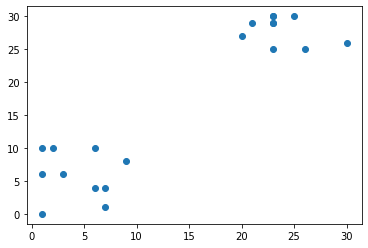

In [1]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

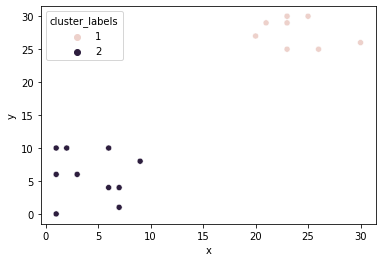

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'x': x, 'y': y})

# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

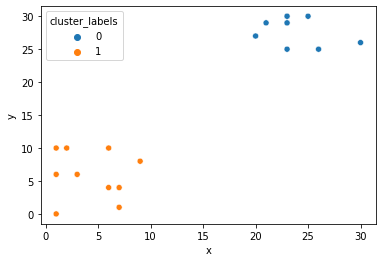

In [6]:
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')

# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

In [7]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


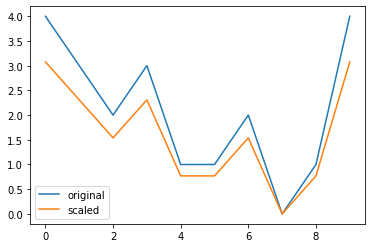

In [8]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

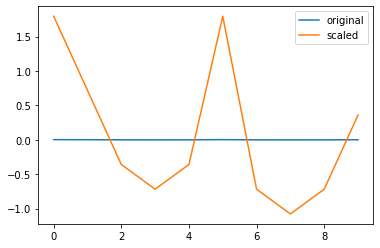

In [9]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [10]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


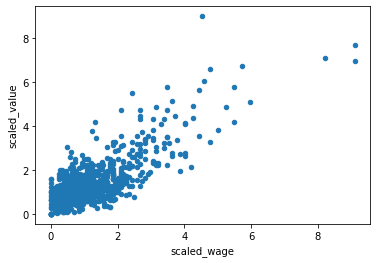

In [11]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

In [13]:
# Check mean and standard deviation of scaled values
fifa[['scaled_wage', 'scaled_value']].describe()

,scaled_wage,scaled_value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064


## 2. Hierarchical Clustering

In [14]:
comic_con = pd.DataFrame({'x_coordinate' : [17,20,35,14,37,33,14,30,35,17,11,21,13,10,81,84,87,83,90,97,94,88,89,93,92,82,81,92,91,22,23,25,25,27,17,17],
                          'y_coordinate' : [4,6,0,0,4,3,1,6,5,4,6,10,8,10,97,94,99,95,95,97,99,99,94,99,90,98,100,93,98,15,10,0,10,7,17,15],
                          'x_scaled' : [0.5093490504878759,0.59923417704456,1.04865980982798,0.419463923931192,1.1085832275324359,0.9887363921235239,0.419463923931192,0.8988512655668399,1.04865980982798,0.5093490504878759,0.32957879737450796,0.629195885896788,0.389502215078964,0.29961708852228,2.426898417030468,2.516783543587152,2.606668670143836,2.486821834734924,2.69655379670052,2.9062857586661157,2.8164006321094317,2.6366303789960637,2.666592087848292,2.786438923257204,2.756477214404976,2.4568601258826956,2.426898417030468,2.756477214404976,2.7265155055527477,0.6591575947490159,0.689119303601244,0.7490427213056999,0.7490427213056999,0.8089661390101559,0.5093490504878759,0.5093490504878759],
                          'y_scaled' : [0.0900098453652847,0.13501476804792703,0.0,0.0,0.0900098453652847,0.06750738402396352,0.022502461341321174,0.13501476804792703,0.11251230670660586,0.0900098453652847,0.13501476804792703,0.22502461341321173,0.1800196907305694,0.22502461341321173,2.182738750108154,2.11523136608419,2.227743672790796,2.1377338274255115,2.1377338274255115,2.182738750108154,2.227743672790796,2.227743672790796,2.11523136608419,2.227743672790796,2.0252215207189055,2.205241211449475,2.250246134132117,2.092728904742869,2.205241211449475,0.3375369201198176,0.22502461341321173,0.0,0.22502461341321173,0.15751722938924823,0.38254184280245995,0.3375369201198176]})

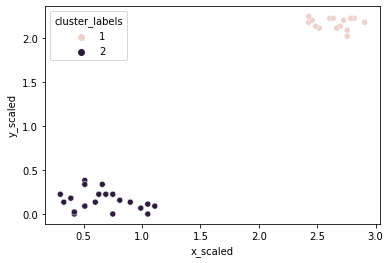

In [15]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

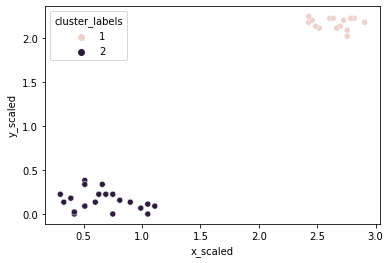

In [16]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion = 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

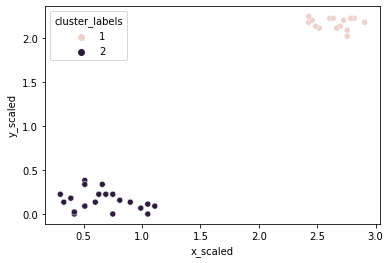

In [17]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion = 'maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [20]:
comic_con['cluster_labels'] = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2]
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

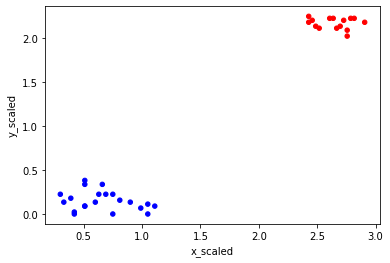

In [21]:
# Import the pyplot class
from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                       y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda i: colors[i]))
plt.show()

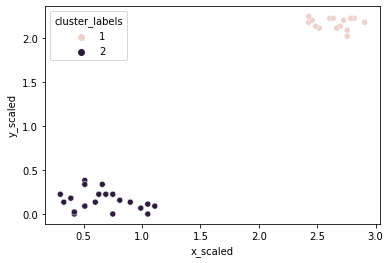

In [22]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

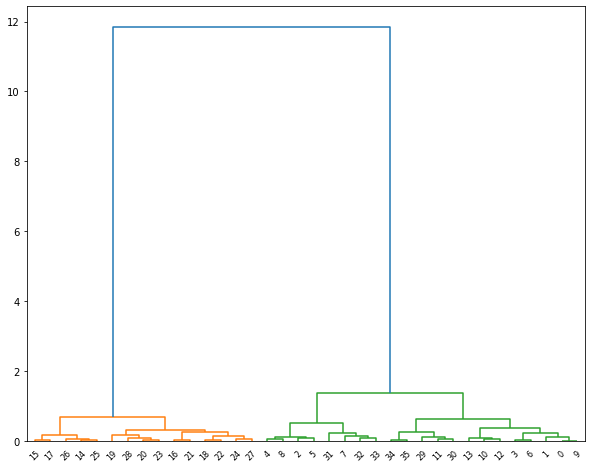

In [31]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 8))

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

Answer: 2 clusters

In [32]:
import timeit

%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

706 µs ± 93.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Answer: 1-5 milliseconds

In [34]:
fifa = pd.read_csv('fifa_18_dataset.csv')

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


In [36]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean()

,scaled_sliding_tackle,scaled_aggression
cluster_labels,,
1,0.987373,1.849142
2,3.013487,4.063492
3,1.934455,3.210802


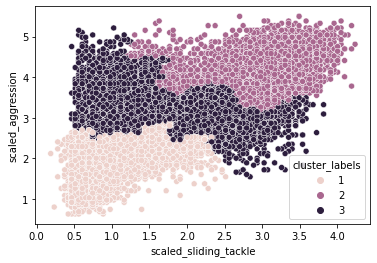

In [37]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

## 3. K-Means Clustering

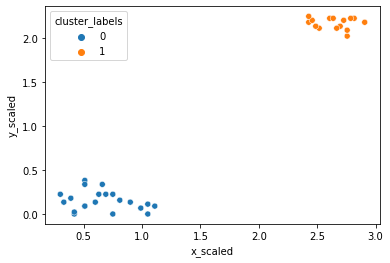

In [38]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [40]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

95.6 ms ± 6.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Answer: 100 ms (milliseconds)

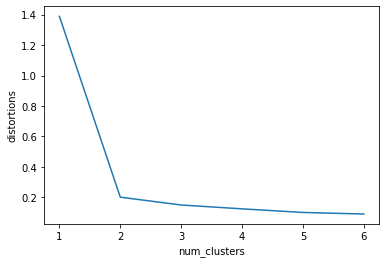

In [41]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Answer: 2 clusters

In [42]:
uniform_data = pd.DataFrame({'x_coordinate': [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 50, 62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55],
                             'y_coordinate': [3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 1, 3, 0, 2, 5, 9, 5, 8, 6, 3, 1, 4, 2, 8, 7],
                             'x_scaled': [2.376199107393584, 2.5589836541161675, 3.5338345699699456, 2.6199118363570286, 0.7920663691311947, 1.949701831707556, 3.6556909344516675, 0.7920663691311947, 1.5841327382623893, 1.6450609205032505, 1.7669172849849728, 3.1073372942839175, 0.8529945513720558, 3.0464091120430563, 3.77754729893339, 3.5947627522108068, 3.0464091120430563, 3.77754729893339, 3.9603318456559733, 1.035779098094639, 1.5232045560215282, 2.741768200838751, 3.351050023247362, 2.924552747561334, 2.5589836541161675, 3.5338345699699456, 4.143116392378556, 3.5338345699699456, 2.2543427429118617, 3.351050023247362],
                             'y_scaled': [1.152237477571589, 2.6885541143337073, 1.152237477571589, 1.152237477571589, 2.304474955143178, 1.920395795952648, 1.152237477571589, 1.5363166367621184, 0.0, 3.4567124327147667, 2.304474955143178, 1.152237477571589, 0.0, 2.6885541143337073, 1.5363166367621184, 0.3840791591905296, 1.152237477571589, 0.0, 0.7681583183810592, 1.920395795952648, 3.4567124327147667, 1.920395795952648, 3.0726332735242368, 2.304474955143178, 1.152237477571589, 0.3840791591905296, 1.5363166367621184, 0.7681583183810592, 3.0726332735242368, 2.6885541143337073]})

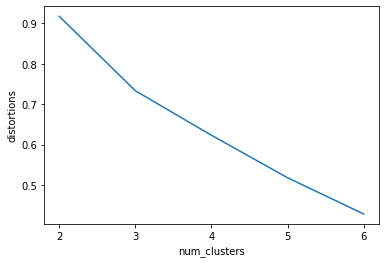

In [43]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

Answer: Can not be determined.

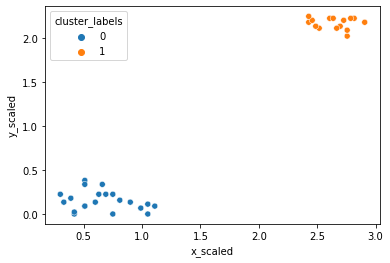

In [44]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

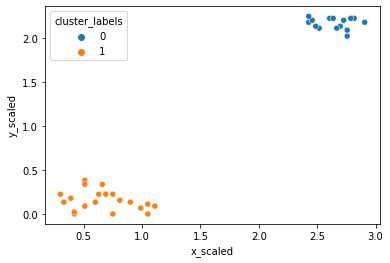

In [45]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Mouse dataset can be downloaded from here: https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655

In [46]:
x_coordinate = [
    33.875528010208775, 38.208747889149606, 35.740587879668375, 37.23135848636506, 
    41.496391822174444, 34.57524308492981, 36.68347376715728, 39.55243792834103, 
    38.81688130962109, 44.06345901771782, 36.70867407835045, 34.79801573125261, 
    41.3945428693764, 40.038651593941325, 40.80577245048783, 42.91466762424747, 
    48.27452453611369, 44.33021766636411, 49.186611594727016, 46.19488558238166, 
    45.9149620027287, 50.53329174850453, 46.66234209384367, 52.805494159156146, 
    50.32365573447579, 53.58176231341206, 52.709233978423665, 59.44885334665001, 
    52.19928307093202, 58.81574353702432, 58.08561332415336, 64.74884912774336, 
    57.539861686023774, 61.40056615711936, 60.21258703505764, 63.44559188910216
]

y_coordinate = [
    44.89342094946078, 41.11632695012222, 57.41800587821296, 47.352168083775245, 
    54.80640988830002, 41.61780974466537, 48.07251769572669, 45.22968742240375, 
    55.17457651600784, 52.34871625669921, 50.526848504887825, 52.11952949539158, 
    49.13502540149422, 53.48938092344328, 48.16632402563758, 54.879907574751465, 
    51.7473566489963, 56.84940705016555, 58.49442737035558, 54.63102427124781, 
    57.06855499346107, 55.53096603961956, 59.26402464308282, 55.492528495667575, 
    57.56759784858575, 61.36630346236322, 61.30713192504409, 62.85755605574424, 
    64.44148454147966, 66.15977279260282, 68.0194192406701, 67.7042206111895, 
    71.59450894112698, 69.85328173653997, 72.25552873429795, 74.66344797163669
]

x_scaled = [
    2.209458273773183, 2.492083197308515, 2.331102782411336, 2.424129857665845, 
    2.738808832594025, 2.2787753124797917, 2.5204398207623514, 2.648205111404736, 
    2.6015927814480977, 2.981931248919944, 2.522200200871127, 2.3347377347667923, 
    2.7359212721086135, 2.6722712867067814, 2.744232438554092, 2.8707041175425355, 
    3.2125610735749195, 2.9874895474063877, 3.2624700589482973, 3.0840192631440195, 
    3.070968606323712, 3.391864126825248, 3.1012435696986287, 3.533287499029195, 
    3.352249119156394, 3.592837601561111, 3.5252627613727177, 3.9905153242621613, 
    3.4692487070527377, 3.902214076612523, 3.8510573079645473, 4.242270786404516, 
    3.8162867390514737, 4.052175324130573, 4.006267547287692, 4.13810193280437
]

y_scaled = [
    2.977523635649635, 2.7270106112632395, 3.808207661579468, 3.1095279245722193, 
    3.599882695727346, 2.742655137005459, 3.3481288622147214, 3.0207778450168377, 
    3.6205517557169596, 3.373044048963139, 3.279198173177397, 3.360307645993731, 
    3.156823919816547, 3.408529648416256, 3.045258734615481, 3.618526479141185, 
    3.2642871940138416, 3.7191197507027086, 3.8366026073453245, 3.545035966892181, 
    3.7268034463111593, 3.650432128398216, 3.889850288968236, 3.6475240355912254, 
    3.7332257056697784, 3.9789708569755337, 3.970840485723988, 4.068816246351986, 
    4.213586021509017, 4.369218510349662, 4.524878219408633, 4.505435184737363, 
    4.795693020018223, 4.630171736466183, 4.836663475682572, 2.937881914774981
]

mouse = pd.DataFrame({'x_coordinate': x_coordinate, 'y_coordinate': y_coordinate, 'x_scaled': x_scaled, 'y_scaled': y_scaled})

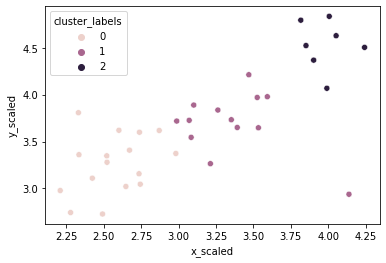

In [47]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

In [51]:
fifa = pd.read_csv('fifa_18_sample_data.csv')[:250]

fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_def,scaled_phy
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,1.541348,8.922186
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,1.214396,6.803167
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,1.401226,6.691640
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,1.961716,9.033714
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,True,2.802452,10.148987


In [52]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean()

,scaled_def,scaled_phy
cluster_labels,,
0,3.743692,8.867419
1,1.865936,7.082691
2,2.096297,8.944870


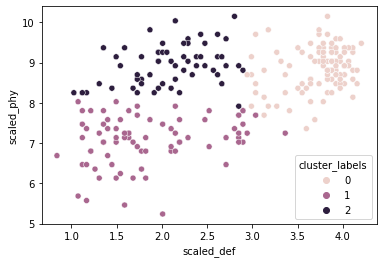

In [53]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

## 4. Clustering in Real World

In [55]:
r, g, b = [], [], []

# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


In [58]:
r_sc = whiten(r)
g_sc = whiten(g)
b_sc = whiten(b)

batman_df = pd.DataFrame({'blue': b, 'green': g, 'red': r, 'scaled_blue' : b_sc, 'scaled_green' : g_sc, 'scaled_red' : r_sc})
batman_df.head()

,blue,green,red,scaled_blue,scaled_green,scaled_red
0,25,27,37,0.281166,0.357715,0.464893
1,19,22,36,0.213686,0.291471,0.452328
2,23,22,48,0.258673,0.291471,0.603104
3,30,30,54,0.337399,0.397461,0.678492
4,22,17,32,0.247426,0.225228,0.402069


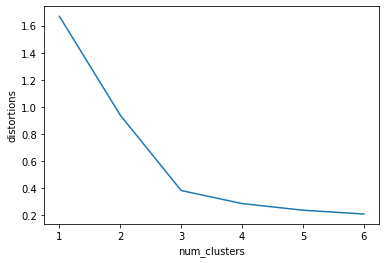

In [59]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

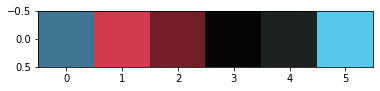

In [61]:
colors = []

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

In [ ]:
pip install --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org nltk -vvv

In [72]:
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        
        if len(token) > 1 and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
            
    return cleaned_tokens

In [66]:
plots = ['Cable Hogue is isolated in the desert, awaiting his partners, Taggart and Bowen, who are scouting for water. The two plot to seize what little water remains to save themselves. Cable, who hesitates to defend himself, is disarmed and abandoned to almost certain death.\r\nConfronted with sandstorms and other desert elements, Cable bargains with God. Four days later, about to perish, he stumbles upon a muddy pit. He digs and discovers an abundant supply of water.\r\nAfter discovering that his well is the only source of water between two towns on a stagecoach route, he decides to live there and build a business. Cable\'s first paying customer is the Rev. Joshua Duncan Sloane, a wandering minister of a church of his own revelation. Joshua doubts the legitimacy of Cable\'s claim to the spring, prompting Cable to race into town to file at the land office.\r\nCable faces the mockery of everyone he tells about his discovery. That does not deter him from buying 2 acres (0.8\xa0ha) surrounding his spring. He immediately goes to the stage office to drum up business but is thrown out by the skeptical owner. He pitches his business plan to a bank president, who is dubious about the claim. Cable impresses the banker with his attitude and he is staked to $100.\r\nCable, who hasn’t bathed since his desert wanderings, decides to treat himself to a night with Hildy, a prostitute in the town saloon. They quickly develop a jovial understanding but before they can consummate the transaction, Cable remembers that he has still not set up his boundary markers and rushes out, much to Hildy\'s chagrin. She chases him out of the saloon in a sequence that wreaks havoc on the town.\r\nBack at the spring, Cable and Joshua get to work, dubbing the claim Cable Springs. The two decide to go into town and are drunk by the time they arrive. Cable makes up with Hildy and spends the night with her, leaving Joshua to pursue his passion: the seduction of emotionally vulnerable women.\r\nCable and Joshua continue to run the robust business, delighting in shocking the often genteel travelers with the realities of frontier life. In moments of solitude, Cable and Joshua philosophize on the nature of love and the passing of their era. Joshua decides that he must return to town. Hildy arrives at Cable Springs having been "asked" to leave by the modernizing townfolk, who can no longer abide open prostitution in their midst. She tells Cable that she will leave for San Francisco in the morning but winds up staying with him for three weeks. This time elapses during a tender, romantic montage.\r\nThen one day, Taggart and Bowen arrive on the stagecoach. Cable lets them believe that he bears them no ill will, and he alludes to a huge stash of cash that he has hoarded, knowing that the two men will return to steal it. When they do, Cable outwits them, by throwing rattlesnakes into the pit they have dug. When they surrender, he orders them to strip to their underwear to venture into the desert, just as he had been forced to do. Taggart, believing Cable will once again hesitate to defend himself, reaches for his gun but Hogue shoots him dead.\r\nA motor car appears, driving right past Cable Springs with no need or interest in stopping for water. The drivers laugh at the archaic scene of western violence as they race past. "Drove right by," says Cable in amazement. "Well, that\'s gonna be the next fella\'s worry."\r\nCable takes mercy on the grovelling Bowen. He even gives him Cable Springs, having decided to go to San Francisco to find Hildy. The stagecoach arrives and Cable gets ready to pack up when suddenly another motorcar [2] appears. This one does stop and Hildy emerges, opulently dressed. She has become prosperous and, now on her way to New Orleans, has come to see if Cable is ready to join her. He agrees but while he loads the motorcar he accidentally trips its brake. The car runs over him as he pushes Bowen out of the way.\r\nJoshua, who arrives by a black motorcycle with a sidecar, gives a eulogy for Cable as he dies. This segues into a funeral with the cast standing mournfully over Cable\'s grave. They are grieving not only the death of the man but the era he represents. The stagecoach and motorcar drive off in opposite directions. A coyote wanders into the abandoned Cable Springs. But the coyote has a collar – possibly symbolising the taming of the wilderness.',
 "In the far reaches of space, a planet explodes sending a strange meteorite across the galaxy, heading towards Earth. Meanwhile, Susan Murphy of Modesto, California is going to be married to news weatherman Derek Dietl. Just before the ceremony, she is hit by the meteorite and its energy causes her to glow green and grow to enormous size. She is tranquilized by the military and awakens in a top secret government facility that houses monsters of which the public are ignorant. She meets General W.R. Monger, the Army officer in charge of the facility, and her fellow monster inmates: Dr. Cockroach PhD, a mad scientist who became half-human, half-cockroach after an experiment; B.O.B. (Benzoate Ostylezene Bicarbonate), a brainless, living mass of goo as a result of a food flavoring mutation; Insectosaurus, a massive mutated bug standing 350 feet in height, and the Missing Link, a prehistoric fish-ape hybrid who was thawed from deep ice. Susan herself has been renamed to Ginormica.\r\nIn a mysterious spaceship in deep space, an alien overlord named Gallaxhar is alerted to the presence of quantonium, a powerful energy source on Earth, and he sends a robotic probe to retrieve it. The probe later lands on Earth where the President of the United States attempts to make first contact with it. However, the attempt fails and the probe goes on a destructive rampage, headed straight for San Francisco. Monger convinces the President to grant the monsters their freedom if they can stop the probe. In San Francisco, the robot detects the quantonium radiating through Susan's body and tries to take it from her, putting many lives at risk. At the Golden Gate Bridge, the monsters work together to defeat the probe.\r\nGallaxhar sets course for Earth to obtain the quantonium in person while the now-free Susan returns home with her new friends and reunites with her family. However, the monsters alienate themselves from the humans due to their inexperience with social situations. Derek breaks off his engagement with Susan, claiming that he cannot marry someone who would overshadow him and his career. Heartbroken, the monsters reunite, but Susan realizes that her life is better as a monster and promises not to sell herself short to anyone again. Suddenly, Susan is pulled into Gallaxhar's spaceship. Insectosaurus tries to save her, but he is shot down by the ship's plasma cannons, seemingly killing him.\r\nOn board the ship, Gallaxhar extracts the quantonium from Susan, shrinking her back to her normal size. Gallaxhar then uses the extracted quantonium to create clones of himself in order to launch a full-scale invasion of Earth. Monger manages to the monsters on board the ship. They rescue Susan and make their way to the main power core where Dr. Cockroach sets the ship to self-destruct to prevent the invasion. All but Susan are trapped as the blast doors close and she personally confronts Gallaxhar on the bridge. With her time running out, she sends the ball of stored quantonium down on herself, restoring her monstrous size and strength. After rescuing her friends, they flee the ship and meet with Monger and Insectosaurus, who has morphed into a butterfly. The ship self-destructs, killing Gallaxhar and his army.\r\nReturning to Modesto, Susan and the monsters receive a hero's welcome. Hoping to take advantage of Susan's fame for his own career, Derek tries to get back together with her, but she rejects him. Monger then arrives to tell the monsters about a new monstrous snail called Escargantua making its way to Paris. The monsters take off to confront the new menace.",
 'Zarra Montalvo is the daughter of an American father and Spanish mother, Don Jose (Victor Kilian) and Zara Montalvo (Cecil Weston, credited as Cecile Weston). The Montalvo family possesses land rights or Spanish land grants to a hacienda with gold mines present. Abroad, Zarra comes home to California and witnesses her parents being murdered by Hank (John Merton) and an unknown man, Sheriff Jim Harden (Barton MacLane). Zarra initially approaches Harden about the crimes but eventually recognizes him as part of the murderers\' gang. She joins forces with Joaquin Murietta (Phillip Reed) to regain her rightful inheritance, and together they assume secret identities, with Zarra hidden behind the alias of a Zorro-like character named "Lola Belmont" and Murietta as "Carlos del Rio".\r\nDan Hinsdale (Willard Parker), an attorney, later informs Zarra about his purchase of her family\'s rancho at a reduced fee because of back taxes owed by Zarra\'s parents. Zarra seeks the aid of Father Antonio (Martin Garralaga), who along with Murietta is one of the few people to know their dual identities. Father Antonio warns her that her outlaw gang is wanted by the Spanish authority and its soldiers. Upon learning this, "Belmont" and "del Rio" secretly work to regain stolen gold and "land rights" on the behalf of other neighboring rancheros.',
 'Major Vic Deakins (John Travolta) and Captain Riley Hale (Christian Slater), pilots in the United States Air Force, are assigned to a secret exercise flying a B-3 Stealth Bomber (a fictional iteration of the B-2 Spirit stealth bomber) with two B83 nuclear bombs on board. After successfully evading Air Force radar, Deakins attacks Hale and ejects him out of the plane. Deakins then releases the bombs without detonating them and reports that Hale has gone rogue. He then ejects from the plane, leaving it to crash.\r\nA USAF search and rescue team is sent to recover the warheads. Not finding them, they report a "Broken Arrow", a situation wherein nuclear weapons are missing. Next morning the search team locates the warheads in a canyon but is ambushed by mercenaries. Master Sergeant Sam Rhodes (Vondie Curtis-Hall) tries to disable the warhead but is killed by the other survivor, Sgt. Kelly (Howie Long), who was actually the mercenaries\' mole. Deakins arrives moments later and plots his next move with Pritchett (Bob Gunton), the mercenaries\' financier. They plan to blackmail the US government with the threat of detonating the warhead in a populated area.\r\nHale has survived the ejection and is almost arrested by park ranger Terry Carmichael (Samantha Mathis), who had been investigating the unusual events in the park. He convinces her to help him track down Deakins. Deakins\' mercenaries commandeer the USAF search and rescue helicopter to kill Hale, but Hale and Terry manage to bring it down. The loss of the helicopter forces Deakins\' men to transport the warheads with Hummer trucks.\r\nHale and Terry carjack the Hummer with the warheads, escaping to a nearby abandoned copper mine, where Hale unsuccessfully attempts to disable them. They then take the armed warhead down the shaft where the mine is deep enough to contain the nuclear blast. However, before they can bring down the second warhead, Deakins\' team arrives and secures it. After a gun battle deep in the mines, Deakins shortens the countdown of the armed warhead while leaving Hale and Terry trapped, but they escape via an underground river just before the bomb detonates. The bomb\'s electromagnetic pulse disables the NEST helicopter, allowing Deakins to escape. Terry and Hale track the mercenaries to a motorboat used for transporting the warhead down the river. While trying to steal the boat, Terry is forced to hide onboard and military forces rescue Hale.\r\nHale deduces that Deakins intends to use a train to transport the warhead. Stowing on the train, Terry tries to sabotage the warhead but is caught by Deakins and is forced to enter the arming code. Catching up on a USAF helicopter, Hale saves Terry before Deakins can throw her off the train. A gunfight ensues and the USAF helicopter crashes, killing most of the mercenaries. Deakins has prepared a remote control that can either disarm or detonate the warhead and gets ready to depart the train on his own getaway helicopter; however, Hale\'s sabotage of the helicopter\'s fuel pump causes it to explode, leaving Deakins and Kelly without the means to get clear of the nuclear blast. With his plan falling apart, Deakins decides to arm the warhead regardless with a short countdown timer. Not wanting to die, Kelly holds Deakins at gunpoint and orders him to disarm the weapon. Hale sneaks up on them during their bickering and kicks Kelly out of the boxcar to his death, then engages in a gun battle with Deakins.\r\nTerry detaches the section of the train with the bomb but gets into a shootout with the engineer. The latter is shot and falls on the train brakes, causing the detached boxcars to coast uncontrollably at high speed. Meanwhile, Deakins still has the remote detonator, so he forces Hale to drop his gun and challenges him to a fight. Hale eventually overpowers Deakins, acquires the remote detonator, disarms the warhead and leaps out of the train. As the detached boxcars slam into the halted front half, the warhead flies into Deakins and the entire train derails and explodes.\r\nHale finds Terry and the damaged warhead. The two formally introduce themselves to each other amidst the wreckage.',
 'Dolemite is a pimp and nightclub owner who is serving 20 years in prison after being set up by a rival, Willie Green. One day, his friend and fellow pimp Queen Bee helps him get out of jail, and plots with him to get revenge on Green.',
 'Gangsters Nat Burdell (Kenne Duncan) and Brad Conley (Ewing Miles Brown) kidnap wealthy socialite Margaret Chaffee (Marilyn Harvey) and, joined by gun moll Esther Malone (Jeanne Tatum), head for the San Gabriel Mountains to await the ransom they\'ve demanded from Chaffee\'s father. That night, geologist Dick Cutler (Robert Clarke) sees what he thinks is a meteor crash into the forest. But he doesn\'t see that out of the smoke from the impact emerges a beautiful glowing blonde female extraterrestrial (Shirley Kilpatrick) in a skintight leotard who can kill by touch.\r\nThe gangsters hole up at Cutler\'s cabin. When the alien peeks through a window, Burdell orders Conley to go after her, but the alien kills Conley, his gunshots having no effect on her whatsoever. Burdell then goes out and runs into the alien himself. Although his gunshots are also ineffective, the alien walks away backwards, allowing Burdell to retrieve Conley\'s body. Back at the cabin, Cutler says that Conley died of "radium poisoning" and that by carrying his body, Burdell has taken a potentially lethal dose of radium and needs to get to a doctor before he dies.\r\nBurdell decides they should flee that night, even though they\'ll have to navigate a dangerous mountain road in Cutler\'s headlight-less Jeep. But before they can leave, the alien smashes through the cabin\'s window. Everyone runs outside. The alien catches Malone and kills her. When the alien tries to grab Burdell, he quickly sidesteps and she tumbles down an embankment. Burdell wrongly thinks she\'s dead. Cutler and Chaffee have already run back to the cabin. Burdell demands that they leave at once. But as they drive off, the extraterrestrial stops them and kills Burdell.\r\nWith all the gangsters dead, Cutler and Chaffee run to the cabin again. Cutler speculates that the alien\'s body is made of radium and platinum, which protect her from the Earth\'s atmosphere. He mixes an acid solution that will kill her. When she comes into the cabin, he throws the bottle of acid at her. She is killed and disintegrates.\r\nHowever, a locket she was wearing is undamaged. Cutler finds in it a note, written in English, from the "Master of the Council of Planets of the Galaxy." It\'s an invitation to Earth to join the Council. Cutler now realizes that the alien was a peaceful emissary who killed only in self-defense. Chaffee says that the Council, with its "superior wisdom," will surely understand that their human nature caused them to fear the alien and that another emissary will no doubt be sent. Cutler agrees, although he asks rhetorically, "But will it come to bring us good will or simply avenge her death?"',
 "Sam Lash (Gary Cooper) is a fur trapper with a randy reputation when it comes to women. But when Sam meets tempestuous Mexican damsel Lola Salazar (Velez), he falls deeply in love for the first time in his life. Lola's aristocratic father Don Solomon (Michael Vavitch) disapproves of the romance, forcing Sam to kidnap the girl and high-tail it to the mountains. After a brief period of marital contentment, Sam gets restless and leaves Lola, preferring the company of his trapper pals Gullion (Louis Wolheim) and Rube (Constantin Romanoff). But he relents and returns to his bride—making short work of his bitter enemy, Indian leader Black Wolf (George Rigas).",
 "Conan is the son of Corin, chief of a barbarian tribe. The youth is a skilled but violent warrior, who his father believes is not ready to wield his own sword. Their village is attacked by Khalar Zym, a warlord who wishes to reunite the pieces of the Mask of Acheron to revive his dead wife and conquer Hyboria. The Mask, crafted by a group of sorcerers and used to subjugate the world, was broken into many pieces, scattered among the barbarian tribes. After locating Corin's piece of the mask, and murdering the entire village, Zym leaves. Conan, the only survivor, swears revenge.\r\nYears later, Conan is a pirate but still seeks revenge. He encounters a slave colony and frees it by killing the slave handlers. In the city of Messantia, he encounters Ela-Shan, a thief being chased by Lucius, one of Zym's soldiers from years before. He allows himself to be captured alongside Ela-Shan. Conan escapes imprisonment, kills several of the guards, and confronts Lucius, forcing him to reveal that Zym seeks a girl, the pure-blood descendant of the sorcerers of Acheron; sacrificing the descendant and using blood from the girl will unleash the mask's power. Conan helps the prisoners escape and Ela-Shan tells Conan he will find him at the City of Thieves, Argalon. Lucius is killed by the prisoners.\r\nZym and his daughter, the sorceress Marique, attack a monastery to find the pure-blood descendant. Sensing something is wrong, Fassir, an elderly monk, tells one of his students, Tamara, to run away and return to her birthplace. When Fassir refuses to reveal his knowledge of the descendant, Zym kills him. Marique slays several priestesses. Tamara's carriage is chased by Zym's men, but Conan rescues her, kills three of her pursuers, and captures Remo. After forcing him to reveal Tamara's importance as the pure-blood, Conan catapults Remo into Zym's nearby camp, killing him.\r\nZym and Marique confront Conan, who pretends to be interested in exchanging Tamara for gold. Conan attacks Zym, but Marique invokes soldiers made of sand, and poisons Conan with a boomerang sword. Tamara rescues him and they return to Conan's ship, where his friend Artus helps Conan recover. The boat is attacked by Zym's men, who kill several of Conan's men, but are defeated. Conan orders Artus to return to Messantia with Tamara and departs to confront Zym in his kingdom. Artus tells Tamara that Conan left a map behind and she follows him, meeting with him in a cave, where they have sex. The next day, as she is returning to the boat, Zym's men and daughter capture her.\r\nConan learns of Tamara's capture and departs to Argalon, where he asks Ela-Shan to help him break into Zym's castle. Zym prepares to drain Tamara's blood, mending the mask. He plans to use the girl's body as a vessel for his wife's soul. After confronting an octopus-like monster that guards the dungeons and killing its handlers, Conan infiltrates Zym's followers, kills a guard, steals his robe, and watches as Zym puts on the empowered mask. Conan releases Tamara, and she escapes as he battles Zym, reclaiming the sword Marique had stolen from his father. Marique attacks Tamara, but Conan hears Tamara's scream and cuts off Marique's hand. Tamara kicks her into a pit, where she is impaled. Zym swears revenge upon Conan.\r\nConan and Tamara are trapped on a bridge as Zym attacks. He uses the mask's power to call forth the spirit of his deceased wife, Maliva, a powerful sorceress, and her spirit begins to possess Tamara's body. She begs Conan to let her fall, but he refuses and instead destroys the bridge before jumping to safety with Tamara. Zym falls into the lava crying out to his wife.\r\nConan and Tamara escape and he returns her to her birthplace, telling her that they'll meet again. He then returns to Corin's village and tells the memory of his father that he has avenged his death and recovered the sword Marique stole from him, restoring his honor.",
 'Spencer Griffith (Joseph Mazzello) is a shy boy in seventh grade. He has a crush on a school girl named Michelle (Lauren Eckstrom). Spencer\'s life changes one night when a mysterious meteorite crashes into a nearby junkyard. Investigating the site, he finds that the "meteorite" is actually a small rocket carrying a "Cyborsuit.", a prototype exoskeletal-suit with AI (short for Artificial Intelligence) from another galaxy. Spencer then decides to try the suit on and melds with the suit AI, who Spencer calls "Cy". After testing most of the functions and abilities of the suit, he then goes around town doing whatever he wants, such as getting back at a school bully Turbo (Joey Simmrin), rescuing Michelle and her friends from a damaged ferris wheel, and ordering food from a fast-food restaurant drive-thru, along with a few hilarious antics such as trashing part of his house after getting his head stuck in a refrigerator, figuring out how to eat his drive-thru food through the suit and wanting to get out of the suit to pee when Cy wouldn\'t let him.\r\nDuring this time, Earth gets visited by a Broodwarrior (Brian Simpson), a member of an alien race of insectoids waging a war against the creator of the Cyborsuit, Tenris De\'Thar and his fellow Trelkins. The Broodwarrior\'s mission is to capture the Cyborsuit so that his race can analyze it. After his first encounter with the Broodwarrior, Spencer escapes, forces Cy to eject him out of the suit and then abandons Cy telling him that he\'s afraid that he might not live to see his next birthday if he "engages" the Broodwarrior. Back at home, after Spencer looks over his comic book titled MidKnight Warrior and thinking about what kind of person he wants to be, he goes back out to find Cy only to find out that Cy was captured by the Broodwarrior. Spencer begins searching for Cy accompanied by Turbo, now becoming his friend. As they head to the junkyard, where Cy is about to be taken off-world by the Broodwarrior, they create a plan to distract the Broodwarrior long enough for Spencer to rescue Cy. Spencer gets Cy back and begins battling with the Broodwarrior.\r\nDuring the battle, the Broodwarrior gets the upper hand and defeats Cy and Spencer. After getting bashed multiple times by the Broodwarrior\'s mace and severely damaging the suit, Cy is forced to eject Spencer out before going completely offline. Spencer covers the suit with scrap metal to hide it from the Broodwarrior, takes a piece of the suit and continues to fight the Broodwarrior, who was later trying to chase down Turbo. Spencer confronts the Broodwarrior before getting chased himself and is suddenly cornered in a junked RV. Just when the Broodwarrior is about to dispose of Spencer, Turbo finds a control panel and activates the car crusher the RV is sitting in, revealing the chase into the RV to be part of a trap. Spencer escapes while the Broodwarrior is compressed along with the RV into a solid metal cube, killing the Broodwarrior.\r\nWith the Broodwarrior now destroyed, they return to Cy but it appears they were too late to save him. Just when Spencer begins to lose hope, Cy\'s creator Tenris De\'Thar and Trelkin soldiers appear from a giant UFO orbiting Earth and quickly repair him, bringing him back to life. After Cy and Spencer say goodbye to one another, the head alien soldier gives Spencer a badge for his bravery and courage before their departure back to their home-world, and the long, eventful night finally comes to an end. The next day at school, a now confident Spencer, with encouragement from his new friend Turbo, starts up a conversation with Michelle.',
 "In 1963, on Halloween night in Haddonfield, Illinois, Michael Myers, dressed in a clown costume and mask, inexplicably stabs his older sister Judith to death with a kitchen knife in their home. He is subsequently hospitalized at Warren County's Smith's Grove Sanitarium. Fifteen years later, on October 30, 1978, Michael's child psychiatrist, Dr. Sam Loomis, and his colleague, Marion Chambers, arrive at Smith's Grove Sanitarium to take Michael to court. Michael escapes from the sanitarium, stealing Loomis’ car. Returning home to Haddonfield, Michael kills a mechanic for his uniform and steals a white mask, a couple of knives, and some rope from a local store.\r\nThe next day, on Halloween, Michael stalks high school student Laurie Strode after she and Tommy Doyle drop off a key at his former house, so her father can sell it. Throughout the day, Laurie notices Michael following her, but her friends Annie Brackett and Lynda Van der Klok dismiss her concerns. Loomis arrives in Haddonfield in search of Michael, knowing his intentions. After discovering that Judith Myers' headstone has been stolen from the local cemetery, Loomis meets with Annie's father, Sheriff Leigh Brackett. The two begin their search at Michael's house, where Loomis tries to warn the skeptical sheriff about the danger Michael poses, explaining that Michael is pure evil and capable of further violence, despite years of catatonia. Sheriff Brackett patrols the streets while Loomis waits and watches the house, expecting Michael to return there.\r\nLater that night, Laurie goes over to babysit Tommy, while Annie babysits Lindsey Wallace just across the street, unaware that Michael is watching them. When Annie's boyfriend, Paul, calls her to come and pick him up, she takes Lindsey over to the Doyle house to spend the night with Laurie and Tommy. Annie is just about to leave in her car when Michael, who stowed away in the back seat, strangles her before slitting her throat, killing her.\r\nSoon after, Lynda and her boyfriend Bob Simms arrive at the Wallace house. After having sex, Bob goes downstairs to get a beer for Lynda, but Michael stabs him with a knife which pins him to the wall, killing him. Michael then poses as Bob in a ghost costume and confronts Lynda, who teases him, having no effect. Lynda calls Laurie; just as Laurie picks up, Michael strangles Lynda to death with the telephone cord. Meanwhile, Loomis discovers the stolen car and begins combing the streets.\r\nA suspicious Laurie goes over to the Wallace house. There, she finds the corpses of Annie, Bob, and Lynda in an upstairs bedroom, as well as Judith Myers' headstone.[11] Horrified, Laurie cowers in the hallway, when Michael suddenly appears and attacks her, slashing her arm. Barely escaping, Laurie races back to the Doyle house. Michael gets in and attacks her again, but Laurie manages to fend him off long enough for Tommy and Lindsey to escape. Loomis sees the two children fleeing the house, and goes to investigate, finding Michael and Laurie fighting upstairs. Loomis shoots Michael six times, knocking him off the balcony; when Loomis goes to check Michael's body, he finds it missing. Unsurprised, Loomis stares off into the night. Places where Michael had previously been are shown as his breathing is heard, indicating he could be anywhere, and the last view is of the Myers house.",
 "Jimmy Shannon (Buster Keaton) is the junior partner in the brokerage firm of Meekin and Shannon, which is on the brink of financial ruin. A lawyer (whom they dodged, mistakenly believing he was trying to add to their woes) finally manages to inform Jimmy of the terms of his grandfather's will. He will inherit seven million dollars if he is married by 7:00\xa0p.m. on his 27th birthday, which happens to be that same day.\r\nShannon immediately seeks out his sweetheart, Mary Jones, who readily accepts his proposal. However, when he clumsily explains why they have to get married that day, she breaks up with him.\r\nHe returns to the country club to break the news to his partner and the lawyer. Though Jimmy's heart is set on Mary, Meekin persuades him to try proposing to other women to save them both from ruin or even possibly jail. He has Jimmy look in the club's dining room; Jimmy knows seven women there (the chances of the title). Each turns him down. In desperation, Jimmy asks any woman he comes across. Even the hat check girl rejects him. He finally finds one who agrees, but it turns out she is underage when her mother spots her and takes her away.\r\nMeanwhile, Mary's mother persuades her to reconsider. She writes a note agreeing to marry Jimmy and sends the hired hand to deliver it.\r\nUnaware of this, Meekin has his partner's predicament (and potential inheritance) printed in the newspaper, asking would-be brides to go to the Broad Street Church at 5 p.m. Hordes of veiled women descend on the place. When they spot Jimmy (who had fallen asleep on a pew), they begin to fight over him. Then the clergyman appears and announces he believes it all to be a practical joke. Infuriated, the women chase after Jimmy. While hiding, he gets Mary's note. He races to Mary's house, pursued by furious females. Along the way, he accidentally starts an avalanche, which drives away the mob.\r\nWhen he gets to Mary's home, Meekin shows him his watch; he is minutes too late. Mary still wants to marry him, money or no, but he refuses to let her share his impending disgrace. Fortunately, when he leaves, he sees by the church clock that Meekin's watch is fast. He and Mary wed just in time.",
 "A train passenger car carrying a reporter and his photographer mysteriously breaks away from its locomotive, accidentally ending up on a remote sidetrack in Gudavia, an isolated Ruritanian-style, one-village Eastern Bloc dictatorship. The newsmen discover a mad scientist using gamma rays to turn the country's youth into either geniuses or subhumans, all at the bidding of an equally mad dictator.",
 'Rancher Taw Jackson (John Wayne) returns to his hometown to settle a score; he was released early for good behavior. Three years earlier, he was framed by corrupt businessman Frank Pierce (Bruce Cabot) and wrongfully imprisoned; Pierce then appropriated Jackson\'s land, where he discovered gold.\r\nJackson has returned to steal a shipment of gold from Pierce. He hires Lomax (Kirk Douglas) to assist him, even though Lomax had worked as a hired gun for Pierce and was instrumental in sending Jackson to prison. Jackson needs Lomax not only because of his marksmanship, but also because he is a safecracker. The gold shipment is being transported in a "war wagon", a heavily armored stagecoach armed with a deadly Gatling gun in a top-mounted steerable turret. Jackson and Lomax assemble a gang and plan to rob the war wagon at the weakest point in the route it travels.\r\nThings do not quite work out as planned. Pierce dies in a shootout with one of his own men trying to escape from the war wagon. The wagon crashes into a ravine, Lomax opens the safe, and the men move the gold into a separate wagon. However, before they can haul it away, a group of Kiowas try to take it from them. During the ensuing gunfight, the horses are spooked and run away with the wagon, and most of the gold is lost as a result. Nevertheless, Taw manages to recover a portion of it, and they agree to meet in six months to divide it, since "it wouldn\'t be very smart to flash gold around after a robbery".',
 'Imprisoned and sentenced to death for crimes they did not commit, Billy, Fuzzy and Jeff break out of jail. The three escapees discover that there are three impersonators who dress as them committing the crimes. On their mission to clear their names and bring the three impersonators to justice, the trio discovers the town of Mesa Verde where outlaws are given sanctuary in exchange for paying for legal protection.',
 "Small town girl Letty Lawson (Madge Evans) moves to New York City and lives in a boarding house run by Mrs. Merrick (May Robson). Eventually she asks her friend and Mrs. Merrick's daughter, Carol (Una Merkel), to get her a job at her workplace, an exclusive beauty salon owned by Madame Sonia Barton (Hedda Hopper). Though both Carol and her brother Bill (Edward J. Nugent), who is in love with her, warn her that it is not a fit place for a young woman of good character, Letty insists she knows what she is getting into.\r\nAfter proving herself, Letty is sent on a house call to attend to spoiled, scatterbrained, chatty Mrs. Sherwood (Alice Brady). When she leaves, she discovers her hat has been chewed up by Mrs. Smallwood's Pekingese. Lawyer Mr. Sherwood (Otto Kruger) returns home and is quite fond of Letty and offers her to go and buy her an expensive replacement. By chance, she meets him again when they both seek shelter from a rainstorm in the same place. Smallwood is delighted when a fear of lightning makes Letty reflexively seek the comfort of his arms several times. They start seeing each other, though nothing very improper occurs.\r\nMeanwhile, Carol has a rich, older, indulgent boyfriend, Freddy Gordon (Charley Grapewin), while Jane (Florine McKinney), another salon employee, is secretly seeing Burt (Phillips Holmes), Madame Sonia's mining engineer son.\r\nFinally, Sherwood asks Letty to take the next step in their relationship. She asks for a week to think it over.\r\nCarol convinces Freddy to take her along on his business trip to Paris. While seeing her off aboard the ocean liner, Letty runs into the Bartons. When Letty later mentions that Burt is leaving on the same ship as Carol, Jane becomes very upset. It turns out that Burt had promised to marry her the next day after she told him she was pregnant. Though Letty tries to comfort her, late that night Jane leaps from her window to her death.\r\nInfluenced by the examples of both Jane and Carol (after her first and only love turned out to be a married man who eventually went back to his wife, she became calculating and cynical), Letty turns Sherwood down. Then, she reluctantly agrees to marry Bill.\r\nSpecifically requested by Mrs. Sherwood, Letty is forced by Madame Sonia to go to her home. When her client notices her engagement ring, she reveals that she is getting married soon. Mr. Sherwood coolly congratulates her. However, on the wedding day, she cannot go through with it.\r\nThe next day, Mrs. Sherwood asks her husband for a divorce so she can marry Robert Abbott (John Roche), the architect of the new country mansion she had commissioned. She tells him that she will ask for no alimony, as she is independently wealthy. Sherwood is furious, as it is after Letty's supposed wedding, but is quite willing to let his wife go.\r\nCarol, having finally gotten Freddy to propose, goes house hunting. The real estate agent takes them to see the Sherwood mansion. When he reveals that it is being sold because the couple are divorcing, Letty rushes over to the real estate office to stop the sale and be reunited with her love.",
 "As a relative newcomer to an Oregon town that bears his name, Dr. Mumford (Loren Dean) seems charming and skillful to his neighbors and patients. His unique, frank approach to psychotherapy soon attracts patients away from the two therapists (David Paymer and Jane Adams) already working in the area.\r\nSoon he is treating a variety of conditions, ranging from the obsession of one man (Pruitt Taylor Vince) to erotic novels to an unhappily married woman (Mary McDonnell) and her compulsive shopping. Mumford befriends a billionaire computer mogul (Jason Lee) and a cafe waitress (Alfre Woodard) and attempts to play matchmaker. He also begins to fall for a patient (Hope Davis) who suffers from chronic fatigue syndrome.\r\nTogether with an attorney (Martin Short), a patient Mumford had rejected because of his narcissism, the rival therapists conspire to find skeletons in Mumford's closet, hoping to destroy his reputation. Meanwhile, Mumford's inherent likability causes his life to become intertwined with much of the rest of the town.",
 'After miraculously recovering from an apparently fatal bullet wound to the head, Gulf War veteran Jack Starks (Adrien Brody) returns to Vermont in 1992, suffering from periods of amnesia. While walking, he sees a young girl, Jackie (Laura Marano), and her alcoholic mother (Kelly Lynch) in despair beside their broken-down truck. Starks and Jackie quickly form a certain affinity; she asks him to give her his dogtags and he does so. He gets the truck started for them and continues on his way. Shortly after, a man driving along the same highway gives Jack a ride and they get pulled over by a policeman.\r\nThe scene changes: Starks is found lying on the deserted roadside near the dead policeman, with a slug from the policeman\'s gun in his body. The murder weapon is on the ground nearby. Although he testifies there was someone else at the scene, he is not believed because of his amnesia. Starks is found not guilty by reason of insanity and is incarcerated in a mental institution.\r\nStarks is placed in the care of Dr. Thomas Becker (Kris Kristofferson), a psychiatrist, and his staff. In December 1992, Starks is forced to undergo an unauthorized treatment designed by Becker: he is injected with experimental drugs, bound in a straitjacket and then placed inside a morgue drawer as a form of sensory deprivation. While in this condition, he is somehow able to travel 15 years into the future and stay there for a short time. He meets an older version of Jackie (Keira Knightley) at a roadside diner where she works. He suspects this happens because it is the only memory he can ever fully hold on to. She does not recognise him but seeing him standing forlornly, she takes pity on him and offers him shelter, just for the night. While in her apartment, Starks comes across his own dogtags and confronts her. Jackie, frightened, tells him that Jack Starks died on New Year\'s Day in 1993, and so he cannot possibly be who he says he is. She becomes upset and asks him to leave. Subsequently, Starks is transported back to the future on several occasions in the course of his treatment and, after earning Jackie\'s trust, they try to figure out how to make use of the time-travelling so as to remove Jack from the hospital and save his life.\r\nEarly on 1 January 1993, knowing that his time is quickly running out, Starks is briefly taken out of the hospital by Dr. Beth Lorenson, who he has finally convinced of his time travel experiences and his knowledge of future events. She drives Starks to the childhood home of Jackie and her mother, where he gives the mother a letter he has written, which outlines Jackie\'s bleak future and warns the mother that she is fated to orphan Jackie when she falls asleep with a lighted cigarette in her hand and is burned to death. When he returns to the hospital, Starks experiences a flashback to the head wound he suffered in Iraq, simultaneously slipping on the ice and hits his head. Bleeding profusely, he convinces two of the more sympathetic doctors to put him into the jacket one last time.\r\nStarks returns to 2007, where he finds that his letter to Jackie\'s mother has made all the difference. Jackie now has a better life than in the previous version of 2007. She is no longer a waitress, is now dressed in a nurse\'s uniform, and has a noticeably more cheerful outlook. They reprise their first 2007 meeting: she sees Starks standing in the snow and initially drives past him, but backs up when she notices his head wound. She stops and offers to take him to the hospital where she works. While they are in the car, Jackie receives a call from her mother — still alive and well. They drive on, the screen fades to white, and a voice-over reveals that the link to the "previous" future is not lost when Jackie says "How much time do we have?", a question she has asked him before. As the credits start to roll, the answer to the question is given by the words of the song: "We have all the time in the world" sung by Iggy Pop.',
 'Rick Rambis, best friend Luke, and other friends Anthony, "Pig Pen", Jenny, Lance and Stumpy, all live and work at a ski resort on Bull Mountain in Alaska. The mountain and resort were founded by Herbert "Papa" Muntz who loved to drink and ski at the same time until he died doing so. His son, Ted, took over the mountain and plans to sell it to wealthy Colorado ski resort tycoon, John Majors. In addition to being friends, Rick has romantic designs on Jenny, but is held back as he is still getting over his ex, Anna, who mysteriously disappeared after 3 weeks of summer love in Mexico.\r\nAfter arriving at the mountain, John Majors plans to change the mountain name and turn the ski village into a first class resort but seeks Rick\'s help in getting his rowdy friends in line so as not to scare off his investors. John brings with him to the mountain his daughters, Inga, a Swiss ski bunny, and Anna, Rick\'s summer fling. After Anna\'s arrival, Rick then gets drunk and misses his date with Jenny. Later, Anna explains she left Rick in Mexico because she was already engaged and that Rick was the other man. Majors begins to make major changes to the town and mountain, such as changing the dive bar to an upscale club and removing the statue of Papa Muntz from the center of the town. Majors offers Rick a contract to be his new manager and Rick agrees on the condition that his friends all get to stay, but Majors secretly has Ted fire them behind his back. Rick finds out about the firing of his friends and quits his job and races to stop his friends from leaving.\r\nRick gives an inspirational speech about how the mountain is their home and not letting Majors ruin the memory of Papa Muntz, they all grab their snowboards and head for the mountain. The group of friends and Inga then cause bedlam at the festivities and Major is outraged at Rick\'s betrayal. Rick frees Anna from her father and takes her to an airstrip where Barry, her fiancé, waits in his plane. He tells Anna what they had in Mexico was special but that he realized she belongs with Barry and Rick watches Anna fly away. The friends defeat Majors and Ted decides he is no longer selling the mountain. Rick asks Jenny out again after revealing he no longer thinks of Anna.',
 'As war breaks out in Europe, young Americans Chuck S. Brewer (Robert Stack), Johnny M. Coe (Leif Erickson) and Wadislaw Borowsky (Edgar Barrier) cross the Atlantic to join the Royal Air Force. Assigned to the Eagle Squadron, made up of other American pilots, they make friends with Squadron Leader Paddy Carson (John Loder), and women flyers Anne Partridge (Diana Barrymore) and Nancy Mitchell (Evelyn Ankers). Chuck is immediately attracted to Nancy, but she already has a boyfriend, Hank Starr (Jon Hall), another pilot in the squadron.\r\nOnce they are trained as fighter pilots, on their first mission against a German air force base, Johnny and Chuck are shot down, and Johnny is killed. Chuck parachutes into the sea and is rescued, but back at the base, he learns that two other pilots trying to protect them when both Americans broke formation, were also killed.\r\nAt a military dance, Chuck and Anne arrange for a date that turns out to be a picnic with a group of evacuated children, interrupted by a German air raid. Later, Squadron Leader Carson, who also likes Anne, takes her to London, with Chuck following the pair. During the bombing of a hospital, Anne is wounded leading others out of the burning building, but finds her father, Sir James Partridge (Paul Cavanagh), a noted pacifist, who dies in her arms.\r\nChuck and Wadislaw, along with Carson, take part in a commando raid in France to capture a top-secret new "Leopard" German fighter.[N 1] The mission ends with Carson and Wadislaw dead, but Chuck takes off and shoots his way out of enemy territory, bringing the stolen fighter aircraft back to England. At an award ceremony, both Chuck and Anne are decorated for their bravery, but the ceremony is cut short by another German air raid. Chuck, who has proposed to Anne, kisses her on the cheek before taking to the air.',
 'An assassin (Everett Sloane) is sent to kill a baby prince but cannot go through with it. He decides to raise the child as his own, and he grows up to be a thief (Tony Curtis).',
 "A young girl's loyalty to the Communist Party is tested in Prague when she falls in love with an attache who has just arrived from the United States.",
 "Sheriff Sugar Wolf (Utsler) returns to his hometown after many years to find that it has been taken over by Big Baby Chips (Bruce), a ruthless gambling tycoon who have run the downtrodden town of Mud Bug with his gang of thugs, which include Raw Stank (Jamie Madrox) and Dusty Poot (Monoxide), since killing Sugar Wolf's father, Grizzly Wolf (Ron Jeremy), and Sugar's brothers. Sugar decides to take over the position his father once held, leading Big Baby Chips to pit Sugar against a series of deadly assassins.\r\nSugar Wolf begins to successfully dispatch of his would-be assassins, winning the approval of the townfolk, begins a romance with Tink (Bridget Powerz), a little person and takes on a deputy, Bucky (Mewes). After Sugar Wolf jails Raw Stank and Dusty Poot, Big Baby Chips calls in his deadliest assassin, which turns out to be Tink, who, in reality, is a bearded man in drag, Tank (Jody Sadler), who cripples Sugar Wolf's shooting hand. Dirty Sanchez (Mark Jury), a former rival of Big Baby Chips, whose hands had been crippled by Big Baby Chips, trains Sugar Wolf to fight with his other hand. Sugar Wolf challenges Big Baby Chips to a showdown, and guns down the gambler, who reveals himself to be Grizzly Wolf.",
 "Three of her suitors protest when Molly J. Truesdale, on a whim, boards a bus in New York City to find out what life in the American West is like.\r\nMolly goes to a rodeo, where a bucking bronco tosses rider Duke Hudkins right into her lap. Duke buys her a beer afterward and then Molly brings him luck while gambling, but his partner Waco warns her that Duke is not the right guy for her.\r\nIn a campfire, more worried about his horse than about her, Duke discovers his horse Sammy's blanket has been borrowed by Molly and is furious with her when Sammy catches cold. Giving up, Molly goes home to New York and her waiting suitors, who are astounded when a tall cowboy suddenly shows up and carries Molly away.",
 "In 1902, John (Scott), his much younger wife Maida (Scott's real-life wife, Trish Van Devere) and their infant son David (played by both Lee Montgomery and John David Carson) are the only survivors of a ship that crashes into the rocky beach of an uncharted island during a violent storm. By 1912, David, now a seemingly happy 12-year-old boy, begins to enter puberty. By the time he is 17, David is consumed by lust for his mother, which drives a wedge between him and his father to the point where they hunt each other down for the affections of the only woman on the island.",
 'British newlywed Regina Lambert lives in Paris with her husband, Charlie. She returns home following a short vacation, determined to divorce Charlie, only to discover their apartment has been stripped bare and that her husband has been murdered. Regina is soon reunited with a mysterious stranger she met on her holiday. He helps her piece together the truth about the deceased Charlie and deal with three menacing people who are now following her.',
 'In 1765 in India, amidst tensions among the provinces, Calcutta\'s King Amir Khasid (Gregory Gaye) is overthrown by the wicked Prince Jehan (George Keymas). Exiled to the hills of Sheran, Amir\'s forces continue the conflict, led by "The Flame" (Denise Darcel), a freedom fighter known for his brilliant red robes.\r\nDuring an attack on a caravan of Jehan\'s supplies, The Flame is saved by Capt. Keith Lambert (Patric Knowles), head of the British militia assigned to guard the British East Indian Trading Company. Keith knows The Flame is actually Suzanne Roget, his fiancée and the daughter of a French government representative killed by Jehan during his uprising. Suzanne warns Keith that any involvement with Amir\'s forces could compromise the neutral British position and they must remain apart until Amir has regained the throne.\r\nIn Calcutta the following evening, Jehan entertains Lord Robert Clive (Paul Cavanagh), who is visiting from Bombay. Jehan requests aid in defending his caravans against the rebel raids, and when Clive refuses, citing British neutrality, Jehan warns that he could make it difficult for the trading company to continue business. Clive insists that the army does not have enough men to fight Amir, and that he trusts Keith\'s judgment as commanding officer.\r\nAngered, Jehan and his advisor Nadir plot to attack the trading company using an imposter disguised as The Flame to force the British to retaliate against Amir. After the successful raid against the trading outpost, which appears to be led by The Flame, Keith informs Clive that he will go into the hills and bring The Flame to Calcutta for trial. Meanwhile, duplicitous peddlers Jowal and Rana Singh, who have traded with Amir, overhear Keith\'s plan and sell the information to Jehan with the additional knowledge that neither Keith nor Clive believes The Flame attacked the outpost. Jowal knows Suzanne is The Flame, but believes that the information will prove more useful later. Back at British headquarters, when Clive expresses concern over Keith\'s mission to bring The Flame to Calcutta, Keith reveals The Flame\'s identity and motive.\r\nThat night Keith rides out to the hills, where Jehan\'s men attempt an ambush. Keith fights off his attackers and then is rescued by The Flame, who is puzzled by his arrival. At Amir\'s camp, Keith explains that the British do not believe The Flame and Amir\'s men attacked the trading outpost, but that Jehan is responsible. He is convinced that bringing Suzanne to Calcutta to stand trial as The Flame will bring an end to the bloodshed before Suzanne is killed and perhaps will also force Jehan to expose himself as the man behind the outpost raid.\r\nSuzanne agrees to return to Calcutta, but midway through their journey, they are intercepted by Jehan leading a large troop. As Suzanne is traveling under her own identity, Jehan is confused and asks Keith about the rumor that he was to arrest The Flame. Keith lies and explains that Suzanne has just returned from France for their marriage. At headquarters, Clive expresses concern that Keith lied about The Flame\'s identity, which, if discovered, would place the British in the uncomfortable position of defending a known bandit. At the palace, Jehan seethes over the misinformation about The Flame\'s arrest, but Jowal and Rana Singh return to reveal that Suzanne is The Flame. When Jehan questions how Jowal knows this, he explains that they were once taken prisoner by The Flame and saw her unmasked. Jowal suggests they arrest Suzanne and bring her together with the peddlers, whom she will recognize. Jehan agrees and, later that day at British headquarters, apprehends Suzanne, who acknowledges Jowal and Rana Singh when they pretend to have been tortured to reveal her identity. After Suzanne is taken to the palace dungeon, Jowal offers to return to British headquarters to learn about their plan of action to rescue Suzanne.\r\nThat night Jehan receives a note demanding the release of The Flame, signed by Amir. Certain that Amir must have the support of the British to make this threat, Jehan confronts Keith, who denies the army\'s involvement. Jehan demands British troops to battle Amir\'s forces in exchange for sparing Suzanne. Keith asks to discuss the matter with Suzanne and in her cell assures her that she will be released within twenty-four hours. He then advises Jehan he will receive no British aid.\r\nAt headquarters, now thoroughly suspicious of Jowal and Rana Singh, Keith intentionally lets them believe an arms caravan is arriving from the coast. Jowal passes the information on to Jehan, who plans to attack the shipment by using The Flame imposter in another attempt to provoke the British into fighting Amir. Jehan allows Suzanne to escape, then that night dresses in the red robes himself and leads the caravan assault as The Flame. The caravan wagons are filled with British soldiers, who fight off Jehan, assisted by Suzanne and Amir\'s forces. In the tumult of the battle, Suzanne kills Nadir, and after a lengthy fight Keith overpowers Jehan and arrests him. Jowal and Rana Singh are exiled, while Amir is reinstated to the throne and Keith and Suzanne are at last free to marry.',
 "Judith Poe Wells (Alice Faye) is a would-be playwright who has almost no money. As a result of ordering a meal in a restaurant where she cannot afford to pay, she meets George Macrae (Don Ameche), a musical writer with a lot of power. He offers her play North Winds to producer Sam Woods. He knows it isn't any good, but he has fallen in love with her and does it to win her over.",
 'David and his twin sister Jennifer lead very different high-school social lives. Jennifer is shallow and extroverted; David is introverted and spends most of his time watching television. One evening while their mother is away, they fight over the TV. Jennifer wants to watch a concert on MTV, but David wants to watch a marathon of Pleasantville, a black and white 1950s sitcom about the idyllic Parker family. During the fight, the remote control breaks, and the TV cannot be turned on manually.\r\nA mysterious TV repairman shows up, quizzes David about Pleasantville, then gives him a strange remote control. The repairman leaves, and David and Jennifer resume fighting. However, they are transported into the Parkers\' black and white Pleasantville living room. David tries to reason with the repairman (with whom he communicates through the Parkers\' television), but he succeeds only in chasing him away. David and Jennifer must now pretend they are Bud and Mary Sue Parker, the son and daughter on the show.\r\nDavid and Jennifer witness the wholesome nature of the town, such as a group of firemen rescuing a cat from a tree. David tells Jennifer they must stay in character and not disrupt the lives of the town\'s citizens, who do not notice any difference between Bud and Mary Sue, and David and Jennifer. To keep the show\'s plot, Jennifer dates a boy from high school but has sex with him, a concept unknown to him and everyone else in town.\r\nSlowly, Pleasantville begins changing from black and white to color, including flowers and the faces of people who have experienced bursts of emotion and personal transformation. David introduces Mr. Johnson, owner of the burger joint/soda fountain where Bud works, to colorful modern art via a book from the library, sparking in him an interest in painting. Johnson and Betty Parker fall in love, causing her to leave home, throwing George Parker, Bud and Mary Sue\'s father, into confusion. The only people who remain unchanged are the town fathers, led by the mayor, Big Bob, who sees the changes eating at the values of Pleasantville. They resolve to do something about their increasingly independent wives and rebellious children.\r\nAs the townsfolk become more colorful, a ban on "colored" people is initiated in public venues. Eventually, a riot is touched off by a nude painting of Betty (painted by Johnson) on the window of Mr. Johnson\'s soda fountain. The soda fountain is destroyed, books are burned, and people who are "colored" are harassed in the street. As a reaction, the town fathers announce rules preventing people from visiting the library, playing loud music, or using paint other than black, white, or gray. In protest, David and Mr. Johnson paint a colorful mural on a brick wall, depicting their world, prompting their arrest. Brought to trial in front of the town, David and Mr. Johnson defend their actions, arousing enough anger and indignation in Big Bob that the mayor becomes colored as well.\r\nHaving seen Pleasantville change irrevocably, Jennifer stays to finish her education, while David uses the remote control to return to the real world.',
 'Nightclub owner Philip Richards (Ricardo Cortez) announced that he will marry Helen Armstrong (Maris Wrixon) and is selling his business to George Kilpatrick (Theodore Von Eltz). A local racketeer, Schaffer, wants to know why Philip refused his higher offer and makes a threat against George Kilpatrick. Philip\'s ex-girlfriend Clare Winters try to stop him from selling the club and hold a gun on him, which he takes away and puts in his safe. A reporter, Peter Kennedy (William Lundigan) who is in love with the club\'s singer Dixie Waye (Nan Wynn) meets George Kilpatrick at the airport, who on his way to the taxi is shot and killed.\r\nPeter\'s rival for Dixie\'s affections, lieutenant William Ryder (Regis Toomey) question Philip about George Kilpatrick\'s murder. At Philip\'s apartment, William is introduced to Philip\'s fiancée Helen and her brother Roger. Waiting at Clare\'s, Peter finds out that Clare is missing. Later, William and Peter learn that Roger has been attacked in his apartment, and the attacker left behind a handkerchief with the initials "A. M". Peter thinks it might belong to Philip\'s right-hand man, Al Martin (Noel Madison) who recently left town. Clare\'s body is later found, along with the gun that Philip took away from her. The elevator boy reveals that he saw a man matching Philip\'s description on the same floor where Clare\'s room is.\r\nWilliam arrests Philip who confesses to the murder but pulls a gun and escapes. William thinks he is protecting someone else and didn\'t really kill Clare. Dixie accepts a date with Roger and a photographer snap a picture of them together. In a jealous rage, Helen fires Dixie and Peter takes her jealousy that she\'s not really Roger\'s sister. William and Peter questions them and Helen confesses that she killed Clare in self-defense when Clare threatened her life. William learns over the telephone that Clare is George Kilpatrick\'s ex-wife. He later confronts Helen, and Philip who has been hiding in her home comes out. Helen and Roger escape in the confusion. After a chase, they are captured and confess to both murders. William tells Peter that Al and Clare wanted to break Philip\'s engagement and that Philip was trying to take the blame for Clare\'s murder to protect Helen. Afterward, they both approach Dixie for a date, but she leaves with a naval officer.',
 'A sixth-century post-Roman kingdom called Urland[3] is being terrorized by a 400\xa0year-old dragon named “Vermithrax Pejorative”.[3] To appease the dragon, King Casiodorus (Peter Eyre) offers it virgin girls selected by lottery twice a year. An expedition led by a young man called Valerian (Clarke) seeks the last sorcerer, Ulrich of Craggenmoor (Richardson), for help.\r\nA brutish soldier from Urland named Tyrian (Hallam), who has followed the expedition, intimidates the wizard. Ulrich invites Tyrian to stab him to prove his magical powers. Tyrian does so and Ulrich dies instantly, to the horror of his young apprentice Galen Bradwarden (MacNicol) and his elderly servant Hodge (Sydney Bromley). Hodge cremates Ulrich\'s body and places the ashes in a leather pouch, informing Galen that Ulrich wanted his ashes spread over a lake of burning water.\r\nGalen is selected by the wizard\'s magical amulet as its next owner; encouraged, he takes it upon himself to journey to Urland. On the way, he discovers Valerian is really a young woman, who is disguised to avoid being selected in the lottery. In an effort to discourage the expedition, Tyrian kills Hodge; before dying, he hands Galen the pouch of ashes and dies with the words "Burning water\xa0..." on his lips.\r\nArriving in Urland, Galen inspects the dragon\'s lair and attempts to seal its entrance by causing rocks to fall from the cliff.\r\nTyrian apprehends Galen and takes him to the court of King Casiodorus. King Casiodorus guesses that Galen is not a real wizard and complains that his attack may have angered the dragon instead of killing it, as his own brother and predecessor once did. The king confiscates the amulet and imprisons Galen. His daughter Elspeth (Chloe Salaman) comes to taunt Galen, but is shocked when he informs her of rumors that the lottery is rigged to exclude her name and those who are rich enough to pay to have the names of their children removed. Casiodorus is unable to lie convincingly when she confronts him regarding this.\r\nMeanwhile, the dragon frees itself from its prison and causes an earthquake. Galen narrowly escapes from his prison, but without the amulet. The village priest, Brother Jacopus (Ian McDiarmid), leads his congregation to confront the dragon, denouncing it as the Devil, but the dragon incinerates him and then heads for the village, burning all in its path.\r\nWhen the lottery begins anew, Princess Elspeth rigs the draw so that only her name can be chosen. Consequently, King Casiodorus returns the amulet to Galen so that he might save Elspeth.\r\nGalen uses the amulet to enchant a heavy spear that had been forged by Valerian\'s father (which he had dubbed Sicarius Dracorum, or "Dragonslayer") with the ability to pierce the dragon\'s armored hide. Valerian gathers some molted dragon scales and uses them to make Galen a shield, and the two realize they have romantic feelings for each other.\r\nGalen attempts to rescue Princess Elspeth, and fights and kills Tyrian, but the Princess is determined to make amends for all the girls whose names had been chosen in the past, and descends into the dragon\'s cave and to her death. Galen follows her and finds a brood of young dragons feasting on her corpse. He kills them and finds Vermithrax resting by an underground lake of fire. He manages to wound the monster but the spear is broken. Only Valerian\'s shield saves him from incineration.\r\nAfter his failure to kill Vermithrax, Valerian convinces Galen to leave the village with her. As the two lovers prepare to leave, the amulet gives Galen a vision that explains his teacher\'s final wishes: He used Galen to deliver him to Urland. Ulrich had asked that his ashes be spread over "burning water", which is in the dragon\'s cave, and Galen realizes that the wizard had planned his own death and cremation, realizing he was too old and frail to make the journey.\r\nGalen returns to the cave. When he spreads the ashes over the fiery lake, the wizard is resurrected within the flames. Ulrich reveals that his time is short and that Galen must destroy the amulet “when the time is right”. The wizard then transports himself to a mountaintop and confronts the dragon. After a brief battle, the monster snatches the old man and flies away with him. Cued by Ulrich, Galen crushes the amulet with a rock. The wizard clutched to its chest explodes and kills the dragon, whose corpse falls out of the sky.\r\nIn the aftermath, villagers inspecting the wreckage credit God with the victory. The king arrives and drives a sword into the dragon\'s broken carcass to claim the glory for himself.\r\nAs Galen and Valerian leave Urland together, he confesses that he misses both Ulrich and the amulet. He says "I just wish we had a horse." A white horse appears to take the incredulous lovers away.',
 'The film follows Jane (Lewis) who has inherited a rent-controlled brownstone apartment from her late aunt, and, despite her boyfriend Greg\'s (Hurt) appeals, has decided to move in and live on her own for the first time. She meets Martha Stewart, (Duvall) her neighbor from the first floor, who tells her the names of all the occupants of the building, including the person who lives on the 4th floor, an old woman named Alice who is a hermit. The next morning, she finds a note on her door, warning her against the noise she was making while moving in. Jane quickly dismisses it and continues moving around her furniture. Another note appears and she calls a locksmith after someone tampered with her locks. The locksmith (Bell) is a strange man who lives in the building across from Jane, whom she suspected of harming a woman earlier.\r\nJane makes a friend out of Mr. Collins (Pendleton) a kindly old man who was also friends with Greg in high-school. After an argument with Greg about her refusal to move in with him, her tiles on her kitchen floor are smashed by her neighbor from downstairs and she calls the police. Furious, she gets her own back by making more noise. The next morning she falls down the stairs by tripping on a stair smeared with grease. She then tries to make amends by sending her neighbor a sorry note asking for a truce.\r\nHowever things get worse as Jane\'s bathtub and apartment are infested with maggots and mice and she calls an exterminator (Costanzo) to handle the problem. She then finds out from a Korean grocer that Alice, the neighbor right beneath her, had suddenly stopped ordering her daily groceries. When she tries to tell Martha this, Martha turns against her, saying she has no respect for privacy or authority and that she\'s toeing the line by calling the police and talking to the Koreans. After the exterminator reveals that the mice infestation was no accident and that most likely her neighbor had been putting them through a drilled hole in her floor, Jane becomes terrified. She decides to break into the 4th floor to take pictures and gather evidence. There she finds mice and rats in cages, a typewriter and the ceiling completely mapped out with her furniture, along with word "Portcullis" written on a wall.\r\nShe then receives a call from the buzzer that a package is waiting for her. She opens the giant parcel to find it full of packing noodles, the same ones she found in the trash bags outside the neighbor\'s door, along with her sorry note saying "Truce accepted". She panics when she finds pictures of her aunt\'s dead body and decides to pack the evidence and go to the police. However, she is attacked and knocked out by the unknown neighbor and her evidence is stolen.\r\nWhen she gets out of hospital, she tries to show Greg and the police the hole the neighbor drilled in her floor, but the hole has mysteriously disappeared. Greg then tries to convince Jane that no one believes her fears and that she should move out of the apartment and stay with him.\r\nJane goes back to the apartment and furiously bangs on the neighbor\'s door, yelling for him to come out. She is then comforted by Mr. Collins who takes her back to his place. She then notices strange patterns on Mr. Collins\'s ceiling and to her horror, sees the word "Portcullis". She is immediately knocked out by Mr. Collins, who drags her upstairs to the 4th floor.\r\nJane awakens in a room full of flies and she finds a dead body covered with maggots, presumably Alice. She tries to escape the apartment filled with packing noodles and hits Mr. Collins with a crowbar. She goes up to her apartment to call the police, but the line is dead. She then tries to escape through her front door, but her attacker has tied her door knob to the stairway railing. Mr. Collins breaks in through her window and Jane hides behind the fireplace shield. The locksmith appears and tries to fight off Mr. Collins, but he is eventually overwhelmed. Jane then stomps on the floor until a large decoration hanging over her doorway falls on Mr. Collins. She then runs out the door which had been untied by the locksmith, but is caught again by her attacker. Suddenly, Greg appears and asks Mr. Collins to hand over the knife he is holding against Jane. Mr. Collins then raises up the knife and Jane lunges at him, pushing him over the stair railing and down five flights of stairs to his death.\r\nA few months later, Jane is seen in Greg\'s apartment talking to her friend Cheryl (Grdevich) from work on the phone, who tells her that the locksmith had something to show Jane. She replies that it is a good thing as she didn\'t get a chance to thank him. The final scene reveals that the locksmith has been looking through his window and sketching and painting what he sees. The camera pans through the room at all his paintings and the camera stops on a picture showing Greg and Mr. Collins talking at a table in front of the typewriter used to type threatening messages to Jane.',
 'Steve Clark (James Marsden) is a high school senior whose family moves to Cradle Bay, a picturesque island community in Washington state\'s Puget Sound. It has been nearly one year since Steve\'s older brother, Allen (Ethan Embry), committed suicide, which traumatized the family.\r\nDuring Steve\'s first day at his new high school, he meets and befriends three outcast students, Gavin Strick (Nick Stahl), Gavin\'s friend, U.V. (Chad Donella) and Rachel "Rae" Wagner (Katie Holmes). Gavin tries to tell Steve that he believes there is something evil about the "Blue Ribbons" - a clique of students taking part in a "special program" led by the school psychologist, Dr. Edgar Caldicott (Bruce Greenwood). Later that day, Steve witnesses a fight in class between a rebellious student, Dickie Atkinson (Tygh Runyan) and one of the Blue Ribbons. Dickey is later accosted at a secluded marina by the Blue Ribbons. He later reappears at school as a clean-cut Blue Ribbon and assists in smashing his once-prized muscle car up in front of the students.\r\nSteve goes to a local yogurt shop to meet Gavin, but the Blue Ribbons, keen to befriend him, invite him to sit with them. Gavin arrives to meet Steve, and takes him outside after a tense exchange with the group. Gavin shows Steve a photograph of himself and several of his friends, who were transformed into Blue Ribbons. The two eavesdrop on a parents meeting, where Gavin learns his parents have signed him up for Caldicott\'s program. Steve remains skeptical of Gavin\'s fears of the Blue Ribbons and the program, and wrestles a gun Gavin produces, which he planned to use against his expected abductors.\r\nThe following day at lunch, Gavin walks in with his hair cut, and looking like a Blue Ribbon. When Steve tries to confront Gavin, he gets punched in the stomach for his impertinence. Later, after being chased home, Steve finds Blue Ribbon member Lorna Longley (Crystal Cass) in his living room, waiting up after tutoring Steve\'s younger sister Lindsay (Katharine Isabelle). She goes to use the bathroom, then emerges, partially undressed, and forcefully kisses Steve. Her heightened arousal causes her right eye to glow red, startling Steve. Lorna then starts saying: "Wrong, bad!" and then smashes her head into a mirror, attacks Steve with a mirror shard, and then leaves the house. She is later seen undergoing treatment at a medical facility under Dr. Caldicott\'s direction. He insists to Lorna\'s parents that the Brain implant where the pituitary gland and right eye are works, and she needed a new one.\r\nDuring this time, Steve also befriends Dorian (William Sadler), the school janitor, who appears to be mentally disabled and hunts rats for the city for some extra cash. Dorian demonstrates a device called an E-Rat-icator which emits a soft, high pitched whine that is supposed to be innocuous but annoying to rats. Dorian tells Steve that he suspects that the entire community of Cradle Bay is part of a massive conspiracy made up of nearly all of the parents, the local police chief, the school principal and entire school faculty, who hired Dr. Caldicott to "reprogram" their own children to become the perfect people that they want them to be and not rebellious teenagers. Rachel finds a CD-R disc that Gavin hid in the school\'s boiler room, containing a video he made of himself before his "transformation", telling about the history of the club and Caldicott\'s background. A Blue Ribbon known as "Chug" (A.J. Buckley) assaults Rachel in the basement, when Dorian\'s E-Rat-icator goes off, and immediately sends Chug into an agonized frenzy, during which Rachel slips away. Chug smashes the E-Rat-cator and walks out, apparently oblivious to what has just occurred.\r\nDuring their personal investigation, Steve and Rachel try to find out what exactly has been happening to the Blue Ribbon kids, which leads them to a mental hospital called Bishop Flats following a lead on the disc. They find out that mind control is being used to make unruly teens become perfect so they can function properly in life, but the programming has some glitches that lead to momentary relapses and violent fits. They also find Caldicott\'s own daughter, Betty (Julie Patzwald), a failed project who appears to have been lobotomized by her father\'s experiments.\r\nAfter escaping from the hospital, Steve and Rachel return to Cradle Bay to plan to rescue Lindsay and Gavin\'s friend, U.V. before fleeing town. They have a run-in with the town\'s police chief Cox (Steve Railsback) who is also involved in the conspiracy. He tries to arrest them for being out after curfew, but Dorian shows up under the pretense that he is disposing of dead rats, then knocks out the police chief and frees Steve and Rachel, telling them to leave town and go public with what they know. When Rachel and Steve return to Steve\'s home to get Lindsay, Steve\'s parents reveal that they moved to Cradle Bay to sign him up for the program. A group of Blue Ribbons ambush them and drag Steve and Rachel to the programming center. Steve grabs a scalpel before being strapped into a chair. Before the reprogramming can start, Steve uses the scalpel to cut his bonds and rescue Rachel, and killing the medical techs. On the way out, they fight and kill Chug, who has been left behind to guard them.\r\nExiting what turns out to be the town hospital\'s basement, Steve and Rachel are met by Lindsay and U.V. in Rachel\'s truck. Rushing to catch the early ferry, they meet with a roadblock made of Blue Ribbons and Caldicott on the road. When hope seems lost, Dorian drives up, striking Caldicott, and activating multiple E-Rat-icators that scramble the mind control tech inside the Blue Ribbons\' heads. They chase after Dorian and try to destroy the E-Rat-icators. Dorian, having been fatally wounded by a gunshot from Caldicott, and believing the Blue Ribbons to be beyond help, drives his car off a cliff with most of the Blue Ribbons hanging onto it. A final battle ensues between Steve and Caldicott, which Steve wins by kicking Caldicott off the cliff. Steve and Rachel then leave Cradle Bay on the ferry with Lindsay and U.V. to begin a new life without their parents facing an uncertain future, but free.\r\nThe final scene shows a classroom in an urban high school with kids playing loud music, cursing, and acting up. They are informed that they have a new student teacher. The well-groomed teacher turns around after writing on the board and is revealed to be Gavin, with the Blue Ribbon "red twinkle" still active in his right eye.',
 "Eddie Dodd is a burnt-out attorney who has left behind civil rights work to defend drug dealers. Roger Baron is an idealistic young legal clerk, fresh out of law school, who encourages Dodd to take on the case of Shu Kai Kim, a young Korean man who was imprisoned for a gang-related murder and has now killed a fellow inmate in self-defense. Kim's mother believes her son was wrongfully accused in the gang-related murder. Dodd and Baron's investigation leads to a conspiracy among the district attorney, a police informant, and several police officers.[3]",
 "Molly Gilbert won't accept a marriage proposal from Bill McCaffery unless he promises to quit betting money on horse races. He gives her his word, but Molly is miffed when she realizes he wants to honeymoon in Saratoga, New York due to its proximity to the racetrack.\r\nBehind her back, Bill unethically uses money from his dad Pop McCaffery's plumbing business to continue gambling. He gets on a hot streak, winning $50,000, then buys a horse of his own, cheats by disguising a faster horse as his, then loses all his money. Bill agrees to become a plumber, pleasing Molly.",
 'While at West Point, Bob Denton rebuffs Evelyn Palmer, who shows up later as the wife of his commanding officer in Arizona.',
 'In the Soviet Union in 1927, Ippolit Matveyevich Vorobyaninov, an impoverished aristocrat from Imperial Russia now working as a local village bureaucrat, is summoned to the deathbed of his mother-in-law. She reveals before dying that a fortune in jewels had been hidden from the Bolsheviks by being sewn into the seat cushion of one of the twelve chairs from the family\'s dining room set. After hearing the dying woman\'s Confession, the Russian Orthodox priest Father Fyodor, who had arrived to administer the Last Rites, decides to abandon the Church and attempt to steal the treasure for himself. Shortly afterwards in the town of Stargorod, where Vorobyaninov\'s former mansion is located, a homeless con-artist, Ostap Bender, meets the dispossessed nobleman and manipulates his way into a partnership in his search for the family riches.\r\nThe chairs, along with all other private property, had been appropriated by the State after the Russian Revolution. Vorobyaninov and Bender set off together to locate the chairs and recover the fortune, but are stymied by a series of false leads and other trying events. They find that the chairs have been split up and sold individually. Therefore, their hunt requires a great deal of travel to track down and open up each piece of the set in order to eliminate it as a possible location of the booty. As they progress, they meet comrades from every walk of life in Soviet Russian society, transforming the film into a satirical sendup of failing Communism.\r\nBy posing as the official in charge of the Department of Chairs, Bender tricks Father Fyodor into a wild goose chase to recover a similar set of eleven chairs in the possession of an engineer in a remote province in Siberia. Father Fyodor makes the long journey only to be thrown out of the engineer\'s house. When the engineer is reassigned to a post on the Black Sea, Fyodor follows him and buys the counterfeit chairs (on the condition that the engineer and his wife never see him again). He finds that none of the chairs has the jewels. Later, he runs across Vorobyaninov and Bender after they have retrieved one chair from a circus, and while being chased by them frantically climbs with the chair straight up the side of a mountain. After finding out that this chair doesn\'t contain the jewels, he finds that he is unable to get down again without help. Vorobyaninov and Bender leave him to his fate.\r\nAfter traveling many miles and perpetrating numerous cons to pay for the lengthy enterprise, the two men return to Moscow where they discover the last chair; because the others contained no hidden treasure, this one must contain it all. It is located in a Palace of Culture, which is inconvenient due to the presence of so many witnesses. Vorobyaninov and Bender return after closing time, entering through a window Bender secretly had unlocked earlier.\r\nAt the moment of discovery, Bender carefully and quietly opens the chair cushion with his knife, but their hopes are dashed as it is found to be completely empty. Vorobyaninov is stunned and angry, but Bender laughs at the absurdity of the situation. A watchman finds them, and Vorobyaninov demands to know what happened to the jewels. "Look around you," the watchman answers, explaining that after the jewels were accidentally found, they were used to finance construction of the grand building in which they stand. Driven into a sudden rage, Vorobyaninov smashes the chair to pieces and assaults the officer whom the watchman has summoned. After admonishing him for hitting a policeman, Bender leads the way and they escape into the night.\r\nAt the end of his patience, demoralized and bankrupted, Bender proposes that he and Vorobyaninov go their separate ways. In a desperate attempt to keep Bender from leaving, Vorobyaninov flings the remains of the last chair into the air, and collapses to the ground feigning an epileptic seizure; this is an act they had previously rehearsed as part of a con. Attracted by the crowd and understanding what Vorobyaninov is doing, Bender calls for the crowd\'s attention and begs the passers-by to give generously to this sad and stricken man. Using simple gestures without uttering a word, the two men cement their partnership in crime.',
 "Married only a few hours, small-town girl Alice makes her first visit to New York with new husband Wally Williams, a hotshot reporter for the Globe.\r\nA body falls from a building. Williams steals the identification and calls in the story to city editor MacEwen, who makes Wally follow it up. Reporters' wives warn Alice to expect this kind of thing.\r\nA personal ad leads Wally to a second corpse. The police read about in the Globe and angrily haul Wally in for questioning. Alice's irritation grows, as does that of reporters from other newspapers at Wally's continued scoops.\r\nEvildoers from an anti-American organization kidnap Wally, and when he won't reveal how he gets his information, they grab Alice as well. Sparrow McGraun runs a numbers racket but likes Wally better than these foreigners, so he saves the newlyweds. A grateful Wally gives this scoop to every paper except the Globe.",
 'The film is set in New York City in June 1944, during World War II. Kay is a sophisticated Italian woman, the mistress of a Manhattan millionaire industrialist known simply as The Man, who uses her to help him influence his contacts at The Pentagon. While en route from Miami to New York City by train, she and her friend Jane meet a considerably younger American paratrooper named Red and his sergeant George Kelly, and Kay and Red fall into a romantic relationship. Eventually the woman finds herself torn between her upscale life in a Sutton Place apartment and the prospect of true love with the GI.',
 'Robert Teller (Kirk Douglas) visits a seaport in the south of France in the early 1950s. He reflects back to his time in the army shortly after Paris has been liberated.\r\nYears earlier, to get away from the barracks and the other soldiers, Robert rents a room in a hotel-restaurant. Lise (Dany Robin), an orphan without money or identity papers, seeks a way to escape from the authorities. She asks Robert to pass her off as his wife. Even though he does not inspire trust, she starts to fall in love. Lise tells of the time she was the most happy and secure—living in a little seaside village.\r\nWhen a black market dragnet lands Lise in jail, she is humiliated because now she (like Jean Valjean) is branded a "criminal for life." By this time, Robert loves her deeply and is willing to marry her.\r\nIn order to do so, Robert must obtain the approval of his commanding officer, who refuses because the captain thinks he knows what is best for his men. Robert is transferred away from Paris immediately. He deserts, but is arrested. Lise now feels even more abandoned because Robert does not show up for their wedding.\r\nHis thoughts returning to the present, Robert runs into his old captain (who had been trying to place Robert\'s face). He hears the captain tell his wife what a troublemaker Robert was back then and how he "rescued" Robert from the clutches of a French girl. The captain says, "Well, I bet you haven\'t seen her since the war." Robert replies, "You are right. They pulled her body out of the river shortly after I was transferred."',
 "A voiceover by the child Jeremiah (Justin Pierre Edmund) guides the viewer through the film.\r\nRev. Henry Biggs (Courtney B. Vance) is the pastor of a small struggling Baptist church in a poverty-stricken neighborhood of New York City. Membership is declining, Henry is pulled in a hundred directions by his parishioners' needs, and the church's finances are in trouble. Henry is under intense pressure from real estate developer Joe Hamilton (Gregory Hines) to sell the church's property so that Hamilton can build luxury condominiums on the site. Henry has also become neglectful of his wife, Julia (Whitney Houston), and his son, Jeremiah. Julia worries that her marriage is failing. Unsure that he can make a difference in his parishioners' lives and beginning to lose his faith, Henry prays to God for help, which comes in the form of Dudley (Denzel Washington), a witty and debonair angel. Dudley tells Henry that he is an angel sent by God to help him, but Henry is deeply suspicious of Dudley. Julia, however, is instantly charmed by the handsome and unflappable angel.\r\nWith Christmas approaching, Henry's schedule becomes increasingly burdensome, and Dudley begins to spend most of his time with Julia and Jeremiah. Rev. Biggs' secretary, Beverly (Loretta Devine), becomes comically defensive and aggressive, believing Dudley is there to take her job. Julia's wasp-tongued mother, Margueritte (Jenifer Lewis), is also suspicious of Dudley, because she believes the newcomer will break up her daughter's marriage. Dudley and Julia go ice skating, and then later spend an evening in the jazz club where Julia once performed. After Henry confronts Dudley, Dudley realizes that he is falling in love with Julia. So, Dudley turns his attention to Hamilton and manages to disrupt his schemes to get Henry to sell the church. Henry now realizes that his family is the most important thing in his life, and he resolves to be a better husband and father. At the church's Christmas pageant, Henry finds his faith in God renewed and ties to his family restored.\r\nWith his work done, Dudley gives the Biggs family a fully decorated Christmas tree as a gift. Dudley then erases all memories of himself from everyone he has met, and although he attends midnight service on Christmas Eve, no one recognizes him. However, Jeremiah, who has the faith of a child, still remembers Dudley, and wishes him a merry Christmas.\r\nA subplot present throughout the film focuses on Julia's singing talents. Once a popular nightclub singer, she is now a star in the church choir. This subplot provides for several set pieces in which the choir performs, and Gospel music plays a significant role. It also provides comic relief in the form of a domineering choir director.",
 'Allan Breck Stewart (Armand Assante) returns to his home village, which is already menaced by the highland clearances. His foster father James Stewart of the Glen (Brian McGrath) issues the taxpayers\' money for the exiled House of Stuart to him and beseeches him to meet King George\'s factor, the "Red Fox" Colin Roy Campbell of Glenure (Brendan Gleeson). Allan Stewart only grudgingly complies, because he regards the “Red Fox” as a traitor, for at the Battle of Culloden he had to fight against Loudon\'s Highlanders, a regiment of Highlanders led by Campbells.\r\nAt about the same time David Balfour (Brian McCardie) leaves the fictitious small village Essendean in the Scottish Lowlands. Reverend Campbell tells him he was given a letter in charge by David\'s late father. It is a letter of introduction addressing a Laird. The reverend informs him that his late mother never wanted him to go to the “House of Shaws” and asks him to stay in Essendean. But David is driven by wanderlust, and therefore resolves to go.\r\nThe "Red Fox" receives Allan Stuart with an abettor who holds the guest at gun point. An English officer named William Reid (Michael Kitchen) and his soldiers are in waiting when the "Red Fox" offers to protect James Stewart of The Glen. Allan Stuart asks him twice to swear his kin will be protected indeed but even so he merely receives a mute grin. Allan decides the man cannot be trusted and eludes in order to continue his mission.\r\nDavid has meanwhile reached the “House of Shaws”. He also finds all of a sudden a gun directed at him. The man who threatens to shoot him turns out to be his uncle Ebenezer (Patrick Malahide). Ebenezer reluctantly invites him in, but later on tries to kill him by an arranged accident. David survives, yet the next day Ebenezer has him kidnapped by a criminal sea captain. David wakes up on a ship going to America, where he shall be sold as a slave.\r\nWhen David is trapped, William Reid and “the Red Fox” try to assassinate Allan Breck in the woods. They fail because William Reid smokes a pipe with strong tobacco. Allan Breck, who therefore can literally smell the trap, steals a horse and escapes. He leaves a paper with a quote from A Counterblaste to Tobacco written by James I of England. The “Red Fox” relishes this humiliation of Englishman William Reid.\r\nDavid becomes Captain Forbes\' new cabin boy, for the previous cabin boy has been murdered by the sailor Mr. Shuan. Allan Breck, who needs to leave for France in a foggy night, accidentally happens to end up on the same ship. David is supposed to wait on Allan. The criminal sea captain attempts to ambush Allan for his gold but David confounds these plans and helps Allan Breck to stand his ground. A severe storm then causes a wreckage.\r\nAllan and David return as castaways to the Scottish onshore. Allan runs into his friend Ewan of Appin, who was just exposed as a Jacobite spy. As his dying friend informs him, William Reid plans to frame James Stewart of The Glen for a murder he is about to carry out. Allan tries to prevent this but he can only witness how the "Red Fox” is shot dead by a sniper. David gets the impression Allan was the assassin and breaks up with him.\r\nDavid is caught by British soldiers who consider him an accomplice of the murderer. Allan can free him. Once they are safe, Allan refutes David\'s theories about the murder. Both of them go to James Stewart of The Glen and warn him. Against his will he is defended by them when the Red Coats come to arrest him.\r\nSoon William Reid himself comes to Allan\'s home village in order to arrest Allan\'s foster father. James Stewart of The Glen sacrifices himself for his people\'s sake, but despite that they are driven of the land. Captain Forbes (Adam Blackwood), William Reid\'s direct subordinate, is appalled.\r\nAllan seeks to prove James Stewart\'s innocence. He visits gunsmith Angus ( David Kelly), who has produced the very gun used for the Appin Murder. This leads to Hamish MacDonald (Jonathan Ryan) as a primary suspect. Allan now goes to the Earl of Dunbrea (Alan Stanford), a former MacDonald clan chief and asks him for support. The Earl\'s grand daughter Mary guides Allan and David to her cousin Hamish\'s house. Hamish does confess the murder but William Reid kills him under the pretence of self-defence. Allan is put in prison and is forced to watch James Stewart of The Glen being executed. David and the Earl of Dunbrea and his granddaughter free Allan Breck.\r\nIn order to hide, Allan visits his old brother-in-arms Ewen MacPherson of Cluny (Brian Blessed).\r\nWilliam Reid concedes to Captain Forbes that he has indeed paid Hamish MacDonald to kill the “Red Fox”. As Captain Forbes learns, the “Red Fox” was considered too lenient towards his fellow countrymen and now William Reid is his successor as the King\'s factor. Following that Captain Forbes meets with Allan Breck and condones Reid\'s looming demise. Even so, before Allan Breck finally confronts William Reid and kills him, he takes care that David can eventually successfully claim his heritage. After he had done for David Balfour, what he failed to achieve for Bonnie Prince Charlie, he puts paid to William Reid\'s deceptive schemes and then leaves Britain forever.',
 "When three whalers become stranded in Northern Canada’s Arctic in 1896, they are rescued by Inuit. In the beginning, the Inuit accept the strangers' European ways, but as this increasingly influences and affects their customs, things slowly fall apart and cultural tension grows until the climax.",
 "Myles Falworth (Tony Curtis) and his sister Meg (Barbara Rush) live in obscurity on a farm in Crosbey-Dale with their guardian Diccon Bowman (Rhys Williams). This is to protect them from the attainder placed upon their family by King Henry IV of England (Ian Keith) because their father has been (falsely) accused of treason and murdered by the Earl of Alban (David Farrar). When a hunting party comprising the Earl of Alban, the lord of Crosbey-Dale, and another nobleman, Sir Robert, stop at their farm for refreshment, they are repulsed by Myles to stop them molesting his sister.\r\nThis confrontation accelerates Diccon's plans to send them to Mackworth Castle in Derbyshire (based on the eponymous castle). The Earl of Mackworth (Herbert Marshall), a close friend of their father, becomes their protector, and he sees in Myles the man who can rid England of the evil machinations of the Earl of Alban. Myles is trained to be a knight, is knighted by the king, and kills the Earl of Alban in trial by combat, foiling Alban's attempt to seize the English crown. Myles then marries the Earl of Mackworth's daughter, Lady Anne (Janet Leigh).",
 "After refusing a demand for kinky sex from a frisky customer named Buck (Robert Englund), naive prostitute Clara Wood (Roberta Collins) is evicted from the town brothel by the Madame, Miss Hattie (Carolyn Jones). Clara makes her way to the decrepit Starlight Hotel, located deep in the remote swampland of rural Texas, where she encounters the hotel's mentally-disturbed proprietor, Judd (Neville Brand). Suffering from his own demented sexual frustrations, Judd attacks Clara with a pitchfork, then chases her outside where she is attacked and eaten by his pet Nile crocodile, who lives in the swamp beside the hotel.\r\nSome days later, a fractious couple, the outgoing Faye (Marilyn Burns) and the disturbed Roy (William Finley), arrive at the hotel, along with their young daughter, Angie (Kyle Richards). Shortly after their arrival, the family dog, Snoopy, is brutally attacked by the resident crocodile, which sends little Angie into shock. In retaliation, Roy goes out to kill the carnivorous swamp creature, but is stabbed and killed by Judd, who is wielding a large scythe. Judd then straps Faye onto her bed and attempts to grab Angie, but she is able to escape and hides under the hotel's porch.\r\nLater, Harvey Wood (Mel Ferrer) and his daughter, Libby (Crystin Sinclaire), also arrive at the Starlight Hotel seeking information on the now-deceased Clara, who is Harvey's runaway daughter, but leave when Judd denies having seen her. Accompanied by Sheriff Martin (Stuart Whitman), Harvey and Libby question Miss Hattie, who also denies ever seeing Clara. Harvey returns to the creepy swamp hotel alone, while Libby goes for dinner and drinks with the sheriff. After Harvey discovers a captive Faye in her hotel room, Judd murders him, once again implementing his giant scythe.\r\nMeanwhile, after being kicked out a bar by the sheriff, Buck and his underage girlfriend, Lynette (Janus Blythe), venture to the Starlight, much to the annoyance of Judd. When Buck hears screams coming from Faye's room, he tries to rescue her, but is pushed into the swamp by Judd and devoured by the crocodile.\r\nLater, Libby arrives back at the hotel and manages to untie Faye from her bed and retrieve Angie from under the porch. Consumed with madness, Judd chases the three survivors into the swamp where he is finally attacked and killed by his own pet reptile.[2]",
 'Gene Hackman stars as Johnny Gallagher, a Special Forces Master Sergeant in the United States Army who is assigned to escort a prisoner, an Army deserter named Thomas Boyette (Tommy Lee Jones), from West Berlin back to the United States. When Boyette escapes, Gallagher pursues him and discovers that Boyette is actually a professional assassin hired to kill the leader of the Soviet Union (clearly resembling Mikhail Gorbachev) after a meeting in Chicago with the President of the United States. Gallagher is joined by his ex-wife Eileen (Joanna Cassidy), a lieutenant colonel in the Judge Advocate General Corps of the U.S. Army, and Chicago police Lt. Milan Delich (Dennis Franz).',
 'The film takes place in two different times: the present and 11 years earlier. The two plot lines are told in parallel through flashbacks. In 2002, software engineer Alan Russell moves into a new house with his wife Marie, 10-year-old son Tim, and 12-year-old daughter Kaylie. Alan purchases an antique mirror to decorate his office. Unbeknownst to them, the mirror supernaturally induces hallucinations. Marie is haunted by visions of her own body decaying, while Alan is seduced by a ghostly woman named Marisol, who has mirrors in place of eyes.\r\nOver time, the parents become psychotic; Alan isolates himself in his office, and Marie becomes withdrawn and paranoid. All of the plants in the house die, and the family dog disappears after being shut in the office with the mirror. After Kaylie sees Alan with Marisol, she tells her mother, and the parents fight. One night, Marie goes insane and attempts to kill her children, but Alan locks her away. When the family runs out of food, the children realize that their father is under the influence of the mirror, so Kaylie goes to seek help from their mother, and finds her chained to the wall, acting like an animal. Kaylie and Tim try going to their neighbors for help, but the neighbors disbelieve their stories. When Kaylie attempts to use the phone, she discovers that all of her phone calls are answered by the same man.\r\nOne night, Alan unchains Marie, and both parents attack the children. Marie briefly comes to her senses, only to be shot dead by Alan. The children try to destroy the mirror but it tricks them, making them believe they are hitting the mirror when they are actually hitting the wall. Alan also experiences a moment of lucidity and kills himself by forcing Tim to pull the trigger of the gun and shoot him. Before dying, he begs the children to run, but Marisol and other victims of the mirror appear as horrific ghosts. The police arrive and take Tim into custody. Before the siblings are separated, they promise to reunite as adults and destroy the mirror. As Tim is taken away, he sees the ghosts of his parents watching him from the house.\r\nEleven years later, Tim is discharged from a psychiatric hospital, having come to believe that there were no supernatural events involved in his parents\' deaths. Kaylie has spent most of her young adulthood researching the history of the mirror. Using her position as an employee of an auction house, she obtains access to the mirror and has it transported to the family home, where she places it in a room filled with surveillance cameras and a "kill switch" — an anchor weighted to the ceiling. Kaylie intends to destroy the mirror, but first wants to document its powers, proving Tim\'s innocence.\r\nTim attempts to convince Kaylie that she\'s wrong and the siblings argue. When they notice the houseplants begin to wilt, they review the camera footage and see themselves performing actions they have no memory of. Tim finally accepts that the mirror has an evil power and attempts to escape the house with Kaylie, only for the pair to be drawn back by the mirror\'s influence. Seeing a hallucination of her mother, Kaylie stabs it in the neck, only to realize that she has stabbed her fiancé. They try to call the police, but are only able to reach the same voice who spoke to them on the phone as children. Tim activates the kill switch, realizing too late that Kaylie stood in its path, and he has killed her. The police arrive and arrest a hysterical Tim, just as they did when he was younger. As both a boy and an adult, Tim claims the mirror is responsible. As he is taken away, the older Tim sees Kaylie\'s ghost standing in the house with his parents.',
 "An arranged marriage forces Arabian Princess Sharahazade to marry Prince Murad, a cruel ruler. A thief known as the Desert Hawk hears about the wedding, disguises himself as Murad in order to steal the wedding gifts. The next morning the real Murad shows up and finding the dowry gone orders his men to make it appear that the Desert Hawk has massacred the locals.\r\nWhen the princess learns she has been tricked she changes clothes with one of her maids, who is then mistaken for the princess and murdered. The servants, along with the disguised princess, are rounded up and sold into slavery. The Desert Hawk purchases her at the slave market.\r\nMeanwhile, Murad in a bid to consolidate his power stirs up trouble a neighbour, telling the princess’s father that the neighbour has been aiding the Desert Hawk.\r\nThe princess' father entrusts Murad to avenge his daughter and murdered people enabling him to pursue the Desert Hawk to try to get the Princess and power for himself.",
 'In 1985, Connor MacLeod, also known as the Highlander, is confronted by fellow immortal Iman Fasil in a New York City arena parking garage. MacLeod decapitates him, upon which an energy surge from Fasil enters Connor and destroys several cars around him. Connor hides his sword just as police officers swarm the garage and arrest him.\r\nConnor\'s history is revealed through a series of flashbacks throughout the film. In the Scottish Highlands in 1536, The Kurgan assists Clan Fraser against the Clan MacLeod in exchange for the right to slay Connor. In battle, the Kurgan stabs Connor but is driven off by the MacLeod clansmen before he can cut off his head. When Connor makes a complete recovery, his family and friends are convinced it is the work of the devil. They attempt to have Connor burned, but he is instead exiled by the clan\'s Chief as an act of mercy and he wanders about, eventually becoming a blacksmith.\r\nThe flamboyant Juan Sánchez Villa-Lobos Ramírez appears and tutors Connor in sword-fighting and the history of the immortals. Ramirez explains that they belong to a group of immortals, who can be killed only by decapitation. When one immortal decapitates another, the winner receives a transfer of power from the deceased called "The Quickening". Eventually, all the immortals must meet in "The Gathering" and do battle until there is only one left alive; the survivor will receive "The Prize". Ramirez tells Connor that the Kurgan, the strongest of the immortals, must not win the Prize, or mankind will enter an eternal dark age. One night while Connor is away, the Kurgan attacks, decapitating Ramirez. Some years later, Connor\'s wife Heather dies of old age in his arms. Ramirez had explained earlier that immortals cannot have children, but Connor and Heather chose to be wed regardless.\r\nIn 1985, the police release Connor after he denies knowing Fasil. One of the detectives, who is named Brenda Wyatt is an expert in metallurgy and recognises Fasil\'s sword as an extremely rare Toledo Salamanca broadsword. Later, Connor returns to the garage to retrieve his own sword but sees Brenda looking at the crime scene. She finds metal shards embedded in a concrete column.\r\nConnor lives under the alias Russell Nash and is a wealthy antiquities dealer. Brenda tails Connor but the Kurgan attacks them. The fight is interrupted by a police helicopter and everybody flees. Brenda analyzes the metal shards and discovers them to be from a Japanese katana dated about 600 B.C. but made with medieval-era technology. She makes a date with Connor in an attempt to entrap him. Connor recognizes the ruse, tells her to stop digging and leaves.\r\nConnor meets with fellow immortal Sunda Kastagir. They talk about "The Gathering" and joke about old times. Meanwhile, Brenda discovers that Connor has been alive for centuries; every few decades he fakes his death, signs his assets over to children who had died at birth, and assumes their identities. She confronts Connor, who demonstrates his immortality. After this revelation, Brenda and Connor become lovers. However, he breaks up with her shortly after, citing Ramirez\'s warnings about immortals forming attachments to mortals.\r\nThe Kurgan finds Kastagir and kills him. On Heather\'s birthday, Connor lights a candle for her in a Roman Catholic Church, as he has done every year since her death. The Kurgan arrives and informs him that only they remain. However, by immortal tradition they cannot fight on holy ground.\r\nThe Kurgan finds out about Connor\'s relationship with Brenda and kidnaps her to draw Connor to Silvercup Studios in Queens. After a long battle, Connor defeats and beheads the Kurgan. He receives the Prize, which manifests itself as a massive Quickening. Now mortal and capable of having children, Connor returns to Scotland with Brenda. Connor now can read people\'s thoughts around the world, and promises to use his gift to encourage cooperation and peace.',
 "Wolf (Patrick Warburton), Granny (Glenn Close), and Twitchy (Cory Edwards) are on a rescue mission to save Hansel and Gretel (Bill Hader and Amy Poehler) from an evil witch named Verushka (Joan Cusack). The plan goes wrong however and Granny is kidnapped as well. Meanwhile, Red (Hayden Panettiere) is in training with a mysterious group called the Sisters of the Hood where she learns that a secret all powerful truffle recipe has been stolen. She is assigned by detective Nicky Flippers (David Ogden Stiers) with Wolf and Twitchy to find the recipe and save her grandma.\r\nWhile getting info at the Giant's (Brad Garrett) nightclub and interrogating his harp, Red and company learn that an incarcerated Boingo the Bunny (Andy Dick) has been having specific ingredients sent to Verushka, (who was also at the prison and narrowly escapes the team.) Red and Wolf argue over who let her get away and the team split up. Meanwhile, Verushka, who stole the truffle recipe, tries to force Granny into making it for her. Granny escapes and finds Hansel and Gretel, but learns that they are actually the masterminds behind the plot. Granny is recaptured and learns that Verushka was an old classmate of hers when they were both in training with the Sisters of the Hood; Verushka was always second best behind Granny's accomplishments and grew jealous of her and teamed up with Hansel and Gretel to get revenge.\r\nAfter some convincing by Twitchy, Wolf decides to go apologize to Red, but is encountered by The Three Pigs (Cheech Marin, Tommy Chong, and Phil LaMarr) and barely manage to escape. They make it back to HQ to find it abandoned and damaged by Verushka's pig henchmen. On their way to the witch's lair, Wolf and Twitchy rescue Red, who was caught after trying to sneak in first. The two make up and infiltrate Hansel and Gretel's base with help from Kirk the Woodsman (Martin Short) and his yodeling troupe. Red accidentally reveals the final ingredient for the truffle recipe, macadamia nuts, and the truffles are made.\r\nHansel and Gretel eat the truffles transforming into giants and go on a rampage through the city. They betray Verushka, leaving her to be eaten by a giant spider with the rest and Granny convinces her to join forces with her, Red, Wolf, and Twitchy. They trick Hansel and Gretel into eating more truffles which make them so obese that they can no longer move their arms and legs, before the two are arrested. Nicky recruits the team for another mission and the film ends with Red, Wolf and Twitchy riding off.",
 'Scientist David Banner has the idea to create super soldiers by introducing modified DNA sequences extracted from various animals to strengthen the human cellular response, but General Thaddeus Ross denies him permission to use human subjects. Banner subsequently conducts the experiments on himself. After the birth of his son Bruce, he finds that his son may have inherited the effects and seeks a cure, but is stopped in the process. Following a traumatic event, Bruce remembers nothing of the incident, and has been raised by the Krenzlers. Years later, Bruce is a geneticist working with his girlfriend, Betty Ross, within the Berkeley Biotechnology Institute on nanomed research. The pair hopes to achieve instantaneous cell repair by using low level Gamma radiation exposure to activate the nanomeds once they are introduced into a living organism. During routine maintenance of their appropriated gamma-ray spectrometer, a circuit shorts and triggers the experiment\'s program sequence. Unable to prevent the machine from firing, Bruce throws himself in front of a colleague to shield the man and is exposed to a massive amount of gamma radiation.\r\nBetty visits Bruce in the hospital and remarks that he should be dead, but Bruce feels great. A new janitor at the lab claims that he is Bruce\'s biological father, of whom Bruce has no recollection. When under extreme stress, Bruce transforms into the Hulk, a huge, humanoid, green-skinned monstrous being who destroys the laboratory, though Bruce later has no memory of the incident. General Ross suspects Bruce of collaborating with David Banner but deduces Bruce has repressed memories. He orders Bruce to be put under house arrest. Through a phone call with his father, Bruce learns that the radiation unleashed something that was already in his DNA, and that David Banner plans to have Betty killed by his dogs, which now have similar powers to the Hulk thanks to David mutating them with gamma radiation. Bruce is then attacked by Major Glenn Talbot, leading to a transformation into the Hulk. The Hulk seriously injures Talbot before leaping to save Betty. After being wounded in a lengthy struggle, he kills David\'s dogs and changes back into Bruce before being captured by the military the next morning.\r\nBruce is kept under observation at a secret desert base, while Talbot intends to weaponize the Hulk\'s powers. David tries to recreate Bruce\'s failed experiment, but instead of turning into another Hulk he finds himself able to absorb any material he touches or energy to which he is exposed. He hands himself over to the military after lying to Betty and telling that he had murdered his wife in front of the child Bruce. Bruce has a nightmare about the event, he realises his father thought he was a monster and tried to kill him while his mother protected him. This leads to a more powerful transformation into the Hulk. While attempting to gain a sample of the monster, Talbot is killed. The Hulk escapes the base and rampages across the desert to San Francisco, battling Army forces sent after him. When Betty calms Bruce into his human form, General Ross realizes the Hulk is uncontrollable and that Bruce should be executed.\r\nAt their mutual execution, David tries to taunt his son into transforming into the Hulk, but fails. He then decides to "go first" and bites an electrical cable, absorbing all the electricity in San Francisco. The electricity hits Bruce, triggering his own transformation. A brutal fight ensues between David and the Hulk, with David absorbing the Hulk\'s energy. It proves too much for David to handle, but when he himself transforms into a massive creature, he is killed by an Army missile. One year later, Bruce is presumed dead, while General Ross mentions apparent Hulk sightings and Betty admits her love for Bruce. In a South American jungle, Bruce has become a doctor and is approached by rebel militants who want to take medical supplies from the poor. Bruce faces the militants\' leader, warning him that, "You wouldn\'t like me when I\'m angry." His eyes turn green and the roar of the Hulk is heard from the distance.',
 "Dr. Douglas Martin (Peter Graves) is a nuclear scientist working on atomic bomb tests. While collecting aerial data on a United States Air Force (USAF) atomic blast at Soledad Flats, he loses control of his aircraft and crashes. He appears to have survived, unhurt, walking back to the air base with no memory of what happened. On his chest is a strange scar that was not there before the crash.\r\nAt the base hospital, Martin acts so strangely that the USAF brings in the FBI to investigate, thinking he might be an impostor. He is eventually cleared but told to take some time off. Martin protests being excluded from his project while on leave.\r\nWhen an atomic test is set off without his knowledge, Martin steals the data, then goes back to Soledad Flats and places the information under a stone. An FBI agent follows him, but Martin is able to elude him until he crashes his car. Now back at the hospital, he is given truth serum. Deep under the drug's influence, Martin tells a story about being held captive by space aliens, led by Denab, in their underground base. The aliens, with large, bulging eyes, are from the planet Astron Delta, ruled by a being called The Tala. They had revived his lifeless body as he had died in his aircraft.\r\nThe aliens plan to exterminate humanity using giant insects and reptiles, grown with the radiation absorbed from our own atomic bomb tests. Martin intuits that the aliens use stolen electric grid power to control their powerful equipment. This so that the A-bomb's released energy levels can be predicted and then balanced. The aliens wiped his memory and hypnotized him into collecting the data for them.\r\nThe FBI agent (Steve Pendleton) and the base commander (James Seay) are skeptical of this incredible story and keep him confined at the hospital. Nevertheless, the attending physician says that Martin genuinely believes that what he told them is true.\r\nWith calculations made with a slide rule, Martin determines that if he shuts off the power to Soledad Flats for just 10 seconds, it will create an overload in the aliens' equipment. So he escapes from the hospital and goes to the nearby electrical power plant, where he forces a technician to turn off the power. After 10 seconds, the alien base is destroyed in a massive explosion, saving the Earth from conquest.",
 "Kenneth and Christine Penmark dote on their eight-year-old daughter, Rhoda. They say their farewells before he goes away on military duty. Their neighbor and landlord, Monica Breedlove, comes in with presents for Rhoda – a pair of sunglasses and a locket. Rhoda, pristine and proper in her pinafore dress and long, blonde pigtails, thanks Monica for the gifts. She dances in tap shoes and tells Monica about a penmanship competition that Rhoda lost to her schoolmate, Claude Daigle; Monica speaks of it as a childish disappointment, but Rhoda's face darkens with fury. Christine and Rhoda leave for the school picnic at a nearby lake.\r\nLater, Christine is having lunch with Monica and friends when they learn on the radio that a child has drowned in the lake where Rhoda's school was having their picnic. Christine worries that the drowned child could be her daughter, but a follow-up report indicates that it was Rhoda's schoolmate, Claude, the winner of the penmanship medal. Relieved that Rhoda is alive, Christine worries that her daughter might be traumatized by seeing the boy’s corpse. When Rhoda returns, however, she is unfazed by the incident and goes about her daily activities.\r\nRhoda's teacher, Mrs. Fern visits Christine, revealing that Rhoda was apparently the last person to see Claude alive and that she was seen grabbing at Claude's medal. Mrs. Fern alludes to the fact that Rhoda might have had some connection to the boy's death, but stops short of actually accusing her of it, and says that Rhoda would not be welcome at the school the following year. As the two women talk, Claude's parents, Mr. and Mrs. Daigle, barges in. Claude's mother is both distraught and drunk. She accuses Rhoda's teacher of knowing something that she is not telling. Mr. Daigle steps in, apologizing for the scene.\r\nWhen Christine finds the penmanship medal in Rhoda's room, she demands an explanation. Rhoda lies that Claude let her have the medal after she won a bet. Later, Christine's intuition about having been adopted is confirmed: she is the biological daughter of a notorious serial killer, Bessie Danker, and was adopted at two years of age by her foster father, Richard Bravo, and his late wife. Christine now worries that Bessie (and therefore Christine herself) is the cause of Rhoda's sociopathy and that her behavior is genetic, not subject to influence or reversal by good parenting or a wholesome environment.\r\nChristine catches Rhoda trying to dispose of her tap shoes in the incinerator and realizes that Rhoda must have hit Claude with the shoes, which explains the shape of the bruises on his forehead and hands. A tearful Rhoda admits that she killed the boy to get the medal and also confirms Christine's suspicion that she murdered a neighbor lady when they lived in Wichita to obtain a trifle the elderly woman had promised Rhoda upon her death. Christine orders Rhoda to burn the shoes in the incinerator.\r\nThe next day, as Rhoda is playing in the garden, the caretaker, LeRoy, tells her that he believes she killed Claude by striking him with her shoes and that he would tell the police, sending her to the electric chair. After Rhoda angrily tells him she burned her shoes, LeRoy opens the incinerator and finds what remains of the shoes. A drunk Mrs. Daigle returns to see Christine and asks to speak with Rhoda, but Monica takes the girl away before she can answer any questions. Mrs. Daigle tells Christine that she believes Rhoda knows what happened to her son.\r\nMonica gives Christine vitamins and sleeping pills to help her feel better. Meanwhile, Rhoda sets LeRoy's bedding ablaze in the basement and traps him there; he burns to death. From the apartment window, Christine and Monica watch him die, which makes Christine hysterical. That night, a strangely calm Christine tells Rhoda that she dropped the medal into the lake, and then gives her daughter a lethal dose of sleeping pills, telling her they are new vitamins. She attempts to kill herself with a gunshot to the head. However, the gunshot alerts the neighbors. Rhoda and Christine are found and taken to a hospital. They both survive, though Christine is in a coma.\r\nRhoda's father takes her home from the hospital and puts her to bed, but during a rainstorm in the middle of the night, Rhoda sneaks out of the apartment. Her father is awakened by a call from the hospital, where Christine has regained consciousness. She begs her husband for forgiveness and tells him she loves him. Rhoda arrives at the lake and goes out on the pier in an attempt to retrieve the penmanship medal. A bolt of lightning strikes Rhoda, killing her instantly and putting an end to her evil.",
 'The plot introduces the idea that among the Tenctonese slaves, there was a resistance movement called the Udara who were implanted with hypnotic suggestions to act as sleeper agents. Now, here on Earth, someone has found a way to activate these sleeper agents, and send them out as assassins.',
 'Master Gunnery Sergeant Thomas Beckett (Berenger), Force Reconnaissance Marine, an experienced sniper, and his spotter, Cpl. Papich (Aden Young), are on a mission to assassinate a Panamanian rebel leader in the jungle. Because they are extracted in daylight instead of at night, Papich is killed by a sniper. Beckett runs back under fire to carry Papich\'s body to the helicopter.\r\nLater, Beckett is paired up with an inexperienced civilian, Richard Miller (Zane), to eliminate a rebel general financed by a Colombian drug lord. Miller is a SWAT team sharpshooter, with no combat experience or confirmed kills to his name. While on the way to the staging area, Miller\'s helicopter is attacked by a guerrilla, and several members of the crew are killed. Miller is unable to take out the attacker; instead, the chopper\'s dying gunner makes the kill, but the co-pilot believes Miller made the crucial shot, earning Miller a false reputation.\r\nOn the mission, Beckett insists on deviating from the plan that Miller was given. This, together with the fact that Miller has no experience or aptitude for jungle operations, sparks friction between the two. Early on, they encounter a group of Indians, who agree to lead them past the rebel guerrillas, in return for a favor: they must agree to eliminate El Cirujano ("The Surgeon"), an ex-CIA agent and expert in torture who has been aiding the rebels. Beckett agrees to do so.\r\nUncertain of Miller\'s reliability and skeptical about his "kill" while aboard the helicopter, he tells Miller to kill El Cirujano in order to prove himself. However, when the time comes, Miller fails again by first firing a "warning shot," followed by a shot at Cirujano\'s head. Cirujano is able to dodge the head shot by ducking under it into the river in which he has been swimming. In the ensuing firefight with the alarmed guerrillas, one of the Indians is killed. Although the Indians do not directly blame either Beckett or Miller, they withdraw further help.\r\nEn route to the target, they realize they are being followed. They head to a village to contact their informant, a priest, only to find that he has been tortured and murdered by Alvarez\'s men well before they arrived. Beckett speculates out loud that it is the work of El Cirujano, calling into question Miller\'s credibility. That night, Beckett marks their track to bait the follower - the sniper that killed Papich - into a trap and uses Miller as bait to pull the sniper out of hiding to take him out.\r\nThe two men finally reach the general\'s hacienda. While waiting for their targets to emerge, they find Cirujano to be alive after all. Miller isn\'t hidden very well, and is spotted by one of the guards trying to sneak up on Miller. Beckett kills Miller\'s attacker while Miller takes out the drug lord. Having had to save Miller\'s life instead of killing the general, Beckett insists on going back to take out the general. Miller\'s refusal leads to an exchange of fire between Beckett and Miller. Miller ceases when running out of ammunition and breaks down mentally afterward.\r\nAs rebels close in on the two, Beckett attempts to provide cover fire for Miller. Seeing himself outnumbered, he surrenders to rebels and knowing that Miller is watching, he stealthily ejects a round from the chamber of his rifle while holding it up, then drops the bullet on the ground; Miller picks it after Beckett is taken away.\r\nWith nighttime approaching, Miller goes to the extraction site, but instead of boarding the helicopter, he heads to the base camp, where he kills the general with his knife. He finds Beckett being tortured by El Cirujano, who has cut off the trigger finger of Beckett\'s right hand. Beckett spots Miller in the distance and uses a ploy to both distract Cirujano and mouth Miller instruction to kill both of them with one shot. Instead, Miller sticks to "one shot, one kill" and shoots Cirujano in the head. The two run to the helicopter for extraction, and Beckett once again saves Miller\'s life: using his left hand, he shoots an ambushing sniper. The final scene shows Beckett and Miller on the way back home.',
 'Told partly in flashback, it is the story of Katie Morosky (Barbra Streisand) and Hubbell Gardiner (Robert Redford). Their differences are immense: she is a stridently vocal Marxist Jew with strong anti-war opinions, and he is a carefree WASP with no particular political bent. While attending the same college, she is drawn to him because of his boyish good looks and his natural writing skill, which she finds captivating, although he does not work very hard at it. He is intrigued by her conviction and her determination to persuade others to take up social causes. Their attraction is evident, but neither of them acts upon it, and they lose touch after graduation.\r\nThe two meet again towards the end of World War II while Katie is working at a radio station, and Hubbell, having served as a naval officer in the South Pacific, is trying to return to civilian life. They fall in love despite the differences in their background and temperament. Soon, however, Katie is incensed by the cynical jokes that Hubbell\'s friends make at the death of President Franklin D. Roosevelt and is unable to understand his indifference towards their insensitivity and shallow dismissal of political engagement. At the same time, his serenity is disturbed by her lack of social graces and her polarizing postures. Hubbell breaks it off with Katie, but soon agrees to work things out, at least for a time.\r\nWhen Hubbell seeks a job as a Hollywood screenwriter, Katie believes he is wasting his talent and encourages him to pursue writing as a serious challenge instead. Despite her growing frustration, they move to California, where, without much effort, he becomes a successful screenwriter, and the couple enjoy an affluent lifestyle. As the Hollywood blacklist grows and McCarthyism begins to encroach on their lives, Katie\'s political activism resurfaces, jeopardizing Hubbell\'s position and reputation.\r\nAlienated by Katie\'s persistent abrasiveness, and even though she is pregnant, Hubbell has a liaison with Carol Ann, his college girlfriend and the divorcee of J.J., his best friend. After the birth, however, Katie and Hubbell decide to part, as she finally understands he is not the man she idealized when falling in love with, and he will always choose the easiest way out, whether it is cheating in his marriage or writing predictable stories for sitcoms. Hubbell, on the other hand, is exhausted, unable to live on the pedestal Katie erected for him and face her disappointment in his decision to compromise his potential.\r\nKatie and Hubbell meet by chance some years after their divorce, in front of the Plaza Hotel in New York City. Hubbell is with some stylish beauty, and apparently content, is now writing for a popular sitcom as one of a group of nameless writers. Katie, now remarried, invites Hubbell to come for a drink with his lady friend, but he confesses that he cannot. He does inquire how their daughter Rachel is doing, just to ascertain if Katie\'s new husband is a good father, but shows no intention to meet his daughter.\r\nKatie has remained faithful to who she is: flyers in hand, she is agitating now for "Ban the bomb", the new political cause. Their past is behind them, and all the two share now (besides their daughter, Rachel) is a missing sensation and the memory of the way they were.',
 'In this police thriller that partly takes place in Chicago Union Station (though filmed instead at Los Angeles Union Station[3]), a railroad policeman, William Calhoun, is approached at work by an apprehensive passenger named Joyce Willecombe (Nancy Olson) who believes that two travelers aboard her train may have been up to no good.\r\nJoyce is the secretary to a rich man named Henry Murchison (Herbert Hayes), whose blind daughter, Lorna, has been kidnapped and held for ransom. The railway station where Calhoun works has been chosen as the location to pay off the ransom. Calhoun and fellow cop Inspector Donnelly race against time to find the kidnappers and bring them to justice.',
 'Maria and Paul, a couple in their forties, travel through Spain with a new friend, Claire (Romy Schneider), a younger woman. The couple\'s daughter is also part of the trip. On their way to Madrid, they stop in a small town and are told by police that a local man who has killed his wife and her lover is on the loose in the area. There is a massive thunderstorm and the group has no choice but to stay in the town\'s only hotel, which is jammed beyond capacity with other travelers in the same situation. Maria, an out of control alcoholic who lives most of her life in a walking, booze-fueled dream state, seems to be subtly encouraging her husband Paul to have a sexual relationship with Claire as a way to reintroduce sexuality into their situation. While the thunderstorm is still raging, Maria secretly steps out of the crowded hotel onto a low balcony to down a bottle of booze and accidentally sees Paul and Claire kissing on a higher balcony. She is simultaneously excited and devastated. While out in the rain Maria discovers the fugitive hiding on a nearby rooftop and decides to help him escape. She then hides the murderer, a young man, in an outcropping of rocks out in lonely stretch of highway in the desert.\r\nShe eventually tells Paul and Claire about the man, but when they go out to the desert they find that the fugitive has committed suicide with the same gun he\'d killed his cheating wife with. Maria, Paul and Claire decide to keep quiet and simply travel on to Madrid as planned. While in Madrid, Maria tells Paul and Claire that she’d had hopes of adding the fugitive to the odd situation as a "fourth player" in the game, but that her true desire was to sleep with Paul once again. Maria drinks herself unconscious and scenes of Paul and Claire making love were shown while we hear Maria’s voice saying how she’d been envisioning the pair making love ever since she’d first seen Claire naked. It is never made clear whether this sequence is a dream or something Maria actually observed while massively drunk. But the next day she tells Paul about it and it seems to excite him. They start to make love, but she can’t. She tells him she doesn’t love him anymore. He tells her he doesn’t believe her. Later, the trio goes to a club to watch flamenco dancers. Maria, who seems to be having a good time, slips out during the performance and disappears into the city. Paul and Claire search for her, but they cannot find her.',
 'Book of Love is a mockumentary following the unrelated stories of three L.A. bachelors (George, Criss, and Jones) as they recover from a series of unhealthy relationships. The team of average Joes are no match for their manipulative girlfriends (Salli Richardson, Mari Morrow, and Robin Givens), however, and the over eager men are taken for all they\'re worth.\r\nIt\'s this manipulative, self-serving treatment that drives the young bachelors into behaving like "dogs" themselves. Written and directed by Jeffrey Byrd, Book of Love was produced by both BET Studios and 5th GearEntertainment, and eventually released by Strange Fruit Films.',
 "Rover lives a life of fun in Las Vegas with his owner Connie, a showgirl. He gambles and chases girls with his best friend Eddie. One night, he sees Connie's boyfriend, Rocky, in a transaction with a pair of gangsters, and accidentally disrupts it. Thinking that Rocky is an undercover cop setting them up, the gangsters flee, telling Rocky that he has blown his last chance. The next day, Connie goes on the road for two weeks, leaving Rocky to look after Rover. In retaliation for ruining his deal, Rocky stuffs Rover in a bag, drives him to Hoover Dam and throws him into the water. The bag is later pulled out of the water by two passing fishermen, who take Rover back to shore and place him in the back of their pickup truck. However, Rover regains consciousness and jumps out of the truck when the fishermen stop for gas, and begins to wander down the road on his way back to Las Vegas. But instead of Las Vegas, he ends up in the countryside, and eventually runs into a farmer, Cal, and his son, Danny, who convinces his father to take the dog in. Cal agrees on one condition: at the first sign of trouble, he'll be sent to an animal shelter, and if nobody claims him, the animal shelter can put him down.\r\nRover has difficulty adjusting to life on the farm, but with the help of Daisy, the beautiful dog next door, and the other dogs on the farm, he succeeds in earning his keep. Rover spends Christmas with the family, and begins to fall in love with Daisy, who returns his affections. However, one night, a pack of wolves attempt to kill the turkey on the farm. Rover tries to save the turkey, but the bird ends up dying and Cal mistakenly believes Rover to have been responsible. The next morning, Cal takes Rover into the woods in order to put him down, but is attacked by the wolves. Rover manages to fight the wolves off, and brings the other farm dogs to get the injured Cal home.\r\nRover's heroics make the papers, allowing Eddie and Connie to find out where he is. Danny informs Rover of his trip back to Las Vegas and he departs the farm. Although initially happy to be reunited with Connie and his friends, Rover soon begins to miss his life on the farm. One night, Rocky comes into Connie's dressing room, and on seeing him, Rover plans to get revenge for what he did to him. After Rocky accidentally confesses to what he did, Connie angrily breaks up with him. Infuriated, Rocky tries to retaliate against Connie, but Rover and his dog friends chase him out of the casino, where he runs into a limo filled with the gangsters he is in conflict with. At first, Rocky is relieved that they seemingly came to his rescue but then questions why they were even there in the first place. The thugs proceed to reveal that they set him up and imply that they are going to murder him by throwing him into the Hoover Dam, much to Rover's delight as he watches the limo drive off with a horrified Rocky.\r\nSometime later, Rover, missing Daisy, becomes depressed. Connie, realizing her old companion met someone, takes Rover back to the farm to stay. Rover is reunited with Daisy, who reveals to him that he is now a father, unveiling six puppies. The story ends with Rover teaching his kids how to play cards, and playfully chasing Daisy around the farmyard.",
 "Matt Dow meets young cowboy Davey Bishop for the first time. As they take turns shooting at a hawk, a train that has recently been robbed goes by. Mistaking it for an attack by train robbers, a bag of money is tossed from the train toward the two men.\r\nDow and Davey take the money to town, where they are presumed to have robbed the train. Davey is shot, wounded and taken to the Swenson farm to recover. Matt explains what happened and is made welcome by Helga Swenson and her father.\r\nThe townspeople regret the shooting of Davey, whose limp will be permanent. Matt accepts a job as sheriff, trying to redeem himself for a shady past. He also begins to court Helga.\r\nOutlaws led by a man named Morgan rob the town's bank. One recognizes Matt, which makes the townsfolk worry that he might be in on this. Matt sets out to capture one of the robbers, but Davey, now a deputy, fails to stop another thief from being lynched. And Helga's father is also accidentally killed.\r\nA posse is formed, but after a hard ride, Matt and Davey are the only ones left. Bodies of most of the thieves are found dead with Comanche arrows in them. Davey double-crosses Matt, confessing that he was in on the robbery all along.\r\nDavey and Matt are trapped by Comanches and hide the money. A wounded Matt tries to make it across a river. Davey and Morgan discuss how to get the money back. Davey decides to do the right thing at last and shoots Morgan, but mistakenly Matt believes that Davey has drawn a gun on him and shoots in self-defense. Davey is dead and Matt rides back to Helga to explain.",
 'In the 28th century, the former International Space Station has been added to until its mass threatens to cause it to fall out of orbit. Relocated to deep space, it becomes Alpha, a space-traveling city inhabited by millions of creatures from thousands of planets. A special police division is created to preserve peace through the galaxy, including happy-go-lucky Major Valerian and his partner, no-nonsense Sergeant Laureline.\r\nEn route to a mission, Valerian dreams of a planet, Mül, where a low-tech humanoid race lives peacefully. They fish for pearls containing enormous amounts of energy, and use small animals to replicate them. Wreckage begins plummeting from the sky, followed by an apocalyptic explosion. Moments before her death a young princess manages to send out a telepathic signal.\r\nShaken, Valerian awakes. After an analysis reveals he might have received a signal from across time and space, he learns that his mission is to retrieve a "Mül converter", so-called for being able to replicate anything it eats. It is the last of its kind, and currently in the hands of black market dealer Igon Siruss. Before setting out, Valerian asks Laureline to marry him, but she brushes him off, due to his many affairs with female colleagues and his aversion to commitment.\r\nTravelling to a massive extra-dimensional bazaar called Big Market, Valerian disrupts a meeting between Igon and two hooded figures who look like the humanoids from his vision. They also seek the converter, which is revealed to be one of the small animals he saw in his vision. Valerian and Laureline recover the converter, and he surreptitiously steals one of the pearls. Aboard their ship, he learns that Mül was destroyed 30 years earlier, and all information about it is classified.\r\nThey return to Alpha, where their superior, frosty Commander Arün Filitt, informs them the center of the station has been infected by an unknown force, rendering it highly toxic. Troops sent into the area have not returned, and the infection is growing. Laureline and Valerian are assigned to protect the commander during an interstation summit to discuss the crisis. Against the Commander\'s wishes, Laureline maintains possession of the converter.\r\nDuring the summit, the humanoids suddenly attack, incapacitating everyone before kidnapping Filitt. Valerian chases the kidnappers to the infected area and crashes his vehicle. Evading arrest for insubordination, Laureline enlists the help of some aliens to track Valerian, and finds him unconscious at the edge of the infected zone. She wakes him, but is kidnapped by a primitive imperial tribe emigrated from planet Goara[17] called "Boulan Bathors" that lives nearby. Valerian infiltrates the tribe\'s territory with the help of a shape-shifting dancer, Bubble. They save Laureline and escape, but Bubble is mortally wounded. As she dies, she convinces Valerian to never give up on his feelings for Laureline.\r\nValerian and Laureline venture further into the infected area, realizing it is actually not toxic and contains some wrecks of antique spacecraft. They reach a large shielded hall where they find the humanoids, known as Pearls, with an unconscious Filitt. Their leader, Emperor Haban Limaï, explains that his people lived peacefully on Mül until a battle broke out in orbit between the human government\'s fleet and another species. The human commander, Filitt, ordered the use of a doomsday weapon that annihilated both the enemy and the planet. Upon dying, Princess Lihö-Minaa transferred her soul into Valerian\'s body. A small group of survivors took shelter in a crashed human spaceship. They managed to repair it, and learned of the humans\' technology and history. They eventually came to Alpha, where they assimilated more knowledge and built a ship that could recreate their former home. They needed only the converter and the pearl to launch the ship. Filitt admits his role in the genocide, but argues that it was necessary to end the war, and the cover-up to prevent the humans from being expelled from Alpha. Valerian and Laureline disagree, stating that the commander has only been trying to save himself from the consequences for his actions, before Valerian knocks him out again.\r\nValerian hands over the pearl he stole, and Laureline persuades him to return the converter too, ignoring procedures. While the Pearls\' spacecraft prepares for takeoff, the other species in Alpha, Filitt\'s pre-programmed robot K-Tron soldiers attack the Pearls, the government soldiers who were sent to assist Valerian, and their support staff, but are ultimately defeated. The spacecraft departs and Filitt is arrested. Valerian and Laureline are left adrift onboard a still working Apollo Command/Service Module, which is identified by radio technicians as "Destiny 2005", and Laureline finally accepts Valerian\'s marriage proposal as they wait for rescue.',
 'Advertisement executive Marcus tells his assistant to send flowers to nine different women, with cards reading "only thinking of you". When he enters his office, Nelson, one of the creative minds also in Marcus\' department, shows Marcus a re-cut of an ad. Marcus tells Nelson he must re-edit the risqué ad, as some of the material may be offensive to women and may also cause problems with the FCC. Nelson reluctantly agrees.\r\nThe next day, Marcus meets Lady Eloise, who will soon be acquiring the company in a business merger. She suggests that Marcus may be promoted and invites him to her home. Marcus realizes she intends to have her way with him, and, thinking of the promotion, spends the night with her. The next day at work, he meets Jacqueline Broyer (Robin Givens), a beautiful woman who tells Marcus that Lady Eloise is a figurehead who uses her image to her advantage. Marcus realizes that Jacqueline is going to be given the job he wanted and will soon become his boss.\r\nAt the merger party, Marcus tells his friends Tyler and Gerard he is considering resigning over not getting the promotion. While there, Jacqueline introduces him to Angela Lewis, who works in the art department, and tells him the two of them should be working together. Everyone is introduced to Strangé, the wild fashion diva who has been chosen as the new face of Lady Eloise Cosmetics. While looking for Jacqueline, Marcus bumps into Angela, and when he spots Jacqueline, introduces Angela to Gerard so that he can go and catch up with her. Though Jacqueline tells him she does not date co-workers, Marcus believes he will be the exception because of her flirtatiousness.\r\nJacqueline tells Marcus they should go over some of their work together, and Marcus suggests they do it at his place over dinner. Marcus finds out Angela and Gerard will be going out that night. Both couples meet that evening, and, Gerard, who is not as successful with women as Marcus, ends up having the better evening with Angela, while Jacqueline and Marcus eat dinner in front of the TV, which does not leave much time for them to establish any sort of chemistry. Later, the two are sent on a business trip in New Orleans, and they eventually have sex while there.\r\nAssuming they are now a couple, Marcus is shocked when Jacqueline is unenthusiastic and suggests taking their relationship slowly. While he feels he is falling in love, he does not understand how she can be so careless and inconsiderate about his feelings. After Marcus discovers Jacqueline has discussed their personal business with Strangé, he tells Jacqueline they should take a break for a while. Jacqueline bluntly tells Marcus, "It\'s over." Distraught about their breakup, Marcus\' work ethic begins to lag, and after he ruins a major business proposal Jacqueline gives him a few weeks off work to get himself together.\r\nMarcus hangs out with Angela, who tries to bring him out of his funk. On Thanksgiving, Marcus, Angela, Tyler, Gerard, and Gerard\'s parents meet for dinner. While eating, Angela and Gerard deny being a couple when Gerard\'s father assumes they are. When everyone else leaves, Marcus and Angela clean up and fall asleep on the couch together. When they wake up, the two make out. While out with Gerard and Tyler, Marcus tells Gerard he and Angela are going out together, which upsets Gerard, knowing Marcus\' past with women.\r\nMarcus, now much more relaxed and confident, becomes very attractive to Jacqueline again, and as he had not put away his feelings for her, the two sleep together. The next day, Angela confronts Marcus about his whereabouts. Upset by how Marcus makes himself out to be the victim, Angela angrily leaves. Marcus tries to go back to Jacqueline, then realizes his feelings for her are not the same as his love for Angela. Later, Marcus talks to Gerard, and Gerard tells him that Angela got a promotion at a new company. Marcus apologizes to Gerard, and the two make up for their argument. He goes to Angela\'s new job, and though at first she is very cold towards him, she finally forgives him, and the two get back together.',
 'Ben (Benoît Poelvoorde) is a witty, charismatic serial killer who holds forth at length about whatever comes to mind, be it the "craft" of murder, the failings of architecture, his own poetry, or classical music, which he plays with his girlfriend Valerie (Valérie Parent). A film crew joins him on his sadistic adventures, recording them for a fly on the wall documentary. Ben takes them to meet his family and friends while boasting of murdering many people at random and dumping their bodies in canals and quarries. The viewer witnesses these grisly killings in graphic detail.\r\nBen ventures into apartment buildings, explaining how it is more cost-effective to attack old people than young couples because the former have more cash at home and are easier to kill. In a following scene, he screams wildly at an elderly lady, causing her to have a heart attack. As she lies dying, he casually remarks that this method saved him a bullet. Ben continues his candid explanations and appalling rampage, shooting, strangling, and beating to death anyone who comes his way: women (he is misogynistic), immigrants (he is a racist xenophobe), and postmen (his favorite targets).\r\nThe camera crew becomes more and more involved in the murders, first as accomplices but eventually taking an active part in them. When Ben invades a home and kills an entire family, they help him hold down a young boy and smother him. They meet a competing camera crew and take turns shooting the three men. During filming, two of Ben\'s crew are killed; their deaths are later called "occupational hazards" by a crew member.\r\nWhen Ben takes a couple hostage in their own home, he holds the man at gunpoint while he and the crew gang-rape the woman. The following morning, the camera dispassionately records the aftermath: the woman has been butchered with a knife, her entrails spilling out, and the man has been shot to death. Ben\'s violence becomes more and more random until he kills an acquaintance in front of his girlfriend and friends during a birthday dinner. Spattered with blood, they act as though nothing horrible has happened, continuing to offer Ben presents. The film crew disposes of the body for Ben.\r\nAfter a victim flees before he can be killed, Ben is arrested, but he escapes. At this point someone starts taking revenge on him and his family. Ben discovers that his parents have been killed, along with his girlfriend Valerie: a flautist, she has been murdered in a particularly humiliating manner, with her flute inserted into her anus. This prompts Ben to decide that he must leave. He meets the camera crew to say farewell, but in the middle of reciting a poem he is abruptly shot dead by an off-camera gunman. The camera crew is then picked off one by one. After the camera falls, it keeps running, and the film ends with the death of the fleeing sound recordist.',
 "A young boy ventures into an old relic shop, where he meets the mysterious owner, Mr. Liu, who begins to tell the boy the legend of Ninjago, a city within the Lego Universe that is frequently terrored by the evil Lord Garmadon, who is the father of Lloyd Garmadon and ex-husband of Misako (a.k.a. Koko). Ninjago despises Lloyd for being Lord Garmadon's son, which puts Lloyd under emotional stress. They do not know that Lloyd is part of the secret ninja force, consisting of Nya, Zane, Jay, Cole, Kai and their master named Wu, who always stop Garmadon from taking over the city by fighting with mechs. On Lloyd's birthday, Garmadon attacks the city once again only to be defeated. He escapes and fires nine generals of his Shark Army for failing to help him. He then begins to plan a big attack to conquer Ninjago, and his GIT's show him plans to build a gigantic mech that is immune to weapons.\r\nMeanwhile, Lloyd and his friends see the return of Master Wu, back from a long trip he took. Master Wu tells them they aren't real ninjas if they use only mechs to fight, and discusses with Lloyd that his element is green, confusing Lloyd. Master Wu tells Lloyd he must not be angry at Garmadon; he must use his mind to fight. Wu mentions an Ultimate Weapon, giving Lloyd the hope of defeating Garmadon once and for all, despite being forbidden to use the weapon.\r\nThe next day Garmadon attacks the city with his giant mech and defeats Lloyd. As Garmadon declares his rule over Ninjago, Lloyd returns with the Ultimate Weapon. He fires it, revealing it to be a laser that attracts a real-life cat named Meowthra. Meowthra starts destroying the city while trying to get the laser. Garmadon points the laser to make the cat destroy the other mechs, before Lloyd breaks it. As Garmadon celebrates his victory, Lloyd reveals that he is the Green Ninja, and tells Garmadon that he wishes he weren't his father, leaving Garmadon confused.\r\nLloyd meets up with his friends and Master Wu, who are all upset with him for using the weapon. Wu tells them they must use an Ultimate, Ultimate Weapon to stop Meowthra from destroying the city, which they would reach by crossing the Forest of Dangers, the Canyon of Death, and the Temple of Fragile Foundations. Garmadon overhears Wu talking about the weapon and follows close behind. He meets up with Wu and fights him, only to end up in a cage, defeated. However, Wu loses his balance and falls off a bridge into a river, telling Lloyd he must use inner peace before getting swept away.\r\nThe ninjas decide to continue on, with Garmadon leading them much to Lloyd's disappointment. They are caught by the Shark Army, who want revenge for being fired by Garmadon and shot out of his volcano lair. The ninjas try to fight, but are easily defeated. They retreat leaving Lloyd and Garmadon behind to be caught by the Shark Army. The Shark Army begin to drop Lloyd and Garmadon into a replica volcano, but the rest of the ninjas save the day using stealth fighting. They all work together with Garmadon to escape the angry Shark Army by building a makeshift helicopter, and Lloyd and Garmadon bond together in the process.\r\nThey eventually crash down onto the Temple of Fragile Foundations. Garmadon reveals that it is his home, as well as Koko formerly being a ninja warrior herself. He tells Lloyd that he wishes he had stayed with him and his mom after deciding to conquer Ninjago, but he couldn't change so he had to stay behind. The ninjas find the Ultimate Ultimate Weapon, consisting of a set of trinkets, only to have it stolen by Garmadon who still wants to take over the city. He offers for Lloyd to be his general, but Lloyd rejects his offer. Out of fury, Garmadon locks all of them in the temple as it begins to collapse. Lloyd realizes that inner peace means for them to unleash their power within, and they successfully do this, using their elemental powers and escaping from the collapsing temple. As they fall of a cliff, Wu saves them with his ship, the Destiny's Bounty and they head towards Ninjago.\r\nGarmadon arrives and tries to control Meowthra with the weapons but Meowthra eats Garmadon instead. Lloyd and the crew arrive and begin fighting Garmadon's army. As Lloyd approaches Meowthra, he reveals to everyone that he is the green ninja, and realizes that green means life, which brings everything together. He comforts Meowthra and tells Garmadon he forgives him and that he's sorry. Garmadon cries tears of fire, which causes Meowthra to spit him out. After reconciling, Garmadon moves in with Lloyd and Koko, Meowthra becomes the mascot of Ninjago, and Lloyd is hailed as a hero.\r\nAs the story concludes, Mr. Liu tells the boy that he will start to train him as a ninja.\r\nA mid-credits scene also shows a gag reel of a cup stunt performed by Chan as Liu at the film's opening.",
 "The story picks up in 1880s England, when Duchess, the mare of a widower, a country squire, called Wendon (Charles Evans) is about to foal. He has forbidden his adolescent daughter Anne (Mona Freeman) to watch, but the girl sneaks into the stables and watches anyway.\r\nAnne gets the colt on her birthday and because of its colour she names it Black Beauty. Anne grows very affectionate towards the horse as they grow up together during the years.\r\nOne day a young man from America, Bill Dixon (Richard Denning), comes to visit the neighbors on the next farm, and he notices Black Beauty. He can't stay for tea because he is leaving for America, but two years later he sends Anne a gift and a letter from Bill, saying that he will be back soon. Anne then starts riding her horse and teaching him to jump. But just as she has learned to appreciate taking care of her horse, her father wants to send her away to a boarding school to learn how to be a woman.\r\nBill soon returns to England, after graduating from an Ivy League college. Anne falls in love with the handsome young man, but he still regards her as a child. When they are out riding together, Bill brings the neighbors' daughter, Evelyn Carrington (Evelyn Ankers), and Anne gets jealous. She decides to prove herself as a horsewoman and rides side-saddle like the grown women do, to try to catch Bill's interest.\r\nAfter Evelyn's horse is injured, she borrows Black Beauty to go riding with Bill. Anne decides to follow them afterwards, and borrows another horse from her father, called Ginger - but she falls off when jumping recklessly in front of Bill Dixon, attempting to show off. She is knocked unconscious by the fall and Bill has to fetch Doctor White (John Burton) on Black Beauty.\r\nThe horse is exhausted from the hard riding, and in need of rest and treatment for a leg injury. Unfortunately the groom, Joe, fails to stop the horse drinking a large amount of cold water, which is bad for horses when they're hot. Overnight, Black Beauty becomes very sick.\r\nWhen Anne wakes up again she discovers that Black Beauty is ill, and that Joe has left his employment, blaming himself for the horse's condition. But the horse begins to get well again, and Bill and Evelyn come to visit Anne.\r\nAnne hasn't overcome her jealousy, and the visit prompts her to go off to boarding school as her father has suggested. One of Wendon's employees, John (J. M. Kerrigan), promises Anne he will take care of her horse while she is gone. But it turns out that Black Beauty is more ill than expected.\r\nIt is decided the horse is to be put down, but John only pretends to carry out the deed, firing his gun once out of sight, deliberately missing the horse. He hides the horse from his employer. When Anne comes back from school she hears the good news from John.\r\nBut then Black Beauty is sold on an auction by the man who was supposed to be hiding him. Black Beauty is now owned by a local baker who does not treat him well, and Anne and John go looking for him, followed by Bill, who has begun to take a romantic interest in Anne.\r\nIn their search they bump into Joe, who knows that the horse is being kept nearby.\r\nThey get there as the stable catches fire. Anne tries to save Black Beauty from the flames, but she and the horse both need rescuing by Bill, who arrives just in time to get them out.\r\nThe story ends with Anne and Bill kissing and Black Beauty the proud father of a new colt.[2]",
 'Three American infantrymen—Carter (Arthur Franz), Ferguson (James Griffith) and Small (George Cooper)—are returning from patrol in a bombed-out town when they are pinned down by an enemy machine gun. Meanwhile, Coke (Richard Kiley), who was separated from the patrol, returns on his own to the squad\'s basement outpost where goof-off Private Collucci (Bonar Colleano) is sleeping, dreaming of beautiful women. A runner from company headquarters delivers a package for a squad member and tells the men that the regiment is moving out of the line that night. Shortly after another patrol returns with Sgt. Mooney (Lee Marvin) and privates Sapiros (Nick Dennis) and Muller (Dickie Moore).\r\nMuller opens the package and finds a fruitcake, which he divides eight ways. Carter and Ferguson manage to get back, but the clumsy Small has been left behind, trapped in a shell hole by the machine gun fire. Sgt. Mooney wants to send out a rescue party, and persuades his platoon leader Lt. Crane (Richard Grayson) to take the request to Capt. Trelawny (Barney Phillips), their company commander. A sniper kills Crane before he reaches the company command post. Mooney goes to Trelawny but the captain orders Mooney not to attempt a rescue, saying that while he doesn\'t want to leave Small, he also doesn\'t want to lose men on what seems to be a "wild-goose chase." The men debate the pros and cons of going after Small while Collucci tries to persuade Muller to let him eat Small\'s piece of fruitcake.\r\nA runner alerts the squad that the company is pulling out in half an hour but another burst of machine gun fire galvanizes Mooney. He disobeys orders and with Coke, Muller, and a mortar, goes for Small. The mortar fire fails to silence the gun, however. Trelawny hears the exploding shells and angrily heads to the squad\'s outpost where he confronts Carter for not stopping Mooney. Collucci goes out while the two argue, but Carter persuades the captain to overlook the disobedience.\r\nMooney returns saying they couldn\'t get close, but if Small had still been alive, he would have made a break for it during the mortar fire. When Collucci is nearly shot by the sniper and returns fire, the squad realizes that he has gone alone to retrieve Small. Using a destroyed tank as cover to get close, he tosses grenades that destroy the machine gun nest. Collucci returns as the squad is rolling up its gear to move out, carrying Small. It turns out that Small sprained his ankle, injected himself with morphine, and slept through the whole ordeal. As all eight men leave their former home, Collucci eats the last piece of fruitcake.',
 "Rachel Watson is an alcoholic who rides a train aimlessly since losing her job. From the train, she fixates on the lives of her former husband, Tom Watson, and his current wife, Anna, and their neighbors, Scott and Megan Hipwell, whom she idealizes. Megan worked for the Watsons as a nanny, but recently quit.\r\nDuring her marriage, Rachel became depressed about her infertility and developed a drinking problem that has resulted in continual blackouts and destructive behavior. At a BBQ held by Tom's boss, she drunkenly made a scene and is blamed when Tom is fired.\r\nFrom the train, Rachel spots Megan kissing a stranger and becomes infuriated at her ruining her marriage. She leaves to confront Megan, but hours later she wakes up in her bed, covered in blood.\r\nMegan disappears and Rachel is questioned by Detective Riley because she was seen in the vicinity that day. Rachel contacts Scott, pretending to be a friend, to tell him about the affair. Scott pulls up a picture of Megan's psychiatrist Dr. Kamal Abdic, and Rachel identifies him as the man she saw. It is alluded to that Megan and Dr. Abdic were involved sexually.\r\nDr. Abdic told the police Scott was abusive and suspicion shifts to him. Believing Dr. Abdic is involved in Megan's disappearance, Rachel schedules an appointment with him, but discusses her own issues.\r\nMegan is found dead and tests show she was pregnant, but that neither Scott nor Dr. Abdic were the father. Scott confronts Rachel for lying to him about knowing Megan and angrily grabs her. Rachel goes to report the assault, believing Scott murdered Megan, but the detective says he has been ruled out as a suspect.\r\nOn the train, Rachel sees Tom's former bosses wife Martha, and apologizes for her behavior, but Martha says she did nothing wrong. Tom had actually been fired for having sex with coworkers. Rachel realizes that Tom planted false memories in her head during her drinking binges.\r\nAnna suspects Tom of cheating and finds a secret phone with text messages on it to another woman, who is revealed to be Megan when Anna calls and hears the voicemail. Rachel goes back to the tunnel and in a flash back remembers that she caught Tom meeting Megan that day, and that Tom attacked her, injuring her.\r\nRachel goes to warn Anna, and tells her Tom is dangerous and he killed Megan. Anna knows about the affair and when Tom arrives home, both women confront him with details of the affair with Megan. Tom knocks Rachel unconscious and in a flash back, it is revealed that Tom beat Megan to death when she announced her pregnancy and refused to get an abortion.\r\nWhen Rachel awakens he tries to strangle her, but she gets away. Tom chases her and she stabs him in the neck with a corkscrew, and Anna twists it deeper into Tom's neck, killing him.\r\nRachel and Anna are interviewed by Detective Riley, and tell identical stories about killing Tom in self-defense, after he admitted to being Megan's killer. Later, a now sober Rachel sits on the opposite side of the train looking forward to the future.",
 'A private eye is attacked by an assassin.',
 'Struggling slacker Foster Sabatini is the only member of his circus family who left the life, greatly disappointing his wealthy father Max Sabatini (of The Flying Sabatinis). When Max dies, Foster and his sisters (who all hate Foster) are shocked to hear that Max left his entire estate to Foster, but only on the condition that Foster can care for his father\'s beloved trio of orangutans. Along with the orangutans, Foster also inherits the services of Lazlo - Max\'s manservant & protege. The arrival of the orangutans and Lazlo turn Foster\'s life upside-down, all while he attempts to win back his disgruntled girlfriend and impress her high-society mother. All during the film are non-stop instances where the apes wreak havoc on Foster\'s quiet and simple life with their crazy and outrageous antics, while Lazlo continuously recites many quotations from Max (always ending with "Love Max").\r\nThings are further complicated by a trio of bungling assassins hired by the local zoological society, who will inherit both the money and the orangutans if one of the apes dies. In scenes reminiscent of the Three Stooges, each attempt by the hitmen is foiled by the apes and results in the hitmen injuring themselves instead. Foster and the others are completely unaware of the attempts on the apes (until the end, when the frustrated hitmen barge in and take the apes by force), and try to keep order despite the mischievous behavior of the orangutans.\r\nOnce aware of the danger to the apes, Foster and his friends must save the newly accepted primates from their captors and bring the assassins to justice.',
 'Charlie Chan is brought in when an archaeologist disappears while excavating ancient art treasures in Egypt. Charlie must sort out the stories of the archaeological team, deal with the crazed son of the missing scientist, learn why priceless treasures are falling into the hands of private collectors, and battle many seemingly supernatural events.',
 "Eva Phillips (Joan Crawford) dominates her Georgia mansion and her husband Avery (Barry Sullivan), an alcoholic mill owner who hates his wife. A cousin, Jennifer Stewart (Lucy Marlow), is pressured into moving in with the family, and she watches in horror as Eva maneuvers to prevent the marriage of Avery's sister Carol (Betsy Palmer) to Judson Prentiss (John Ireland). Carol tells Jennifer to watch out for Eva, and that she read a book about bees and feels that Eva is like a queen bee who stings all her competitors to death. Jennifer refuses to believe such bad sentiments about Eva, and eventually becomes the putative personal assistant to Eva.\r\nThat same night, Eva and Jud have a meeting in a darkened room where he tells her that their relationship and anything they had together was over because he is marrying Carol. Eva rejects this and begins to kiss him, but Judson stops kissing her after a few seconds once he realizes that he is falling back into her trap. Meanwhile, Jennifer witnesses this rendezvous from the top of the staircase and is shocked. Jud turns the light on and tells Eva that he is serious, and she warns him that he will ultimately be sorry for refusing her. When Carol and Jud's engagement is announced to Eva, Eva strongly hints at her former affair with Jud, and Carol commits suicide by hanging herself in the barn.\r\nJennifer and Avery are drawn together and share a furtive kiss when he tells her that he is aware of Eva and Jud's past. Eva senses the developing relationship and increases her malevolent actions, and tells Avery to not interact with Jennifer any longer. When he refuses, she threatens a scandalous divorce in the press. Meanwhile, Jud, still guilty over Carol's death, leaves the house for a few weeks, but comes back one day for work. He finds out from Jennifer that it was really Eva who told Carol about his earlier relationship with Eva, not Avery as he had assumed. Now, for different reasons, both men are determined to avenge it.\r\nAvery changes his attitude completely, and acts as though he is in love with Eva. She changes her attitude and says that she is done being manipulative because her husband finally loves her. However, Jud sees through the charade and confronts Avery that his true motives for being nice to Eva is so that she will trust him enough so that he can kill her. Jud preempts his plan on the night Avery intends to commit murder-suicide and takes Eva driving. When Eva discerns that he wants her dead, she frantically attacks him, resulting in a crash over a cliff, killing them both. Now, Jennifer and Avery are free to love each other.",
 "As described in a film magazine,[4] disgusted by the unattractive, slovenly appearance of his wife Sophy (Ashton), Charles Murdock (Dexter) goes on a long hunting trip. He meets Juliet Raeburn (Vidor), falls in love with her, and while telling her of his love, he reveals that he is a married man. Upon his return his wife flies into a frenzy of jealousy. To forget, he goes out with his business partner Tom Berkeley (Roberts), meets Viola Hastings (Manon), who is being provided for by Berkeley, and another woman of the cafes. Viola shoots Berkeley when she finds him in another woman's bedroom and Juliet Raeburn's name is connected to the scandal by a false report. Murdock, to protect Juliet, goes abroad with another woman. After his wife obtains a divorce, Juliet and Murdock meet in Venice, renew their friendship, and marry.",
 'In 1999, Ken Carter takes over the head coaching job for the basketball team at his former high school Richmond, having played on the team himself and earning records. Carter quickly sees that the athletes are rude and disrespectful, and are in need of discipline. He hands the players individual contracts, instructing them to attend all of their classes, sit in the front row of those classes, wear dress shirts and ties on game days, refer to everyone (players and coach alike) as "sir", and maintain a 2.3 (C+) grade point average, among other requirements. Carter also asks the school staff for progress reports on the players\' grades and attendance. He teaches them to play a disciplined brand of basketball.\r\nIn the gym, Carter is faced by hostility from the players and one of them, Timo Cruz attempts to punch him but he stops him by putting his arm on his back and pushing him against the wall. Cruz quits the team in anger along with two other players, the previous season top scorers. Carter warns them that, if they are late for practice, then they will run suicides (a type of sprint touching the court\'s lines), and, if they act disrespectfully towards him, then they will do push-ups. He then orders them to do a series of suicides for one hour to improve their conditioning. Later, Carter\'s son, Damien, decides to join the team, after quitting the private school St. Francis. Shocked, Carter asks why he did this, and Damien tells him that he wants to play for his father. Carter reluctantly agrees but holds his son to a higher set of standards than the rest of the team.\r\nKenyon Stone struggles to come to terms with his girlfriend, Kyra who is pregnant, unsure if he can juggle basketball and prepare for college as well as be a parent. In their opener against Hercules, Cruz watches the team win and then asks Carter what he has to do to get back on to the team. Carter agrees but on one condition: he needs to do 2,500 push-ups and 1,000 suicides before Friday.\r\nDuring a practice, Carter tells Cruz to give up because it is impossible to complete all of the push ups and suicides by Friday. When the day arrives, Cruz has not been able to finish but the team help him by doing some of his push-ups and suicides, getting him back on the team. On a game day, Carter asks Cruz what his biggest fear is, and Cruz is confused by the question. Later, the team won the game. Carter learns that one particular student does not attend classes: Junior Battle. Later in practice, Carter talks to Battle, who does not seem to be worried about it, so Carter suspends him for games. After a confrontation, Battle leaves the team in anger. Afterwards, Battle\'s mother asks Carter to let him back on the team. Carter says that he needs to hear that from Battle himself. Battle apologizes for what he did and is allowed back on the team, but is told that he had to do 1,000 push-ups and 1,000 suicides to make up for it.\r\nAt the winter dance, Stone talks to his girlfriend about the baby and says he does not want to live that way. He asks her what she\'s going to do after the baby is born and believes that she would not know what to do. She angrily tells him that she is having the baby with or without his support.\r\nThe team goes on to have an undefeated record, eventually winning the Bay Hill Holiday tournament. The team go off to a party hosted in a girl\'s house, without the knowledge of her parents. After looking for the players to celebrate, Carter goes to the house and orders his team to leave. In the bus going home, Carter criticizes his team for their reckless behavior, while Cruz points out that they won the tournament and already gave Carter what he wanted: winners. Back at school, Carter discovers that the progress reports show that some of the students have been skipping classes and failing academically. Enraged, Carter locks the gym, and sends his players to the library to study with their teachers. This upsets the players, especially Cruz, who quits the team again, stating that he had tried so hard to do all those push-ups and suicides for Carter, to get back on the team in the first place.\r\nLater, although this priority to good values is praised in the national media, Carter is criticized by parents and academic personnel alike for his decision to lock down the gym. One night, someone throws a brick through Carter\'s store window for not letting the team play. The next day, a man pulls up next to Carter\'s car at a stoplight then proceeds to spit on his window, taunting him about his decision to lock down the gym. Carter became enraged and tries to hit him, but Damien breaks up the fight. Later that evening, while Cruz is hanging out with his drug dealer cousin Renny, he saves three of his teammates from being harassed by some gangsters, but when the drug deal goes wrong, his cousin is shot dead, leaving Cruz distraught. Cruz goes to the Carters\' house and begs to be allowed back on the team. Carter comforts him and allows it.\r\nThe school board eventually confronts Carter, who explains how he wants to give his team the opportunity and option for further education so that they won\'t turn their lives around into crime, asserting that achieving a sound education is more important for the students than winning basketball games. Carter states that he wants to prevent his players from turning their lives into crime. A man suggests that Carter should be removed from the basketball coach position, which the board does not have the power to decide that, which then leads him to suggest that they should end the lockout. Carter promises that he will quit if the lockout is ended. Principal Garrison and the chairman vote to not end the lockout, but the other board members (four) vote in favor of ending it. Carter is shocked to find his players in the gym with desks and teachers, studying and working to bring their grades back up. The athletes decide to fulfill Carter\'s original intention of them pursuing academic achievement before continuing to play their next game. Cruz answers Carter\'s question about fear and thanks him for saving his life. They work hard and eventually raise their grade point average to a point that fulfills their contracts. Later, Stone talks to Kyra about the baby and worked it out so she and the baby go to college with him. She reveals that she had an abortion and it was her choice and tells Kenyon that he should go play basketball in college. He asked Kyra come with him to college with or without the baby and she agreed.\r\nThe Oilers eventually end up competing in the state CIF high school playoffs, but come up short to St. Francis by just 2 points after a game winning three-point shot by rivals Ty Crane. Nevertheless, Carter is proud of his players accomplishing their goals of having a proper education. The film\'s epilogue displays a series of graphics stating that a number of players went on to attend college and play basketball, such as Kenyon, Lyle, Junior, "Worm", Cruz, and Damien.',
 'Herman Munster (Fred Gwynne) and his wife, Lily (Yvonne De Carlo) learn from Cavanaugh Munster\'s will that they have inherited an English manor known as Munster Hall in Shroudshire, England, and that Herman has inherited the designation Lord of the Manor as "Lord Munster". The family boards the famous American transatlantic passenger ocean liner SS United States (in its last years) to England. Herman gets seasick, Marilyn (Debbie Watson, replacing TV series original player Pat Priest in a controversial move) encounters a new love and suitor Roger Moresby (Robert Pine). Grandpa (Al Lewis) gets turned into a grey wolf upon accidentally consuming a wolf pill. Grandpa has to be sneaked through British immigration and customs.\r\nCousins Grace (Jeanne Arnold) and Freddie (Terry-Thomas) are furious that the American Munsters are getting the manor, and that Herman will be Lord Munster instead of Freddie. Grace and Freddie, with the help of Lady Effigie (Hermione Gingold), try to get rid of the Munsters, so the estate can be theirs. The American Munster couple feels right at home when Herman\'s English relatives try to scare them. Freddie disguises himself as a ghost, but screams and runs away when he encounters Herman. Grandpa sneaks out of bed to find out the secret of Munster Hall: a counterfeiting operation is at work in the basement.\r\nLater, Herman enters a race, driving Grandpa\'s custom dragster, the "DRAG-U-LA". Grace and Freddie attempt to interfere with him winning the race, by setting up a plot to kill him. Herman wins the race with the help of Lily. The British Munsters, including their butler, Cruikshank (John Carradine) are all exposed and apprehended by the police authorities. Herman captures Freddie and Grace by tossing tires on them. Lady Effigie is sent to Shroudshire\'s police station with her butler by Lily and Eddie (Butch Patrick). Herman and his family donate the land and Munster Hall to the city for historic preservation. Roger and Marilyn get together and hope to see each other again. Herman and his family head for their American home.',
 "When millionaire New York City businessman Aaron Lampier (Charley Grapewin) receives a death threat in the mail, he sends for his offspring. Ernie Hyams (Bruce Cabot), a newspaper reporter turned lawyer, is dispatched by MacKelvey (Stanley Ridges), his former editor, to track down Lampier's daughter Lorraine (Margaret Lindsay). She does not appreciate being dragged away from the nightclub/casino of Frank Penny (Joseph Calleia). She and her perpetually drunk brother Stephen (George Lynn) have also received similar mail. When their brother David is killed in a car crash that night, Ernie soon discovers it was not an accident; a wire cable strung across the road was used to cause it. Ernie is pressured into investigating.\r\nLampier's will leaves everything equally to his children. If they predecease him, the estate goes to various charities.\r\nStephen is the next victim. An associate of Penny's is driving Stephen's car when he is stopped by the police. They find Stephen's body inside with six shots to the head; the driver claims he did not know it was there when he stole the automobile. Captain Bill Royce (Edward Pawley) of the Homicide Squad arrests Penny, but has to release him for lack of evidence. It turns out that Stephen is still alive and in hiding. By the time Ernie and MacKelvey track him down, though, he has been stabbed to death.\r\nNext is Aaron Lampier. A man climbs down to his suite and, after a struggle, flings him over the terrace to his death.\r\nTo protect Lorraine (to whom he has become attracted), Ernie sets a trap. He spreads the word that she is flying away at midnight, then gathers all the prime suspects at Penny's nightclub to see her off. Her drink is poisoned, but a doctor is standing by and she is saved. Ernie sadly identifies the killer; MacKelvey was the only one who had the opportunity to slip poison into the liquor. The editor confesses that he needed more money to keep his wife Alicia (Vivienne Osborne) happy. He figured that with the Lampiers all dead, he would be put in charge of one of their businesses. Afterward, Ernie and Lorraine get married.",
 'Loveable losers Kate and Chloe (June Diane Raphael and Casey Wilson) are best friends with a not so firm grip on reality. The girls have been inseparable ever since tying for dead last at a kiddie beauty pageant as children. Now they are all grown up and living in New York City, where Chloe is a "rising star" dancing in a glass box at a nightclub and Kate is the "CEO" of her own one-woman egg-donor "corporation." Their past humiliations at the pageant remain long forgotten until they receive an invitation to the pageant\'s milestone anniversary celebration. With the unpleasant memories flooding back, Kate and Chloe decide to redeem themselves and take a roadtrip back to their hometown and win the elusive crown.\r\nOn the road, they face some hard truths about themselves and each other as they encounter drug addicts, spring breakers, strip club hooligans, a feminist farming collective, and their favorite reality TV star, leading to the girls\' homecoming and final reckoning with their past, present and future.[1]\r\nThe film features Alicia Silverstone as Laurel, Kate and Chloe\'s former beauty pageant rival, and Vincent D\'Onofrio as Chloe\'s dad, Bruce.',
 'A young woman with amnesia breaks out of a coffin in a funeral home, and dials 911 in the morgue, but accidentally unhooks the telephone while speaking to the operator. The mortician appears, and is impaled by a man equipped with a chrome skull mask, and a shoulder mounted camera. The girl stabs ChromeSkull in the eye, and runs off while he treats his wound. The girl is picked up by Tucker, who takes her home to his wife Cindy, and promises her that they will go to the sheriff\'s station in the morning, as Tucker\'s truck is low on gas, and their phone service has been cut off.\r\nChromeSkull tracks the girl (who has been nicknamed "Princess") to Tucker\'s house, and kills Cindy. Tucker and Princess escape in Tucker\'s truck as ChromeSkull deals with Cindy\'s brother Johnny and his girlfriend, who had come by to check on Cindy. Tucker and Princess seek aid from a recluse named Steven, who uses his computer to email for help, and research ChromeSkull, discovering he is a serial killer whose modus operandi is to send tapes of himself murdering women to the authorities.\r\nThe trio go to the police station, and find the sheriff and a deputy dead, and ChromeSkull waiting for them. The group wound ChromeSkull\'s leg, and drive away, reaching the funeral home. Princess explores the area, and discovers that a nearby barn contains several of ChromeSkull\'s previous victims. ChromeSkull beheads a still-living captive, knocks Princess out, and places her in a casket. Before ChromeSkull can kill Princess, he is shot by Tucker, who drives away with her and Steven in ChromeSkull\'s car.\r\nPrincess looks at footage on ChromeSkull\'s camera, which shows he was in league with the mortician, who he killed due to the man becoming a liability. Princess takes the car while Tucker and Steven are removing bodies from the trunk, and is locked inside by ChromeSkull, who uses his cellphone to take control of the onboard computer as he follows Princess to a convenience store. Via paperwork in the car, Princess finds out ChromeSkull\'s name is Jesse Cromeans, right before he attacks her.\r\nChromeSkull prepares to kill Princess, but he is out of tapes for his camera, so he coerces her into going into the store to get one. The clerk sees the threatening messages ChromeSkull is sending Princess through a cellphone, goes out to confront him, and has his head blown off when ChromeSkull turns his own shotgun on him. A customer goes to lock the backdoor, and is decapitated by ChromeSkull. Tucker and Steven reach the store, grab ChromeSkull\'s suitcase on the way in, and replace the glue he uses to keep his mask on with Cyanoacrylate. ChromeSkull cuts the power, and causes Steven\'s face to explode by injecting canned tire inflator into his ear. Tucker is stabbed while trying to give Princess enough time to escape with Tommy, the murdered customer\'s friend.\r\nChromeSkull locks Tommy out of the building, and traps Princess in a freezer. To taunt Princess, ChromeSkull gives her his camera, which reveals she was a drug addicted prostitute he had picked up, and that she lost her memory when ChromeSkull beat her with a bat. Princess smashes the camera in frustration, and while struggling with ChromeSkull, knocks his mask off. ChromeSkull goes to reaffix his mask, unknowingly using the Cyanoacrylate that Steven had replaced his adhesive with. The chemical melts ChromeSkull\'s face, and as he writhes in agony, Princess bludgeons him with an aluminum bat.\r\nPrincess finds her missing persons notice (which Steven had printed off his computer) in Tucker\'s pocket, and leaves with Tommy. The police arrive, and find the flyer, which Princess had written an explanation on the back of.',
 'Cheryl "Cher" Horowitz is a well-intentioned but superficial girl, who is attractive, popular and extremely wealthy. A few months shy of her sixteenth birthday, she has risen to the top of the high school social scene. She lives in a Beverly Hills mansion with her father Mel, a ferocious $500-an-hour litigator; her mother died from a freak accident during a routine liposuction procedure when Cher was a baby. Cher\'s best friend is Dionne Davenport, who is also rich, pretty, and hip, and understands what it\'s like to be envied. Though Dionne has a long-term relationship with popular student Murray, Cher claims that this is a pointless endeavor on Dionne\'s part.\r\nAmong the few people to find fault with Cher is Josh, her socially conscious ex-stepbrother, who visits her during a break from college. Josh and Cher spar continually but without animosity; she mocks his scruffy idealism, while he teases her for being selfish, vain, and superficial, and says that her only direction in life is "toward the mall". Cher plays matchmaker for two lonely, nerdy, hard-grading teachers, Mr. Hall and Miss Geist. She achieves her superficial purpose, to make them relax their grading standards so she can renegotiate a bad report card; but when she sees their newfound happiness, she realizes she enjoys doing good deeds. Cher decides to give back to the community by "adopting" a "tragically unhip" new girl at school, Tai Frasier. Cher and Dionne give Tai a makeover and initiate her into the mysteries of popularity. Cher also tries to extinguish the attraction between Tai and Travis Birkenstock, an amiable skateboarding slacker, and to steer her toward Elton, a popular rich snob.\r\nHer second matchmaking scheme backfires when Elton rejects Tai and attempts to seduce Cher. When a handsome new student named Christian arrives at their school, Cher takes a shine to him and attempts to secure him as her boyfriend. Eventually, Murray spells it out to her and Dionne that Christian is not interested in her because he is gay.\r\nDespite the failure of this endeavor, Cher remains on good terms with Christian, primarily due to her admiration of his taste in art and fashion. Matters take a turn for the worse when Cher\'s "project" works too well, and Tai\'s popularity surpasses her own. The situation reaches crisis stage after Cher fails her driver\'s test and can\'t "renegotiate" the result. When she returns home, crushed, Tai confides that she\'s taken a fancy to Josh and wants Cher to help her "get" him. Cher says she doesn\'t think Josh is right for Tai, and they quarrel, ending with Tai calling Cher a "virgin who can\'t drive". Feeling "totally clueless", Cher reflects on her priorities and her repeated failures to understand or appreciate the people in her life.\r\nAfter much soul searching, Cher realizes she loves Josh. She begins making awkward but sincere efforts to live a more purposeful life, including captaining the school\'s Pismo Beach disaster relief effort. Cher and Josh eventually admit their feelings for one another, culminating in a tender kiss.\r\nIn the end, Mr. Hall and Miss Geist wed; Cher\'s friendships with Tai and Dionne are solidified; Tai and Travis are in love; and Cher wins a $200 bet for catching the bouquet at the wedding. She embraces Josh, and they kiss as the film closes.',
 'Lieutenant Robert Banks (Buddy Rogers), a young American aviator in the Lafayette Escadrille, on leave in Paris, meets Mary Gordon (Jean Arthur), a young American living abroad. Their romance is cut short by his return to the front. In an air battle, Robert brings down and captures von Baden, nicknamed the "Grey Eagle" (Paul Lukas), and takes him to Allied headquarters in Paris, to obtain intelligence on German plans.\r\nMary, ostensibly a spy for the Germans, drugs Robert, who awakens to find that his uniform has been stolen by von Baden. Later, in another air conflict, von Baden is wounded, but shoots down Robert\'s aircraft. The German rescues him, however, and takes him to an Allied hospital, assuring him of Mary\'s love; his faith in her is restored when Robert learns that Mary is actually an American spy.',
 "Flamboyant Zani (Gene Raymond) is a kindly young man who grew up entirely and works in the zoo in Budapest. His only true friends are the zoo's animals, and indeed Zani (Gene Raymond) has been chastised by his boss for being too nice to them. From the fashionable women visitors who wear them, Zani steals their animal furs.\r\nWhile hiding out, Zani meets Eve (Loretta Young), a young and beautiful orphan girl. Eve must somehow escape from her strict orphan school, since she is faced with the prospect of being forced to work as an indentured servant (more like a slave) until she grows up. Zani and Eve together hide overnight in the zoo. Dr. Grunbaum (O.P. Heggie), the zoo director, is forced to organize a search party. Zani proves too elusive and harbors Eve in a bear cave. When evil zookeeper Heinie discovers them, Zani saves Eve from vicious attack. More scuffles result in crisis when dangerous animals become freed from their cages. The resourceful Zani brings pacification and redeems himself by saving a young child from a hungry tiger.",
 "In the final moments of the 1954 Battle of Dien Bien Phu, a weakened French garrison awaits a last assault by communist Viet Minh troops.\r\nThe garrison commander, Basque Lt. Col. Pierre-Noel Raspeguy (Anthony Quinn), has called central headquarters for reinforcements. Headquarters sends only a single plane load of French paratroopers, under the command of Major de Clairefons. Despite Raspeguy's attempts to provide covering fire, the paratroopers are slaughtered as they land. Major de Clairefons is killed when his parachute drags him into a minefield. Raspeguy is enraged that General Melies (Jean Servais) sent only one plane, and further believes that Melies intends to make him responsible for the entire debacle at Dien Bien Phu.\r\nThe Viet Minh overrun the French, with the survivors captured and imprisoned. Among Raspeguy's friends are military historian Captain Phillipe Esclavier (Alain Delon), Indochina-born Captain Boisfeures (Maurice Ronet), surgeon Captain Dia (Gordon Heath) and Lt Ben Mahidi (George Segal), an Algerian-born paratrooper who turns down a Viet Minh leader's (Burt Kwouk) offer for preferential treatment because he is an Arab. Raspeguy's leadership keeps the men together in their captivity. When released after a treaty between the Viet Minh and France, Raspeguy leads his men in demolishing a delousing station that they see as a humiliation.\r\nUpon his return home to Algeria, Ben Mahidi is disgusted at the treatment of his people, especially when his teenaged brother is machine gunned by the police for spraying graffiti in support of independence from France. He deserts from the army to join the rebels of the Algerian National Liberation Front (FLN), becoming a guerrilla leader.\r\nUpon his own return from Indochina, Lt. Colonel Raspeguy starts a relationship with Countess Nathalie de Clairefons (Michèle Morgan), widow of the Major who died while trying to reinforce Raspeguy's garrison. The Countess' military contacts result in Raspeguy being given command of the new 10th Regiment of Parachutistes Coloniaux, serving under General Melies in the Algerian war.\r\nThe General briefs him that the command is his last chance in the military: if his Regiment fails, Raspeguy's career is finished. Raspeguy recruits his comrades-in-arms from Indochina and trains his battalion with harsh methods, such as using live ammunition on an assault course to encourage speed and initiative.\r\nSoon after beginning counter insurgency operations in both urban and rural environments, Esclavier falls in love with Mahidi's sister Aicha (Claudia Cardinale), who is loyal to the FLN and uses her friendship with Esclavier to smuggle explosive detonators. The previously naive Esclavier begins to have a new view of his nation's conduct as the FLN rebels and French parachutists try to outdo each other in breaking the rules of war. Raspeguy eventually turns on his old comrades who have become too sympathetic to the FLN. Promoted to general, his last scene shows him receiving a medal. Outside the compound where this is happening Esclavier, who has left the army in disgust, laughs when he sees a child painting a pro-independence slogan on the wall.",
 'Trader Henry Slater (Donald Crisp) stops at a South Pacific island looking to obtain a cargo of copra. He is informed that half-caste Henry Shoesmith, Jr. (Ramon Novarro) owns the largest plantation, but is rather indolent.\r\nMeanwhile, Shoesmith is lolling around, while admirer Madge (Renée Adorée), wishes she had met him before she became a fallen woman. Then the young man hears a woman singing aboard a ship. He swims out and is strongly attracted to Tito (Dorothy Janis). She, however, rebuffs him.\r\nWhen the narrow-minded Slater first meets Shoesmith, he is quite rude to the native, but soon changes his manner when he learns who the young man is. The easygoing Shoesmith does not take offense, and is delighted to be formally introduced to Tito, Slater\'s half-caste ward. Slater starts to bargain for copra and is pleasantly surprised when Shoesmith offers him as much as he wants for free. He takes the precaution of having Shoesmith sign a contract to that effect.\r\nTito eventually falls in love with Shoesmith, but Slater has other plans for her. He tells Shoesmith to stay away from his ward, using the excuse that Shoesmith has no ambition. He suggests to the naive younger man that he take out a bank loan and build up his business. Then he sails away with Tito and his copra.\r\nShoesmith follows Slater\'s advice and runs a store, but Madge warns him he does not know what he is doing (he allows every customer to buy on credit). When Slater returns, Shoesmith asks Tito to marry him. She agrees. However, Slater informs the puzzled Shoesmith that the loan payments are overdue and that he is foreclosing on all of Shoesmith\'s property. In addition, Slater informs his ward that he will "sacrifice" himself to protect her by marrying her himself. Shoesmith is too late to stop the wedding, but while Madge distracts the guests, he carries Tito off to his native home.\r\nSlater finds Tito while Shoesmith is away, takes her back to his ship and starts to beat her. Shoesmith follows, and a fight ensues. The younger man wins, and he and Tito swim back toward the island. However, when they spot approaching sharks, they have no choice but to head back to Slater, pursuing in his dinghy. Slater takes Tito aboard, but keeps his rival at bay with a sword. Shoesmith swims under the boat to the other side and topples Slater into the water, where the sharks get him. The young couple return to their idyllic home.',
 'Eight men eat breakfast at a Los Angeles diner before carrying out a diamond heist. Six of them use aliases: Mr. Blonde, Mr. Blue, Mr. Brown, Mr. Orange, Mr. Pink, and Mr. White. The others are mob boss Joe Cabot and his son and underboss "Nice Guy" Eddie Cabot, who are responsible for planning the job.\r\nAfter the heist, White flees the crime scene with Orange, who was shot during the escape and is bleeding severely. At one of Joe\'s warehouses, White and Orange rendezvous with Pink, who believes that the job was a setup and that the police were waiting for them. White informs him that Brown is dead, Blue and Blonde are missing, and Blonde murdered several civilians during the heist; White is furious that Joe, his old friend, would employ such a "psychopath". Pink has hidden the diamonds nearby; he argues with White over whether or not they should get medical attention for Orange. Blonde arrives with a kidnapped policeman, Marvin Nash.\r\nSome time earlier, Blonde meets with the Cabots. Blonde has completed a four-year jail sentence. To reward him for not having given Joe\'s name to the authorities for a lighter sentence, they recruit him for the job.\r\nIn the present, White and Pink beat Nash for information. Eddie arrives and orders them to retrieve the diamonds and ditch the getaway vehicles, leaving Blonde in charge of Nash and Orange. Nash denies knowledge, but Blonde ignores him and resumes the torture, cutting off his ear with a straight razor. He is about to set Nash on fire, but is shot dead by Orange. Orange explains to Nash that he is an undercover police officer and that the police will arrive soon.\r\nHours earlier, Brown is shot and killed while escaping from the crime scene with Orange and White. When Orange and White attempt to steal another car, Orange is shot by the driver of the car, whom he shoots and kills in response.\r\nIn the present, when Eddie, Pink, and White return, Orange tries to convince them that Blonde planned to kill them and steal the diamonds for himself. Eddie kills Nash and accuses Orange of lying, since Blonde was loyal to his father. Joe arrives with news that the police have killed Blue. He is about to execute Orange, who he suspects is the traitor behind the setup, but White intervenes and holds Joe at gunpoint. Eddie points his own weapon at White, creating a Mexican standoff. All three shoot; both Cabots are killed, and White and Orange are wounded.\r\nPink, the only person who has not been shot, takes the diamonds and turns to flee only to get arrested by the arriving cops. As White cradles the dying Orange in his arms, Orange confesses that he is a police officer. White holds his gun against Orange\'s head. The police storm the warehouse and order White to drop his gun. Gunshots sound.',
 "The film begins with a parked car with drawn curtains inside of which three gangsters (played by Walter Miller, Richard Alexander and Skeets Noyes) and silently waiting for their prey. When a large closed vehicle approaches the car with gangsters it crashes and the gangsters quickly rush to the vehicle, kill the chauffeur and two guards and steal a satchel with 100,000 dollars.\r\nThe gangsters then look for a hideout and find a fishing hut. This hut is the home of Capt. Thomas (Breese), who can no longer walk and is confined to a wheelchair, and his young daughter Mary (Ralston). Mary is in love with Cal Morton (Chandler), who is a policeman that rides a motorcycle. Morton is Rin Tin Tin's owner. Masquerading as government agents, the gangsters break into the hut and prevent Capt. Thomas and Mary from leaving.\r\nWhen Rin Tin Tin delivers the daily newspaper, as usual, Mary manages to place a note on Rin Tin Tin for Cal Morton. When Cal arrives with Rin Tin Tin, he and his dog are wounded by one of the gangsters. The gangsters also capture two mail agents (William Irving and George Rigon). The gangsters then attempt to make a getaway by using a boat. In spite of being injured, Rin Tin Tin manages to prevent the escape of the gangsters and delivers them to Cal who handcuffs them with Bill's help.",
 "Near Moab, Utah, mining engineer Larry Kendall (Richard Basehart), is searching for large uranium deposits and joins forces with Katherine Rand (Phyllis Kirk) and her father, Dr. Andrew Rand (Russell Collins). When Dr. Rand is hurt in an accident, Kendall and Katherine continue on, enlisting the help of an Indian guide, Charlie Rivers (Alan Wells).\r\nLarry realizes Larson (Stephen Elliott), a rival mining engineer has sent Pete Barnwell (Charles Wagenheim) to trail them. After finding uranium ore in a series of caverns, they send Charlie back with ore samples to take to the Atomic Energy Commission office in Moab, while Larry and Kathy stay behind to protect their claim. While they had been at odds earlier, the pair now realize they are falling in love.\r\nBarnwell finds their location and attacks them, shooting Kathy, and setting off an explosion that seals the entrance to the cavern. Knowing that Charlie has ore samples, Barnwell kills him in an ambush and steals the samples.\r\nIn the morning, when Kathy sees bats returning, they both realize that there is a small opening that at least Larry can climb through. Finding a horse that they had tied up, Larry heads off to town, but Barnwell is already at the Atomic Energy Commission office, plotting to turn the samples in for himself, when Larson shows up.\r\nThe two thieves employ a helicopter to get back to the mine where Kathy is still trapped. While Barnwell is left to guard the cavern entrance, Larson takes to his helicopter to chase down Larry. When Charlie's brothers find his body, Joe (Richard Hale) and Mickey Rivers (Tommy Cook), follow his tracks to the cavern where Joe forces a confession from Barnwell and kills him.\r\nThe two Rivers brothers set out for Moab and find Larry on the way who tells them that Kathy is wounded and trapped. The group gets back to the cavern just as Larson returns. In the ensuing shootout, Larry kills Larson, then radios in for help. With the rescue service on its way, Larry and Kathy comfort each other.",
 'To survive harsh economic times, Calvin has merged the barbershop with the beauty salon next door into one business. The days of male bonding are gone as Eddie and the crew must now contend with sassy female co-workers and spirited clientele. As the battle of the sexes rages on, a different kind of conflict has taken over Chicago. Crime and gangs are on the rise, leaving Calvin worried about the fate of his only son, Jalen. Together, the friends come up with a bold plan to take back their beloved neighborhood by doing a ceasefire within the store to give away free haircuts. Through this Ceasefire they were able to reunite the community.',
 "Olivia Pearce ran her husband Larry's music store in New York while he was off to war. Now he's home and needs someone to head his sales department, but decides to hire his uncle's secretary, Gaye Winston, instead of his wife.\r\nA misunderstanding occurs wherein Olivia believes the job is hers. Larry, painted in a corner, gives it to her. He goes to lunch with Gaye to explain. Olivia, at another table in the restaurant, spots her husband with a woman. She claims not to be jealous, telling her lunch companion Vera that the only woman Larry ever sounded interested in was one he knew a long time ago, a Gaye Winston.\r\nVic Lardner bursts into the restaurant, accusing Larry of stealing his wife. It turns out Gaye and Vic are married. Olivia, seeing this scene from across the room, packs Larry's bags at home and demands a divorce. When he explains about wanting Gaye to have the job, Olivia is even more offended. Out he goes.\r\nSome time later, Larry and Vic bump into each other in a bar. They settle their differences after Vic says he and Gaye have reconciled. Larry decides to do likewise with Olivia, but months go by as they keep missing each other. It still all turns out happily in the end.",
 'Convicted murderer Seth Baxter wakes up chained to a table beneath a pendulum blade. A videotape informs him that he can release himself by crushing his hands between two presses. He does so, but the blade still swings down and cuts him in half as someone watches through a hole in the wall.\r\nIn the meatpacking plant, FBI Agent Peter Strahm guns down Jeff Denlon and is locked in the sickroom. He discovers a hidden exit and a microcassette recorder, which urges him to stay in the sickroom, but he ignores it and is attacked in the tunnel by someone in a pig-mask. He wakes up with his head sealed in a box being filled with water, but survives by performing a tracheotomy with his pen. Outside, Detective Mark Hoffman delivers Corbett Denlon to the police and claims they are the only survivors, but is shocked when Strahm is brought out alive as well.\r\nDuring a press conference, Hoffman is promoted to detective lieutenant and credited with closing the case. He finds a note in his office that reads "I know who you are" and learns of Lindsey Perez\'s death while taking Strahm\'s phone. At the hospital, Strahm tells Hoffman that Perez\'s last words were his name, and questions how he escaped the plant. Strahm is also visited by his boss, Dan Erickson, who puts him on medical leave. Now suspicious of Hoffman and determined to piece together his involvement with Jigsaw, Strahm takes case files of past victims and begins researching them on his own.\r\nIn an underground room, five people awaken with collars connected to mounted blades locked around their necks, the keys to which are in glass boxes across the room. A videotape claims that all five of them are connected and implores them to "do the opposite" of their instincts throughout the game. Mallick, an arsonist, activates the timer and everyone reaches their keys except for Ashley, a former fire inspector, who is decapitated when the collars retract. In the next room, they learn that the overhead jars contain keys to three bomb shelters. Charles, an investigative journalist, strikes Mallick and begins smashing the jars one by one. Brit, a real estate vice president, and Luba, a city planner, each find a key and Charles takes Mallick\'s, only to be struck by Luba and left to die when the bombs detonates. In the third room, five short cables must be connected to a full bathtub to unlock the door. Luba attacks Mallick to use his body to close the circuits, but Brit stabs her and they use hers instead. In the fourth room, they find a machine fitted with circular saws and a beaker requiring ten pints of blood to open the door. Mallick notes the five armholes and they realize that all five of them were meant to work together to survive the game. Brit also works out their connection: they were all involved with a building fire that killed eight people. With no other options, they saw their arms to provide the blood.\r\nMeanwhile, Strahm learns that Baxter killed Hoffman\'s sister, and was released from prison on a technicality. As revenge, Hoffman abducted and killed Baxter, using the pendulum trap to frame Jigsaw. He was later abducted by John Kramer, who blackmailed Hoffman into working with him. They set up most of the games together, with Hoffman planting Lawrence Gordon\'s penlight and providing the police files for the nerve gas house victims. Strahm realizes in the end that everyone was meant to die in the plant except for Corbett and Hoffman, who would appear to be a hero. His activities soon draw Erickson\'s worry, which is further fueled when Jill, who received a box and a videotape from Kramer\'s will, approaches Erickson and claims Strahm is stalking her. After Hoffman calls Erickson to tell him about Strahm\'s theory of a second accomplice, Erickson puts a tracker on Strahm\'s phone.\r\nErickson follows the tracker to the observation room and finds the phone and his own personnel file, which were planted by Hoffman. He also finds Brit, who managed to crawl from the fourth room after Mallick passed out from blood loss. Erickson calls for medical attention for the victims, and puts out an all-points bulletin on Strahm, who follows Hoffman to the renovated nerve gas house, and finds an underground room containing a clear box filled with broken glass. Hoffman\'s tape urges Strahm to enter the box, but he stops it short and ambushes Hoffman. After a brief struggle he seals Hoffman in the box, which seals the room\'s exit. Hoffman indicates the tape, which warns Strahm that if he does not enter the box he will disappear and inherit Jigsaw\'s legacy. The box is safely lowered into the floor as the walls close in on Strahm, who unsuccessfully attempts to escape through the ceiling grid, and is crushed to death.',
 'A United States Air Force crew is dispatched from Anchorage, Alaska at the request of Dr. Carrington (Robert Cornthwaite), the chief scientist of a North Pole scientific outpost. They have evidence that an unknown flying craft has crashed in their vicinity, so reporter Ned Scott (Douglas Spencer) tags along for the story.\r\nDr. Carrington later briefs Captain Hendry (Kenneth Tobey) and his airmen, and Dr. Redding (George Fenneman) shows photos of a flying object moving erratically before crashing—not the movements of a meteorite. Following erratic magnetic pole anomalies, the crew and scientists fly to the crash site where the mysterious craft lies buried beneath refrozen ice. As they spread out to outline the craft\'s general shape, the men realize they are standing in a circle; they have discovered a crashed flying saucer. They try de-icing the buried craft with thermite heat bombs, but only ignite its metal alloy, causing an explosion that destroys the saucer. Their Geiger counter then points to a slightly radioactive frozen shape buried nearby in the refrozen ice.\r\nThey excavate a large block of ice around what appears to be a tall body and fly it to the research outpost, just as a major storm moves in, cutting off their communications with Anchorage. Some of the scientists want to thaw out the body, but Captain Hendry insists on waiting until he receives further instructions from the Air Force. Later, Corporal Barnes (William Self) takes the second watch over the ice block and to avoid looking at the body within, covers it with an electric blanket that the previous guard left turned on. As the ice slowly melts, the Thing inside revives; Barnes panics and shoots at it with his sidearm, but the alien escapes into the raging storm. The Thing is attacked by sled dogs and the airmen recover a severed arm.\r\nA microscopic examination of a tissue sample reveals that the arm is vegetable rather than animal matter, demonstrating that the alien is a very advanced form of plant life. As the arm warms to ambient temperature, it ingests some of the dogs\' blood covering it, and the hand begins moving. Seed pods are discovered in the palm. The Air Force personnel believe the creature is a danger to all of them, but Dr. Carrington is convinced that it can be reasoned with and has much to teach them. Carrington deduces their visitor requires blood to survive and reproduce. He later discovers the body of a dead sled dog hidden in the outpost\'s greenhouse. Carrington has Dr. Voorhees (Paul Frees), Dr. Olsen (William Neff) and Dr. Auerbach stand guard overnight, waiting for The Thing to return.\r\nCarrington secretly uses blood plasma from the infirmary to incubate seedlings grown from the alien seed pods. The strung-up bodies of Olsen and Auerbach are discovered in the greenhouse, drained of blood. Dr. Stern is almost killed by the Thing but escapes. Hendry rushes to the greenhouse after hearing about the bodies, and is attacked by the alien. Hendry slams the door on the Thing\'s regenerated arm as it tries to grab him. The alien then escapes through the greenhouse\'s exterior door, breaking into another building in the compound. Nikki Nicholson (Margaret Sheridan), Carrington\'s secretary, reluctantly updates Hendry when he asks about missing plasma and confronts Carrington in his lab, where he discovers the alien seeds have grown at an alarming rate. Following Nicholson\'s suggestion, Hendry and his men lay a trap in a nearby room: after dousing the alien with buckets of kerosene, they set it ablaze with a flare gun, forcing it to jump through a closed window into the Arctic storm.\r\nNicholson notices that the temperature inside the station is falling; a heating fuel line has been sabotaged by the alien. The cold forces everyone to make a final stand near the generator room. They rig an electrical "fly trap", hoping to electrocute their visitor. As the Thing advances, Carrington shuts off the power and tries to reason with it, but is knocked aside. On Hendry\'s direct order that nothing of the Thing remain, it is reduced by arcs of electricity to a smoldering pile of ash; Dr. Carrington\'s growing seed pods and the Thing\'s severed arm are destroyed as well.\r\nWhen the weather clears, Scotty files his "story of a lifetime" by radio to a roomful of reporters in Anchorage. Scotty begins his broadcast with a warning: "Tell the world. Tell this to everybody, wherever they are. Watch the skies everywhere. Keep looking. Keep watching the skies".',
 'Tweety, who is a rare and valuable bird, has been captured and held for ransom by a duo of criminals: Rocky and his assistant Nick. Sylvester, who is interested only in finding food to eat, makes a number of attempts to steal Tweety:\r\nSylvester then gains access using a dumbwaiter. At the same time, police surround the building. Nick hides Tweety in the dumbwaiter, unaware that Sylvester is in there. Rocky is arrested (and likely Nick too). Sylvester escapes from the apartment block with Tweety and is quickly hailed as a hero by the press, who are unaware that he was only interested in eating the bird. Sylvester is forced to attend a celebration in which the mayor requests Sylvester to kiss Tweety, but he eats him, only to get forced to spit Tweety out by the mayor. Tweety ended the cartoon with "Oooh, he\'s a bad putty tat".',
 "Cletus Hayworth, a compulsive liar, is employed as a social worker. He tries to find a home for a young boy named Jorge and, in so doing, falls in love with a social worker, who unbeknownst to everyone is Jorge's mother.",
 "A former U.S. marshal (Jon Hall) rescues an instant heiress (Rita Johnson) from an outlaw's (Victor McLaglen) gang.",
 'In the 1890s, young Lady Catherine (Joan Crawford) decides to leave her husband (and her son Arnold) in favor of her lover ("Hughie" Porteous). Thirty years later, young Elizabeth (Eleanor Boardman) is facing the same choice between her husband (the now grown Arnold, played by Creighton Hale) and lover (Malcolm McGregor). In the meantime, Arnold\'s mother Lady Catherine and lover Lord Porteous are coming to visit.',
 "Don José, an officer of the law, is seduced by the gypsy girl Carmen, in order to facilitate her clan's smuggling endeavors. Don José becomes obsessed, turning to violent crime himself in order to keep the attention of Carmen.",
 'Based upon a plot summary in a newspaper,[3] Amy (Bennett) is married to a cad but visits another man who loves her and helps her endure her marriage. After a confrontation and struggle between the men which leads to a death, Amy stands accused of the murder.',
 "The Invisible Boy is a mixture of lighthearted playfulness and menacing evil. In 1957, ten-year-old Timmie Merinoe (Eyer) seems only to want a playmate. After he is mysteriously invested with superior intelligence, he reassembles a robot that his father and other scientists had been ready to discard as unrepairable junk. No one pays much attention to the robot, named Robby, after Timmie gets it operating again, until Timmie's mother becomes angry when her son is taken aloft by a huge powered kite that Robby has built at Timmie's urging.\r\nWhen Timmie expresses a wish to be able to play without being observed by his parents, Robby, with the aid of a supercomputer, makes him invisible. At first Timmie uses his invisibility to play simple pranks on his parents and others, but the mood soon changes, when it becomes clear that the supercomputer is evil and intends to take over the world using a military satellite.",
 "In a small Midwestern town, Roger Phillips is found dead. When insurance investigator Sam Donovan (O'Keefe) arrives looking into the apparent suicide, all clues lead him to suspect murder. The man was shot, but there are no powder burns on the body (which would indicate he was not shot at close range) nor was a pistol found. Unfortunately, no one wants to assist him with the case, including Sheriff Larry Best (Bendix), despite a double indemnity clause. It turns out the dead man was universally hated.\r\nOne of the prime suspects is Frank Baker, who eloped with Phillips' daughter the night of the death when Phillips objected to the marriage. During the investigation, Sam and local girl Anita Weatherby (Britton) are strongly attracted to each other. This causes complications when Anita finds her father's hidden Luger pistol (Phillips was shot with a Luger) while searching for a place to store her diary away from her inquisitive younger sister.\r\nMeanwhile, at the annual town Christmas tree lighting, the residents are grieved to learn that beloved longtime physician Dr. Gerrow has died of a heart attack.\r\nFinally, Sam plants a false story in the newspaper, stating that he has sent for a chemist to find clues of the killer's identity from the floor of the house where Phillips died. The chemist is due very soon, so Sam waits for the murderer at the scene of the crime. Sheriff Best shows up first, but he knew the story was a fake. Next to arrive is Anita's father, Stu Weatherby, followed by Anita. Sam accuses Stu of the crime, but then realizes from the position of the murderer that he had to have been left-handed, which rules Stu out. Then Sam remembers, from his previous investigation, that Dr. Gerrow was left-handed. Stu confirms Sam's guess. Weatherby came upon Dr. Gerrow, just after the doctor snapped and killed the man responsible for so much misery to his loved townspeople. He talked Gerrow out of turning himself in and took the Luger away.",
 'Paul Kersey (Charles Bronson) has come back to New York City after being banned for a history of vigilante justice to visit his Korean War buddy Charley (Francis Drake), who is attacked by a gang in his East New York apartment. The neighbors hear the commotion and call the police. Paul arrives and Charley collapses dead in his arms. The police mistake Paul for the murderer and arrest him. At the police station, Inspector Richard Shriker (Ed Lauter) recognizes Paul as "Mr. Vigilante". Shriker lays down the law before Paul is taken to a holding cell. In the same cell is Manny Fraker (Gavan O\'Herlihy), leader of the gang who killed Charley. After a fight between him and Paul, Manny is released. The police receive daily reports about the increased rate of crime. Shriker offers a deal to Paul: he can kill all the punks he wants, as long as he informs Shriker of any gang activity he hears about so the police can get a bust and make news.\r\nPaul moves into Charley\'s apartment in a gang-turf war zone. The building is populated by elderly tenants terrified of Manny\'s gang. They include Bennett Cross (Martin Balsam), a World War II veteran and Charley’s buddy; Mr. and Mrs. Kaprov, an elderly Jewish couple; and a young Hispanic couple, Rodriguez (Joseph Gonzalez) and his wife Maria (Marina Sirtis). After a few violent muggings, Paul buys a used car as bait. When two gang members try to break into the car, Paul shoots them with his Colt Cobra. Paul twice protects Maria from the gang, but is unable to save her a third time. She is assaulted and raped, later dying in hospital from her injuries.\r\nKersey orders a new gun, a Wildey hunting pistol. He spends the afternoon with Bennett handloading ammunition for it. He then tests the gun when The Giggler (Kirk Taylor) steals his Nikon camera. Paul is applauded by the neighborhood as Shriker and the police take the credit. Kersey also throws a gang member off a roof. Public defender Kathryn Davis (Deborah Raffin) is moving out of the city and Kersey offers to take her to dinner. While waiting in his car, Kathryn is knocked unconscious by Manny and the car is pushed downhill into oncoming traffic. It slams into another car and explodes, killing Kathryn.\r\nShriker places Kersey under protective custody, fearing he is in too deep. After Bennett\'s taxi shop is blown up, he tries to get even but his machine gun jams. The gang cripples Bennett. Kersey is taken by Shriker to the hospital, where he escapes after Bennett tells him where to find a second machine gun. Kersey and Rodriguez collect weapons. They proceed to mow down many of the criminals before running out of ammo. Other neighbors begin fighting back as Manny sends in reinforcements.\r\nShriker decides to help and he and Kersey take down much of the gang together. Kersey goes back to the apartment to collect more ammo, but Manny finds him there. Shriker arrives and shoots Manny, but not before getting wounded in the arm. As Kersey calls for an ambulance, Manny (who was secretly wearing a bulletproof vest) rises and turns his gun on the two men. As Shriker distracts him, Kersey uses a mail-ordered M72 LAW rocket launcher to obliterate Manny. The remainder of the gang rush to the scene and see Manny\'s smoldering remains. Surrounded by the angry crowds of neighbors, the gang realizes they\'ve lost and flee the scene. As the neighbors cheer in celebration and with police sirens in the distance, Shriker gives Kersey a head start. Kersey gives a look of appreciation and takes off.',
 'Arthur "Cody" Jarrett is a ruthless, psychotic criminal and leader of the Jarrett gang. Although married to Verna, he is overly attached to his equally crooked and determined mother, "Ma" Jarrett, his only true confidante.\r\nCody and his gang rob a mail train in the Sierra Nevada, resulting in the deaths of four members of the train crew. With the help of informants, the authorities close in on a motor court in Los Angeles where Cody, Verna and Ma are holed up. Cody shoots and wounds US Treasury investigator Philip Evans and makes his escape. He then comes up with a scheme: to confess to a lesser crime committed in Springfield, Illinois, which an associate committed at the same time as the train robbery, thus providing him with a false alibi. He turns himself in and is sent back to Illinois, where he receives a one to three-year sentence in state prison. This does not fool Evans, however, who plants undercover agent Hank Fallon (aka Vic Pardo) in Cody\'s cell in the Illinois State Penitentiary. His task is to find the "Trader", a fence who launders stolen money for Cody.\r\nOn the outside, "Big Ed" Somers, Cody\'s ambitious right-hand man, takes charge of the gang. Verna betrays Cody and joins Ed, feeling assured Cody will never make it out of prison because Big Ed has paid Roy Parker, an inmate, to kill Cody. In the prison workshop, Parker drops a heavy piece of machinery on Cody, but Hank pushes him out of the way, saving his life. Ma visits and vows to take care of Big Ed, despite Cody\'s frantic attempts to dissuade her. He starts worrying and decides to break out, but before he can, he learns of Ma\'s death and goes berserk in the mess hall, hitting a number of guards before being overpowered and dragged to the infirmary. He concocts a plan to escape by feigning a psychosis. In the infirmary, he\'s diagnosed as having a "homicidal psychosis" and is recommended for a transfer to an asylum.\r\nCody takes hostages and escapes, along with his cellmates, including Hank. He takes Parker along and later shoots him in cold blood. He then heads for California with his men. On hearing of Cody\'s escape, Big Ed anxiously awaits his arrival. Verna tries slipping away, but Cody catches her. Although Verna murdered Ma, she convinces Cody that Big Ed did it, so Cody guns him down. The gang welcome the escapees, including Hank, whom Cody likes and trusts.\r\nA stranger shows up at the gang\'s isolated hideout, asking to use the phone. To Hank\'s surprise, Cody introduces the stranger as Daniel "The Trader" Winston. Cody plans to steal the payroll at a chemical plant in Long Beach, California, by using a large, empty tanker truck as a Trojan horse. Hank manages to get a message to Evans and an ambush is prepared. The gang get into the plant and makes their way to the payroll office, but as they begin to cut through the safe, the tanker\'s driver, "Bo" Creel, recognizes Hank as the man who arrested him four years prior.\r\nThe police surround the building and call on Cody to surrender, but Cody decides to fight it out. When the police fire tear gas into the office, Hank escapes. In the ensuing gun battle, the police kill most of Cody\'s gang. Cody shoots one of his men for trying to surrender. Verna, in a getaway car across from the plant, is arrested. She tries to barter with Evans for leniency, saying she can convince Cody to surrender, but Evans turns her down. Cody flees to the top of a gigantic, globe-shaped gas storage tank. After Hank shoots Cody several times with a rifle, Cody starts firing at the tank and shouts, "Made it, Ma! Top of the world!" Then the tank explodes.',
 'Victor "Vic" Kelly (Christopher Walken) is a struggling auto mechanic with a safe-cracking past and a lot of debt. When a supposed cousin from Ireland visits Vic, the alleged cousin sabotages one of Vic\'s auto repair jobs, to ensure Vic\'s desperation and participation in the robbery scheme introduced to Vic by neighborhood resident Pat (Donal Logue).\r\nVic is too stubbornly proud to accept a loan from his bar-owner girlfriend Sally (Cyndi Lauper), who offers Vic money that she was otherwise planning to use to renovate and remodel her neighborhood bar. Vic agrees to the robbery scheme, and goes to the armored courier service posing as a potential customer.\r\nGiven a view of the facility, including being shown the triple combination-lock vault, Vic then goes to work on practicing his safecracking skills for the big day. The auto mechanic takes one last shot at the lucrative robbery with his Irish cohort to pay off his debts. We find out the cousin is not really a cousin. Vic becomes locked in the vault, while the fake cousin takes a bag of cash and makes his escape from the scene.\r\nThe Irish cohort has a change of heart and returns with a bag of cash taken from Vic at the scene at the crime. Vic can now afford to keep his elderly aunt in her retirement home. There\'s enough money for Vic to be a good guy and give a cut to the two guards, who were in on the robbery with Vic, and had gotten fired. And Vic buys a juke box as a gift for his girlfriend\'s remodeled bar.\r\nA second bag of cash is taken from the vault by the armoured-courrier service owner, who will report all the cash missing, and make false insurance and IRS claims. To protect his own scheme, the owner refuses to press charges against Vic. Vic finally experiences a bit of good luck for once in his life. The movie ends with Vic walking back to his girlfriend.',
 "Adele August (Susan Sarandon) is an eccentric woman who, with her reluctant daughter, Ann (Natalie Portman), leaves a small Wisconsin town and moves to Beverly Hills to realize her dreams. However, it becomes apparent that Adele is uncertain of what those dreams are - expressing ideas such as marrying a rich man - and often makes irresponsible and impulsive decisions, such as purchasing a used Mercedes she cannot afford in order to drive to Beverly Hills. While upset with Adele's decisions, the more practical Ann finds she cannot leave her mother and resents her for leaving Ann's stepfather for a better life. Furthermore, Ann still loves her father, who left her family when Ann was still young.\r\nWhen living in Beverly Hills, Adele improvises from day to day, often unable to pay the bills. She winds up dating a successful dentist, but learns that he doesn't love her and has dumped her for a younger woman. Things get complicated when Adele has a fight with Jimmy and Ann starts dating her crush, Peter. Forcing her daughter to enroll in Beverly Hills High School, where a lot of rich kids and movie star kids go to, Adele hopes that Ann will become an actress and attend UCLA, despite Ann's interest in going away to Brown University. Though Adele fails in many respects, she eventually accepts her daughter's plans and decides to help her.",
 'The title designates time and location: an unusually hot August in a rural area outside Pawhuska, Oklahoma. Beverly Weston (Sam Shepard), an alcoholic, once-noted poet, interviews and hires a young Cheyenne woman Johnna (Misty Upham) as a live-in cook and caregiver for his strong-willed and contentious wife Violet (Meryl Streep), who is suffering from oral cancer and addiction to narcotics. Shortly after this, he disappears from the house, and Violet calls her sister and daughters for support. Her sister Mattie Fae (Margo Martindale) arrives with husband Charles Aiken (Chris Cooper). Violet\'s middle daughter Ivy (Julianne Nicholson) is single and the only one living locally; Barbara (Julia Roberts), her oldest, who has inherited her mother\'s mean streak, arrives from Colorado with her husband Bill (Ewan McGregor) and 14-year-old daughter Jean (Abigail Breslin). Barbara and Bill are separated, but they put up a united front for Violet.\r\nAfter five days, the sheriff arrives with the news that Beverly took his boat out on the lake and has drowned. Youngest daughter Karen (Juliette Lewis) arrives with the latest in a string of boyfriends, Steve Huberbrecht (Dermot Mulroney), a sleazy Florida businessman whom she introduces as her fiancé. Mattie Fae and Charles\'s shy, awkward son "Little Charles" (Benedict Cumberbatch) misses the funeral because he overslept and is met at the bus station by his father. Charles loves his son, whereas Mattie constantly belittles him. Ivy confides to Barbara that she is in love with her cousin, "Little Charles", who plans to move to New York, and she cannot have children because she had a hysterectomy. She feels this is her only chance to finally marry.\r\nThe family sits down to dinner after the funeral, fueled by Violet\'s brutal "truth telling", which results in Barbara pouncing on her mother. She decides she has had enough of her mother\'s drug addiction and confiscates all her several kinds of pills. Later, after Violet has had a chance to sober up, she has a tender moment with her daughters and shares a story that demonstrates how cruel her own mother was when she longed for a new pair of cowgirl boots when she was in her early teens.\r\nAs "Little Charles" sings Ivy a song he has written for her, Mattie Fae walks in and berates him. This exhausts Charles\'s patience with his wife\'s lack of love and compassion for her son, and he threatens to leave her if she keeps it up. Mattie subsequently reveals to Barbara, who unintentionally listened in, that she had a long-ago affair with Beverly, and Charles is in fact their younger half-brother and that is the true reason why Ivy and "Little Charles" cannot be together.\r\nThat evening, Steve and Jean are playfully sharing a joint of marijuana. Johnna sees this and, sensing that he intends to molest her, goes after him with a shovel. Barbara confronts Jean and slaps her. This compels Bill to take Jean back to Colorado, leaving Barbara. Karen also leaves with Steve.\r\nLater, Ivy tries to tell her mother about her love for "Little Charles". Barbara tries to deflect the admission. Violet tells Ivy that Charles is actually her brother, something Violet knew all along. Ivy leaves and promises to never come back. In the last confrontation between Violet and Barbara, Violet admits she was contacted by Beverly from his motel the week after he had left home, but did nothing to help him until after she removed money from the couple\'s joint safe deposit box. By this time he had already drowned. This revelation leads Barbara to depart, realizing that her mother has slipped beyond help. Violet is left with only Johnna.\r\nBarbara is driving through the plains, stops, gets out of the car, cries then gets back in the car and follows signage showing highways and number of miles to Wichita, Salina and Denver.',
 'In London during World War One, a simple-minded slavey awaits her Fairy Godmother and her Prince Charming.',
 'As school ends for the summer, Gerry Garner (Aaron Schwartz) is sent by his parents to Camp Hope, a weight loss camp for boys. Despite worrying at first, Gerry makes friends easily at camp and learns that Camp Hope is actually a lot of fun and won\'t be nearly as bad as he thinks. (As one veteran of the camp put it, Gerald is "not the fat kid, everyone\'s the fat kid.") He also discovers that the other campers have smuggled in enough junk food to easily stave off the hunger pangs and probably counteract any weight loss that the camp programs cause.\r\nBut all is not well at Camp Hope. The first night of the summer brings the revelation that the original owners of Camp Hope (Jerry Stiller and Anne Meara) have entered bankruptcy and the camp has been bought by fitness entrepreneur Tony Perkis (Ben Stiller), who announces his plan to make the camp\'s new exercise regimen into the top weight loss infomercial in the country. Tony tries to make himself seem like someone the campers can relate to, saying that he was a fat kid when he was younger too, but his methods of motivating the campers border on psychotic.\r\nTony cleanses the cabins of the campers\' food caches, cuts off their contact with the outside world, and installs an exercise outline of trendy fitness techniques that downplay fun to the point of humiliation.\r\nThe campers discover a secret food stash and actually gain weight, despite Tony\'s fitness regimen. Eventually, the time comes when the summer is halfway through, and Tony decides to weigh the boys and mark their progress. Once he realizes that the boys have been gaining weight instead of losing it, Tony forces them on a 20-mile hike, reasoning that this will not only help the boys work off some of their extra weight, but will also restore discipline. On the hike, the campers trick Tony into falling into a deep pit, severely injuring him. The boys bring Tony back to camp and imprison him in a makeshift cell of chicken wire electrified with a bug zapper.\r\nIn the celebration of Tony\'s downfall, there is a lot of binge eating. The boys order in pizzas, submarine sandwiches, gorge themselves on chocolate and drench themselves in soda.\r\nThe next morning, Pat Finley, a counselor who had come to Camp Hope every summer since he was 10, tells the kids to finally start taking responsibility and start actually losing weight. The boys begin following a more healthy regimen and start to make Camp Hope a fun place again.\r\nOn parents\' visiting day, the parents are shown a video of Tony\'s cruelty. While they are watching, Tony escapes his prison and ends up exchanging quips and then blows with Gerry\'s father. In an attempt to make an impressive exit, Tony attempts a series of backflips, stumbles, and incapacitates himself. The parents tell Tony his days of terrorizing their kids are over. Tony\'s own father shows up to take the keys and deed for the camp away from his son to ensure this doesn\'t happen again. He states that the camp will be closed, and all of the money paid for admission refunded.\r\nBut the campers don\'t want to leave Camp Hope. Despite Tony Perkis, the camp and the friends they have made are still a lot of fun, so Tony\'s father appoints Pat as the camp leader. After, Pat starts really putting the campers to work to win an annual competition against some rather athletic, and perhaps somewhat over-competitive campers who are trained to go at this competition with everything they have, which up until Pat took over made the competition rather one-sided. Pat, however, has been training them not to lose hope, and just to have fun, which they do. It turns out that they have just enough ability to win: to the distress of the counselors at the overly-competitive camp, who have already decided that the trophy belongs to them, and believe that Pat is crazy for being more concerned about having fun than winning. Pat has the trophy thrown into the lake and then kisses Julie in triumph as Gerry thanks Pat for the greatest summer of his life.\r\nIn a brief post-credits scene, Tony is shown as a door to door salesman selling healing crystals.',
 'Sun Ra, who has been reported lost since his European tour in June 1969, lands on a new planet in outer space with his crew, known as "the Arkestra", and decides to settle African Americans on this planet. The medium of transportation he chooses for this resettlement is music. He travels back in time and returns to the Chicago strip club where he used to play piano with the name "Sonny Ray" in 1943, where he confronts the Overseer (Ray Johnson), a pimp-overlord, and they agree on a game of cards for the fate of the Black race.\r\nIn present time (the early 1970s), Ra disembarks from his spaceship in Oakland and tries to spread word of his plans. He meets with young African Americans at an Oakland youth centre and opens an "Outer Space Employment Agency" to recruit people eager to move to the planet. He also agrees with Jimmy Fey (Christopher Brooks)—an employee of the Overseer—to arrange radio interviews, a record album, and eventually a concert that will help him dictate his message.\r\nAs the card game between Ra and the Overseer is played, and it becomes clear that the Overseer is winning, Ra\'s plans to recruit local black youth for his new utopian space colony suffer setbacks. Many of them are suspicious of Ra, accusing him of faking his outer-spatial origin as a gimmick to boost his record sales. He is kidnapped by a team of white NASA scientists who threaten him with violence, desperate to learn the secrets to his space-travel technology. As Ra\'s concert rapidly approaches, he is saved by three local teenagers, who escort him to the music hall just in time.\r\nAt the concert, as the Arkestra play their signature free jazz, the NASA scientists appear and attempt to assassinate Ra with a pistol. One of the teenagers jumps in front of the bullet, saving Ra\'s life, and as he is bleeding out on the stage, Sun Ra waves his hand and the teenager, his friends, and Ra himself all disappear from the music hall. One by one, black people across Oakland vanish into thin air and reappear on Ra\'s spaceship.\r\nJimmy Fey resists leaving Earth on Ra\'s spaceship, but Ra doesn\'t let Fey leave; Ra takes Fey\'s "black parts" with him onto the spaceship, leaving his "white parts" behind on Earth. Fey, now acting white, leaves the Overseer, who loses the duel. As Ra\'s spaceship launches off into the cosmos and music begins playing, a montage implies that Earth is destroyed in its wake.',
 "In Thailand, a pair of thieves steal an ancient skull from a Buddhist monastery.\r\nMarshall Seymour (Judge Reinhold) is Vice President of a Chicago department store, in charge of buying. He is divorced and has a son named Charlie (Fred Savage) whom he has little time for. He, and his girlfriend Sam (Corinne Bohrer) are on a trip to Thailand to purchase exotic merchandise. At the same time, an art thief named Turk (David Proval) tries to purchase the skull but has to find a way to smuggle it out of the country. He puts it with one of Marshall's purchases, so that he and his accomplice Lillian Brookmeyer (Swoosie Kurtz) can make a switch.\r\nWhen Marshall returns, he takes Charlie for a few days while his mother, Robyn (Jane Kaczmarek), and stepfather Cliff, are vacationing. Tensions run high in the family since Charlie can't understand why his father can't be more involved in his life. While Charlie is holding the skull, they get into an argument about how they wish they could be in each other's bodies. It is revealed that the skull possesses magical powers, and after they both express a wish and touch the skull, Charlie grows up into his father's body, and Marshall shrinks into his son's body. After the initial shock, they each realize they must live out their lives as each other, and Marshall heads off to school to deal with tests, bullies and hockey practice, while Charlie resumes his role as a Vice President from an 11-year-old's viewpoint.\r\nOne night, Charlie goes out with Sam and takes her to see the rock band, Malice, which Marshall had told him he wasn’t allowed to go to. The date helps to improve Marshall's relationship with Sam.\r\nMarshall and Charlie go to the museum and talk with Professor Kerschner (Elya Baskin), who explains the true nature of the skull and wishes to show it to a lama before giving it back to them. Robyn comes home earlier than expected and is furious when she sees Charlie drinking. (Not knowing he is Marshall.)\r\nAfter failing to get the skull back by asking nicely, the thieves embark on a mission to steal it. Charlie learns from Marshall's boss, Avery, that he has called a meeting to pull the plug on Marshall's business. He picks up Marshall from school and, after purchasing a device that will allow them to communicate with each other, Marshall listens in on the boardroom meeting and instructs Charlie on what to say. However, Turk ends up kidnapping Marshall, leaving Charlie to fend for himself in the boardroom. No longer able to speak eloquently, he stands up and lashes out in his father's defense before leaving the meeting.\r\nWith Turk and Lillian holding Marshall for ransom, Charlie tries to get the skull back from the lama. During this time, Marshall tries to explain to the thieves that he is not himself, and that he and his father have switched bodies because of the skull. Turk seriously considers what Marshall is saying, but Lillian dismisses the story as a ploy. When Charlie finally arrives with the skull, the switch is made and Marshall is returned. However, Marshall and Charlie rush to reacquire the skull so that they can switch themselves back. They manage to catch up with the thieves just after they themselves have accidentally switched bodies, and take the skull back from them, leaving Turk and Lillian in their new bodies as punishment.\r\nThe police arrest Charlie for possible kidnapping and Cliff bails him out; Charlie tells him that Robyn is not aware of what happened. Sam shows up and reports that Marshall still has a job, despite Charlie's outburst. He asks Sam to take him home so that he can give Charlie a present. On the way, Charlie proposes to Sam.\r\nCharlie climbs up through his bedroom window and he and Marshall touch the skull, successfully switching back into their own bodies. Marshall then goes to see Sam while Charlie listens in to their conversation about the proposal. Though initially caught off guard, Marshall relents and embraces the proposal his son made for him.",
 "Single father Bob Holcomb (Hope), a widower, is unhappy with the guitar-playing boy (Avalon) his daughter JoJo (Weld) chooses as a husband-to-be. An executive with an oil company, Bob accepts a transfer to the firm's Stockholm branch and he takes JoJo along, hoping it will distract her.\r\nSweden turns out to be far more liberal sexually than the United States. Bob, having met an attractive interior designer, Karin (Dina Merrill), decides to take her away for a romantic weekend at a mountain resort.\r\nJoJo, however, has accepted a similar offer from Erik (Jeremy Slate), who is Bob's new assistant. Originally seen as a respectable suitor, Erik turns out to be a playboy and a cad. A girl thought to be his cousin, Marti, is actually a former girlfriend.\r\nKenny turns up and brings Marti along to the resort, where the three couples continue to awkwardly encounter one another. Kenny finally has his fill of Erik, knocking him out with his guitar. On a voyage home, the ship's captain performs a double wedding ceremony, that turns out to be invalid, due to a navigation error. So it needs to be done again.",
 "Apart from his gambler father for four years, Vance Colby is summoned by him. On a riverboat, a German named Gottfried accuses him of cheating, also impugning his father's reputation, but when Vance's back is turned and Gottfried comes after him, riverboat captain Barbee's attractive daughter Melanie intervenes to save Vance.\r\nWhile ashore, Vance comes to the aid of Yvette Rivage when her carriage's horse is lame. At her family manor, Araby, he meets her father Andre and fiance Claude St. Germaine, who react harshly, also bringing up Vance's father's reputation as a cheat.\r\nVance discovers that his father's news was that he had won a half-interest in a new gambling vessel Rivage and St. Germaine were about to launch. Then he learns they had his dad killed, framing him by planting evidence that he had won unfairly. Vance's life is saved by Melanie a second time, and he also survives a duel with Nicholas Cadiz, shooting him in self-defense after Cadiz tries to use a hidden derringer.\r\nRivage engages Vance in a card game and loses everything, including Araby, but gallantly, Vance returns the estate's deed to a grateful Yvette. She invites him to stay and share Araby with her, but Vance has other plans, which include Melanie.",
 "The film is a romantic melodrama[1] about two childhood friends, Leo and Ulrich, who grow up to be soldiers in Germany. Leo becomes infatuated with Felicitas, the wife of a powerful count (a marriage about which Felicitas neglects to inform Leo). The count calls for a duel of honor with Leo, but insists that it be done under the false pretense that the quarrel was due to angry words exchanged between the two at a card game in order to protect the count's reputation. Leo kills the count in the duel, but then is punished by the military, being sent away to Africa for five years.\r\nDue to Ulrich's intervention, Leo only serves three years before being recalled home. On his return journey he focuses on his dream of being reunited with Felicitas. Before he left for Africa, Leo had asked Ulrich to take care of Felicitas' needs while he was away. Ulrich — unaware that his friend is in love with Felicitas — falls in love with her and marries her.\r\nUpon his return, Leo finds himself torn between Felicitas — which the woman encourages — and his friendship for Ulrich. Condemned by a local pastor for continuing to associate with Felicitas, Leo eventually loses control of his emotions, leading to a climactic duel between the two boyhood friends. While racing to stop the duel, Felicitas falls through a layer of thin ice and drowns. Meanwhile, the friends reconcile, realizing that their friendship is more important than Felicitas.",
 "Jack Issel (Judge Reinhold) is a natural-born slacker who has just graduated from business school and joined I.N.C., a large American corporation based in Chicago. On his trip up the corporate ladder, he sees the dirty underside of the corporate world and how it corrupts people. His two mentors, the stuffy and buttoned up chief financial officer Scott Dantley (Michael O'Donoghue) and the chief operating officer Bob Nixon (Ron Frazier), in fact, show him first-hand how to cheat and blackmail one's way to the top. Jack is further aided by his personnel officer Max Landsberger (Richard Masur) who tells Jack that money and power come before people in the corporate world. Jack's supervisor and the public relations vice president, Jane Caldwell (Jane Seymour), also tells Jack exactly the same thing as Jack learns that Jane is a shady vixen who's hell-bent on sleeping her way to the top by seducing every man she meets to get ahead in what she sees as a man's world.\r\nUnsure of his abilities, and often incompetent, Jack can't figure out why he keeps getting promoted. Could it have something to do with his father (George Coe) being an influential (but corrupt) Senator?\r\nAmong the numerous subplots, Jack meets and falls in love with a young woman named Rachel (Lori-Nan Engler), who turns out to be the radical, left-wing daughter of the ruthless chairman of the board and CEO, Pete Helmes (Eddie Albert), who is revealed to be promoting Jack so he can gain Jack's father, Senator Issel's support to close down a textile plant in a small upstate town called Allenville, and move it into the Latin American country of San Marcos for company self-interest. Jack spends the rest of the movie trying to stop I.N.C. from closing down the plant, and trying to win Rachel's heart to prove that he can be a good businessman.\r\nThis film has a surprisingly strong supporting cast in the many interrelated and unrelated subplots who include such established stars as Danny DeVito, an inside trader named Frank Stedman, and Rick Moranis, a screaming burnout executive named Howard Gross, who have roles in the first 20 minutes of the movie that are little more than cameos. Other subplots include an executive named Mike Hoover (Wallace Shawn), another burnout who learns he is dying from an unknown terminal illness and everyone, including his coke-sniffing best friend Al Kennedy (Bruce Wagner), is trying to maneuver into his job as head of the Latin American division. John Hudson (Merritt Butrick) is also a recent recruit at I.N.C. and one of Jack Issel's classmates who resorts to trickery to get ahead in the business.\r\nMidway through the movie, most of the subplots end without a resolution and the rest of the movie focuses entirely on the Jack-Rachel situation. Within a week of his employment, the further promoted Jack, with Max in tow, travel upstate to the town of Allenville to give a press conference on the closing of the textile plant where Rachel has organized a huge protest of thousands of workers and townspeople protesting the closing of the plant. The mob of townspeople attack and destroy Jack and Max's limousine, much to the chagrin of the company limo driver Sal (Don Novello). At the same time, to impress Rachel, rather than tell a fabricated public relations story about the closing of the plant, Jack tells the truth to the reporters about I.N.C. reasons which are entirely of self-interest, while both the enraged Helmes and Jack's father watch the event on their TV sets. This does win over Rachel's affections and that night, she and Jack spend the night together.\r\nThe following morning, while Helmes decides to fire Jack, he sees that Jack's actions have drawn nationwide media attention whom hail Jack Issel as an honest businessman. Helmes changes his mind about firing Jack and invites him to his house that weekend where Jack runs into Rachel again and finally learns that she is Helmes' daughter. Helmes tries to win over Jack's loyalty to I.N.C. by inviting him to a dinner reception at the council offices of a fictitious Latin American country of San Marcos where a dinner reception is taking place where Jack is expected to give a $2 million bribe to a political rival of the San Marcos dictator General Sanchez as another I.N.C. ploy to win the support of the dictatorship government for further business proposes.\r\nAt the reception, Jack sneaks Rachel into the building where they finally learn the truth about Helmes plans for Jack, as well as his plans for I.N.C.'s business with the country of San Marcos. Stealing the suitcase with the $2 million cash-bribe money, Jack and Rachel flee from the building security forces in a climatic chase and escape from the building and expose I.N.C.'s plans to the press. As a result, the textile plant in Allenville is saved, Pete Helmes is forced to resign from I.N.C. in disgrace, and Jack and Rachel both inherit the majority of I.N.C. stockholder shares.\r\nThe final scene has Jack, now the new chairman of the board at I.N.C., traveling in Pete Helmes helicopter, to the offices with Sal as his pilot.",
 'Jeffrey Wyatt is the widowed father of identical teen triplet daughters, Lisa, Jessie, and Megan. As he picks his daughters up from the airport, he neglects to tell them over the summer he has become engaged to Cassie McGuire. Cassie wants to redesign their California beach house with the help of Susan Evers, a house designer (and is now divorced). Jeffrey initially doesn\'t like Susan\'s ideas, but comes around to allowing them due to Cassie.\r\nLisa, who is dating David, has invited a boy she met in Paris, Hawk, a "bad boy" to eat at their house. She doesn\'t know how to break it to him that she finds Hawk more "unpredictable". She asks Jessie to pretend to be Lisa on a date with David, so Lisa can go on a date with Hawk while their father goes on a date with Cassie, Susan, and Nick (Ray Baker) his best friend. As the adults are getting ready for their double date, Susan compliments Jessie going out with David, almost exposing the ruse until Jeffrey innocently jokes he confuses the girls occasionally. At their date, Jessie is bewildered to be at a "Welcome Home Lisa" party with all of their friends. She embarrasses herself during a karaoke dance skit called "The Jackson Three" (a parody of the Jackson Five), singing the Janet Jackson song "What Have You Done for Me Lately". The two have a kiss during the date. Hawk is not wanting to settle down and be Lisa\'s boyfriend. He asks her to run away with him, but she refuses. Later that night, Jeffrey figures out the switch and grounds the girls for three weeks, with David disappointed in Lisa and Jessie. Lisa unleashes her feelings and tells Jeffrey that she doesn\'t like the jealous, snobbish Cassie, and neither do her sisters. Susan privately speaks with Jessie and Lisa, saying her earlier compliment was not an honest mistake, but that she suspected Lisa and Jessie were switching identities, and even shows them a picture of herself with her twin sister, Sharon Grand.\r\nThe next morning, Lisa runs away with Hawk on his motorcycle only to break down at a diner. Jessie and Megan, using David\'s car, find her. Jeffrey, Susan, and David also do so. Hawk and David begin a fight in the diner, causing the police to be called, and Hawk breaks up with Lisa. David begins to like Jessie better than Lisa. Cassie becomes angry that Susan went with Jeffrey to the diner. The girls begin to befriend and like Susan. They set up a date for her and Jeffrey by not telling Nick and Cassie to come. Jeffrey expresses his admiration for Susan, who refuses because he is engaged. She quits working on the Wyatts\' house and continues with Nick\'s condo. Also, Cassie moves the date to two days away. The girls go to Susan\'s apartment and meet Sharon Grand, Susan\'s twin sister. Sharon agrees to help them set up Jeffrey and Susan.\r\nOn the wedding day, Sharon and the girls lock Jeffrey and Susan in the garage shed, resulting in Jeffrey missing the wedding. Cassie, devastated, hooks up with Nick and drives away. David and Jessie become a couple. Sharon and the girls take down the shed\'s wall revealing Jeffrey and Susan about to kiss. They have realized their love for each other after playing the piano and singing to the music box she bought and then gave to him. She moves in with him and becomes Lisa, Jessie, and Megan\'s step-mother.\r\nIn The Parent Trap II, Sharon Ferris married Bill Grand (Tom Skerritt), creating a family with their daughters, Nikki Ferris (Carrie Kei Heim) and Mary Grand (Bridgette Andersen). Susan was married to Brian Carey (Alex Harvey). They divorced prior to the events of Parent Trap III.',
 'Tanner is a desperate prisoner who escapes from jail and promptly murders an innocent farmer named Matthew Random. Stealing Random\'s horse and gun, the outlaw promptly makes his escape. Finding his twin brother murdered, Lucius Random (Agar) vows revenge and sets off to find the killer.\r\nAlthough he does not know the identity of the killer, Random knows that he is part of the nefarious "Checker Gang" and can be identified by the gun he stole from Matthew, which is one of a unique set of two that the brothers Matthew and Lucius owned between them.',
 'Jeremy Collier is a returning Vietnam War hero whose experiences leave him unable to adjust to the quiet realities of small town life. Bob Collier, Jeremy\'s father, expects his son to go back to his life as it was, without understanding the problems of PTSD. Jeremy\'s mother, Maurine, treats him "like he\'s a 10-year-old," and seems to think he should forget about his war experiences. His sister Karen is more understanding of his readjustment problems, but their father doesn\'t want her to help her brother.\r\nWhen the family\'s Thanksgiving celebration occurs and Jeremy refuses to put on his "nice" clothes and instead decides to wear his combat uniform and medal. At the conclusion of the Thanksgiving celebration, Jeremy pulls his handgun on his father and his family, explaining the hate he feels for his father because he wouldn\'t lend Jeremy money to leave the country to escape the draft.',
 "In A Busy Day, a wife (played by an energetic Charlie Chaplin) becomes jealous of her husband's interest in another woman during a military parade. On her way to attack the couple, the wife interrupts the set of a film, knocking over a film director and a police officer. Finally, the husband pushes the wife off a pier and she falls into the harbor.",
 'A woman known to all simply as "Mom" runs a canteen where soldiers in particular are welcome. Maxine is a singer at the club and has stolen the heart of one of Mom\'s favorite young men, Rocky, who is about to return to active duty.\r\nMom keeps an eye on several couples. Frances is jealous because Jimmy has asked her to help him compose love letters. Jeannie is unaware that the soldier she loves, Paul, has returned from the war. Paul was honorably discharged with an injury but is reluctant to be loved by Jeannie out of pity.\r\nRocky was unhappy when he left after being led to believe Maxine was leading him on all along. He is reported missing in action, causing Maxine and Mom to both miss him terribly. Frances is delighted to learn that those love letters were for her. When she and Jimmy are wed, Jeannie is shocked to find Paul there and they are reunited. At a party honoring the troops, a sad Maxine, while singing to the men, looks up and is thrilled to see Rocky.',
 'The film deals with the criminal ways and violent lives of a group of modern-day Gypsies based in New York City. Whilst on his deathbed their "king", Zharko Stepanowicz (Sterling Hayden), passes his position of leadership on to his unwilling grandson, Dave (Eric Roberts). In spite of Dave\'s reluctance to become the Gypsies\' new leader, Dave\'s father, Groffo (Judd Hirsch), is sufficiently insecure and resentful over not winning the title himself that he attempts to have his own son killed. This leads to a major confrontation, and the film ends with the implication that Dave may finally accept his legacy with his voiceover musings about somehow bringing the rest of the tradition-bound Gypsies forward in time into the world of 20th Century customs and lifestyles.',
 "The story centers around Harvey Miller (Jerry Lewis), whose father was a famous golf pro. He wanted Harvey to follow in his footsteps, but poor Harvey is afraid of crowds. Instead, at the advice of his fiancée Lisa (Barbara Bates), Harvey becomes a golf instructor. Lisa's brother Joe (Dean Martin) becomes Harvey's first client and becomes good enough to start playing in tournaments, with Harvey tagging along as his caddie. Donna Reed plays the wealthy socialite who Dean wins over.\r\nJoe's success goes to his head and he begins to treat Harvey poorly. They begin to quarrel and cause a disruption at a tournament, so Joe is disqualified. However, a talent agent witnesses the comical spectacle and advises that they go into show business.\r\nHarvey conquers his fear and they become successful entertainers. At the end, Harvey and Joe meet up with another comedy team who look just like them: Martin and Lewis!",
 'Private detective Guy Johnson (James Stewart) is well paid to watch over Willie Heywood (Ernest Truex), a wealthy man who likes to drink a bit too much and gets into trouble as a result. However, when Heywood\'s recent ex-girlfriend Dolores Gonzalez (Cecilia Callejo) makes a public nuisance of herself over their relationship, a drunk Heywood goes to see her. It is a setup. Dolores is being held at gunpoint by a man, and when Heywood enters her apartment, the mystery man kills Dolores and frames Heywood for the murder. The only clue is a half of a dime incorporated into a piece of jewelry that the victim managed to snatch from her assailant. Guy hurries to the scene soon after and hides his client so he can catch the real killer, but both of them are nabbed by the police, tried, convicted and sentenced: Guy to prison for a year, Heywood to be executed.\r\nIt is revealed to the audience that Heywood\'s new wife Vivian (Frances Drake) and her lover, Al Mallon (Sidney Blackmer), are behind the whole thing. She stands to inherit Heywood\'s millions. In addition to her lover, the unfaithful woman discovers that her husband Ned Brown, whom she thought was dead, is alive. Brown, an actor, unexpectedly arrives from Australia and starts blackmailing her.\r\nOn the way to jail, Guy comes across a clue, a newspaper personal ad from "Half a Dime" asking to be contacted at a certain location. Guy jumps from the moving train into a river, taking along the bumbling policeman handcuffed to him, Sergeant Fred Koretz (Nat Pendleton).\r\nHis struggle with Koretz is witnessed by noted poet Edwina Corday (Claudette Colbert). After knocking Koretz out and freeing himself from the handcuffs, he has no choice but to kidnap her to prevent her from sounding the alarm. At first, she believes him to be a dangerous criminal, but she soon discovers he is telling the truth about his mission, and insists on sticking with him, much to his annoyance, as he has a low opinion of the intelligence of women.\r\nThe trail leads to a small theater group run by Madame Chambers (Cecil Cunningham). Guy gets himself hired as an actor to better figure out who knows about the half dime. Guy brings in his associate, "Cap" Streeter (Guy Kibbee), to help with the investigation, only to have Edwina mistake him for a policeman and knock him out. Meanwhile, Vivian and Mallon decide it is better to silence her husband rather than submit to his demands. However, Mallon kills the wrong actor, a last-minute replacement, during a performance of What Price Glory?. Guy is arrested by the police, but Edwina tricks them into going to where Brown lives to look for a diary that implicates Guy in the first murder. When they drive to the address she gives, they catch Vivian and Mallon in the process of taking away a bound and gagged Brown.',
 'Mac Sledge (Robert Duvall), a washed up, alcoholic country singer, awakens at a run-down Texas roadside motel and gas station after a night of heavy drinking. He meets the owner, a young widow named Rosa Lee (Tess Harper), and offers to work in exchange for a room. Rosa Lee, whose husband was killed in the Vietnam War, is raising her young son, Sonny (Allan Hubbard), on her own. She agrees to let Mac stay under the condition that he does not drink while working. The two begin to develop feelings for one another, mostly during quiet evenings sitting alone and sharing bits of their life stories.\r\nMac resolves to give up alcohol and start his life anew. After some time passes, he and Rosa Lee wed. They start attending a Baptist church on a regular basis. One day, a newspaper reporter visits the motel and asks Mac whether he has stopped recording music and chosen an anonymous life. When Mac refuses to answer, the reporter explains he is writing a story about Mac and has interviewed his ex-wife, Dixie Scott (Betty Buckley), a country music star who is performing nearby.\r\nAfter the story is printed, the neighborhood learns of Mac\'s past, and members of a local country–western band visit him to show their respect. Although he greets them politely, Mac remains reluctant to open up about his past. Later, he secretly attends Dixie\'s concert. She passionately sings several songs that Mac wrote years earlier, and he leaves in the middle of the performance. Backstage, he talks to Dixie\'s manager, his old friend Harry (Wilford Brimley). Mac gives him a copy of a new song he has written and asks him to show it to Dixie. Mac tries to talk to Dixie, but she becomes angry upon seeing him and warns him to stay away from their 18-year-old daughter, Sue Anne (Ellen Barkin).\r\nUpon his return home, Mac assures Rosa Lee he no longer has feelings for Dixie, whom he describes as "poison" to him. Later, Harry visits Mac to tell him, seemingly at Dixie\'s urging, that the country music business has changed and his new song is no good. Hurt and angry, Mac drives away and nearly crashes the truck. He buys a bottle of whiskey but, upon returning home to a worried Rosa Lee and Sonny, he tells them he poured it out. He tells them he tried to leave Rosa Lee, but found he could not. Some time later, Mac and Sonny are baptized together in Rosa Lee\'s church.\r\nEventually, Sue Anne visits Mac, their first encounter since she was a baby. Mac asks whether she got any of his letters, and she says her mother kept them from her. Sue Anne also reports that Dixie tried to keep her from visiting Mac and that she plans to elope with her boyfriend despite her mother\'s objections. Mac admits he used to hit Dixie and that she divorced him after he tried to kill her in a drunken rage. Sue Anne asks whether Mac remembers a song about a dove he sang to her when she was a baby. He claims he does not, but after she leaves he sings to himself the hymn "On the Wings of a Dove," which references a dove from the Lord saving Noah and descending at Jesus\' baptism.\r\nBoys at school bully Sonny about his dead father, and he and Mac grow closer. The members of the local country band ask Mac permission to perform one of his songs, and he agrees. Mac begins performing with them and they make plans to record together. His newfound happiness is interrupted when Sue Anne dies in a car accident. Mac attends his daughter\'s funeral at Dixie\'s lavish home in Nashville and comforts her when she breaks down.\r\nBack home, Mac keeps quiet about his emotional pain, although he wonders aloud to Rosa Lee why his once sorry existence has been given meaning and, on the other hand, his daughter died. Throughout his mourning, Mac continues his new life with Rosa Lee and Sonny. In the final scene, Sonny finds a football Mac has left him as a gift. Mac watches the hotel from a field across the road and sings "On the Wings of a Dove" to himself. Sonny thanks him for the football and the two play catch together in the field.',
 'After immigrant Mireya Sanchez is deported, ICE / Homeland Security Investigations Special Agent Max Brogan takes care of her little son and brings him to the boy\'s grandparents in Mexico. Later the woman is found dead near the border. Brogan returns to the grandparents to tell them the bad news.\r\nTaslima Jahangir, a 15-year-old girl from Bangladesh, presents a paper at school promoting that people should try to understand the 9/11 hijackers. The school principal reports this to authorities. FBI agents raid the home and ransack the girl\'s room, reading her diaries and a school assignment on the ethics of suicide; they criticize her room as "too austere" and note that she has an account on an Islamic website. The profiler says this makes her look like a would-be suicide bomber. Taslima is not charged for this, but it turns out that she stays in the United States illegally. She was born in Bangladesh and brought to the United States at age three. Taslima\'s continued presence jeopardizes her chances and puts at risk her two younger siblings, who are US citizens because they were born in the country. Denise Frankel, the immigration defense attorney, suggests that instead of the whole family\'s being deported, Taslima can leave for Bangladesh with her mother while the rest of the family stays in the U.S.\r\nCole Frankel, an immigration examiner/officer, gets into a car accident with Claire Shepard, an aspiring actress from Australia. Realizing that she is in the country illegally, Cole makes an arrangement with Claire whereby she will have unlimited sex with him for two months in exchange for a green card. When Cole eventually says he wants to leave his wife for Claire, she makes it clear that she holds him in contempt and is only sleeping with him for the green card. In a moment of clarity, Cole exempts Claire from completing the three months and arranges for her to get her green card in the mail. Special Agents from the ICE / Office of Inspector General eventually confront Claire about the suspiciousness in her immigration paperwork, and she admits to the sexual arrangement she had with Cole and leaves the country "voluntarily". Cole is arrested by ICE/OIG for corruption. His wife Denise Frankel adopts a little girl from Nigeria, who has already been in the detention center for 23 months.\r\nBrogan has a colleague, Hamid Baraheri. His family disapproves of his sister\'s having sex with Javier Pedroza, a married man. Encouraged by his father, Farid Baraheri (Hamid\'s brother) plans to scare the couple, but things get out of hand: he shoots both of them, and goes to Hamid, who helps him hide the evidence. Brogan slowly suspects Hamid\'s involvement as the film progresses.\r\nJavier Pedroza worked in a copy shop and made extra money by providing counterfeit immigration papers. Claire had previously paid him for false papers before she had made her arrangement with Cole. But when Javier was killed, the authorities discovered her documents among his belongings, leading the immigration team to examine Claire\'s case more closely.\r\nSouth Korean teenager Yong Kim is about to be naturalized with the rest of his family, but he has started to hang out with a bad crowd and ultimately participates in a convenience store robbery to "pop his cherry" with his gang. Hamid happens to be at the same convenience store and kills the other robbers but (due to his own guilt over his involvement in his sister\'s death) lets Yong Kim go free.\r\nGavin Kossef, Claire\'s boyfriend and an atheist Jewish musician from the United Kingdom, pretends to be a religious Jew in order to get a job at a Jewish school, which allows him to stay in the U.S. When reporting to an immigration office, the immigration examiner/officer makes him demonstrate his familiarity with the Jewish religion in front of a rabbi visiting for other purposes – Kossef chants poorly but the rabbi gives his approval. After the test, in private, the rabbi requires Kossef to bring his "wonderful" voice to temple and to take lessons from him to eliminate the deficiencies in his knowledge.\r\nBrogan investigates Hamid\'s sister and sister\'s boyfriend\'s murders. He finds proof of Farid\'s guilt in the murders and Hamid\'s guilt in the cover-up. Disgusted by Hamid\'s and Farid\'s actions he turns the evidence over to the Los Angeles Police Department. The LAPD arrests Farid for two counts of murder and Hamid as an accessory to two murders after the fact.',
 'During a stagecoach holdup, Celia Wallace is robbed of $10,000 and little Myrtle Walton is saved from the runaway horses by a passenger, Cole Armin.\r\nCelia is grateful until she learns Cole is coming to Albuquerque to work for his uncle, John Armin, a ruthless freight-line owner who stops at nothing to put competitors Celia and her brother Ted out of business.\r\nConcluding that his uncle was even behind the robbery, Cole switches sides to work for the Wallaces. Armin uses a woman, Letty Tyler, to spy on his adversaries, but she resents being used when a mine is blown up and Ted is wounded by gunfire.\r\nCole is framed for arson and jailed. Celia, who loves him, turns against Cole until his acquittal, when Letty explains that John Armin is the man responsible. After an ambush, Cole has to shoot the corrupt sheriff and another gunman, and before the Cavalry finally arrives, John Armin is dealt with as well.',
 'In World War I, French fighter pilot Lt. Claude Maury (Paul Muni) gains a bad reputation in his squadron, flying off on "lone wolf" missions. More importantly, Maury continually returns to base with his air observers/gunners killed or wounded. Others believe he is either "jinxed" or dangerous, and only Lt. Jean Herbillion (George Ibukun) volunteers to fly with him as his observer/gunner. Herbillion has had an affair with his pilot\'s wife (Miriam Hopkins) and only when he is killed and Maury badly wounded, does the secret come out.\r\nIn going through Herbillion\'s effects, Maury comes across a photograph and letter from his wife. She confesses to the affair and begs forgiveness. In the end, he relents as she nurses him back to health.',
 "Ace Ventura is an eccentric Miami-based private detective who specializes in retrieving tame or captive animals. However, he struggles to pay his rent, and is often mocked by the Miami Police Department, led by Lieutenant Lois Einhorn, who finds Ventura insufferable. Two weeks before the Miami Dolphins are to play in the Super Bowl, their mascot, a bottlenose dolphin named Snowflake, is kidnapped. Melissa Robinson, the Dolphins’ chief publicist, hires Ventura to find Snowflake.\r\nSearching Snowflake’s tank for clues, Ventura finds a rare triangular-cut, orange amber stone, which he recognizes as a part of a 1984 AFC Championship ring. Ace suspects a billionaire, Ronald Camp, may have stolen Snowflake. Ventura and Melissa sneak in to Camp’s party, Ventura mistaking a shark for Snowflake and is nearly eaten. Camp apologises, shaking Ventura’s hand, with his hand wearing a ring with an amber stone identical to the one Ventura found. Ruling out Camp, Ventura concludes that a member of the 1984 Miami Dolphins line-up may have kidnapped Snowflake, and will be able to identify the culprit by their rings. However, he discovers all of the team members’ rings are intact.\r\nRoger Podacter, the team’s head of operations, mysteriously dies after falling from his apartment balcony. Einhorn declares it a suicide, but Ventura proves it to have been murder. Ventura comes across an old photograph of the football team, discovering an unfamiliar player named Ray Finkle, who was only added in during midseason. Finkle missed the field goal kick at the end of Super Bowl XVII, which cost the Dolphins the championship, ruining his career.\r\nVisiting Finkle’s parents, Ventura learns that Finkle blames Dan Marino for the end of his career, and was subsequently committed to a mental hospital. Marino is kidnapped himself shortly after. Ventura visits Einhorn, pitching his theory that Finkle kidnapped both Marino and Snowflake in an act of revenge, since the dolphin has been given Finkle's old team number. He also theorises that Finkle murdered Podacter. Einhorn compliments Ventura and kisses him.\r\nVentura and Melissa go to the mental hospital, the former posing as a potential patient, where he uncovers a newspaper article in Finkle’s possessions about a missing hiker named Lois Einhorn. Ventura realises that Einhorn is in fact Finkle: Finkle used the fact that the actual Einhorn was missing and presumed dead (with no body found), and took on her identity, had surgery to change his gender, and began a career with the Miami Police Department to eventually get revenge on Marino and the Dolphins. On Super Bowl Sunday, Ventura follows Einhorn to an abandoned yacht storage facility where she has Marino and Snowflake held hostage. Einhorn calls the police, framing Ventura for the kidnappings. Melissa and Ventura’s friend, police officer Emilio, stage a hostage situation to get the police to listen to Ventura.\r\nVentura strips Einhorn of his clothes to expose his failure to completely change her sex, but fails until Marino points out a bulge in the back of his underwear, actually Finkle’s unchanged privates hidden out of view. This confirms that Finkle murdered Podacter after the latter had discovered Finkle’s secret. Einhorn is arrested by the police after attacking Ventura, and Finkle’s ring is identified to have a missing stone. Marino and Snowflake are welcomed back during half-time at the Super Bowl in a match between the Dolphins and the Philadelphia Eagles. Ventura tries to retrieve a valuable albino pigeon, but it is scared off by the Eagles’ mascot Swoop, causing Ventura to attack him in retaliation.",
 'Franklin Bean (Charlie Sheen) is shown in flashback with his father, a postal worker at his high school. His poor performance is attributed to a lack of discipline which a school officials assures the elder Bean can be fixed with a stint in the Army. Then, in present day, PFC Bean is attending his father\'s funeral before returning to his duty station in Germany. In his state of grief he gets drunk, punches an MP and breaks through a plate-glass window in a local bar. Bean\'s army lawyer secures a plea deal, struck by his attorney Captain Ramon Garcia (Abraham), in lieu of a court martial which involves him removing unauthorized tattoos from his hands (obtained during his drunken rampage), paying for a broken window and serving 90 days in the camp stockade. He is met at the gates by a decorated Korean War veteran Master Sergeant named Otis McKinney (Martin Sheen).\r\nMcKinney explains that the stockade is fairly small and, as a result, he is in complete charge of the compound while being supported by two guards; Corporals Harold Lamar and Gerald Gessner. Bean finds a sympathetic ear in stockade guard Corporal Lamar after learning he is just as afraid of McKinney and only "serving his own time." Gessner is a somewhat spineless lackey to McKinney whom he clearly admires and respects.\r\nBean is introduced to his fellow prisoners, all of them black and led by section leader Roosevelt Stokes (Fishburne). Stokes is serving an unspecified sentence for larceny and, despite his conviction, apparently retains his rank of Corporal. Bean resists McKinney by refusing to refer to him as sergeant and refusing most military customs and courtesies. The prisoner detail is regularly trucked to a nearby farm where they perform manual labor such as digging ditches and building fences. While there, Bean becomes obsessed with a nonfunctional and off-limits windmill. He requests permission to repair the windmill from MSgt McKinney through Corporal Lamar but his request is denied. Bean submits a written request to the commanding officer, secretly bypassing McKinney by passing his request through Lamar, who grants him permission to work on the windmill only during meal breaks.\r\nBean challenges fellow inmate Webb, a Harlem born boxer, to a pickup game of basketball after suffering a humiliating loss to him in a fist fight which was initiated after Bean accused Webb of stealing his gold zippo lighter. Bean agrees to pay Webb $10 if he loses and Webb agrees to help Bean with his windmill project if Bean wins. Bean wins the game and begins building trust and credibility among the other prisoners. Bean begins to connect with the others and learns of some of their crimes. He soon shares a bunk with Bryce (Mankuma), who was convicted of murder despite his pleas to the contrary. Bryce advises that he expects his appeal to fail and to eventually be shipped out of the stockade to be hanged. Lawrence (Toles-Bey), a fellow prisoner who harbors sympathetic views toward the Nation of Islam, reveals that he was convicted of rape and sentenced to seven years though he denies his crime. Among the prisoners is also the largely silent Harry "Sweetbread" Crane (Stewart) who is an inspiring vocalist who sings at church services and leads the prisoners\' soulful marching cadence.\r\nIn the meantime, McKinney becomes increasingly irritated with Bean\'s refusal to submit to his authority. It is revealed that he is estranged from his son, whom he states is roughly Bean\'s age. When McKinney calls his presumably ex-wife on his birthday hoping to speak to his son he is told that his son is unavailable sending McKinney into a drunken bender in the enlisted club. In the middle of the night he tries to break into the prisoner compound to confront Bean while yelling challenges to him. The noise rouses both Lamar and Gessner. Lamar threatens to arrest McKinney and refuses to comply with his order to open the gates. Gessner, however, makes a move to comply but is stopped by Lamar. A fellow sergeant and friend of McKinney arrives on the scene and is warned by Lamar that he will arrest McKinney unless he takes him away immediately and gets him to bed. During a Sunday visit with a friend from his unit, Bean is informed that they are being sent to Vietnam and that he will likely join them there after he is released from the stockade.\r\nMcKinney decides to try a nicer tact with Bean and invites him to his office to talk through their differences while plying him with chocolates, which Bean refuses. Bean states that McKinney is a bully and he hates everything he stands for. McKinney dismisses him and is visibly angry. The next day, while Bean and Webb are nearly finished with the windmill repair, McKinney arrives on the scene with a written order from a Colonel in the Army Corps of Engineers to cease all work on the windmill and placing it off limits for all personnel. When McKinney isn\'t present Webb and Bean return to the windmill to activate it despite the loud protestations from Gessner.\r\nIn the middle of a rainy night McKinney arrives at the prisoner barracks in rain gear and a combat helmet while holding a rifle. He orders the prisoners into the yard and summons Gessner. He writes up all of the prisoners, and Gessner, for appearing in formation out of uniform as they are all still in their underwear. He orders the men into the back of a deuce-and-a-half and orders Gessner to drive them to the farm where they normally work. Upon arrival he dismisses Gessner and orders him back to his quarters. When Gessner questions the order, McKinney strikes him sending him face down into the mud. He departs and McKinney begins to march the prisoners in the deep mud quickly finding that he is unable to keep up with the younger men in the harsh conditions. He orders the prisoners into formation, throws the ammunition clip from his rifle behind him, and tells the men they should run to escape. He then draws his service pistol and begins firing toward the men while shouting incoherently. "Sweetbread" Crane begins wandering toward the windmill and climbing it. McKinney scrambles for his clip, murmuring "help me" as he tries to load his rifle. All the while the prisoners plead with Sweetbread to return and explain to McKinney that he has a tendency to wander off and isn\'t trying to escape. Sweetbread climbs down from the windmill and begins moving toward McKinney. Bean leaps toward him to try to protect him from McKinney\'s rifle fire but Sweetbread is struck in the head. Bean removes his shirt to try to stop the bleeding as the other prisoners subdue McKinney but the wound is fatal.\r\nIt is revealed that the remainder of Bean\'s sentence has been commuted by the commanding officer. McKinney is court-martialed for the shooting of Crane and is represented by Captain Garcia. Stokes testifies against McKinney and whispers to Bean, as he leaves the witness stand, that they have McKinney "on the gallows." Garcia elicits from Bean the testimony that McKinney said "help me" as he was loading his weapon. He argues that it couldn\'t possibly have been a muttering to himself as Bean would not have heard it from his distance and that this was actually a call for the prisoners to assist him with Crane. This, he argues, constitutes a "warning shot" and that the killing was lawful. McKinney is presumably cleared, though it is never explicitly stated. Garcia confronts Bean after the proceedings smiling as he tells Bean that he had no choice but to tell the truth otherwise he would have committed perjury. He then assures Bean that he knows how he feels. Bean replies "No sir, you don\'t" before saluting and attempting to visit the prisoners. Lamar informs him that they don\'t want to meet with him though he leaves gifts which Lamar promises to convey.\r\nBean visits McKinney, who despite his acquittal is committed to the base psychiatric unit. McKinney sits motionless in his room in a state of undress and refuses to speak to Bean. When Bean attempts to initiate conversation, McKinney slowly turns in his chair to face away from him.\r\nAs Bean prepares to leave camp to ship to Vietnam to join his unit, he makes peace with Gessner and receives best wishes from Lamar as they march the prisoners. Webb breaks ranks and tosses the stolen lighter to Bean advising him to stick close to the brothers in Vietnam and they\'ll keep him safe. The prisoners then call the chain gang cadence that Sweetbread used to call, turning to face Bean in an apparent reconciliation. Bean tearfully joins in the movements and cadence while observing the formation before saluting the men and departing for Vietnam.',
 'From a lost expedition to a plateau in Venezuela, Paula White brings the journal of her father explorer Maple White to the eccentric Professor Challenger in London. The journal features sketches of dinosaurs which is enough proof for Challenger to publicly announce that dinosaurs still walk the earth. Met with ridicule at an academic meeting at the Zoological Hall, Challenger reluctantly accepts a newspaper\'s offer to finance a mission to rescue Maple White. Professor Challenger, Paula White, sportsman Sir John Roxton, news reporter Edward Malone (who is a friend of Roxton and wishes to go on the expedition to impress his fiancée), a skeptical professor Summerlee, an Indian servant Zambo, and Challenger\'s butler Austin leave for the plateau.\r\nAt their campsite at the base of the plateau, the explorers are shocked when a large rock falls, sent their way by an Apeman perched on top of an overhead ledge. As the crew look up to see their attacker, Challenger spies overhead a Pteranodon (mistakenly calling it a Pterodactylus) killing and eating a young Toxodon which proves that the statements in Maple White\'s diary are true. Leaving Zambo and Austin at the camp, they cross a chasm onto the plateau by cutting down a tree and using it as a bridge, but it is knocked over by a Brontosaurus, leaving them trapped.\r\nThe explorers witness various life-and-death struggles between the prehistoric beasts of the plateau. An Allosaurus attacks an Edmontosaurus, and knocks it into a bog. The Allosaurus then attacks, and is driven off by a Triceratops. Eventually, the Allosaurus makes its way to the campsite and attacks the exploration party. It is finally driven off by Ed who tosses a torch into its mouth. Convinced that the camp is not safe, Ed climbs a tree to look for a new location, but is attacked by the apeman. Roxton succeeds in shooting the apeman, but the creature is merely wounded and escapes before he can finish him off. Meanwhile, an Agathaumas is attacked by the Allosaurus, and gores it to death. Suddenly, a Tyrannosaurus attacks and kills the Agathaumas, along with an unfortunate Pteranodon.\r\nThe explorers then make preparations to live on the plateau potentially indefinitely. A catapult is constructed and during a search for Maple White, Roxton finds his remains, confirming his death. It is at this time that Ed confesses his love for Paula and the two are unofficially wed by Summerlee who used to be a minister.\r\nShortly afterwards, as the paleontologists are observing the Brontosaurus, an Allosaurus attacks it and the Brontosaurus falls off the edge of the plateau, becoming trapped in a mud bank at the base of the plateau. Soon afterwards, a volcano erupts causing a mass stampede among the giant creatures of the lost world. The crew is saved when Paula\'s pet monkey Jocko climbs up the plateau carrying a rope. The crew use the rope to pull up a rope ladder constructed by Zambo and Austin and then climb down.\r\nAs Ed makes his descent, he is again attacked by the apeman who pulls the rope ladder. The apeman is again shot and finally killed by Roxton. They discover the Brontosaurus that had been pushed off the plateau had landed softly in the mud of the river, trapped but still alive, and Challenger manages to bring it back to London, as he wants to put it on display as proof of his story.\r\nHowever, while being unloaded from the ship it escapes and causes havoc until it reaches Tower Bridge, where its massive weight causes a collapse, and it swims down the River Thames. Challenger is morose as the creature leaves. Ed discovers that the love he left in London has married in his absence, allowing him and Paula to be together. Roxton morosely but gallantly hides his love for Paula as Paula and Ed leave together, while two passersby note: "That\'s Sir John Roxton—sportsman."',
 "This is a story about the breakup of the family. In particular, it focuses on the lifestyle of three divorced men in the Los Angeles area, Dave Goldman (Matthew Modine), wrestling coach/driver's ed teacher Vic D'Amico (Randy Quaid), and real estate agent Donny Carson (Paul Reiser).\r\nThe film is presented from their perspective and it reveals their relationships with their children, ex-wives, girlfriends, male friendships, and their identities as divorced men. In addition to dealing with divorce, the film touches on spousal loss and young adult homelessness.",
 "After seventeen years of marriage, affluent Los Angeles suburban couple Richard Harmon (Van Dyke) and his wife Barbara (Reynolds) seem to have it all, but they're constantly bickering. When they discover they can no longer communicate, even to argue, they make an effort to salvage their relationship through counseling. But after catching each other emptying their joint bank accounts (at the urging of friends), they file for divorce.\r\nRichard finds himself living in a small apartment and trying to survive on $87.30 a week. His take-home income has been cut to ribbons by high alimony. Richard meets a recently divorced man, Nelson Downes (Robards), who introduces him to ex-wife Nancy (Simmons). Nelson wants to marry off Nancy to be free of his alimony burden, so that he can marry his pregnant fiancee. Nancy also wishes to marry because she is lonely.\r\nSince Richard now cannot afford to be remarried, Nelson and Nancy plot to set up Barbara with a millionaire auto dealer, Big Al Yearling (Johnson).\r\nBarbara begins a relationship with Big Al, but the night before the Harmon divorce becomes final, all of the principal characters meet to celebrate the success of their plans. At a nightclub, a hypnotist pulls Barbara from the audience and puts her into a trance. After inducing her into performing a mock striptease, she instructs Barbara to kiss her true love. Barbara plants one on Richard, and just like that their marriage problems are resolved. (But not quite....At the end of the movie, they're bickering again.)\r\nNelson, not to be deterred, immediately tries to get Nancy interested in Big Al.",
 'On the coast of Cornwall, the boy Philip Ashley is raised by his older and wealthy cousin Ambrose on a large estate. When the weather in Cornwall threatens Ambrose\'s health, he leaves the estate for a warmer climate, making his way to Florence and leaving Philip behind with his godfather, Nick Kendall. In Florence, Ambrose meets with his cousin Rachel and marries her. Later, Philip receives disturbing letters from Ambrose in which Ambrose is suspicious of Rachel and the supposed physicians tasked to care for him. Nick believes Ambrose is of unsound mind, raising the possibility that he has inherited his deceased father\'s brain tumour. When Philip travels to Florence personally, he meets a man named Guido Rainaldi, who tells him Ambrose has died of a brain tumour, producing a death certificate as proof, and that his will left the entire estate to Philip upon his 25th birthday. Rachel, who left Florence the day before Philip arrived, has inherited nothing and has made no claim on the estate. Unconvinced, Philip suspects Rachel of murder and vows revenge.\r\nIn Cornwall, Nick tells Philip that Rachel is in Plymouth. He meets her at the house and discovers she is different from how he imagined her, beautiful, ladylike and kind. At the end of the weekend when she intends to leave, he shows her Ambrose\'s letters and admits he planned to accuse her of wrongdoing, but no longer suspecting her guilt, throws the letters on the fire. He later instructs Nick to award Rachel an extraordinarily generous annual allowance of £5,000, suggesting the money is hers anyway. Rachel responds with gratitude and warmth and stays at the estate for an extended period, despite gossip. Nick also informs Philip that Rachel has overdrawn her accounts, despite the size of her allowance, and that in Florence she was notorious for "loose" living. Philip rejects Nick\'s warnings, and chooses to turn over the entire estate to Rachel on his 25th birthday. When the day arrives and he informs her, he asks her for a vague promise, which she gives, and they passionately kiss. However, the next day when Philip announces to his friends that he and Rachel are engaged to be wed, Rachel dismisses the announcement as lunacy. Rachel later tells Philip that her promise did not mean marriage, that she will never marry him, and she only showed him love the night before because of the wealth he gave her. Devastated, Philip turns violent.\r\nPhilip becomes feverish, while Rachel nurses him to health. In his fever, Philip imagines a wedding with Rachel, and wakes up three weeks later convinced they are married, surprised to hear from the servants that she intends to move back to Florence. Before she leaves, Philip becomes convinced that Rachel is attempting to poison him and that she indeed murdered Ambrose. Philip and his friend Louise search through Rachel\'s room for a letter from Rainaldi, assuming it will be incriminating. Instead, Rainaldi talks about Rachel\'s affections for Philip and suggests she take Philip to Florence. In the meantime, Philip finds Rachel has had a fall, and she dies in his arms. He is left to wonder if she was guilty of the various crimes he had suspected her of.',
 "Professor Davidson plans an expedition to find the Lost City of Zoloz. The location of the city is contained on seven pieces of ivory, three of which Davidson already possesses. Doctor Bremmer, however, intends to find the lost city and use it as a secret airbase for his unnamed country. To remove him as an obstacle, he kills The Phantom, only for his recently returned son, Geoffrey Prescott, to inherit the family identity and take over the mantle of The Phantom.\r\nThree of the remaining ivory pieces are owned by Singapore Smith, who initially steals Davidson's pieces. The seventh, and most important, piece is missing at first but turns up in the possession of Tartar (which The Phantom acquires by wrestling Tartar's pet gorilla).",
 'While travelling through Nevada to California, Chuck Conner stays with an old friend overnight. When his friend is killed falling from his horse, Connor feels a duty to look after his four children. He takes a job on a local ranch, but has to conceal his new family from his employer. He also takes in a young woman who has runaway from home, who assists him to tackle a gang of cattle rustlers.',
 'Bud Eagle (Arch Hall Jr.), a young singer-songwriter, arrives in Hollywood on a motorcycle. At Marge\'s Koffee Kup Cafe, he meets Vickie (Nancy Czar), an aspiring dancer, who quizzes him about his "gimmick" and promises to give him the "inside dope" on the music industry. He attends her performance at a television variety show later that night. When the scheduled saxophonist is unable to perform, Bud steps in with a ballad that earns him a standing ovation.\r\nBud\'s performance also earns the notice of talent scout Mike McCauley (Arch Hall Sr.), who offers him a record deal. Bud accepts the McCauley\'s proposal. McCauley immediately installs Bud in a penthouse apartment, providing him with tailored suits, a Fender Jazzmaster, a mini tape recorder, and a new backing band ready to record his songs. Bud\'s music career takes off in spite of his mounting doubts about the unscrupulous McCauley, who pays high school students to promote his music at their schools. Bud attempts to leave McCauley more than once, but relents when McCauley reminds him of the money he\'s owed. Bud performs "Vickie" (also heard in the less contextually-appropriate Eegah) live on television, and Vickie sees the broadcast. She runs to the television studio where they joyfully reunite. They spend the night ice skating in Vickie\'s uncle\'s rink; Nancy Czar being a former figure skater[1]\r\nWhen Bud returns to his penthouse apartment, he is confronted by Don Proctor, McCauley\'s previous client. He warns Bud that McCauley is cheating him, and manipulating him. McCauley\'s henchman, Steak (Ray Dennis Steckler), arrives with a girl, Daisy, who begins to dance seductively, distracting Bud while Steak and Proctor go outside to fight. Steak throws Proctor down a staircase. As Daisy kisses Bud, Vickie walks in, and runs out again in tears. Bud chases after her but is kidnapped by a trio of comical bums from Marge\'s Koffee Kup Cafe.\r\nEager to take advantage of McCauley, Bud helps the kidnappers to plan the crime, encouraging them to ask for more ransom money. They try to share the money with him, but he refuses. Steak breaks into the kidnappers\' hideout, the group scatters, and Bud goes into hiding. He takes a job as a dishwasher at Marge\'s Koffee Kup Cafe, where he and Vickie reconcile, but are quickly apprehended by McCauley and Steak, who threaten violence if Bud does not return to them.\r\nAfter a climactic fist fight between Steak and Bud, Steak flees, and Bud demands that McCauley reform his dishonest business. McCauley refuses. Bud reveals that he has recorded the incriminating conversation using the mini tape recorder, and he threatens to make the recording public. McCauley relents, promising to manage Bud\'s career fairly from now on. The movie closes with scenes of Vickie and Bud dancing together on the beach as Bud sings "Twist Fever."',
 "Link Jones (Gary Cooper) rides into Crosscut, Texas to have a bite to eat, then catch a train to Fort Worth, where he intends to use the savings of his community of Good Hope to hire a schoolteacher.\r\nOn the train platform, Sam Beasley (Arthur O'Connell) speaks with Link briefly, rousing the suspicions of the town marshal, Sam being a known con man. When the marshal comments that Link looks familiar, Link gives him a false name.\r\nAboard the train, Sam impulsively joins Link, learns of his mission in Fort Worth and claims he can be of help. Sam introduces him to the Crosscut saloon singer, Billie Ellis (Julie London), insisting she could make an ideal teacher.\r\nTheir conversation is overheard by Alcutt, a shady-looking passenger. When the train stops to pick up wood for additional fuel, male passengers help load the train but Alcutt remains on board, feigning sleep. He signals three other men, Coaley Tobin (Jack Lord), Trout (Royal Dano) and Ponch (Robert J. Wilke), who rob the train.\r\nLink tries to intervene and is knocked unconscious. The train pulls away, with Alcutt riding off with Link's bag containing Good Hope's money. Alcutt is wounded as he and the robbers flee.\r\nLink revives to discover that he, Sam and Billie have been left behind, many miles from the nearest town. Link leads them on foot to a ramshackle farm, admitting that he lived there years earlier. While the others wait in the barn, Link enters the run-down house and finds the train robbers hiding inside.\r\nCoaley is suspicious of Link's claim that he simply wants to rest for the night. They are interrupted by aging outlaw Dock Tobin (Lee J. Cobb), who is startled to see Link, his nephew, whom he raised as a killer and thief. Link abandoned him more than a dozen years earlier to go straight. Tobin laments that nothing has been the same since Link's departure and introduces him to the roughnecks he now commands, including Link's own cousin, Coaley.\r\nDisturbed by the revelation of Link's true identity, Coaley demonstrates his toughness by killing Alcutt, who is near death from his wound. Realizing the danger of his situation, Link brings in Sam and Billie from the barn and lies to Tobin, telling him that he intentionally sought out his uncle after being left by the train.\r\nTobin reveals his long-held ambition to rob the bank in the town of Lassoo and asserts that Link's return to the gang makes that possible. Link agrees to participate in the holdup to protect Billie, after a knife held to his throat while Coaley drunkenly insists that she strip. Tobin waits until she is nearly undressed before he laughingly sends Link and Billie to sleep in the barn, Link lying that she is his woman.\r\nClaude Tobin (John Dehner), another cousin, arrives and is displeased at finding Link there. Tobin rejects the suggestion of Claude and Coaley to kill Link and the others. They depart on the four-day ride to Lassoo.\r\nAs revenge for the brutal treatment of Billie at the ranch, Link goads the brutal Coaley into a fistfight and beats him severely, then forcibly strips him of his clothes. Deeply humiliated, Coaley attempts to shoot the unarmed Link, but Sam intercedes and is killed instead. Tobin then shoots Coaley for disobeying him.\r\nBillie laments that she has finally found a man worth loving, but can never have him. Link has a wife and children in Good Hope.\r\nWith the town Lassoo in sight, Link volunteers for the holdup job, secretly hoping that in town he can seek help. Tobin insists that he be accompanied by the mute Trout. It turns out that Lassoo is a ghost town, its bank deserted except for a frightened old Mexican woman, whom Trout shoots in a panic. Link proceeds to kill Trout. He then awaits the arrival of Claude and Ponch. In a drawn-out gun battle, Link kills Ponch first, then eventually and with some regret, Claude.\r\nReturning to camp, Link discovers to his horror that Billie has been raped and beaten. He goes in search of Tobin, who is on a cliff nearby. Link calls out to Tobin that he, like Lassoo, is a ghost and finished. He shoots Tobin and reclaims the bag of Good Hope's money.\r\nRiding back to civilization, Billie tells Link she loves him, but is resigned to the fact that she must resume her singing career and proceed alone, knowing that Link intends to return to his home and family.",
 'A Marine battalion is assembled from various sources and sent to Korea. The film depicts the formation and training of the battalion, the amphibious landing at the Battle of Inchon, the advance through North Korea, and the Winter Chinese Communist Offensive sends the Marines into a fighting withdrawal to the staging area at Hŭngnam Harbor "...with rifles, grenades, bayonets, our bare fists if we have to" (quoting the battalion commander). The battalion includes many familiar faces, including Karl Malden.\r\nBaby-faced Pt. McDiarmid (18 year old Russ Tamblyn) goes looking for his older brother and is shown a row of dead Marines. One of them, he discovers, is his brother. The battalion commander (Lovejoy) is supposed to send him home per a regulation covering the last survivor of a family. The Chinese Communist offensive puts this on hold for the moment, and he is nearly killed during the withdrawal in a snowstorm until saved by a joint American-British force.',
 'Mary Dwight Stauber (Bette Davis), a nightclub hostess who works for the notorious gangster Johnny Vanning (Eduardo Ciannelli) briefly meets and befriends a young man (Damian O\'Flynn) who confides in her that he does not have the money to repay the gambling debt he has accrued during the night. He feels that it\'s a game, but Mary warns him that he is in real danger. She is shocked, but not surprised to learn soon after that he has been murdered, by Vanning\'s henchman Charlie Delaney (Ben Welden).\r\nQuestioned by prosecutor David Graham (Humphrey Bogart), Mary and the other women refuse to implicate Vanning. They fear his retribution, and while privately detesting him are powerless to free themselves from his influence. Mary\'s younger sister Betty (Jane Bryan) comes to visit, and unaware of the dangerous situation she has entered, behaves recklessly against the advice of her older sister. When she is killed, Mary agrees to testify against the gangster. Beaten by his thugs, scarred and disfigured, she becomes the "marked woman" of the film\'s title, but rather than silencing her, it strengthens her resolve to testify. Aware that they can only be free of the gangster if they find the strength to stand against him, the other women agree to testify also.',
 'The Empire of Izmir has long been a divided land, ruled by the Mages, an elite group of magic users. An evil mage named Profion (Jeremy Irons) creates a sceptre that can allow him to control Gold dragons, but his attempt to control a captive one fails, and he is forced to kill it. As he begins to make new plans, the dragon bleeds into the river, causing it to catch fire, which many inhabitants notice, including a pair of thieves, Ridley (Justin Whalin) and Snails (Marlon Wayans).\r\nLater, Profion and the Council talk about the controversial views of Empress Savina (Thora Birch), who wants to give rights to non-mages in Izmir. As she is still mastering her own control over Gold Dragons, she considers seeking the Rod of Savrille, a sceptre that controls Red dragons. Profion learns of this and decides to take the sceptre himself. Meanwhile, Ridley and Snails break into the magic school to steal valuables, but are caught by Marina (Zoe McLellan). She is distracted when the Library wizard is held hostage and interrogated by Profion\'s henchmen, Damodar (Bruce Payne) for information on the map to the sceptre. After refusing to talk, Damodar kills him. Marina gets the map and travels through a portal to escape, accidentally taking the thieves with her. After crashing into a pile of garbage, they meet a dwarf named Elwood (Lee Arenberg), who ends up joining Ridley, Snails and Marina escaping through the sewer.\r\nDamodar puts a price on Marina, Ridley, Snails and Elwood\'s heads and, after letting Profion know that the protagonists got away with the map, Profion creates a tentacled monster inside Damodar\'s head. The protagonists hide in a tavern and read the map that Ridley and Marina get sucked into. Damodar and his henchmen attack Elwood and Snails, but they manage to get away with the map. Ridley and Marina exit the map and all decide to work together to find the sceptre. They have to find a ruby called the "Eye of the Dragon" that can open the door to a tomb where the sceptre rests. The ruby is located in a den of thieves that is led by Xilus (Richard O\'Brien) who\'ll give the protagonists the "Eye of the Dragon" if Ridley solves a maze of booby traps. Ridley manages to get the "Eye of the Dragon" when Damodar arrives to capture him and his friends. Marina is captured while Ridley, Snails and Elwood escape, meeting an elf named Norda (Kristen Wilson) who works for Empress Savina and informs the Empress about Profion\'s plan to get the sceptre. Meanwhile, Damodar interrogates Marina, using the tentacles in his head to gain her knowledge.\r\nRidley and Snails break into the castle to rescue Marina, while Norda and Elwood stay behind. Ridley and Snails split up and Ridley finds Marina, but Snails is confronted and killed by Damodar when he throws the map to his comrades. Ridley becomes enraged at Damodar and attacks him, but Damodar disarms him and stabs him in the left shoulder with his own sword. In the confusion Marina grabs some magic dust and uses a magic portal to escape with Ridley, leaving the corpse of Snails behind. During the council meeting, Profion and Empress Savina battle over the domination of Izmir.\r\nMeanwhile, an elf (Tom Baker) heals Norda\'s soldiers and Ridley, and Marina tries to help Ridley get over the death of Snails, but Ridley angrily rebukes her. After an argument in which Marina convinces Ridley that Snails didn\'t die in vain, they become love interests. Ridley uses the "Eye of the Dragon" to finally get the sceptre, which is held by a skeleton in the tomb that comes to life and warns Ridley that "anyone who wields the power of the rod shall suffer a horrible fate", but Damodar arrives to steal the sceptre and brings it to Profion, where Ridley, Marina, Norda and Elwood follow.\r\nThey travel back to the Empress\' castle where Gold dragons controlled by the Empress are battling the Mages following Profion below. Profion removes the monster from Damodar\'s head and uses the sceptre to summon Red dragons, which battle the Gold dragons and slowly begin to win the fight. Ridley comes across Damodar, duels him with his new magic sword and then kills him, sending his body off the castle wall. He then attacks Profion, who disarms him and shoves him back. Ridley\'s companions arrive and fight Profion one at a time. Ridley picks up the fallen sceptre, and uses it to stop the red dragons. Marina encourages Ridley to use the sceptre to bring Profion down, but Ridley, realizing the sceptre\'s power will corrupt him, refuses and destroys it. With Profion\'s plans completely falling apart, Empress Savina arrives and condemns Profion, who fights her with powerful magic, but she succeeds in summoning a Gold dragon to eat Profion.\r\nRidley later visits Snails\'s grave with Norda, Marina and Elwood. When he places the "Eye of the Dragon" on the grave, Snails\' engraved name disappears, and Norda tells Ridley not to question his abilities. Norda then uses the "Eye of the Dragon" to teleport Ridley to a place where "your friend awaits you", along with herself, Marina and Elwood.',
 "Sam Whiskey (Burt Reynolds), an adventurer and rogue in the Old West, is seduced by widow Laura Breckenridge (Angie Dickinson) into promising to retrieve $250,000 in gold bars from a riverboat that sank in Colorado's Platte River. The gold had been stolen by Laura's late husband from the Denver Mint and replaced by lead plated fakes. She offers Sam $20,000 to recover and return it before the theft is discovered and her family name is ruined. Sam enlists the help of Jedidiah Hooker (Ossie Davis), a local blacksmith, and O. W. Bandy (Clint Walker), an Army friend turned inventor, offering them shares of the reward.\r\nThey locate the sunken riverboat, unaware that they are being watched by Fat Henry Hobson (Rick Davis) and his gang. The gold is fifteen feet below the river's surface, so Bandy fashions a diving helmet for Sam out of a bucket and bellows, but Fat Henry and his gang capture Jed and Bandy. Thinking they have drowned Sam, hiding in the riverboat's smoke stack, they recover the gold and prepare to kill their captives. With the help of one of Bandy's homemade machine guns, Sam frees his partners and they start for Denver with the gold. Just as they are tempted at a crossroads to head for Mexico with their haul, Laura shows up to greet them.\r\nAssuming the identity of a government inspector, Sam enters the mint and deliberately damages a gold-plated bronze bust of George Washington displayed in the lobby. He then insists on having it repaired and takes it to a blacksmith's shop, where Jed makes a mold of the bust and recasts the recovered gold. Fat Henry later breaks into the shop and steals the bronze original, thinking that it was made by Sam and his men to disguise the pilfered bars. Sam returns the new bust to the mint, and his men, posing as plumbers, conceal themselves until nightfall, when they melt down the bust and recast it into gold bars. On a train leaving Denver the next morning, Sam splits the $20,000 with Jed and Bandy but keeps Laura for himself.",
 'The battleship USS\xa0Missouri\xa0(BB-63) arrives at Pearl Harbor, where George H. W. Bush announces that the ship will be decommissioned in California, making the trip her final voyage. Casey Ryback, a Chief Petty Officer assigned as a cook, prepares meals in celebration of the birthday of Captain Adams, against the orders of Commander Krill, who is having food and entertainment brought by helicopter.\r\nKrill and other officers provoke a brawl with Ryback. Unable to imprison Ryback in the brig without clearance from the captain, Krill detains Ryback in a freezer and places a Marine, Private Nash, on guard. A helicopter lands on the ship\'s deck with a musical band, along with Playmate Jordan Tate and a group of caterers who are really a band of commandos led by ex-CIA operative William "Bill" Strannix, who was unsuccessfully targeted by his boss, Tom Breaker, for elimination prior to the film after the CIA had realized that Strannix was dangerously unreliable.\r\nStrannix\'s forces seize control of the ship with Krill\'s help. Several officers are killed, including Adams. Ryback hears the gunshots and begs Nash to free him, but Nash refuses, thinking it is fireworks. The surviving ship\'s company are imprisoned in the forecastle, except for some stragglers in unsecured areas. Strannix intends to sell the ship\'s Tomahawk missiles by unloading them onto a submarine he previously stole from North Korea. Strannix and his men take over the ship\'s weapon systems, shooting down a jet sent to investigate, and plan on covering their escape by using missiles to obliterate tracking systems in Pearl Harbor.\r\nWhen Ryback\'s constant insistence causes Private Nash to finally contact the bridge, Krill realizes they forgot about Ryback, and Strannix sends two mercenaries to eliminate Ryback and Nash. Nash is killed, but Ryback eliminates the assassins and also leaves a time bomb for any hostiles investigating their fellow mercenaries\' disappearance. During his search of the Missouri, he picks up Tate, an innocent decoy in Strannix\'s plan, and allows her to tag along. He contacts Admiral Bates at the Pentagon on satellite phone, whereupon the Navy informs him about them sending a SEAL team to retake the ship.\r\nAfter discovering their dead operatives and Ryback\'s escape, Krill finds out that Ryback is not just a Chief Petty Officer, but a former Navy SEAL with extensive training in anti-terrorism tactics who lost his status after his entire team was eliminated in a botched operation due to poor intelligence, prompting Ryback to retaliate against his commanding officer. To keep the missile-theft plan in place, Krill activates the fire suppression system in the forecastle, leaving the crew members to drown. The terrorists expect that Ryback will try to save his colleagues, and set up an ambush.\r\nRyback and Tate hear six sailors banging on pipes in Morse code and rescue them. Together, they overcome the ambush, shut off the water in the forecastle, and eliminate several terrorists. Ryback shuts down Missouri\'s weapon systems to allow the incoming Navy SEALs to land, but the submarine crew shoots down the helicopter carrying the Navy SEALs with shoulder-fired surface-to-air missiles. The Pentagon responds by ordering an air strike that will sink Missouri. Strannix regains control of the ship\'s weapon systems and loads the Tomahawks onto the submarine. With the aid of a retired World War II Gunner\'s Mate, who was among the six sailors rescued earlier, Ryback uses the battleship\'s 16-inch (410\xa0mm) guns to sink the submarine, killing Krill and everyone on board.\r\nStrannix, suffering from a major concussion from being in the proximity of Missouri\'s guns as they were fired, and from a breakdown from Ryback continually thwarting his scheme, launches two nuclear-tipped Tomahawks towards Honolulu. As the sailors recapture the ship, Ryback finds his way into the control room, where he is surprised by Strannix; the two quickly recognize each other from their prior covert experiences. Ryback disarms Strannix, and the two engage in a knife melee. Ryback gains the upper hand, kills Strannix, and takes the launch code disk needed to self-destruct the Tomahawk missiles. A fighter jet destroys one of the missiles, and the other is deactivated just in time; the Navy calls off its airstrike.\r\nThe remaining crew members are freed as the ship sails towards San Francisco harbor. A funeral ceremony for Captain Adams is held on the deck of Missouri, showing Ryback saluting the captain\'s coffin in his formal dress uniform with full decorations.',
 'After the Battle of Pharsalus in 48 BC, where Julius Caesar (Rex Harrison) has defeated Pompey the Great in a brutal civil war for control of the Roman Republic, Pompey flees to Egypt, hoping to enlist the support of the young Pharaoh Ptolemy XIII (Richard O\'Sullivan) and his sister Cleopatra (Elizabeth Taylor). Caesar follows him to Egypt, under the pretext of being named the executor of the will of their father, Ptolemy XII. Much to his dismay, Caesar is given Pompey\'s head as a gift, as the highly manipulated pharaoh was convinced by his chief eunuch Pothinus (Gregoire Aslan) that this act would endear him to Caesar.\r\nAs Caesar stays in one of the palaces, a slave named Apollodorus (Cesare Danova) brings him a gift. When the suspicious Caesar unrolls the rug, he finds Cleopatra herself concealed within. He is intrigued with her beauty and warm personality, and she convinces him to restore her throne from her younger brother.\r\nSoon after, Cleopatra warns Caesar that her brother has surrounded the palace with his soldiers and that he is vastly outnumbered. Counterattacking, he orders the Egyptian fleet burned so he can gain control of the harbor. The fire spreads to the city, destroying the famous Library of Alexandria. Cleopatra angrily confronts Caesar, but he refuses to pull troops away from the fight with Ptolemy\'s forces to quell the fire. In the middle of their spat, Caesar forcefully kisses her.\r\nThe Romans hold, and the armies of Mithridates arrive on Egyptian soil, causing Ptolemy\'s offensive to collapse. The following day, Caesar is in effective control of the kingdom. He sentences Pothinus to death for arranging an assassination attempt on Cleopatra, and banishes Ptolemy to the eastern desert, where he and his outnumbered army would face certain death against Mithridates. Cleopatra is crowned Queen of Egypt. She begins to develop megalomaniacal dreams of ruling the world with Caesar, who in turn desires to become king of Rome. They marry, and when their son Caesarion is born, Caesar accepts him publicly, which becomes the talk of Rome and the Senate.\r\nAfter he is made dictator for life, Caesar sends for Cleopatra. She arrives in Rome in a lavish procession and wins the adulation of the Roman people. The Senate grows increasingly discontented amid rumors that Caesar wishes to be made king, which is anathema to the Romans. On the Ides of March in 44 BC, the Senate is preparing to vote on whether to award Caesar additional powers. They assassinate Caesar and split up the empire. Marcus Aemilius Lepidus receives Africa, Octavian (Roddy McDowall) receives Hispania and Gaul, while Mark Antony (Richard Burton) will take control of the eastern provinces. However, the rivalry between Octavian and Antony is becoming apparent. Cleopatra is angered after Caesar\'s will recognizes his adopted son Octavian instead of Caesarion as his official heir, and angrily returns to Egypt.\r\nWhile planning a campaign against Parthia in the east, Antony realizes he needs money and supplies, and cannot get enough from anywhere but Egypt. After refusing several times to leave Egypt, Cleopatra gives in and meets him in Tarsus. Antony becomes drunk during a lavish feast. Cleopatra sneaks away, leaving a slave dressed as her, but Antony discovers the trick and confronts the queen.\r\nThe war is decided at the naval Battle of Actium on September 2, 31 BC where Octavian\'s fleet, under the command of Agrippa, defeats the Antony-Egyptian fleet. In the midst of the battle, with Antony\'s ship on fire, Cleopatra assumes he is dead and orders the Egyptian forces home. Antony follows, leaving his fleet leaderless and soon defeated.\r\nSeveral months later, Cleopatra manages to convince Antony to retake command of his troops and fight Octavian\'s advancing army. However, Antony\'s soldiers have lost faith in him and abandon him during the night; Rufio (Martin Landau), the last man loyal to Antony, kills himself. Antony tries to goad Octavian into single combat, but is finally forced to flee into the city.\r\nOctavian and his army march into Alexandria with Caesarion\'s dead body in a wagon. Octavian has taken Caesarion\'s ring, which his mother gave him earlier as a parting gift when she sent him to safety.\r\nWhen Antony returns to the palace, Apollodorus, not believing that Antony is worthy of his queen, convinces him that she is dead, whereupon Antony falls on his own sword. Apollodorus then confesses that he misled Antony and assists him to the tomb where Cleopatra and two servants have taken refuge. Antony dies of his wounds soon after.\r\nOctavian seizes the palace and discovers the dead body of Apollodorus, who had poisoned himself. Octavian receives word that Antony is dead and Cleopatra is holed up in a tomb. Octavian sees her and after some verbal sparring offers her his word that he will spare her, return her possessions, and allow her to rule Egypt as a Roman province in return for her agreeing to accompany him to Rome. She observes Caesarion\'s ring on Octavian\'s hand and inquires after her son. When Octavian denies any knowledge of his whereabouts and pledges to allow him to rule Egypt in his mother\'s absence, Cleopatra knows her son is dead and that Octavian\'s word is without value. She agrees to Octavian\'s terms, including a pledge not to harm herself, sworn on the life of her dead son. After Octavian departs, she orders her servants in coded language to assist with her suicide.\r\nShe sends her servant Charmion to give Octavian a letter. In the letter she asks to be buried with Antony. Octavian realizes that she is going to kill herself and he and his guards burst into Cleopatra\'s chamber and find her dressed in gold, and dead, along with her servant Eiras, while an asp crawls along the floor.\r\nCharmion is found kneeling next to the altar on which Cleopatra is lying, and Agrippa asks of her: "Was this well done of your lady?" She replies: "Extremely well. As befitting the last of so many noble rulers." She then falls dead as Agrippa watches.',
 'In Hollywood, press agent Robert Preston gets into trouble with his boss, Herman Cline, head of Superba Pictures, for neglecting his duties in order to publicize the 13 WAMPUS Baby Stars, June Dale in particular, at a banquet in their honor. However, he sweet talks Mrs. Cline and keeps his job. June shows up and faints, shaken by a failed abduction attempt. It turns out to be a publicity stunt concocted by Preston for his fiancée.',
 'Set in 2003, Huck Cheever (Eric Bana) is a young and talented poker player in Las Vegas haunted by his relationship with his estranged father, L.C. Cheever (Robert Duvall), a two-time World Series of Poker Champion. Huck is a regular in Vegas poker rooms but needs $10,000 to get a seat in the World Series of Poker Main Event.\r\nAfter a good night at the Bellagio hotel\'s poker room, Huck goes to a party and meets aspiring singer Billie Offer (Drew Barrymore), who has just arrived in town. Billie\'s older sister Suzanne (Debra Messing) warns her that Huck is "hustle 10, commitment zero." Back at the Bellagio, Huck is doing well at the tables before L.C. returns to town from the South of France. Huck greets his father coldly. The two play heads-up.\r\nLoan shark Roy Durucher (Charles Martin Smith) tells Huck that he plays poker as well as anybody, except for his reputation as a "blaster" (not patient enough) who always goes for broke. Roy proposes to stake Huck in the $10,000 main-event with a 60% (Roy) — 40% (Huck) split of any winnings, but Huck refuses. After failing to borrow money from his friend Jack (Robert Downey Jr.), Huck goes to Suzanne\'s place hoping for a loan. Instead he runs into Billie, who gets a call confirming that she has landed a job singing at a club.\r\nHuck proposes a celebration and at Binion\'s Horseshoe he shows her how to play poker. L.C. arrives and shows Huck a wedding ring of Huck\'s late mother\'s that Huck had pawned and that L.C. has redeemed. Huck loses his winnings. Over dinner, he explains to Billie that his father stole from his mother before leaving her. Huck says his father taught him how to play on the kitchen table with "pennies, nickels, and dimes." They make love after dinner. As Billie sleeps, Huck steals money from Billie\'s purse.\r\nHuck plays in a "super satellite" for his entry to the main event. He appears to have the seat won, but a misdeal costs him. Roy agrees to stake Huck and even gives him an extra $1200 so that he can repay Billie. He apologizes to her, saying he feels they have a chance at something special. They later run into L.C., who wins all of Huck\'s stake money for the World Series in a quick poker game.\r\nBillie holds the stopwatch in a golfing marathon that Huck must complete in 3 hours to win a bet. She declines to cheat for him when he finishes two seconds too late. Huck gets a black eye when Roy\'s thugs toss him into his empty pool. They warn him to return the $11,200 stake that he owes to Roy or get a seat in the World Series within 48 hours. When Huck goes to Suzanne\'s apartment looking for Billie, he learns Billie has gone home to Bakersfield. Huck sells the wedding ring to his father for $500, and makes the 10 grand playing poker in one night to buy a seat in the World Series. Huck travels to Bakersfield to tell Billie that he meant what he said when he felt they had a chance at something special.\r\nBack in Vegas, having found the entry money, Huck enters the World Series. He and his father both advance to the final table of nine. Billie looks on from the audience as Huck and L.C. have a showdown. Huck deliberately folds a winning hand, going out in third place. A few minutes later, L.C. gets rivered and goes out in second place, losing the title to Jason Keyes (Evan Jones) who had "won his entry in an online satellite" (a nod to Chris Moneymaker, who did win the 2003 Main Event after a similar entry to the tournament).\r\nAfter the tournament, L.C. offers his son a one-on-one rematch, playing only for pennies, nickels, and dimes. Their relationship is restored, as is Huck\'s and Billie\'s in the final scene.',
 'Two families in rural Tennessee, headed by patriarchs Laban Feather (Rod Steiger) and Pap Gutshall (Robert Ryan) are at odds with each other. The sons of the two families play harmless tricks on each other but soon the Feather boys decide to kidnap a girl, escalating the rivalry. She turns out to be innocent bystander Roonie Gill (Season Hubley), not the made-up girlfriend "Lolly Madonna." As events escalate, Zack Feather (Jeff Bridges) and Roonie fall in love and try to bring the others to their senses. The two families kill one another, until only the patriarchs are left.',
 'Jake Tyler (Sean Faris) has recently moved from Iowa to Orlando, Florida with his mother, Margret (Leslie Hope), and younger brother, Charlie (Wyatt Smith), to support Charlie\'s shot at a professional tennis career. Jake was a star athlete on the football team at home, but in this new city, he is an outsider with a reputation for being a quick tempered brawler after an internet video of him starting a fight at one of his football games after a frustrated player from the opposing team taunted Jake about his father, who died in a drunk driving accident, circulates around his new school.\r\nMaking an attempt to fit in, at the invitation of a flirtatious classmate, Baja Miller (Amber Heard), Jake goes to a party where he is unwillingly pulled into a fight with the fighting MMA champion at the school, Ryan McCarthy (Cam Gigandet). Originally, Jake does not wish to fight until Ryan taunts him about his father who died while driving drunk with Jake in the car. Jake is brutally defeated in the fight, causing Jake to feel depressed. But a classmate, Max Cooperman (Evan Peters), who later becomes one of his best friends, introduces himself to Jake and tells him about the sport known as Mixed Martial Arts. He sees a star in Jake and asks that he meet with Martial Arts Master Jean Roqua (Djimon Hounsou). It is immediately apparent to Jake that MMA is not street fighting, but rather an art form he wants to master. Roqua agrees to take Jake as a pupil, but under the condition that Jake refrains from fighting outside of the gym which Jake agrees to, despite knowing he wishes to confront Ryan anyway. Baja attempts to apologize to Jake, but he does not sympathize with her and refuses to forgive her. Baja then confronts Ryan about the fight with Jake and proceeds to end their relationship when Ryan shows no remorse for the beating he gave him or his sadistic tendencies. Ryan begins to create a scene before the entire school but Jake tries to step in to defend Baja. After Ryan insults him again and leaves, Jake attends training with Roqua. Still angry about the incident, he is unable to calm down and train effectively. Roqua asks Jake to leave so that he could "cool off".\r\nAfter he and Max leave the gym, Jake gets into a brawl with a group of guys in a Hummer whom Jake easily disposes of while Max films. This video again circulates around the school raising Jake\'s social status but agitating Ryan in the process. Ryan then proceeds to challenge Jake to compete in the Beatdown, an underground fighting tournament of which Ryan is the reigning champion. After having been banished from the gym by Roqua after his fight is discovered, Jake begs for forgiveness saying his anger is quelled when he is training with Roqua. Roqua agrees to allow Jake to train at his gym again, but does not take it easy on him anymore. He then prepares to compete in the Beatdown. While training with Roqua, Jake inquires why he lives in the gym. Jake discovers that Roqua is from Brazil and he is in exile because he believes he is the reason his brother, Joseph the favorite son, was killed and his father had disowned him for. Jake apologizes to Baja for not listening when she first apologized and the two proceed to begin a relationship.\r\nUpon hearing that Jake has decided not to compete in the Beatdown, Ryan invites Max to hang out at his house; there he begins to spar with Max before brutally assaulting him and leaving him at Jake\'s door. Jake and Baja take Max to the hospital where Jake decides to fight. Despite Baja\'s pleas against his decision, he states that doing nothing has consequences. Before he goes to the tournament, he has a brief argument with Roqua about his decision to fight. Roqua eventually assents and tells him to "control the outcome" of the fight. Jake arrives at the tournament where it is about to begin. After a mix-up where Jake and Ryan almost fight in the first round, they both proceed to make their way through each fight. Jake makes it to the semifinals in spite of an injury he received in the previous match due to a kick to the ribs. While Jake is recovering after the match, Baja sees him and tells him that she finally understands that Jake is fighting "so [he doesn\'t] have to fight again". After learning that Ryan was disqualified in his semifinal match, Jake forfeits, seeing no reason to continue. While he and Baja attempt to leave, Ryan confronts him and the two finally fight outside in the parking lot. Jake is still limited by his ribs, and Ryan at first gains the upper hand, applying a choke on Jake. However Jake escapes and, with the entire crowd watching, knocks out Ryan using one of the first combinations Roqua taught him.\r\nThe next day, a visibly injured Max has been released from the hospital. Jake has won the respect of his fellow students, including Ryan, and Roqua closes the gym with a ticket to Brazil, signaling his intention to reconcile with his father.',
 'In 1943, at the Ministry of Information in London, war correspondents Elmer "Brockie" Brockhurst (Charles Bickford) and James Carwood (John Ridgely) of United News attend the daily briefing on bombing missions. While the RAF representative announces light losses, the PRO of the Eighth Air Force causes grumbling when his report reveals a record 48 bombers shot down bombing an undisclosed industrial target. Carwood questions whether any target could be worth such losses, but Brockhurst retorts that the U.S. 5th Bomb Division commander, Brig. Gen. "Casey" Dennis (Clark Gable), loves the war. Brockhurst travels to the base of the 32nd Bomb Group, where Dennis has his headquarters, and observes B-17s taking off on another major strike. He tries to milk information about the arrest of a decorated (and highly publicized) pilot, Captain Jenks, from T/Sgt. Evans (Van Johnson), an assistant in Dennis\'s office, but Evans cordially rebuffs him.\r\nDennis has an unexpected public relations crisis on his hands as his superior,[N 2] Maj. Gen. Kane (Walter Pidgeon), visits at the same time, bringing Brig. Gen. Clifton Garnet (Brian Donlevy) with him. Garnet, a West Point classmate of Dennis and brother-in-law to bomb group commander Col. Ted Martin (John Hodiak), has stirred speculation that he has been sent by the Pentagon to replace either Kane or Dennis in command. Kane\'s headquarters also reports that a visiting congressional committee is due, while Garnet pleads for low loss missions because a Global Allocation conference at the Pentagon in three days might curtail more bombers.\r\nDennis and Brockhurst, old antagonists in conflicts between the military and the press, clash again. Kane tries to ameliorate, but when Dennis identifies the targets as Posenleben and Schweinhafen, Kanes realizes Dennis has begun Operation Stitch in Kane\'s absence. The return of the day\'s mission interrupts. Losses are more severe than even the day before and Brockhurst cautions against a cover-up. Although the 32nd has been decimated, Martin has returned, bearing the bad news that his group attacked the wrong target. As Dennis\'s closest friend, Martin urges him to keep quiet because the two cities are indistinguishable. When Dennis instead reveals to Kane that the target struck was a torpedo factory, both Kane and Garnet see an opportunity to promote the mistake as cooperation with the U.S. Navy. Brockhurst learns about the mistake. To gain his cooperation, Kane decides to trust him with the top secret information that Operation Stitch seeks to destroy factories building a German jet fighter before it can go into service and crush American strategic bombing.[N 3] A third city, Fendelhorst, must also be attacked, and Dennis\'s is the only bomb division able to reach these targets beyond the range of escorting U.S. fighters. A rare stretch of clear weather, about to end, presents an opportunity to complete the operation before the Luftwaffe can mount an impenetrable defense.\r\nKane denies permission to attack Schweinhafen again but Dennis blackmails him by threatening to prefer charges against Capt. Jenks, whose uncle is Congressman Malcolm (Edward Arnold) of the visiting Military Affairs Committee. Kane gives permission to continue Stitch while Dennis agrees to award Jenks (who refused to fly the mission to Schweinhafen) a medal during Malcolm\'s visit. While Kane wines and dines the Committee, Garnet offers Martin the job of chief of staff (and a promotion) in the B-29 command in the Pacific that Garnet believes he is in line for, unbeknownst to Dennis.\r\nThe next day the Committee is impressed by the takeoff of the mission, led by Martin, but back in headquarters, Malcolm bitterly accuses Dennis of recklessly causing heavy losses. As tensions rise, Evans uses political savvy to ease the situation. Martin sends the signal that Schweinhafen has been destroyed, but during the ceremony to decorate Jenks, Dennis is brought a message that Martin\'s B-17 (and the crew of Capt. Jenks) is shot down. Malcolm renews his tirade against Dennis. Jenks unexpectedly tells his uncle to shut up and refuses his medal.[N 4] Dennis, emotionally shaken by Martin\'s death, excuses himself to plan tomorrow\'s mission. Kane is shocked that despite everything, Dennis plans to hit the final German jet factory target Fendelhorst. Kane relieves Dennis of command and replaces him with Garnet. While Garnet queries his staff about ordering an easy mission for the next day, he comes to the realization that Dennis hated every minute of his duties. Garnet makes the command decision to attack Fendelhorst while the weather permits. Dennis looks forward to a training command in the United States, where he can be near his family, but a message from the Pentagon orders him to the Pacific and the new B-29 command. Brockhurst, their differences ended by all he has observed, wishes Dennis well as he boards his aircraft.',
 'Two brothers, Ellis (Ethan Peck) and Carter (Adam Rothenberg), embark on a journey from New Mexico to find their estranged father in the hopes of saving Ellis, who has been diagnosed with terminal leukemia. Along the way while in Texas, they meet Krystal (Mariah Carey), an aspiring singer, who flees from her abusive husband, Frank (Lance Reddick), to join them on their journey.[3]',
 'Young businesswoman Angela Bridges (Rachel Nichols) works in a downtown Manhattan office block and gets stuck working late on Christmas Eve, before leaving to attend a family party. When she reaches the second underground parking lot level (P2) beneath the office block, she discovers that her car will not start. After receiving some assistance from the security guard named Thomas (Wes Bentley) and turning down his offer to spend Christmas with him, she calls for a taxi and waits in the lobby. When the taxi arrives, she discovers she is locked in the lobby and runs back into the parking garage. The taxi leaves without her and the lights soon shut down. Angela, guided by the light on her cell phone, wanders around the deserted parking lot. Thomas attacks Angela, drugs her with chloroform, and takes her to his office.\r\nLater, Angela awakens in a haze inside Thomas\' office, having been changed into a white dress and high-heels by Thomas and her foot chained to the table. Thomas tells Angela that he loves her despite her "many sins", having obsessively watched and recorded Angela for some time through the CCTV in the office block. Despite Angela\'s pleas and threats, Thomas continues to hold her against her will, even forcing her to call her family and lie about an illness so that no one will come looking for her. Angela tries to escape, but cannot due to Thomas\' Rottweiler. Thomas handcuffs Angela.\r\nTaking Angela to another level of the parking lot, Thomas reveals her co-worker Jim Harper (Simon Reynolds) tied to an office chair. Thomas believes Jim is evil after he witnessed Jim drunkenly grope Angela at an office party. He instructs Angela to get back at Jim by hitting him with a flashlight. When Angela refuses, he viciously beats Jim himself. Thomas then rams him into the wall with his car multiple times, killing him. Amidst the murder, Angela is able to escape after ditching her high heels.\r\nWhile Thomas hides the evidence, Angela finds a safe place to hide and manages to get her handcuffed hands in front of her. She rushes back to Thomas\' office to retrieve her cell phone. She also finds key cards. She finds a spot near the locked gate that has reception, but after dialing 911, she drops it on the other side of the gate. Angela uses a key card to get to the elevators with Thomas right behind. While in the elevator, Angela calls for help from the panel of the elevator. She hears a voice that appears to be an operator but later turns out to be Thomas. Thomas flushes her out by flooding the elevator with a fire hose from a higher floor. Amidst the flooding, the body of Karl Donson (Philip Akin), another security guard, drops down and hits Angela.\r\nWhile hiding in the parking lot, Angela is tormented by Thomas who plays Elvis Presley\'s "Blue Christmas" over the intercom. She breaks open an emergency fire ax and begins to destroy the cameras one by one while making her way to his office, prepared to fight. Once entering, she finds a video playing of Thomas molesting her body while she was drugged. Thomas sneaks up behind her and knocks her out with a taser. He hides Angela in the trunk of a car just as two police officers arrive in response to a reported disturbance. Angela wakes up and breaks out, but realizes she is too late as she sees the police car drive off.\r\nThomas releases his dog. The dog injures her leg, although she manages to kill it. She finds keys in a car rental office and tries to escape by car, but is side-swiped by Thomas in another vehicle leading up to a game of chicken which Angela wins. However, in the heat of the chase, Angela flips the vehicle.\r\nThomas opens the door, and Angela—feigning death—manages to stab Thomas in the eye. She chokes Thomas out with her handcuffs, takes his keys to free herself, then cuffs him to the car just before he comes to. Taking his Taser, she begins to leave, until Thomas desperately starts pleading, then calls her a "cunt". She uses the Taser to ignite a stream of gasoline leaking from the car. Thomas is engulfed in the flames and dies as the car explodes, which sets off the sprinklers. Angela (who is now wet, bloody, and injured) opens the garage gate and limps out into a cold and desolate Manhattan Christmas morning just as the fire department, paramedics, and police can be heard arriving.',
 'The rocketship MR-1 (for "Mars Rocket 1"), returns to Earth after the first manned flight to Mars. At first thought to have been lost in space, the rocket reappears but mission control cannot raise the crew by radio. The ground crew land the rocket successfully by remote control. Two survivors are found aboard: Dr. Iris Ryan (Naura Hayden) and Colonel Tom O\'Bannion (Gerald Mohr), the latter\'s arm covered by a strange alien growth. The mission report is recounted by Dr. Ryan as she attempts to find a cure for Colonel O\'Bannion\'s arm.\r\nWhile exploring Mars, Ryan is attacked by a carnivorous plant, which is killed using a freeze ray (nicknamed "Cleo") fired by Chief Warrant Officer Sam Jacobs. They also discover an immense bat-rat-spider creature, after mistaking its legs for trees, and the monster is repelled, again by Jacobs. When they return to their ship, the crew find that their radio signals are being blocked and the MR-1 is grounded by a force field. O\'Bannion leads the crew to a Martian lake with a city visible on the other side. They cross in an inflatable raft, only to be stopped by a giant amoeba-like creature with a single spinning eye. The creature kills Jacobs and infects O\'Bannion\'s arm. The survivors escape to the MR-1 and commence liftoff. Professor Theodore Gettell, the ship\'s designer, dies of an apparent heart attack due to the stress of the lift-off from Mars. The survivors then return to Earth, where O\'Bannion\'s infected arm is cured using electric shocks.\r\nWhen the mission scientists attempt to examine the expedition\'s data recorders, all they find is a recorded message. An alien voice announces that the MR-1 crew were allowed to leave so they can deliver this message to Earth. The Martians have been watching human development throughout history, believe our technology has outpaced cultural advancement, and accuse mankind of invading their world. They warn humanity to never return to Mars or Earth will be destroyed in retaliation.',
 "France, 1803, is under Napoleon Bonaparte's rule, but royalist adversaries rally behind the mysterious Purple Mask, whose daring feats give them hope. A police captain, Rochet, goes after the Purple Mask only to be taken captive by him, whereupon Napoleon assigns the expert swordsman Basquet to go after him.\r\nThe lovely Laurette de Latour, niece of a marquis and romantic interest of Captain Laverne, is on the side of the royalists. She helps hatch a scheme in which the foppish Rene de Traviere, who seems able with a sword, impersonates the Purple Mask to infiltrate Napoleon's ranks and free her kidnapped uncle.\r\nLaurette is unaware that Rene is, in fact, the Purple Mask, who continues his charade, drawing ridicule on himself, until ultimately he is imprisoned along with the marquis. Laurette discovers his true identity while imprisoned and she faints.\r\nOn their way to the guillotine, Rene, Laurette and the marquis are rescued in a pre-arranged raid through the sewers of Paris by the royalist rebels. Napoleon, glad to be rid of the troublemakers, permits Rene and Laurette to leave the country for England.",
 'In March 1996, Democratic U.S. Senator Jay Bulworth of California is losing his bid for re-election to a fiery young populist. Bulworth\'s socialist views, formed in the 1960s and 1970s, have lost favor with voters, so he has conceded to more conservative politics and to accepting donations from big corporations. In addition, though he and his wife have been having affairs with each other\'s knowledge for years, they must still present a happy façade in the interest of maintaining a good public image.\r\nTired of politics, unhappy with his life in general, and planning to commit suicide, Bulworth negotiates a $10 million life insurance policy with his daughter as the beneficiary in exchange for a favorable vote from the insurance industry. Knowing that a suicide will void his daughter\'s inheritance, he contracts to have himself assassinated within two days.\r\nTurning up in California for his campaign extremely drunk, Bulworth freely begins speaking his mind at public events and in the presence of the C-SPAN film crew following his campaign. After dancing all night in an underground club and smoking marijuana, he even starts rapping in public. His frank, potentially offensive remarks make him an instant media darling and re-energize his campaign. Along the way he becomes romantically involved with a young black activist named Nina, who tags along with him on his campaign stops. He is pursued by the paparazzi, his insurance company, his campaign managers and an increasingly adoring public, all the while fearful of his impending assassination.\r\nAfter a televised debate during which Bulworth drinks from a flask on air and derides insurance companies and the American healthcare system, he decides to hide at Nina\'s family\'s home, located in the South Central Los Angeles ghetto. While there he wanders around the neighborhood, where he witnesses a group of kids selling crack, and buys the group ice cream. After saving the group from a racially motivated encounter with a police officer, he finds out they are "soldiers" of L.D., a local drug kingpin to whom Nina\'s brother owes money. Bulworth eventually makes it to a television appearance arranged earlier by his campaign manager, during which he raps and repeats verbatim statements Nina and L.D. have told him about the lives of poor black people and their opinions of various American institutions, like education and employment. Eventually he offers the solution that "everybody should fuck everybody" until everyone is "all the same color" stunning the audience and his interviewer.\r\nAfter Bulworth\'s TV appearance (at the end of which one mysterious assassination attempt occurs) he escapes with Nina and goes with her back to her house where she reveals that she is the assassin he indirectly hired (ostensibly to make the money needed to pay off the debt her brother owes to L.D.) and will now not carry out the job. Relieved, Bulworth falls asleep for the first time in days in Nina\'s arms. Bulworth sleeps deeply for over 36 hours (with Nina tenderly watching over him), during which time the media is abuzz about his mysterious absence on election day. During this time, various people are shown reacting to the TV coverage and the impact Bulworth\'s escapade is making on the political/social conversation in the country (race, poverty, inequity, greed). Bulworth wins the primary election by a landslide.\r\nThe next morning the press and Bulworth\'s campaign managers converge on Nina\'s house, all eager to talk to him. L.D. also comes to Nina\'s house and, having had a change of heart, says he will let Nina\'s brother work off his debt instead of hurting or killing him. Bulworth emerges from the bedroom looking rested and, as he steps outside, he invites Nina to go with him; she eventually joins him, after some hesitation. Bulworth and Nina embrace and begin to kiss as people cheer. As Bulworth happily accepts a new campaign for the presidency, he is suddenly shot in front of the crowd of reporters and supporters by an agent of the insurance company lobbyists, who were fearful of Bulworth\'s recent push for single-payer health care.\r\nBulworth\'s fate is left ambiguous. The final scene shows an elderly vagrant, whom Bulworth met previously, standing alone outside a hospital. He exhorts Bulworth, who is presumably inside, to not be "a ghost" but "a spirit" which, as he had mentioned earlier, can only happen if you have "a song". In the final shot of the film, he asks the same of the audience.',
 'It is 1935 and Waxahachie, Texas is a small, segregated town in the midst of a depression. One afternoon the local sheriff, Royce Spalding, goes to investigate trouble at the rail yards. He dies after being accidentally shot by a young black boy, Wylie. Local white vigilantes tie Wylie to a truck and drag his body through town before hanging him from a tree.\r\nThe sheriff\'s widow, Edna Spalding, is left to raise her children alone and maintain the family farm. The bank has a note on the farm and money is scarce; the price for cotton is plummeting and many farms are going under. The local banker, Mr. Denby, pays her a visit. He pressures her to sell the farm as he doesn\'t see how she can afford to make the loan payments.\r\nA drifter and handyman, a black man by the name of Moses, appears at her door one night, asking for work. He offers to plant cotton on all her acres and cites his experience. Edna declines to hire him due to some of her own racism but offers him a meal and sends him on his way. In desperation, Moses steals some of her silver spoons before he leaves. Similarly desperate, Edna finally resolves to keep her family together on the farm. When the police capture Moses with her stolen silver and bring him back to confirm the theft, Edna lies that he is her hired man.\r\nThe next day, Edna visits Mr. Denby to relay her decision not to sell the farm but to work the land and raise cotton. He manipulates the situation when he unloads his blind brother-in-law, Will, on Edna, compelling her to take him in as a lodger.\r\nEdna realizes she cannot make the next payment even if she sells all her cotton. The bank declines Edna\'s request for relief, but she learns of the Ellis County contest; a $100 cash prize is awarded to the farmer who produces the first bale of cotton for market each season. Edna realizes the prize money plus the proceeds from the sale of her cotton would be enough to allow her to keep the farm. Edna knows she will need more pickers though and despite his initial protests, Moses agrees to help her find the help so they can harvest the cotton on time.\r\nTheir efforts pay off as Edna and Moses find themselves first in line at the wholesaler with the season\'s first bale of cotton. Moses carefully coaches Edna on how to negotiate with the buyer, and as a result he is unable to cheat her. That night, Moses is accosted by Ku Klux Klan members and savagely beaten. Will, who recognizes all the assailants\' voices as local white men, confronts and identifies them one by one; they all run off and Moses\' life is saved. Moses realizes he will have to leave the farm, however, under threat of future attacks.\r\nThe story ends with community and in the midst of prayer. In a highly symbolic and imaginary scene, communion is passed among the assembled congregants at the church, hand to hand and mouth to mouth, between both the living and the deceased. The last line of the film is spoken by Wylie to Royce Spalding, "Peace of God”. The film closes with all the characters gathered in church singing in unison.',
 'A doe gives birth to a fawn named Bambi, who will one day take over the position of Great Prince of the Forest, a title currently held by Bambi\'s father, who guards the woodland creatures from the dangers of hunters. The fawn is quickly befriended by an eager, energetic rabbit named Thumper, who helps to teach him to walk and speak. Bambi grows up very attached to his mother, with whom he spends most of his time. He soon makes other friends, including a young skunk named Flower and a female fawn named Faline. Curious and inquisitive, Bambi frequently asks about the world around him and is cautioned about the dangers of life as a forest creature by his loving mother. One day out in a meadow, Bambi briefly sees The Great Prince but does not realize that he is his father. As the great prince wanders uphill, he discovers the human hunter named "Man" by all the animals is coming and rushes down to the meadow to get everyone to safety. Bambi is briefly separated from his mother during that scene but is escorted to her by the Great Prince as the three of them make it back in the forest just as Man fires his gun.\r\nDuring Bambi\'s first winter, he and Thumper play in the snow while Flower hibernates. One day his mother takes him along to find food, when Man shows up again. As they escape his mother is shot and killed by the hunter, leaving the little fawn mournful and alone. Taking pity on his abandoned son, the Great Prince leads Bambi home as he reveals to him that he is his father. Next year, Bambi has matured into a young stag, and his childhood friends have entered young adulthood as well. They are warned of "twitterpation" by Friend Owl and that they will eventually fall in love, although the trio view the concept of romance with scorn. However, Thumper and Flower soon both encounter their beautiful romantic counterparts and abandon their former thoughts on love. Bambi himself encounters Faline as a beautiful doe. However, their courtship is quickly interrupted and challenged by a belligerent older stag named Ronno, who attempts to force Faline away from Bambi. Bambi successfully manages to defeat Ronno in battle and earn the rights to the doe\'s affections.\r\nBambi is awakened shortly afterward by the smell of smoke, he follows it and discovers it leads to a hunter camp. Bambi is warned by his father that Man has returned with more hunters. The two flee to safety, although Bambi is separated from Faline in the turmoil and searches for her along the way. He soon finds her cornered by Man\'s vicious hunting dogs, which he manages to ward off. Bambi, his father, Faline, and the forest animals manage to reach shelter on a riverbank. The following spring, Faline gives birth to twins under Bambi\'s watchful eye as the new Great Prince of the Forest.',
 "Aegis Oil operates Aegis 1, an oil refinery and several oil rigs in Alaska. They purchased the oil rights from the local Alaskan Natives 20 years ago, but stand to lose them if the refinery isn’t on-line by a certain deadline. With 13 days to go, and billions of dollars at stake, the company cuts corners and uses faulty equipment. Hugh Palmer, a rig foreman, is aware of this; as he predicts, his rig catches fire. It takes Forrest Taft (Seagal), a specialist in dealing with oil drilling-related fires, to extinguish the fire. Taft refuses to believe Hugh’s story of faulty equipment at first, but later discovers that it is true after accessing the company’s computer records and finding that the next shipments of new, adequate equipment have been delayed way past the deadline. Michael Jennings (Michael Caine), the ruthless CEO of Aegis, deludedly believes that Hugh's carelessness is to blame for the rig fire and, after discovering his efforts to alert the EPA about the use of substandard equipment, arranges for him to be ‘dealt with’ by his henchmen MacGruder (John C. McGinley) and Otto (Sven-Ole Thorsen).\r\nJennings is alerted to Taft's activities and orders that Taft also get eliminated as well. MacGruder and Otto brutally ransack Palmer's cabin for the evidence against Jennings, and torture and murder Palmer without finding it. Taft is set up for a trap by investigating a supposedly damaged pump station. He is badly wounded by an explosion, but survives and is rescued by Masu (Joan Chen), the daughter of Silook, the chief of her tribe.\r\nMacGruder and Otto are unable to locate Taft's body, and Jennings assumes that he is still alive. Taft is being cared for by Silook's tribe. After unsuccessfully trying to leave using a dogsled, Silook has Taft undergo a vision quest in which he sees the truth. When made to choose between two women, Taft opts for the elderly, clothed grandmother, forgoing the erotically-charged nude Iñupiaq seductress. The grandmother warns Taft that time is running out for those who pollute the world. Taft realizes that his only option is to see the refinery closed. He takes off, with MacGruder and Otto hot on his trail.\r\nAt Silook's village, they demand to know where Taft is. Silook refuses to give the information and is fatally shot by MacGruder. Jennings berates MacGruder for killing Silook in front of his entire tribe. They bring in a group of New Orleans-based mercenaries led by Stone (R. Lee Ermey) to finish off Taft before Aegis 1 can go on-line. They also have an FBI Anti-Terrorist Unit at the refinery.\r\nAccompanied by Masu, Taft (who is probably ex-CIA and an expert on sabotage and demolition), collects weapons and explosives and manages to enter the refinery complex, and begins to effectively sabotage the refinery. MacGruder (who is killed by Taft in the process of getting thrown into the helicopter's tail rotor blades for killing Hugh and Silook), Otto (who was killed earlier at Hugh's cabin) and Jennings’ ruthlessly efficient female assistant Liles (who crashes her truck into a gasoline tank in an escape attempt), are powerless to defeat him and are all killed in various gruesome ways; the FBI also pulls out, revealing in the process that Taft might be ex-CIA.\r\nTaft and Masu confront Jennings, string him up, and drop him into a pool of oil, effectively drowning Jennings in his own wealth. They then escape as a series of explosions destroy the rest of Aegis 1.\r\nAs an epilogue, Taft, far from being arrested for sabotage and multiple murders (self defense), is asked to deliver a speech at the Alaska State Capitol about the dangers of oil pollution, and the companies that are endangering the ecosystem.[2] During the speech they show a scene of one of the first commercial hydrogen fuel cell systems developed by Perry Energy Systems.",
 'A New York City brewer by the name of Karl Pfeiffer takes a stand against President Wilson\'s decision to send troops to Europe to support the Allies in World War I. Karl is a native German who doesn\'t want his birthplace destroyed in the war.\r\nTrying to find another way to help stop the war, Karl is an easy target for the cunning saboteur Anton Miller. Miller meets Karl posing as propaganda expert named George Stewart, and can persuades Karl to donate $50,000 to the cause of stopping the war. The check will be ready for picking up the day after at Karl\'s home on Manhattan. That same evening Karl attends a dinner in honor of Henry Block, who is the father of June, who is about to marry Karl\'s son. When it comes to politics, Henry\'s views are opposite of Karl\'s and they often start to argue when they meet.\r\nBecause of Karl\'s views and bad temper the rest of the family have kept it a secret that his son William has joined the Army. At the dinner Karl is told about this and reacts as expected with an outburst. He leaves the apartment in anger, but tries to persuade his son to change his mind the following day. Miller is interested when he hears that the famously wealthy Henry is soon to be related to Karl, and wants to meet up with him.\r\nWilliam stands by his decision to fight in the war, and soon he embarks with a military transport ship out of the New York City harbor. On the way to Europe the ship is sunk by saboteurs and Karl gets a message from Miller that the money he donated was well spent.\r\nRealizing his mistake in trusting Miller, the devastated Karl decides to venge his son by killing Miller. Henry comes to his aid, and together they come up with a plan to disclose Miller as a saboteur instead.\r\nThey arrange a meeting between Miller and Henry, at which Miller is forced to reveal his identity and is arrested by the police.\r\nLater, it turns out that William wasn\'t killed when the ship sunk, and he comes home to reunite with his family and wife. Having learnt his lesson, Karl decides to give up his political beliefs and care for his family instead. The fact that he has become a true American patriot is displayed in full when he sings "My country \'tis of thee" together with his family.[2]',
 "Millie (Helen Twelvetrees) is a naive young woman who marries a wealthy man from New York, Jack Maitland (James Hall). Three years later, unhappy in her marriage due to her husband's continued infidelity, she asks for and receives a divorce. Because of her pride, she does not want his money, but she also does not want to deprive her daughter of a comfortable lifestyle. She allows Jack and his mother (Charlotte Walker) to retain custody of Millie's daughter Connie (Anita Louise).\r\nFocusing on her career, she rises through the hierarchy of the hotel where she is employed, shunning the attention of the rich banker Jimmy Damier (John Halliday), preferring the attentions of the reporter Tommy Rock (Robert Ames), although, due to her prior sour relationship, she refuses to marry him. Eventually, Millie is promoted to the head of operations for the hotel. At the same time, Tommy is offered a lucrative position at the bank by Damier as a favor to Millie. However, at the celebration party, Millie discovers that Tommy, just like Maitland, is cheating on her.\r\nBetrayed a second time, Millie becomes very bitter. With her female cohorts, Helen and Angie (Lilyan Tashman and Joan Blondell, respectively), she becomes a woman who loves a good time, floating from man to man. This goes on for several years, until she hears that Damier has taken an interest in her teen-age daughter, Connie, who bears a striking resemblance to her. Millie warns Damier to leave her daughter alone, but, although he promises to stay away from Connie, he ignores Millie's warning and takes Connie to a remote lodge to seduce her. Millie is tipped off, goes to the lodge with a gun, confronts Jimmy and kills him.\r\nIn the ensuing murder trial, Millie tries to keep her daughter's name out of the press and claims not to remember why she shot Jimmy. She says that another woman ran out of the lodge after the shot, but claims that she did not see who the woman was and has no idea as to her identity. The prosecution thus claims that Millie's motive was jealousy of Jimmy's romantic relationship with this unknown other woman. Millie's friends, however, help to bring out the truth, and when the jury finds out that Millie's true motive was to protect her daughter from Jimmy's lascivious intentions, they acquit her. In the end, Millie is reunited with her daughter and her estranged husband's family.",
 'Will Shaw (Henry Cavill) owns a consultancy business in San Francisco about to go into insolvency, reluctantly visiting his family in Spain for a holiday. He is met there by his father, Martin Shaw (Bruce Willis), an advisor for the government, who he has a tense relationship with. Will\'s preoccupation with the phone results in a sailing accident where Will leaps to save his brother\'s (Rafi Gavron) girlfriend Dara (Emma Hamilton) from being hit by the yacht\'s boom but she hits her head on a winch. Martin grabs Will\'s phone and throws it into the ocean. Will swims to town to fetch medical supplies and to cool down. When he returns, he can no longer find his family in the yacht. Will goes to the police and they lead him to Zahir (Roschdy Zem), who knows where Will\'s family is. Will senses something is amiss, and attempts to escape in a police car. Martin appears, and aids Will by beating the officers.\r\nMartin reveals he is a CIA agent, and that the people who kidnapped their family are after a briefcase he had taken on an assignment. Martin meets his CIA team leader Jean Carrack (Sigourney Weaver) in Madrid, who claims she no longer has the briefcase, but he knows she is lying. As Martin returns to his car, he is sniped and killed by Gorman (Joseph Mawle). Will retrieves Martin\'s phone as Gorman starts shooting at him and gives chase. As Will escapes, he takes a call from the kidnappers, who want to speak to "Tom", providing a 21 hour deadline and a meeting point to exchange the briefcase for his family.\r\nReceiving no help from the US embassy, Will is picked up by Carrack in a car outside, but he realizes she is untrustworthy and gets away. Will arranges a meeting with his father\'s friend Diego at his office and meets receptionist Lucia Caldera (Verónica Echegui), Diego\'s niece, where he fights off one of Carrack\'s men. The pair go to Diego\'s apartment, but he was killed by Carrack and Gorman. Will and Lucia escape across the rooftops, but Will is shot. Lucia takes him to a nightclub, to a friend who has medical experience that cauterizes the wound. Lucia informs Will that "Tom" is Martin\'s alias in Spain, and she is Will\'s half sister, being Martin\'s daughter by another woman. As Will arrives at the meeting point, he is grabbed and tortured for his father\'s whereabouts by the kidnappers, actually Israeli Mossad agents lead by Zahir, who was using the briefcase to lure a traitor when Martin stole it from them. They realize Carrack framed Martin and she has the briefcase, so they want Will to lure her out. Will briefly sees his family before Zahir releases him.\r\nWill meets Lucia at the nightclub, where she starts a tab on Carrack\'s credit card. Gorman appears and is subdued by bouncers at the nightclub and tortured for information but he refuses to budge. Will lets Gorman escape so he can follow him, leading them to Carrack, who tries to sell the briefcase in an underground car park. Zahir\'s men surround the deal but give away their position, so Carrack starts attacking and escapes, during which Lucia kills Gorman in a car crash. Will and Lucia pursue Carrack through Madrid, until eventually their cars collide and Lucia is seriously injured. Just as Carrack is about to shoot Will, she is killed by Zahir, who retrieves the briefcase and releases Will\'s family. Lucia recovers in hospital, surrounded by her half family. Will is offered a job in the CIA; whether he accepts is left unresolved.',
 'In the small working class town of Clairton, Pennsylvania, in late 1967, steel workers Mike Vronsky, Steven Pushkov, and Nick Chevotarevich, with the support of their friends and co-workers Stan and Peter "Axel" Axelrod and local bar owner and friend John Welsh, prepare for two rites of passage: marriage and military service. Mike is a serious but unassuming leader; Steven the groom-to-be, pecked-at by his mother; and Nick the introspective man who loves deer hunting.\r\nBefore the trio ships out, Steven and his girlfriend Angela marry in a Russian Orthodox wedding. Mike works to control his feelings for Nick\'s girlfriend Linda. At the wedding reception held at the local VFW hall, the guys drink, dance, sing, and enjoy the festivities, but then notice a soldier in a U.S. Army Special Forces uniform. Mike attempts to ask what Vietnam is like, but the soldier ignores him. After Mike explains that he, Steven, and Nick are going to Vietnam, the Green Beret raises his glass and says "fuck it". After being restrained from starting a fight, Mike goes back to the bar and raises his glass and toasts him with "fuck it". The soldier glances over at Mike and grins.\r\nLater, Steven and Angela drink from conjoined goblets, a traditional part of the Orthodox wedding ceremony. It is believed that if they drink without spilling any wine, they will have good luck for life. Two drops of blood-red wine unknowingly spill on her wedding gown. After Linda catches the bride\'s bouquet, Nick asks her to marry him, and she agrees. Later that night, a drunken Mike runs through the town, stripping himself naked along the way. After Nick chases him down, he begs Mike not to leave him "over there" if anything happens in combat. The next day, Mike, Nick, Stan, John, and Axel go deer hunting one last time. Mike is exasperated by his friends, especially Stan, who drinks and clowns, showing little respect for the ritual of hunting, which to Mike is a nearly sacred experience. Only Nick understands Mike\'s attitude, but he is more indulgent toward his friends. Mike goes hunting afterwards and kills a deer with one clean shot.\r\nThe friends return to Welsh\'s bar, with Michael\'s deer strapped to the hood of the car. They enter rambunctiously, spraying beers over each other and singing loudly. Welsh then makes his way to the piano and begins playing Chopin\'s Nocturne No. 6 Op. 15-3.\r\nIn Vietnam, U.S. helicopters attack a village. An unconscious Mike (now a Staff Sergeant in the Special Forces) wakes up to see an NVA soldier shoot a woman carrying a baby. Mike kills him with a flamethrower. Meanwhile, a unit of UH-1 "Huey" helicopters drops off several U.S. infantrymen, Nick and Steven among them. Mike, Steven, and Nick unexpectedly find each other just before they are captured and held in a prisoner of war camp. For entertainment, the guards force the prisoners to play Russian roulette and gamble on the outcome. All three friends are forced to play. Steven plays against Mike, who offers moral support, but Steven breaks down and points the gun upwards whilst pulling the trigger, grazing himself with the bullet when it discharges. As punishment, the guards put him into an underwater cage full of rats and dead bodies. Mike and Nick hatch a plan to escape by playing against each other, with Mike convincing the guards to let them play Russian roulette with three bullets in the gun. After a tense match, they kill their captors and escape.\r\nAfter killing the guards, Mike rescues Steven. The three float downriver on a tree limb. An American helicopter finds them, but only Nick is able to climb aboard. The weakened Steven falls back into the water, and Mike plunges in the water to rescue him. Mike helps Steven to reach the river bank, but Steven\'s legs are broken, so Mike carries him through the jungle to friendly lines. Approaching a caravan of locals escaping the war zone, Mike stops a South Vietnamese military truck and places the wounded Steven on it, asking the soldiers to take care of him.\r\nNick recuperates in a military hospital in Saigon with no knowledge of his friends. After being released, he goes AWOL and aimlessly stumbles through the red-light district at night. He encounters Julien Grinda, a Frenchman, outside a gambling den where men play Russian roulette for money. Grinda entices the reluctant Nick to participate and leads him into the den. Mike is present in the den, watching the game, but the two friends do not notice each other at first. When Mike does see Nick, he is unable to get his attention. When Nick is introduced into the game, he grabs the gun, fires it at the current contestant, and then again at his own temple, causing the audience to riot in protest. Grinda hustles Nick outside to his car to escape the angry mob. Mike cannot catch up with them as they speed away.\r\nBack in the U.S., Mike maintains a low profile. He tells a cab driver to drive past the house where all his friends are waiting, as he is embarrassed by the fuss Linda and the others have made. He visits Linda the following day and grows close to her, but only because of the friend they both think they have lost. Mike goes to visit Angela at Steven\'s mother\'s home. Angela is barely responsive. When asked by Mike about Steven\'s whereabouts, she writes a phone number on a scrap of paper, which leads Mike to the local VA hospital where Steven has been for several months. Mike goes hunting with Axel, John, and Stan one more time, and after tracking a deer across the woods, fires into the air. He then sits on a rock escarpment and yells out, "OK?", which echoes back at him. He also berates Stan for carrying around a small revolver and waving it around, not realizing it is loaded. Mike visits Steven, who has lost both of his legs and is partially paralyzed. Steven reveals that someone in Saigon has been mailing large amounts of money to him, and Mike is convinced that it is Nick. Mike brings a reluctant Steven home to Angela and then travels to Saigon just before its fall in 1975.\r\nHe tracks down Grinda, who has made a lot of money from the Russian roulette-playing Nick. He finds Nick in a crowded gambling club, but Nick appears to have no recollection of his friends or his home. Mike enters the game of Russian roulette against Nick, hoping to jog his memory and persuade him to come home, but Nick\'s mind is gone. To keep him from taking another turn, Mike grabs Nick\'s arms, which are covered in scars. At the last moment, after Mike reminds Nick of their hunting trips together, Nick recognizes Mike and smiles. Nick raises the gun to his temple, and pulls the trigger, killing himself. Mike tries reviving him, but to no avail.\r\nBack home in 1975, the friends have gathered for Nick\'s funeral, whom Mike has brought home, staying good to his promise. Mike toasts in Nick\'s honor.',
 'In 1924, newly successful author Kit Marlowe returns to her home town to speak, as part of a lecture tour, and to visit her dear childhood friend Millie. Millie has married Preston Drake and is pregnant, and she surprises Kit when she discloses she has also written a book, a romance novel. Millie asks Kit to present her book to her publisher. Upon their meeting, Preston appears to be impressed by Kit Marlowe.\r\nEight years pass, and the childhood friends have each formed distinctly opposite personalities. Kit is witty, perceptive, wry and calmer in comparison to Millie who is intense, self-involved and histrionic. The two can be described as "frenemies". Millie becomes increasingly difficult and resentful of any diversion from full attention being focused upon herself. When Kit jokes and glowingly reports about her shopping trip with Preston and Millie\'s only child, Deirdre, Millie impudently retorts "Time you had one of your own!" as she swans out.\r\nPreston immediately asks Kit why she has remained so loyal to Millie over the years. Kit confides in Preston despite Millie\'s often emotionally unstable and dysfunctional behaviour, she feels indebted as Millie was her first real friend. Kit feels a particular loyalty to Millie as orphaned Kit grew up with an aunt who died and found a sense of home and family through Millie\'s parents kindness and generosity towards Kit.\r\nMillie has become a very successful writer, with a string of romance novels. This has made her very arrogant and condescending to those around her. Visiting New York, on the eve of the opening of a play written by Kit, the Drakes\' marriage is slowly disintegrating. In an interview with a reporter, Preston, an architect and engineer, is shown to feel very much ‘second’ to his wife’s success. In a private moment with Kit, Preston professes his love for Kit. In another private moment, when Millie mentions Preston’s drinking habit to Kit, Kit replies “people drink for escape”. Millie and Preston clash with Kit playing referee. The response is complete ingratitude from self-absorbed Millie and growing romantic feelings from an increasingly frustrated Preston.\r\nMoments later, as the three converse, Preston and Millie\'s argument escalates (with Millie displaying what some might interpret as ‘manic’ behavior) and Preston leaves Millie ‘for good’. Kit tracks down Preston and tries to convince him to return to Millie, but he tries to convince Kit that he is in love with her. Selflessly, Kit tells him she can not reciprocate, as she could not do that to Millie. They kiss goodbye and part.\r\nTen years pass, and World War Two is underway. Kit is on a radio show espousing the good of the American Red Cross, and Preston, now a major in the Army, hears her. He calls the radio station to suggest they meet for a drink. They do, but Kit also has her much-younger beau, Rudd Kendall, and Preston’s almost 18-year-old daughter, Deirdre, whom Preston has not seen in those ten years, join them. Preston tells Kit he is engaged, and Kit is happy for him. Preston and his daughter become reacquainted. The next morning Rudd (again) presses Kit to marry him, but she puts him off, promising an answer in a few days, and he leaves. Rudd, feeling reproached and rejected, then meets with Deirdre.\r\nMillie treats Preston\'s return as a victory and sets the scene for a desperate reconciliation. Preston however dashes her hopes by revealing his engagement and asks for ‘joint custody’ of Deirdre. Preston incidentally discloses to Millie that he was once in love with Kit. An outraged Millie throws him out. Millie then rants and raves to Deirdre about how Kit is a Jezebel (the writer\'s tongue-in-cheek reference to Davis’s 1938 film Jezebel). Millie spitefully does her best to poison Deirdre against Kit and relishes in excessively establishing herself as the centre of attention and revelling in her self-indulgence, oblivious to Deirdre\'s clear distress.\r\nMillie also discloses that Kit is to marry Rudd, causing Deirdre further distress, and Deirdre leaves. Kit and Millie have an all-out argument about all that hasn’t been said until now, where Millie plays the victim and Kit reveals a few brutal home truths to an in denial and melodramatic Millie. Millie even goes as far to discard to her own daughter to her love rival. Realising her words are falling on deafened ears, frustrated Kit physically shakes Millie to "knock some sense" into her self-obsessed drama queen friend, in arguably the film\'s most remembered scene.\r\nThat night, Kit, having decided to marry Rudd, finds out from him that he is now in love with Deirdre. Kit tracks down Deirdre at a handsome but incompatible beau\'s bachelor pad, calms her, and returns her to Rudd. Kit then returns home to find Millie, and they reconcile. Millie tells Kit about her new book, about the trials of two women friends, and Kit suggests that Millie title the book “Old Acquaintance”. Millie agrees, and the end credits roll.',
 'Private investigator Tom Welles is contacted by Daniel Longdale, attorney for wealthy widow Mrs. Christian, whose husband has recently died. While clearing out her late husband\'s safe, she and Mr. Longdale find an 8mm movie which appears to depict a real murder, but Mrs. Christian wants to know for certain.\r\nAfter looking through missing persons files, Welles discovers the girl is Mary Ann Mathews, and visits her mother, Janet Mathews. While searching the house with her permission, he finds Mary Ann\'s diary, in which she says she went to Hollywood to become a film star. He asks Mrs. Mathews if she wants to know the truth, even if it is the worst. She says that she wants to know what happened to her daughter.\r\nIn Hollywood, with the help of an adult video store employee called Max California, Welles delves into the underworld of illegal pornography. Contact with a sleazy talent scout named Eddie Poole leads them to director Dino Velvet, whose violent pornographic films star a masked man known as "Machine." To gain more evidence, Welles pretends to be a client interested in commissioning a hardcore bondage film to be directed by Velvet and starring Machine. Velvet agrees and arranges a meeting in New York City.\r\nAt the meeting, attorney Longdale appears and explains that Christian had contracted him to procure a snuff film. Longdale says that he told Velvet that Welles might come looking for them. Realizing that the snuff film was authentic, Welles knows he is at risk. Velvet and Machine produce a bound and beaten California, whom they abducted to force Welles to bring them the only surviving copy of the illegal film. Once he delivers it, they burn it and kill California. As they are about to kill Welles, he tells them that Christian paid $1,000,000 for the film. Velvet, Poole, and Machine received much less and that Longdale kept the major portion. In an ensuing fight, Velvet and Longdale are both killed; Welles wounds Machine and escapes.\r\nHe calls Mrs. Christian to tell her his discoveries and recommends going to the police, to which she agrees. Arriving at her estate, Welles is told that Mrs. Christian committed suicide after hearing the news. She left envelopes for the Mathews family and Welles: it contains the rest of his payment and a note reading, "Try to forget us."\r\nWelles decides to seek justice for the murdered girl by killing the remaining people involved. Tracking down Poole, Welles takes him to the shooting location and tries to kill him. He calls Mrs. Mathews to tell her about her daughter and asks for her permission to punish those responsible. With that, he returns and pistol-whips Poole to death, burning his body and pornography from his car. Welles traces Machine and attacks him at home. Welles unmasks him, revealing a bald, bespectacled man named George. He says, "What did you expect? A monster?" George goes on telling Welles that he has no ulterior motive for his sadistic actions; he does them simply because he enjoys it. They struggle, and Welles kills him.\r\nAfter returning to his family, Welles receives a letter from Mrs. Mathews, thanking him and suggesting he and she were the only ones to care about Mary Ann.',
 "The film follows Chappelle during the summer of 2004, up until September 18, 2004, when he threw a block party on the corner of Quincy Street and Downing Street in the Clinton Hill neighborhood of Brooklyn, New York City. The film features nearby sites including the Broken Angel House in Clinton Hill, Brooklyn as well as areas in Fort Greene, Brooklyn and Bedford-Stuyvesant, Brooklyn. The film was produced before Chappelle's highly publicized decision to walk away from a $50 million deal to continue his hit Chappelle's Show, and gained prominence after the announcement.\r\nHe invited several hip hop and neo-soul musical artists to perform at the party, including Kanye West, Mos Def, Jill Scott, Erykah Badu, and The Roots along with The Central State University Marching Band. Lauryn Hill was also scheduled to perform at the party, but since Columbia Records refused to release her songs for use in the production, she decided instead to reunite The Fugees for the occasion. In addition, Chappelle performed comedy monologues and sketches in between the musical acts.",
 'The film takes place in Brooklyn, beginning near the conclusion of the Second World War. Reuven Malter is a middle-class Modern Orthodox Jewish teenager, and the son of David Malter, a college professor and dedicated Zionist. At a baseball game between their schools, Reuven meets Danny Saunders, another Jewish teenage boy. At first, the meeting is one of enmity since Danny accidentally injures Reuven\'s eye during the game; this results in Reuven wearing an eye patch for a good portion of the movie. Danny goes to visit Reuven at the hospital to apologize--both boys are surprised to learn that Danny already knows David Malter from the library--and the teens gradually become friends, despite their differing backgrounds. Danny is the eldest son of a Hasidic Rebbe, the dynastic leader of the Hasidic Jews in that neighborhood. However, Danny is somewhat distant from him. Danny has also been going to the nearby public library and reading books on psychology. He amazes Reuven with his ability to remember word-for-word what he has read. It turns out that David Malter has been showing him these books. Reuven and Danny also go to a Sabbath service in Danny\'s Hasidic community as Danny is eager for Reuven to meet his father. Danny\'s father approves of their friendship - however, Rebbe Saunders disapproves of Prof. Malter\'s writings, which doesn\'t surprise anyone. Rebbe Saunders also wishes for Danny to become a rabbi and to eventually succeed him in leading his Hasidic community in keeping with the tradition of several generations but Danny doesn\'t seem very eager to pursue this.\r\nSome time later, the boys begin attending Hirsch College, a Jewish university. While Reuven finds college life exciting and challenging, Danny finds it harder to adjust, especially in one of his psychology courses where his professor denounces Sigmund Freud whom Danny was fascinated by. During this time, World War II ends and Reuven takes Danny to his first movie. After the movie, a newsreel begins and broadcasts the horrors of the concentration camps and the genocide of over six million Jews in Europe; Rebbe Saunders is horror-stricken by this too. Shortly after this, the question arises of whether a Jewish state should be formed in Palestine, as many European Jews have emigrated there. This results in Prof. Malter heading to Chicago for a conference to debate the issue and Reuven goes to stay with Danny\'s family. He meets the rest of the family, including Danny\'s sister Shaindel, whom he begins to have feelings for. Reuven is eventually accepted by the family and attends many services and ceremonies, including a Hasidic wedding. However, during the reception, Danny gently breaks the news to Reuven that he can\'t pursue a relationship with Shaindel, because her future marriage has already been arranged.\r\nAfter Prof. Malter returns, he becomes engrossed in the creation of Israel and writes several articles and speeches about it. This controversial issue, however, causes friction between Hasidic and Modern Orthodox Jews. While the Modern Orthodox Jews believe that creating a Jewish state in Palestine is the right thing to do, the Hasidic Jews believe that only the Messiah will grant them Palestine. This results in Rebbe Saunders excommunicating Reuven from the family and thus causes growing friction between Danny and Reuven. Eventually, the United Nations passes a resolution that partitions the Palestine Mandate territory, creating Israel. Rebbe Saunders allows Reuven to come back and the two friends reconcile. It is also revealed that Danny plans to transfer to Columbia University to pursue a psychology degree and Reuven plans to be a rabbi. Rebbe Saunders approves of Danny\'s plans and finally reveals why he was so distant from Danny: when Danny was younger, his father was impressed by how much Danny remembered when he had read something; however, blessed with this great ability, Danny became a know-it-all who felt indifferent towards other people and their troubles. As a result, Rebbe Saunders had to teach him empathy and the wisdom and pain of being alone by distancing himself from Danny and thus "teaching through silence", just as Rebbe Saunders\' own father had taught him. Rebbe Saunders also tells Danny to keep his Jewish faith. This results in a tearful Danny reconciling with his father. In the end, Danny and his father now have a good relationship again, although Danny changes his appearance, such as shaving his beard, which had been an important part of his Hasidic tradition, and adopting more modern-style clothing rather than the traditional black-colored suits and robes that he had worn up till then. Danny and Reuven part ways as Danny prepares for his new life.',
 "Valerie, Vicki and Lorna Craig are the daughters of a man worth $40 million who is killed in a Wyoming plane crash. The pilot, Jim Norton, was unharmed.\r\nJim is unable to fly while the crash is investigated. Valerie offers him $200,000 to seduce and abandon her sister Lorna, executor of their father's will. Lorna is engaged to George Gurney, their father's attorney. Jim finds her contemplating a leap off a high cliff into the water, dared by Valerie to do it.\r\nValerie threatens to frame Jim for murdering her father if he refuses to cooperate. Then sister Vicki makes romantic advances, trying to lure Jim away from her sister's clutches. Valerie lashes her with a whip, scarring her face. Vicki flees in a car, crashes it and is killed.\r\nJim proposes marriage to Lorna, who isn't sure if she can trust him. Valerie attempts to murder Lorna and make it look like an accident. When her scheme fails, Valerie, too, is killed in a speeding car. Jim goes to the cliff and discovers Lorna has made the leap. He dives into the water and saves her.",
 "Due to a shortage of police officers, the newly elected mayor of an unnamed American city has announced a policy requiring the police department to accept all willing recruits, effectively abolishing fitness requirements, educational levels, and medical standards. Not everyone in the police force is happy about the new changes.\r\nCarey Mahoney (Steve Guttenberg) is an easy-going man who has repeatedly gotten himself in trouble with the law when standing up to arrogant people. Mahoney is forced to join the police force as an alternative to jail, a proposal by Captain Reed who has been lenient on Mahoney because of knowing his father, who was also a policeman. Mahoney reluctantly agrees to this, deciding that he will get himself thrown out as a loophole. However, the chief of police, Henry Hurst (George R. Robertson), outraged by the Mayor's lowered requirements, decides that the new cadets should be forced to quit rather than being thrown out.\r\nLieutenant Thaddeus Harris (G.W. Bailey), who trains the cadets, agrees with the plan and employs tactics to make their lives as miserable as possible so that they do in fact quit. However, Commandant Eric Lassard (George Gaynes) is the only one who does not agree with both Harris and Hurst's schemes. He wants to give the new cadets a chance. Harris is also implied to be seeking Lassard's place as the leader of the academy. Harris asks for the help of two cadets he takes a liking to, Copeland (Scott Thomson) and Blankes (Brant von Hoffman), to inform him of any improper conduct done by the other cadets. Harris appoints them as squad leaders to help him force these cadets to quit.\r\nMahoney tries several schemes to get thrown out but eventually he has a change of heart and decides to stay for good, having fallen in love with another cadet, Karen Thompson (Kim Cattrall). While in the academy, Mahoney becomes friends with fellow cadets Larvell Jones (Michael Winslow) a human beatbox and sound effects man who was arrested with Mahoney before they came to the academy (Mahoney pulled some strings with Reed to let Jones go with Mahoney to attend the academy); George Martin (Andrew Rubin), a ladies man; Eugene Tackleberry (David Graf), a gun-obsessed adrenaline junkie who was an ex-security guard and was a military veteran; Leslie Barbara (Donovan Scott), an overweight cowardly man; and Moses Hightower (Bubba Smith), a giant of a man with incredible strength.\r\nAt Lt. Harris' request, Blankes and Copeland try to learn where a weekend party, organized by Mahoney, is going to be held, to investigate it for any cadet unlawful behavior. Wary that they're using an intimidated Barbara to force him to reveal where the party is, Mahoney tricks Blankes and Copeland into attending a party at the Blue Oyster gay bar where the horrified men are intimidated into dancing the whole night. Mahoney's party turns out to be relatively sedate.\r\nAt night, Martin tries to sneak into the women's bunk for some fun, as he always does, but is caught by Sgt. Callahan. He is pulled into a room by Callahan and she throws him on the bed, pounces on him and they have sex. The next day, after a voice training exercise, Martin confides to Mahoney that he had fallen in love with Sgt. Callahan and that he speaks with a fake Spanish accent in order to get girls.\r\nMahoney helps Hightower prepare for a critical driving test. They go for a practice drive the night before the exam by stealing cadet Copeland's car. They are chased by the police for crashing into another car and speeding, but Hightower manages to escape and in the process greatly sharpens his driving skills. After he passes the driving test, Hightower is very thankful to Mahoney. Unfortunately, immediately afterwards, when Copeland racially insults fellow cadet Laverne Hooks (Marion Ramsey) for accidentally running over his feet during her driving test, Hightower is offended and lifts and overturns the police car in which Copeland is seated, despite Harris' demands and Hooks' pleas for him to stop. This leads Harris to promptly eject Hightower from the academy, much to Mahoney and many of the other cadets' dismay.\r\nShortly after this, Mahoney and Barbara are having lunch in the cafeteria and talking about Hightower's expulsion. Mahoney is finally fed up with the academy, but refuses to quit. Blankes and Copeland attempt to get Mahoney to fight them so they can give Harris a reason to expel him, but Mahoney resists. Having enough of their misconduct towards Mahoney, Barbara stands up for him and shocks everyone by throwing the first punch, hitting Copeland with a lunch tray. After watching Copeland faint, an offended Blankes punches Barbara back for foiling them, which promptly gets Mahoney involved in a brawl with him. After the fight, when Lt. Harris asks them who started the fight, Blankes originally told him that Barbara started it by hitting Copeland with a lunch tray. While cleaning his baton, Lt. Harris nonchalantly decides to expel the latter along with his dog. Soon Mahoney convinces Blankes to let him take the blame for throwing the first punch to protect Barbara, which finally gives Harris the green light to expel his most despised cadet.\r\nBefore Mahoney actually leaves the premises, however, a major riot breaks out downtown, inadvertently caused by cadet Fackler who always attracts accidents to others around him. Mahoney decides to join the academy students in the mission to pacify it. The resulting police emergency forces the cadets into real action for the first time, and they are accidentally transported to the very epicenter of the rioting instead of the planned peripheral area (due to Lassard giving the wrong location). During the riot, one criminal manages to steal two police revolvers from Blankes and Copeland. The two run to hide from the criminals but, to their horror, end up at the Blue Oyster bar again. Barbara manages to avoid the rioters, but finds himself confronted by the same men who bullied him when he was working at a picture developing booth, who are now apparently stealing some furniture. Despite their attempts to bully him again, Barbara gives them a beating after having learned self-defense. Soon he orders the men to return the furniture and leave, only to learn that the men were actually moving their own things out due to the riots.\r\nThe outlaw with the stolen police handguns then proceeds to capture Harris in the confusion, taking the officer to the roof of a nearby building as a hostage. Mahoney attempts a rescue but is taken as a second hostage. Just as both are about to be killed, Hightower suddenly appears on the rooftop. The former cadet manages to fool the madman into thinking he is a fellow crook and demands that he kill Harris. When the criminal tries to pull the trigger, Hightower knocks him unconscious and he falls onto the stairs. When he wakes up to kill Hightower, Hooks quickly apprehends him by entering the back door to the building (which she attempted to tell Sgt. Callahan about earlier, but she couldn't hear her).\r\nMahoney and Hightower are both reinstated as cadets and graduate from the academy a few days later. For their rescue of Lt. Harris and capture of his kidnapper, they also receive the academy's highest commendation and medals. All of the cadets graduate with flying colors (minus Blankes and Copeland), finally winning a respectful salute from the reluctant Harris.",
 'The film opens with the MGM logo, as usual, but with a voice-over saying, "I forgot the opening line," replacing the lion roar, and proceeds with The Lecturer regaling his unseen students with a wealth of knowledge of the habits of birds. Owlish Brewster McCloud, living hidden and alone under the Houston Astrodome, dreams of creating wings that will help him fly like a bird. His only assistance comes from Louise, a beautiful woman who wants to help. Wearing only a trench coat, Louise has unexplained scars on her shoulder blades, suggestive of a fallen angel. She warns him against having sexual intercourse, as this could kill his instinct to fly.\r\nWhile Brewster works to complete his wings and condition himself for flight, Houston suffers a string of unexplained murders, the work of a serial killer whose victims are found strangled and covered in bird droppings. Haskell Weeks, a prominent figure in Houston, pulls strings to have the Houston Police call "San Francisco super cop" Frank Shaft to investigate. Shaft immediately fixates on the bird droppings and soon finds a link to Brewster. Brewster eludes the police with the apparent help of Louise but he eventually drives her away—and dooms himself—when he ignores her advice about sex by hooking up with Astrodome usher Suzanne Davis. Suzanne saves Brewster by evading Shaft in her Plymouth Road Runner. Severely injured after losing Brewster, Frank kills himself. Despite her sweetness, Suzanne will not give up her comfortable home to fly with Brewster. Sensing something very wrong with Brewster, Suzanne betrays him to the police.\r\nA small army of Houston policemen enter the Astrodome, but fail to nab Brewster before he takes flight using his completed wings. Although Brewster escapes the police, he cannot escape a human being\'s inherent unsuitability for flight. Exhausted by the effort, he falls out of the air, crashing in a heap on the floor of the Astrodome. The film ends with a Circus entering the Astrodome, played by the cast of the film, costumed as clowns, strongmen and other circus performers. The Ringmaster (played by William Windom) announces the names of each cast member, finishing with Brewster, who remains crumpled on the floor.',
 'The rogue (George Sanders) who would later call himself Eugène François Vidocq is born in a prison cell, the twelfth child of a woman who steals a loaf of bread each time she needs shelter to give birth. As the boy grows into a man, he is constantly in and out of jail. As the story begins, he and his cutpurse cellmate and associate, Emile Vernet (Akim Tamiroff), escape using a file hidden in a birthday cake provided by Vernet\'s aunt Ernestine (Gisela Werbisek).\r\nWhile making their way to Paris, they are hired to pose for a painter (Fritz Leiber), Vidocq as Saint George and Vernet as the dragon. As the church painting nears completion, the pair steal the horse on which Vidocq is posing.\r\nIn Paris, Uncle Hugo (Vladimir Sokoloff), the head of Vernet\'s criminal family, decides the safest place for the fugitives is in the army. He has a forger relative provide Vidocq with a fake commission as a lieutenant. After two years, the pair leave the army. Returning to Paris, Lieutenant "Rousseau" encounters a singer named Loretta (Carole Landis). She is intrigued with him, while he is more attracted to her ruby garter. Accompanying her when she goes to meet her boring admirer, Vidocq manages to steal the garter.\r\nAs Vidocq and Vernet make a detour around the church adorned by their likenesses, they come across the jewel-laden Marquise De Pierremont (Alma Kruger). Vidocq wrangles an invitation to her chateau after retrieving her pet monkey from a cemetery (where he also claims to be a relation of a Vidocq buried there). He is a bit alarmed when he discovers that his intended victim\'s son-in-law is the Minister of Police (Alan Napier), but also enchanted by the official\'s daughter Therese (Signe Hasso). Unbeknownst to him, she had fallen in love with the image of Saint George, and is greatly disturbed by the uncanny resemblance to their guest. Vidocq and Vernet steal and hide the jewels, intending to return for them later.\r\nHowever, when the minister fires Richet (Gene Lockhart), his chief of police, for not recovering the jewels, Vidocq devises a much grander scheme. Through "deduction", he leads the minister to the hiding place of the jewels, and wins for himself Richet\'s old job. In that capacity, he gets Vernet\'s relatives hired at the Bank of Paris, which he intends to rob.\r\nA complication arises when he bumps into Loretta, who turns out to have married her beau, Richet. After learning his new identity, Loretta blackmails Vidocq into resuming their relationship. Vidocq tells Vernet to go ahead with the robbery that night. That day, he goes out walking with Therese and her younger sister Mimi. When they are alone, Therese informs him that she has figured out that he stole the jewels. However, she does not care. She is quite willing to follow him, even if it means embarking on a life of crime. Meanwhile, a jealous Richet bursts in on his wife and threatens to kill himself. Instead, in a fit of anger brought on by her cold response, he shoots and kills her.\r\nWith that impediment out of the way, Vidocq informs the Vernet clan that he has changed his mind; he will hunt them down if they go through with the robbery. Nearly everyone is content with their new jobs - all that is except Emile. He ambushes his former friend, forcing Vidocq to kill him. Then he confesses to the minister. He is forgiven by all of the De Pierremonts and welcomed into the family.',
 'Sylvia Scarlett (Katharine Hepburn) and her father, Henry (Edmund Gwenn), flee France one step ahead of the police. Henry, while employed as a bookkeeper for a lace factory, was discovered to be an embezzler. While on the channel ferry, they meet a "gentleman adventurer", Jimmy Monkley (Cary Grant), who partners with them in his con games.',
 'Hatari! is the story of a group of adventurers in East Africa, engaged in the exciting and lucrative but dangerous business of catching wild animals for delivery to zoos around the world. As "Momella Game Ltd.", they operate from a compound near the town of Arusha. The head of the group is Sean Mercer (John Wayne); the others are safari veteran Little Wolf, also known as "the Indian" (Bruce Cabot); drivers "Pockets" (Red Buttons), a former Brooklyn taxi driver, and Kurt (Hardy Krüger), a German auto racing driver; roper Luis (Valentin de Vargas), a former Mexican bullfighter, and Brandy (Michele Girardon), a young woman whose late father was a member of the group; she grew up there and owns the business.\r\nTheir method (shown in several action sequences) is to chase the selected animal across the plains with a truck, driven by Pockets. Sean stands in the bed of the truck with a rope noose on a long pole, and snags the animal by its head. (For smaller animals, Sean rides in a seat mounted on the truck\'s left front fender.) A smaller, faster "herding car," driven by Kurt, swings outside, driving the animal back toward the "catching truck". Once the animal is snagged, Luis, an expert roper, catches its legs and secures it. The animal is then moved into a travel crate and carried on a third truck, driven by Brandy. The captured animals are held in pens in the compound, tended by native workers, until they are shipped out at the end of the hunting season.\r\nIn the opening sequence, the team chases a rhinoceros, but it attacks the herding car and severely gores the Indian, who has to be transported to the Arusha hospital. While they are waiting to hear about the Indian\'s condition, a young Frenchman (Gerard Blain) approaches Sean about taking the Indian\'s job. This offends Kurt, who knocks the Frenchman down. Then Dr. Sanderson (Eduard Franz) says the Indian may die without a transfusion of rare type AB Negative blood. However, the Frenchman has that blood type. He agrees to donate his blood for the transfusion. The group returns to the compound after celebrating the Indian\'s survival.\r\nSean is surprised to find a strange woman sleeping in his bed, and a comedic exchange between Sean, Pockets, and Kurt ensues as they try to figure out what she\'s doing there. The next morning, she introduces herself as Anna Maria D\'Alessandro ("Just call me Dallas") (Elsa Martinelli), a photojournalist sent by the Basel Zoo to record the capture of the animals they have ordered. Sean is annoyed, but under the contract with the zoo they must accommodate her. Dallas quickly makes friends with the others, especially Pockets. She rides along on the group\'s catching runs, snapping pictures.\r\nDallas is immediately attracted to Sean, and (she thinks) he to her, but he treats her brusquely. Pockets explains that a few years earlier, Sean was engaged to a woman who came to the compound, hated Sean\'s life there, and abruptly left him. Ever since, he distrusts women, especially those to whom he is attracted.\r\nThe young Frenchman comes to the compound and, after proving himself a crack shot, is hired to replace the Indian for the rest of the catching season. His name is Charles Maurey, but Sean dubs him "Chips". His job is to ride with Kurt in the herding car, carrying a rifle in case an animal attacks.\r\nThe Indian returns, and urges Sean to forego catching any rhinos this season. A "nice Belgian kid" was killed in an earlier rhino chase, as was Brandy\'s father; now the Indian was nearly killed. He suggests there is a jinx. Sean agrees only to postpone rhino to the end of the season.\r\nDallas makes some progress with Sean, but friction between them continues, especially after Dallas adopts first one, then two, and finally three orphaned elephant calves. This leads to her adoption into the local Warusha tribe as "Mama Tembo" ("Mother of Elephants").\r\nChips and Kurt flirt with Brandy, but as things turn out, it is Pockets Brandy falls for. This becomes clear to everyone on a day when the herding car flips over, dislocating Kurt\'s shoulder and cutting Chips up. Brandy doesn\'t react much to their injuries, but when Pockets falls off a fence and wrenches his back, she is nearly hysterical with worry over his "injury."\r\nAnimal chases continue, with the group capturing a zebra, a giraffe, a gazelle, a buffalo, and a wildebeest. They also trap a leopard in a baited cage. When the herding car is mired during a river crossing, Chips shoots a crocodile that is threatening Kurt, and a strong friendship develops between them.\r\nPockets spends several days privately tinkering in the compound workshop. He invents a method of flinging a net over a tree full of monkeys, which the zoos want. His rocket-net is a success, catching over 500 of them.\r\nWith all other orders filled, the group catches a rhino without serious incident, and the Indian agrees that the jinx is broken. The group goes to Arusha to celebrate the end of the season, but Dallas declines to go along. She is frustrated, because though she has had some intimate moments with Sean, he has never clearly declared how he feels about her. When Sean urges her to join the group\'s excursion, she lashes out at him and bursts into tears, leaving him baffled.\r\nThe next morning, Dallas has vanished, leaving a farewell letter with Pockets. Sean and the group rush to Arusha to catch her. To help locate Dallas they take along Tembo, the first of Dallas\'s baby elephants, to track her by scent. Not wanting to be left behind, the other two follow the trucks to Arusha. The ensuing chase ends when the three baby elephants corner Dallas in a hotel lobby in town.\r\nIn the final scene, Dallas is again in Sean\'s bed when he enters the room, and they reprise the dialogue from their first meeting. As before, Pockets also comes in drunk and again asks Sean "What is she doing in your bed?" But this time, Sean announces "We got married today!" After Sean herds Pockets out of their room, Tembo and his two brothers push their way in and break Sean\'s bed as the newlyweds try to figure out how to deal with them.',
 'The trio own a furniture shop ("Ye Olde Furniture Shoppe: Antiques Made While U Waite") who are staining some furniture they have delivered to Miss Scudder (Jean Willes), an attractive curly-haired brunette who owns a boarding house. While attending to their duties (and nearly destroying the furniture in the process), several new boarders at Miss Scudder\'s place are actually a trio of crooks who have just robbed a jewelry store. The Stooges are held at gunpoint while Miss Scudder is tied up and gagged in her kitchen while the crooks ransack the house to steal several valuable heirlooms in her possession. The Stooges and Miss Scudder work together and unravel the crooks\' plot.',
 "Across the Tracks is the story of two brothers who have gone very different ways in their past, and who now must learn to deal with each other again. Joe (Brad Pitt) is the older of the two. He is a good student and runner set on winning a track scholarship to Stanford University. Billy (Rick Schroder), on the other hand, is a delinquent involved in drugs and crime. As the story begins, he has just been released from reform school after serving time for a failed attempt at car theft. While Billy tries to make amends for his past life, it is not an easy task. Joe still holds a lot of resentment for what Billy has put their widowed mother (Carrie Snodgress) through, and feels that Billy's return is an unnecessary strain on their family.\r\nForced to attend another high school on the other side of town, Billy tries to stay out of trouble, but his old rivals force him into a fight on his first day, which gets him into trouble with the school authorities. Billy's friend Louie (David Anthony Marshall), a highly alluring drug dealer who was also involved in the car theft that got Billy sent to reform school, wants him to return to his life as a criminal. It seems that only Billy and Joe's mother believes that Billy can become a valuable member of society and offers Billy full support.\r\nJoe mockingly suggests to Billy that he try out for his school track team, figuring that nothing will come of it. Nevertheless, Billy asks the coach at his school for a tryout even though the track season is two months old and only two months remain until the county meet. Billy hardly looks like a track star in his black high top Chucks and greased back long hair, but the coach gives him a tryout due to his brother's reputation as one of the best runners in the county, during the tryout he demonstrates surprising speed, running an 800m race at 2:04. (Joe's best time in that event is 1:57 and that is with four years of running.) Impressed, the coach immediately puts Billy on the team. Joe is very much impressed by this, and the two start to bond, especially after Joe goes out and buys him a special pair of track shoes as a gift.\r\nBilly's speed soon makes him a contender for the county record for the 800m event (at 1:55.25). Since Billy attends a rival school to Joe's, they compete in a head to head meet as a prelude to the championship and Billy defeats Joe. The brothers are then scheduled to compete in the championship meet which will help determine whether or not Joe receives that scholarship to Stanford. With the pressure on Joe to prove that he is the best runner in the county, Joe has trouble handling the competition. The outcome of this dilemma and the determination of Billy's low-life friends to get some revenge for Billy's abandoning them for the straight life come together as the two brothers attempt to overcome the adversity caused by these outside influences and solidify their relationship with each other. Joe ends up shattering the record thanks to Billy holding back in the final leg of the race, letting Joe win and coming in a close second.",
 'A naive monk, Brother Ambrose (Feldman), is sent by the abbot on a mission to raise $5000 in order to save their monastery from closing. He goes to Hollywood where he encounters a number of eccentric characters. He is at first robbed and later befriended by con artist Dr. Sebastian Melmoth (Boyle), and meets a prostitute named Mary (Lasser) who lets him stay at her apartment. Mary grows to care for Ambrose and seduces him while he is taking a cold shower to try to alleviate his lustful thoughts about her. While he is in Hollywood, he visits several churches including a service at the Church of Divine Profit, performed by the televangelist Armageddon T. Thunderbird (Kaufman) in which he sees the focus of the sermon being a request for money in exchange for salvation. Ambrose is angered by this message and tries to meet a number of times with Thunderbird, being ejected each time.\r\nDr. Melmoth and Ambrose travel the city in a modified school bus, in which they hold church services for donations. During one service, the brakes of the bus release and the bus rolls downhill into a river. The passengers escape safely in the river and are shown on the local news being baptized by the pair, which catches Thunderbird\'s attention. He prays to G. O. D. for guidance and it tells him to work with Ambrose to make more money because Ambrose is an innocent and has a clean image.\r\nThunderbird has his minions kidnap Ambrose and bring him to his office where he outlines a plan for his own brand of church on wheels. He says he will pay Ambrose the $5000 the monastery needs if he assists him. While they are talking, Thunderbird mentions that G. O. D. (Richard Pryor) audibly talks to him when he prays to him and Ambrose is surprised because he himself has never heard from God in this way. Ambrose agrees to work with Thunderbird and they go across the country from town to town holding services in their own bus.\r\nOne day at Thunderbird\'s headquarters, Ambrose overhears Thunderbird praying to G. O. D. in his private chamber and when he hears G. O. D. speak back to him, he is intrigued. When Thunderbird leaves, he sneaks into the chamber and discovers that G. O. D. (General Organizational Directivatator) is a sophisticated master computer, linked to all of Thunderbird\'s finances and operations. He talks with G. O. D. and reads the Bible to it, giving it morality and a conscience. G. O. D. decides to give all of Thunderbird\'s money away and tells Ambrose what to do to accomplish this, which results in bags of money being poured out of the office\'s window. Thunderbird discovers someone has been interfering with the computer and rushes back to headquarters where he tries to capture Ambrose and destroys the computer. Ambrose grabs the paid monastery mortgage certificate from Thunderbird\'s office and escapes in a chase through the city.\r\nWhile Mary and Dr. Melmoth look for Ambrose during his escape, she learns that Melmoth is her father that left her family when she was a child, due to a distinctive tattoo she sees on his leg. They eventually find Ambrose and rescue him from the people chasing him.\r\nAmbrose goes back to the monastery and gives the abbot the mortgage certificate, then leaves and marries Mary, who is pregnant from their single night together. The end titles show Melmoth\'s bus traveling down the road, saying they "all lived happily hereafter".',
 'The film begins at an outpost with Tweed expecting to leave Guam to go back to mainland America. His replacement, Roy, arrives along with Vicente, a local. Shortly after the bombing of Pearl Harbor, the Japanese launch an air attack on Guam, and the resulting chaos kills both Vicente and Chief Schultz. The five remaining men run for the hills.\r\nMeanwhile, the Japanese have obtained medical documents from the American prisoners and have discovered that five men are missing. The five escape an oncoming Japanese patrol with the help of a local man and his son. Their escape is short lived. While crossing a swamp, Roy loses a shoe and then steps on a scorpion. While not killing him, the toxins make him too weak to walk, forcing the men to stay put. As another Japanese patrol comes, the men decide to hide Roy with some brush, and Tweed gives him a pistol, promising him that he\'ll "be back for the gun". Rather than running away, Turney decides to try to convince Roy to surrender with him, saying that the Japanese will take care of Roy\'s foot and that no harm can come to them because they will be prisoners of war. Turney uses his white shirt to signal to the Japanese his surrender. He is promptly killed. Panicking, Roy kills a Japanese soldier with the pistol, but he is shortly thereafter killed by a grenade.\r\nThe three remaining men then stumble upon a copra plantation, where they meet Sus Quintagua, who promises to take them to his boss Santos, saying that he will know where they can hide. A plan to smuggle the Americans past the Japanese goes wrong when Chico is killed by a stray shot by a drunken Japanese officer into one of the carts. The officer lets the rest of the copra convoy go without searching it in exchange for Quintagua\'s bottle of coconut wine. Quintagua reveals that he has hidden an old radio, and the two Americans try to fix it. The battery runs out, and so, without Tweed knowing, Quintagua and Sonnenberg travel back to their abandoned jeep to get its battery. The Japanese then arrive at the village where Tweed is hiding. Tweed takes the radio with him, and Quintagua\'s wife shows him the way away from the village. They come upon the bound and beheaded bodies of Sonnenberg and Quintagua.\r\nTweed then makes it to a leprosy hospital, where he is taken care of by a priest and his assistant. Tweed is told that the Japanese would not dare come there, so he will be completely safe. The hospital even has a functioning radio, and Tweed decides to use a typewriter to write what he hears on the radio onto a makeshift newspaper called the Guam Eagle, which is secretly passed among the locals. The plan goes awry when the newspaper, meant to be read and then burned, incites the locals to rebel against the Japanese. The Japanese learn of the Guam Eagle. Shimoda reads one of the papers, and quickly sniffs out medicine, leading them to believe that Tweed is hiding in the leprosy hospital. The Japanese arrive at the hospital, gathering up all of the villagers. Tweed hides with the lepers in the isolation ward, as the Japanese soldiers are too horrified by the patients to look for him in there. A small fire is accidentally kicked into a house, causing it to catch on fire. Despite the people\'s efforts to put it out, the hospital is burned down. The priest is suspected of being the one who distributed the newspaper, and is taken away to be questioned.\r\nTweed then awakes to find the priest\'s assistant and a man named Antonio Cruz. Fearing for his family\'s lives because the Japanese have declared anyone found helping Tweed will be executed, Antonio hides Tweed at the top of a large formidable rock face with a cave at the top. Antonio promises to bring supplies every now and then. Tweed then meets Antonio\'s beautiful daughter Josephina, or "Joe", who brings supplies in her father\'s stead. A nearby Japanese patrol is alerted to their position by an alarm clock that Joe brought with her. Tweed converts the alarm clock into an alarm that signals if anyone has found his location. The Japanese then pass another declaration stating that after one month, a farm in each district will be burned down if Tweed is not surrendered, dead or alive. Tweed, overcome with guilt, decides to turn himself in, but is stopped by the assistant and Antonio. The two men take Tweed\'s dog-tags, stating that they will "give him dead". Under the cover of night, the locals take the body of the recently deceased Shimoda and take it to the sea, where the flesh is eaten by crabs, leaving only a skeleton with Tweed\'s dog-tags on it.\r\nAntonio\'s family comes to celebrate Christmas with Tweed, and Antonio reveals that the Japanese have left Guam, save a few in Agana. Tweed is then surprised by a visit from the newly released priest and his assistant. They soon discover that the Japanese military is building up its forces and preparing for an attack by the US. Tweed discovers a Japanese gun position and, using a mirror, manages to warn an American ship away from the Japanese cannons. Tweed asks Joe not to come back because he fears it is too dangerous. The two share a passionate embrace and reluctantly part. Later that night, the American ship signals back to Tweed, but it alerts the Japanese to his position. Tweed signals that he has vital information. Tweed manages to rendezvous with the ship; his Japanese pursuers are killed.\r\nAfter the battle ends with an American victory, Tweed re-unites with Antonio and his family, hugging Joe on top of the rock where Tweed hid.',
 "Sheriff Pat Garrett (Thomas Mitchell) welcomes his old friend Doc Holliday (Walter Huston) to Lincoln, New Mexico. Doc is looking for his stolen horse and finds it in the possession of Billy the Kid (Jack Buetel). Despite this, the two gunfighters take a liking to each other, much to Pat's disgust. This does not prevent Doc from trying to steal the horse back late that night, but Billy is waiting for him outside the barn.\r\nAfter that, Billy decides to sleep in the barn, and is shot at. He overpowers his ambusher, who turns out to be curvaceous young Rio McDonald (Jane Russell), out to avenge her dead brother. It is implied the he also rapes her after ripping off her dress.[2]\r\nThe next day, a stranger offers to shoot Pat in the back while Billy distracts the lawman. However, he is only setting the Kid up. Billy, suspicious as always, guns him down just before being shot himself. There are no witnesses, and Pat tries to arrest Billy. Pat does not understand when Doc sides with the Kid. As the pair start to leave, Pat shoots Billy, forcing Doc to shoot the gun out of his hand and kill two of Pat's men.\r\nDoc flees with Billy to the home of Rio and her aunt, Guadalupe (Mimi Aguglia). With a posse after them, Doc rides away. Instead of killing the unconscious Kid, Rio instead nurses him back to health, a process that takes a month. By the time Doc returns, Rio has fallen in love with her patient. Doc is furious that Billy has stolen his girlfriend. After Doc's anger subsides a bit, the Kid gives him a choice: the horse or Rio. To Billy's annoyance, Doc picks the horse. Angered that both men value the animal more than her, Rio fills their canteens with sand. The two ride off without noticing.\r\nOn the trail, they find themselves being pursued by Pat and a posse. The pair surmise that Rio tipped the sheriff off. Doc kills a few men from long range, but leaves Pat unharmed.\r\nWhen Doc wakes up one morning, he finds Billy gone and Pat waiting to handcuff him and take him back. Stopping at Rio's, the two men find that Billy has left Rio tied up in sight of water out of revenge. Suspecting that Billy loves Rio (even if he himself does not realize it) and will return to free her, Pat waits. Sure enough, the Kid comes back and is also captured.\r\nOn the way back to town, however, they find hostile Mescaleros all around. Pat reluctantly frees his prisoners and returns their revolvers after extracting a promise from Doc that he will give them back and make Billy do the same. They manage to elude the Indians, but Doc refuses to honor his word.\r\nAs Doc tries to leave with his horse, Billy stops him. The two men decide to duel it out, with a pleased Pat expecting Billy to lose. However, as they await the signal (the end of a cuckoo clock signalling eight o'clock), Billy realizes that Doc is a true friend, and moves his hands away from his guns. Doc tries to provoke him, inflicting minor wounds in one hand and both ears, but the Kid still will not fire. The two reconcile. Furious, Pat calls Doc out, despite not having a chance. Doc makes no attempt to shoot his friend and is himself fatally wounded. Pat is aghast.\r\nAfter Doc is buried, Pat offers to give Billy their friend's revolvers. He also persuades Billy to give him his guns, saying that he can then claim that it is Billy in the grave. The Kid can leave his past behind him and have a fresh start in life. However, it is all a trick. Pat had removed the firing pins from Doc's revolvers. Fortunately for Billy, while comparing the guns, he had inadvertently switched one of Doc's for his. As a result, neither his gun nor Pat's fires. Billy pulls out a second, working gun. He handcuffs Pat, judging that the lawman will still state that Billy is dead rather than admit the Kid left him helpless. As he is riding away, Billy stops and looks back; an overjoyed Rio gets on his horse.",
 'Dora and her father are lost in the kitchen (they have just fired their cook). An ad for new one in the newspaper attracts two crooks (one of which is Fritz Schade). He dresses like a woman to apply for the job. At his first opportunity he plans to loot the house, but just then, a cop on the beat stops in for coffee. Fritz locks the cop in the basement, picks up what things of value he can and escapes. He and his pal drive off in a Model T. Along the way Dora is kidnapped, the Keystone Cops give chase and all ends well in the end.',
 "The story is set during the Great Depression, specifically around the time of the 1933 Long Beach earthquake. Camilla (Salma Hayek) is a fiery, beautiful Mexican café waitress who aspires one day to be above her current standing in society, to make something of herself, to give her and her future children a place and chance in the world. Farrell's character is portrayed as a struggling writer who comes to Los Angeles's Bunker Hill area to start his writing career. Though he falls in love with Camilla, he does not marry her. Later, Camilla is infected by tuberculosis and leaves Arturo without informing him. When Arturo finds her, she is about to die and he promises to marry her, but Camilla dies and Arturo writes a novel dedicated to Camilla. Arturo writes a dedication in one of his books to her and throws it into the sand.",
 "A depressed Tom sits on a railroad bridge, bent on suicide. Watching from overhead, Jerry laments his old friend's state and recalls the events leading up to Tom's depression.[1]\r\nTom and Jerry had been inseparable until Tom fell in love with a beautiful white female cat. The white cat initially reciprocated Tom's affections, but, as Jerry suspected, proved herself to be a gold digger when she leaves Tom for the much wealthier Mr. Butch.\r\nJerry urges Tom to forget about the white cat, but Tom ignores Jerry's advice. He pushes himself and his finances to beyond absurd lengths to buy gifts to try to win back his ex-girlfriend. However, every heartfelt, though paltry, gift that Tom presents to the white cat to impress her is outrageously and excessively outdone by Mr. Butch.\r\nHeartbroken, penniless, and hopelessly in debt, Tom drowns his sorrows in milk as Jerry's pleas for him to stop are rebuffed. Tom tries to literally let himself go down the gutter, but Jerry rescues him. As Jerry resuscitates Tom, they see Mr. Butch and the white cat driving by in Mr. Butch's coupe, newly married and embarking on their honeymoon.\r\nJerry breaks from the sad story to think about his own girlfriend, Toots. He is reveling in her love for and faithfulness to him until he sees her riding by with another mouse, just married and going on their honeymoon. Jerry, now dejected, joins Tom on the railroad tracks; the whistle of an oncoming train grows louder as the cartoon fades out.[2]",
 "The Stooges are painters who run into their old friend Jerry, an insurance salesman (Lynton Brent). He promises them that if they take out a policy on Curly proving that he has gone insane, they can collect $500 a month. Moe and Larry bring Curly on a leash to the office of Dr. D. Lerious (Vernon Dent). Curly's pretending to be a hound is so over the top that the doctor declares that he must operate. The Stooges flee, and hide out in the back of a dog catcher's truck, where they are soon infested with fleas. Dr. D. Lerious eventually catches up with the Stooges, and Curly is sent straight for the operating room. Eventually, the trio get away on a gurney, encounter Jerry again, and then give him the works.",
 'Lionel Carpenter is a night-school teacher who has bad luck with women. He remains a virgin until his brash cousin Danny (Alex Rocco) sets him up with a one-night stand. Soon after, Lionel starts feeling nauseated and vomits, eventually doing so onto Segoynia Savaka (Joan Prather), one of his immigrant students. This turns out to be a blessing in disguise, as it gives him an excuse to ask her out on a date, and a romance develops.\r\nWhen Lionel meets Segoynia\'s fortune-telling grandmother (played by Roddy McDowall in drag), she intuits that he is the world\'s first pregnant man. This results in a series of gags relating to his pregnancy and people\'s reactions to it. One side plot has Lionel being pursued by the army because the president of the United States is afraid of what effect the widespread ability of men to conceive will have on population growth.\r\nIn the ending sequence, which is patterned after the Nativity, Lionel finally goes into labor. The camera rises to heaven where God announces to the viewers the successful delivery: "Oh my god... it\'s a girl!"',
 'Paige Collins (Rachel McAdams) and her husband Leo (Channing Tatum) come out of a movie theater. On their way home, at a stop sign, Paige unbuckles her seatbelt to lean over and kiss Leo. At that very moment, a truck rams their car from behind and Paige crashes through the windshield. Both of them are rushed to the emergency room, and as Leo, in a voice-over talks about how "moments of impact help in finding who we are" the movie cuts to how Paige and Leo first met. The scenes of how they courted, became engaged and married at the Art Institute of Chicago and share a kiss under the Cloud Gate are interwoven with the present.\r\nWhen Paige regains consciousness, she thinks Leo is her doctor, having lost all memories of the past few years. When her wealthy parents, Bill and Rita Thornton, learn about this, they visit her. This is the first time that Leo meets them, and they do not appreciate Leo taking their daughter, and not being informed. Paige does not understand why he would not have met her parents, after having been married to her. She finds it even stranger that he did not know why either. Nor did she understand why she left law school, broke her engagement with her previous fiancé, Jeremy, and why she has not been in touch with her family and friends. Her parents insist on taking her home with them and Paige agrees, thinking she might have married Leo for some mutual benefit. She seeks evidence of the marriage. Just as she is about to leave, Leo comes running to play her a voice message in which she sounds very happy and romantic. Paige decides to go back with Leo, hoping it will help her regain her lost memory. Paige is welcomed home with a surprise party by her friends, but as she is not able to remember any of them, she finds it overwhelming and is extremely confused.\r\nThe next day Paige ventures out to her regular café, but does not remember having been there and loses her way back. She calls her mother because she does not know or remember Leo\'s number. That evening Leo and Paige are invited for dinner by her parents. At the dinner and in the bar later, Leo does not fit in with her family and friends. He persists in his attempts to help her regain her lost memory, but Paige is more driven to learn why she left law school and broke her engagement to Jeremy. During the course of one encounter with Jeremy, she kisses him. Her doctor advises her to fill the holes in her memory rather than be afraid of her past. With her sister Gwen\'s wedding approaching, Paige decides to stay with her parents until the wedding. Though Leo asks her out on a date and spends a night with her, the relationship is further strained when Paige\'s dad attempts to persuade Leo to divorce his daughter, and by Leo punching Jeremy for talking about chances to bed his wife.\r\nPaige rejoins law school and Leo signs divorce papers. At a store, she meets her old friend Diane who, unaware of her amnesia, apologizes for having had a relationship with Paige\'s dad, thus alerting Paige as to why she had left her family. When she confronts her mother about this, Rita tells her that she decided to stay with Bill for all the things he had done right instead of leaving him for one wrong act. Paige then asks Leo why he never told her, and he replies he wanted to earn her love instead of driving her away from her parents. Paige, while in class, starts sketching; thus depicting why she first left law school. She continues her interest in art, eventually returning to sculpting and drawing. Though Jeremy confesses he broke up with his present girlfriend, hoping to be back with her, she turns him down stating she needs to know what life would be like without him.\r\nAs seasons change, Leo discusses his philosophy about "Moments of impact." "A moment of impact whose potential for change has ripple effects far beyond what we can predict. Sending some particles crashing together, making them closer than before. While sending others, spinning off into great ventures, landing where you never thought you’d find them..." Back in her room, Paige finds the menu card on which she had written her wedding vows and is deeply moved. The movie ends with Paige finding Leo at their regular Café Mnemonic and going with him to try a new place instead of their old haunts.',
 'As described in a film magazine,[3] Blue Jean Billie (Dean), a prosperous young woman crook who lives apart from the denizens of the underworld, has pulled off many robberies of the high society world with the help of her pal Shaver Michael (De Grasse). Billie gains admission to the Vanderhoof dinner at which the engagement of their daughter to Lord Chesterton (Hall) will be announced. While the dinner is in progress, Billie gags and handcuffs special officer Detective Wood (Ross), and proceeds to make a wholesale robbery of the guests. She flees in an automobile and none succeed in tracking her save Lord Chesterton. She makes a prisoner of him, but a police raid follows and she must flee. Once more Lord Chesterton succeeds in following her and again she makes him her prisoner, but she learns to trust and love him. The special agent and Shaver Michael arrive at the scene with resulting complications, but a happy end results for all.',
 'On August 22, 1972, first-time crook Sonny Wortzik (Al Pacino), his friend Salvatore "Sal" Naturale (John Cazale), and Stevie (Gary Springer) attempt to rob the First Brooklyn Savings Bank. The plan immediately goes awry when Stevie loses his nerve shortly after Sal pulls out his gun, and Sonny is forced to let him flee the scene. In the vault, Sonny discovers that he and Sal have arrived after the daily cash pickup, and only $1,100 in cash remains in the bank.\r\nTo compensate, Sonny takes a number of traveler\'s cheques. He attempts to prevent the cheques from being traced by burning the bank\'s register in a trash can, but this causes smoke to billow out the side of the building, alerting the business across the street to suspicious activities. Within minutes, the building is surrounded by the police. Unsure of what to do, the two robbers camp out in the bank, holding all the workers hostage.\r\nPolice Detective Sergeant Eugene Moretti (Charles Durning) calls the bank to tell Sonny the police have arrived. Sonny warns that he and Sal have hostages and will kill them if anyone tries coming into the bank. Sal tells Sonny that he is ready to kill the hostages if necessary. Detective Moretti acts as hostage negotiator, while FBI Agent Sheldon (James Broderick) monitors his actions.\r\nHoward Calvin (John Marriott), the security guard, has an asthma attack, so Sonny releases him when Moretti asks for a hostage as a sign of good faith. Moretti convinces Sonny to step outside the bank to see how aggressive the police forces are. Using head teller Sylvia "The Mouth" (Penelope Allen) as a shield, Sonny exits the bank and begins a dialogue with Moretti that culminates in his shouting "Attica! Attica!" (invoking the recent Attica Prison riot), and the civilian crowd starts cheering for Sonny.\r\nAfter realizing they cannot make a simple getaway, Sonny demands that a helicopter be landed on the roof to fly him and Sal out of the country. When they are informed that the asphalt roof of the bank will not support a helicopter, Sonny demands that a vehicle drive him and Sal to an airport so that they can board a jet. He also demands pizzas (which are delivered to the scene) for the hostages and that his wife be brought to the bank. When Sonny\'s wife, Leon Shermer (Chris Sarandon), a pre-operative transgender woman, arrives, she reveals to the crowd and officials one of Sonny\'s reasons for robbing the bank is to pay for Leon\'s sex reassignment surgery, and that Sonny also has an estranged divorced wife, Angie (Susan Peretz), and children.\r\nAs night sets in, the lights in the bank all shut off. Sonny goes outside again and discovers that Agent Sheldon has taken command of the scene. He refuses to give Sonny any more favors, but when the bank manager, Mulvaney (Sully Boyar), goes into a diabetic shock, Agent Sheldon lets a doctor (Philip Charles MacKenzie) through. While the doctor is inside the bank, Sheldon convinces Leon to talk to Sonny on the phone.\r\nThe two have a lengthy conversation that reveals Leon had attempted suicide to "get away from" Sonny and his abusive behavior. She had been hospitalized at the psychiatric ward of Bellevue Hospital until the police brought her to the scene. Leon turns down Sonny\'s offer to join him and Sal wherever they take the plane. Sonny tells police listening to the phone call that Leon had nothing to do with the robbery attempt, after which they say goodbye.\r\nAfter the phone call, the doctor asks Sonny to let Mulvaney leave, and Sonny agrees. However, Mulvaney refuses to leave, insisting upon remaining with his employees.\r\nThe FBI calls Sonny out of the bank again. They have brought his mother to the scene. She unsuccessfully tries persuading him to give himself up, and Agent Sheldon signals that a limousine will arrive in 10 minutes to take them to a waiting jet. Once back inside the bank, Sonny writes out his will, leaving money from his life insurance to Leon for her sex change and to Angie.\r\nWhen the limousine arrives, Sonny checks it for any hidden weapons or booby traps. When he decides the car is satisfactory, he settles on Agent Murphy (Lance Henriksen) to drive Sonny, Sal, and the remaining hostages to Kennedy Airport. Per Sonny\'s earlier agreement, an additional hostage, Edna (Estelle Omens) is released, and the remaining hostages get into the limousine with Sonny and Sal. Sonny sits in the front next to Murphy while Sal sits behind them. Murphy repeatedly asks Sal to point his gun at the roof so Sal won\'t accidentally shoot him.\r\nAs they wait on the airport tarmac for the plane to taxi into position, Maria is released and gives Sal her rosary beads to help him through his first plane journey. Murphy again reminds Sal to aim his gun up so he does not fire by accident. Sal does so, and Agent Sheldon forces Sonny\'s weapon onto the dashboard, creating a distraction which allows Murphy to pull a revolver hidden in his armrest and shoot Sal in the head. Sonny is immediately arrested, and the hostages are all escorted to the terminal. The film ends with Sonny watching Sal\'s body being taken from the car on a stretcher. Subtitles reveal that Sonny was sentenced to 20 years in prison, Angie and her children subsisted on welfare, and Leon had her sex reassignment surgery.',
 "Walter Calvert (Clark) calls upon his brother Henry at his eerie old house and demands a share of the family fortune, threatening to kill Henry if he doesn't get it. Within days, Henry's car goes over a cliff. Bob Stewart (Kent), a detective Henry asked to investigate the matter if he should die, begins his investigation and Duke Ellis, a newspaper reporter friend, is with him. Bob meets the family at its mansion and questions Henry's sister, his half-brother, his nephew and his nephew's bride, along with Ruth Allen (Ward), whose father was in business with Henry. Henry's brother Patton (Middleton) and a shadowy figure known as The Voice plan to kill all the relatives and divide the fortune. As the murder attempts multiply, Bob, Ruth and Duke endeavor to track down the masterminds and bring them to justice.",
 "En route to meet his fiancée, Katherine Grant (Sylvia Sidney), gas station owner Joe Wilson (Spencer Tracy) is arrested on flimsy circumstantial evidence for the kidnapping of a child. Gossip soon travels around the small town, growing more distorted through each retelling, until a mob gathers at the jail. When the resolute sheriff (Edward Ellis) refuses to give up his prisoner, the enraged townspeople burn down the building, two of them also throwing dynamite into the flames as they flee the scene. Unknown to anyone else there, the blast frees Wilson, but kills his little dog Rainbow, who had run in to comfort him in the cell.\r\nThe district attorney (Walter Abel) brings the main perpetrators to trial for murder, but nobody is willing to identify the guilty, and several provide false alibis. The case seems hopeless, but then the prosecutor produces hard evidence: newsreel footage of twenty-two people caught in the act.\r\nHowever, Katherine is troubled by one piece of evidence. The defense attorney had tried to get his clients off by claiming that there was no proof Joe was killed, but an anonymous letter writer had returned a partially melted ring belonging to Joe. Katherine notices that a word is misspelled just as Joe used to spell it.\r\nShe discovers that Joe escaped the fire and that Joe's brothers are helping him get his revenge by concealing his survival and framing the defendants for his murder. She goes to see Joe and pleads with him to stop the charade, but he is determined to make his would-be killers pay. However, his conscience starts preying on him and, in the end, just as the verdicts are being read, he walks into the courtroom and sets things straight.",
 "In Victorian London, Edward Styles is accused of being the notorious Haymarket Strangler, the brutal killer of five women. Twenty years after he is tried and executed for these crimes James Rankin (Karloff), a novelist and social reformer, launches an investigation to prove that Styles is innocent. His search for clues leads him first to the sleazy Judas Hole music hall, where the Strangler picked his victims from the resident can-can dancers and loose women, and then to the prison cemetery of Newgate where Styles was buried - in order to exhume his body. When the killings start again, Rankin's theory seems to be vindicated. However his growing obsession with the case signals a most unwelcome revelation as to the true identity of the murderer.",
 'Mild-mannered teen James "Jimmy" Wilson (Robert Lowell) appears before a judge on charges of manslaughter. When asked to speak in his own defense, he pauses, and reflects to say; "I accuse my parents" for not giving him the home life he should have had.\r\nThe film then flashes back to a day in high school, when Jim was given an award for an essay describing the ideal home he supposedly has. Eager to tell his parents, he goes home to a house full of empty liquor bottles, and parents distracted by arguing with each other. Jimmy is embarrassed when his mother (Vivienne Osbourne) shows up drunk to the graduation planning committee. Later, his father (John Miljan) gives him money instead of celebrating his birthday with him.\r\nJim gets a job selling shoes after school and meets torch singer Kitty Reed (Mary Beth Hughes). He delivers a pair of shoes to her house and then meets her later at the nightclub where she works. The two begin dating, Jim unaware that Kitty is also the moll of gangster Charles Blake (George Meeker), who specializes in fencing stolen jewelry. Blake identifies Jimmy as sufficiently gullible and recruits him to deliver packages and messages after work and school. Jim gets paid highly for his errands, so he never questions what exactly he is delivering.\r\nCharles forces Kitty to break up with Jimmy after he realizes their relationship is becoming serious. Shortly afterward, Jim drives two of Charlie\'s henchmen to a late-night "errand," which turns out to be a robbery in which a night watchman is shot. Realizing what he\'s gotten himself involved with, Jimmy turns to his father, who rebuffs him. Jimmy confronts Blake himself, but Blake threatens to kill him if he does not continue working for him. After the police identify Jimmy as the driver of the getaway car, Blake sends his men to kill Jimmy, but the execution is interrupted, when two passersby happen upon the scene, causing the men to flee and leave behind a beaten Jimmy.\r\nFearing for his life, Jimmy packs a suitcase and spends an indeterminate amount of time hitchhiking and train-hopping. He ends up in a small town where he attempts to rob a diner, but the kindly owner, Al (George Lloyd), recognizes Jimmy as a good boy in a bad situation, and offers him safe harbor and a job, as long as he agrees to give up crime and start going to church. After a period of living and working for Al, Jimmy\'s life straightens up and he confesses to his crimes. Al agrees to accompany Jimmy back home to turn himself in.\r\nBack in Jimmy\'s hometown, Al takes him to confront Kitty, who confesses that she was forced to break up with him. Jimmy then goes to confront Blake one more time, in the hopes that Blake will also turn himself in to help clear Jimmy\'s name. Blake refuses and instead pulls a gun on Jimmy; Jimmy attempts to wrestle the gun away, accidentally shooting and killing Blake in the process. The police, alerted by Al, storm Blake\'s hideout and arrest his men, along with Jimmy.\r\nBack in the present, the judge, understanding why Jimmy accuses his parents, acquits Jimmy of manslaughter. However, the judge also finds him guilty on charges of possession of stolen property, gives him a five-year suspended sentence and two years\' probation and remands him to the custody of his parents until he is twenty-one. The judge then addresses Jimmy\'s parents (and the camera), warning that any young man could suffer the same fate as Jimmy if left to neglectful parents.\r\nThe film concludes with a title card informing the audience that the production company is paying all costs to send the film overseas to entertain troops fighting World War II.',
 'Young surfer Mike Samson (Tommy Kirk), the local beach jock, is quite the ladies\' man until he meets Delilah Dawes (Deborah Walley). At first, he tries to add her to his harem, but she rejects him because she finds him chauvinistic and shallow, so he disguises himself as a nerdy twin brother, "Herbert".\r\nIn the meantime, publisher Harvey Pulp (Jack Bernardi) plans to start a new magazine called "Teen Scream". He joins forces with "Daddy" (Sid Haig), car, surfboard, and skateboard customizer — and owner of local music club The Dungeon — to publicize the venture. Pulp and Daddy organize a series of contests, and Delilah competes against "Mike" with the encouragement of "Herbert" in various events, and loses each time. However, Mike finds that he is falling in love with her. Eventually, Delilah finds out about the deception. Soon the two compete in a final race, using various vehicles.',
 'In 1870 Victorian England, Bathsheba Everdene (Carey Mulligan) is working on her aunt\'s farm in Dorset. Gabriel Oak (Matthias Schoenaerts), a new neighbour, sees Bathsheba riding her horse and falls in love with her. He proposes, but the headstrong Bathsheba declines, saying she is too independent and he would grow to despise her. One night a new sheepdog chases Gabriel\'s entire flock off a cliff. He settles his debts and is left penniless. He leaves in search of work. In contrast, Bathsheba inherits a farm from her uncle and leaves to take charge of it.\r\nWhile Gabriel is at a fair trying to find employment, local soldiers attempt to recruit him and other townsmen. A young girl, Fanny Robin, notices him and points out one of the soldiers, Sergeant Frank Troy, her sweetheart. She suggests Gabriel seek employment at a farm in Weatherbury. Gabriel arrives to find several buildings on fire and saves the barn from destruction. At dawn the next day he is introduced to the farm\'s new mistress: Bathsheba. She hires him as a shepherd. In the meantime, Fanny goes to the wrong church for her wedding and Troy, apparently jilted, is devastated.\r\nIn town, Bathsheba proves to be a shrewd trader when selling her seed. She immediately is drawn to her neighbour William Boldwood (Michael Sheen), a prosperous and mature bachelor. Bathsheba sends Boldwood a Valentine as a joke, and he, both offended and intrigued, soon proposes marriage. Bathsheba says she does share his feelings but delays giving him a final answer. Gabriel admonishes Bathsheba for being foolish and unkind by playing with Boldwood\'s affections. She is stung by his criticism, and fires him, but the next day, given a crisis with the sheep that only he can manage, she sends after him and then pursues him to ask him to return. After her personal appeal, he comes back, saves some of the sheep, and stays on the farm.\r\nOne night while walking around her land, Bathsheba meets Troy, who is mesmerized by her beauty. Uncomfortable, she tells him he should not be there, but the next day he returns to help with the harvest. Bathsheba learns he is of a noble family, but tells him to leave. He flirts with her and flatters her, and arranges a secret meeting. At their rendezvous in the woods, he shows off his swordplay, telling her not to flinch as he swings his sword around her head and body. He finally embraces her in a passionate kiss and Bathsheba is left in a daze. Gabriel warns her that Frank is dangerous and dishonourable, but she nevertheless elopes with him, and they share their wedding night together.\r\nReturning to the farm, the newly married couple celebrate with all the workers. Gabriel warns of an approaching storm, but the belligerent and drunk Frank interrupts him and insists that the party will not allow it to rain. Gabriel attempts by himself to cover the harvest with tarpaulins and Bathsheba, ashamed of Frank\'s drunken behavior with the other men, comes out into the wind and rain to help. Chastened, she tells Gabriel that she was a fool to fall prey to Frank\'s flattery.\r\nOne day in town, Frank sees Fanny begging. She tells him she had gone to the wrong church, and that she is pregnant with his baby. He promises her he will find a home for them, and that she should stay in the workhouse in the meantime. Frank, a degenerate gambler, asks Bathsheba for £20 and she refuses, saying the money is for farm expenses. Fanny and her baby die in childbirth; their coffin is delivered to Bathsheba\'s farm, which was her last known address. Bathsheba recognizes the name as one of her uncle\'s loyal servants and says the coffin should be brought inside for mourning. The words "Fanny Robin and child" are written on the coffin, but Gabriel surreptitiously erases "and child" from the slate while bringing it in. Bathsheba reads the erasure, opens the coffin, and discovers the mother and baby within. Frank, upon seeing Fanny and his dead baby, bends over the coffin and kisses Fanny\'s lips. Bathsheba protests that she is still his wife, but he coldly responds that even in death Fanny means more to him than Bathsheba ever had meant or ever could mean. In grief Frank goes to the beach, where he strips off his uniform and swims far into the ocean. The next day the constable arrives to inform Bathsheba that Frank has apparently drowned.\r\nLeft with Frank\'s gambling debts, Bathsheba worries she may lose the farm. Boldwood offers to buy it and merge it with his property, offering Gabriel a position as bailiff, and again proposes marriage. Bathsheba agrees to consider his offer. On the eve of the Christmas party he plans to throw, Boldwood shares with Gabriel that he knows of the affection he feels for Bathsheba, but adds he appreciates that he has been such a gentleman in the entire matter, and shows Gabriel the engagement ring he plans to offer her.\r\nAt the party, Boldwood graciously invites Gabriel and Bathsheba to share at least one dance. As they dance, she again asks Gabriel what she should do, and he answers simply to "Do what is right". She breaks off the dance and leaves, only to discover Frank, alive and well, slumbering up the pathway, outside. He was rescued from drowning but has faked his death for some weeks, preferring the idea of being \'dead.\' Regretting his decision, he has returned and demands money from Bathsheba, claiming it was unfair that he gave up his profession for her and now lives off nothing while she has money and a house. When she insists she has no money, Frank demands that she sell the farm and grabs her roughly, screaming that she is still his wife and must obey him. Enraged, Boldwood emerges from the house and kills Frank with a single blast from his rifle, for which he is promptly imprisoned. As Gabriel witnesses all the finery, many dresses and jewellery, that Boldwood had already laid out upstairs in anticipation of Bathsheba\'s \'yes\' answer, Bathsheba is remorseful and guiltridden. Gabriel tells her that if it\'s any consolation Boldwood is bound to be spared his life, for acting in a \'crime of passion\'.\r\nSome time later, Gabriel announces that since the farm is now secure, he\'ll be emigrating to America in four days time. As he leaves on foot early in the morning, Bathsheba stays at the farm battling her feelings and stubbornness. Finally, she chases after him on horseback and begs him not to leave, thanking him for all he\'s done for her, and always believing in her. Gabriel tells her, if only she would accept his love, then asks her if she would agree were he to propose again. Bathsheba smiles and tells him he needs ask once more. Gabriel kisses her passionately in response, and they walk back hand in hand.',
 'Bugs, as is his custom, is traveling by tunneling underground—and runs straight into a tree. He heads for Pittsburgh, Pennsylvania, as he observes "these Pennsylvania hardwoods ain\'t too soft!" , but he does not immediately notice that a sign nailed to the tree reads "Pittsburghe, Transylvania". He asks a two-headed female vulture (Agatha and Emily) for directions to "Pittsboig" when he realizes that he is not reached the Steel City, but Agatha and Emily are busy talking about eating him. Bugs leaves them to it, sees an old castle nearby, mistakes it for a motel and calmly approaches it. Upon ringing a skull/chime doorbell (playing "The Hearse Song") Bugs meets a vampire, who introduces himself as Count Blood Count and invites him in. Although Bugs is only looking for a telephone to call his travel agency, the Count leads him to a guest room beckoning him to rest, informing him that "Rest is good for the blood.".\r\nUnable to sleep, Bugs picks up a book titled "Magic Words and Phrases", and despite his initial skepticism about their effect, he reads it. The Count sneaks up behind him and is just about to strike when Bugs says "abracadabra", turning the Count into a bat. Bugs mistakes the bat/Count for a big mosquito and clobbers him with a fly swatter. As the bat dizzily flies out of the window, Bugs says "hocus pocus", which turns the Count back into a vampire and causes him to fall into the moat surrounding his castle. Agatha and Emily wonder what a splendid-looking specimen the Count is as they watch him take the plunge.\r\nShortly afterward, while Bugs is searching for the house restaurant, the Count sneaks up from behind again, but Bugs is humming to the tune of "It\'s Magic", substituting "abracadabra" for some of the lyrics, and inadvertently turns the Count back into a bat. Once again mistaking the bat for a mosquito, Bugs sprays the bat with a fumigator. As the bat/Count is hanging his head down from an archway, coughing insecticide out of his lungs, Bugs sings "hocus pocus" during a continuation of his song, and the Count crashes to the floor on his head.\r\nFed up with the situation, the Count confronts Bugs and reveals his true identity as a vampire, resulting in a duel of "magic phrases" in which Bugs transforms into a baseball umpire. He then turns himself into a baseball bat when the count turns himself into a bat (with "hocus pocus" strangely) to hit the bat-vampire on the head (despite the Count putting on glasses in a futile attempt to keep Bugs from doing so). Bugs gets the best of the Count for the rest of the duel by saying "abracadabra" every time the vampire says "hocus pocus", causing him to be crushed repeatedly by a stone slab from the floor that the Count intended to crush Bugs with. By mixing the magic words to "abraca-pocus" and "hocus-cadabra", Bugs causes the Count to become a mixture of human and bat body parts. Afterward he uses "Newport News" and turns him into Witch Hazel. Unimpressed ("Wow, I can do better than that"), he uses the incantation "Walla Walla, Washington", and the Count is turned into a two-headed male vulture. Bugs calls out to Agatha and Emily and the Count soon finds himself the object of their romantic intentions. The Count flees the castle with the female vulture in amorous pursuit as Bugs watches in amusement.\r\nBugs finally finds a working pay phone (in a coffin), but while waiting for the operator to reach his travel agency in Perth Amboy, he mumbles "abraca-pocus", and his ears turn into bat wings. Bugs tells the operator to cancel the call, hangs up, and decides to fly home with his new wings.',
 'Chris Hammond (Kirk Cameron) is a high school senior. He likes a girl at school (Laurie) who happens to be dating his rival and bully Rick. His father, Jack (Dudley Moore), is a surgeon and working hard to get a promotion to the position of the chief of staff at his hospital. He also wants his son to become a doctor as well, but Chris is not interested. Chris\'s friend, Clarence "Trigger" (Sean Astin), has an uncle Earl who had been bitten by a snake whilst in the desert. Earl had his leg fixed by Native Americans with a body-switching potion called the "Brain-Transference Serum." Trigger shows Chris how the Brain-Transference Serum works by trying it out on Chris\' cat and dog, and the pets switch bodies. Trigger brought the Brain Transference Serum in a Tabasco sauce bottle, and the Hammond\'s housekeeper Phyllis finds the bottle and puts it in the food cupboard. Jack unwittingly puts it in his Bloody Mary. The serum works by someone ingesting it, then the next person that looks into their eyes switches bodies with them. As Jack looks into his son\'s eyes while having a disagreement over a C grade on an important test, the father and son switch bodies.\r\nTrigger states he will get in contact with his uncle Earl in order to find a way for the two to switch back, but Earl has just left for another trip. Chris goes to town in his dad\'s body, using his dad\'s credit card to shop and party with Trigger along for the ride. He bumps into his dad\'s boss\'s wife while out in a bar, but he doesn\'t realize who she is. She comes on to him and he accepts. The next day he gets called in to work at the private hospital where his dad works, and he ends up handing out a bunch of pills to patients while doing rounds. He also seconds a motion proposed by his dad\'s colleague, suggesting that the hospital could treat patients with no insurance; in Chris\' words, the hospital should "screw the insurance."\r\nJack, meanwhile, has problems of his own in Chris\' body. At school, his knowledge of the schoolwork has him shunned by the students, and Rick beats him up because of a misunderstanding. He takes his son\'s girlfriend Laurie to a concert, but does not enjoying himself finding the music too loud. He fails to perform at the big relay race, dropping the baton and attempting to dive only to do so before the finish line."\r\nThey finally get in touch with Trigger\'s uncle Earl, who explains that they can get the antidote if they go on a trip to the desert. After a few hiccups they finally find the antidote. Trigger\'s uncle Earl makes it up and they drink it; however looking into each other\'s eyes, does not immediately work. Earl explains it can sometimes take a while to work. It finally works as Jack in Chris\' body is running late for a meeting; he slips on the wet floor and knocks a woman out of the window at school. Chris in Jack\'s body is on his way to a meeting about his dad becoming Chief of Staff at the hospital, which won\'t happen now that Jack\'s boss found out what Chris did with his wife while in Jack\'s body. Now back in their own bodies, both of them race to the hospital, although Chris takes time to knock out Rick. They go in Jack\'s car, wrecking it along the way. Chris speaks up at the Chief of Staff meeting to try and persuade his dad\'s boss to give his dad the job, but his boss won\'t hear it. Jack walks in at this point and says he doesn\'t want the Chief of Staff job anymore; he would much rather spend the overtime with his son instead. They go home, but on the way out Trigger sees Rick and gives him the Brain-Transference Serum. The next person that looks into his eyes is none other than Jack\'s employer; Dr. Larry Armbruster.',
 'In a prologue, pompous film director Eric Von Leppe (Paul Bartel) is shooting a skydiving sequence for low-budget Miracle Pictures in which an actress is killed. Candy Wednesday (Candice Rialson) arrives in Los Angeles to make it as an actor. She gets an agent, Walter Paisley (Dick Miller), but struggles to find work until she inadvertently gets involved in a bank robbery as a getaway driver. This gets her a job for Miracle Pictures as a stunt driver. She meets Eric Von Leppe, temperamental starlet Mary McQueen (Mary Woronov), sleazy producer PG (Roger Doran) and friendly scriptwriter, Pat (Jeffrey Kramer). Candy and Pat fall in love and she starts to get work as an actor, becoming friends with fellow starlets Bobbi (Rita George) and Jill (Tara Strohmeier).\r\nEveryone goes to the Philippines to make a movie, Machete Maidens of Mora Tau, starring Candy, Mary, Bobbi and Jill. Candy has to play a character who is raped which upsets her. Later on during the shoot, Jill, Bobbi and PG have a threesome. During the filming of a battle sequence, Jill is shot dead by an unseen attacker.\r\nBack in the US, Candy, Walter and Pat all go to see Machete Maidens at a local drive in, where the projectionist tries to rape Candy but she is rescued by Walter. While shooting a chase scene in a science fiction film, Mary, Candy and Bobbi are almost killed in a car accident. Bobbi is called back to the studio late at night and is stabbed to death.\r\nCandy begins to suspect Patrick is the killer. But it turns out the real culprit is Mary. She tries to kill Candy at the Hollywood Sign but it falls on her and crushes her to death. Candy is reunited with Pat and becomes a film star.',
 'Saxophone player and singer Ronnie Bowers (Dick Powell), is on his way to Hollywood, having been signed to a ten-week contract by All Star Pictures. At the airport, his former employer, Benny Goodman, and his band give him a big sendoff, performing "Hooray for Hollywood".\r\nIn Hollywood, temperamental star Mona Marshall (Lola Lane) becomes furious when she learns that another actress has landed a part she desperately wanted. As a result, she refuses to attend the premiere of her latest movie. Publicist Bernie Walton (Allyn Joslyn) convinces studio boss B. L. Faulkin (Grant Mitchell) to substitute a double. Bernie chooses Virginia Stanton (Rosemary Lane), who has already worked as a stand-in for Mona. For her escort, Bernie chooses an unsuspecting (and starstruck) Ronnie.\r\nThe charade works. Everyone, from Ronnie to Louella Parsons to the radio host at the premiere (Ronald Reagan) is fooled. Things take an unexpected turn when Ronnie and Virginia begin to fall in love, wading in a fountain pond and singing "I\'m Like a Fish Out of Water".\r\nThe next day, Bernie takes Ronnie to lunch at the restaurant where Virginia is working as a waitress, to break the news of his date\'s real identity. Ronnie and Virginia begin dating.\r\nWhen Mona reads in the newspaper that "she" was at the premiere with Ronnie, she forces Faulkin to buy the young man out of his contract. Photographer Fuzzy Boyle (Ted Healy) appoints himself Ronnie\'s agent, and they make the rounds, trying to get his acting career started, without success. The two end up employed at a drive-in. When Ronnie sings during work, director Walter Kelton (William Davidson) is impressed and offers him a job. Ronnie is disappointed to learn, however, that he will not be acting, but only dubbing the singing for Mona\'s longtime screen partner, Alex Dupre (Alan Mowbray).\r\nDupre\'s "singing" impresses the audience at the preview. When Louella Parsons invites him to perform on her radio program, he accepts without thinking. Desperate, All Star Pictures pays Ronnie an exorbitant fee to sing for the actor. However, Ronnie has his own ideas. Virginia (posing as Mona) picks up Dupre in a limousine driven by Fuzzy. The pair drive him out into the countryside so he misses the program. Ronnie substitutes for Dupre and is a hit, so Faulkin decides to re-sign him, at a larger salary.',
 'Mathias, an innkeeper with several other businesses, seeks to be burgomaster of a small Austrian hamlet. In order to gain favor with local leaders, he offers food and alcohol on credit, but often refuses to collect, much to the dismay of his wife Catharine. Mathias is deeply in debt to Frantz, who seeks Mathias\' businesses. He will forgive the debt if Mathias allows him to marry his daughter, Annette. Mathias refuses, and is worried about the debt which will come due soon.\r\nOne evening a Polish Jew enters Mathias\' inn. The man displays a money belt filled with gold, which Mathias, having had much to drink with the man, eyes closely. When the man leaves in a blizzard, Mathias pursues and kills him; before he dies, the man shakes a set of horse bells at him. Having come into money through murder, Mathias pays off his debt, provides a dowry for his daughter to marry, and is elected burgomaster. However, he is haunted by the sound of bells and hallucinations of the man he killed. The man\'s brother comes and offers a reward, bringing a "mesmerist" to help find the murderer. Mathias is pursued by the mesmerist and his own guilt throughout the rest of the film. He suffers hallucinations and nightmarish dreams of the murdered man until the final reel, in which he confesses his crime aloud to the ghost, then collapses, dead.',
 "Medgar Evers was a black civil rights activist in Mississippi who was murdered by an assassin on June 12, 1963. It was suspected that Byron De La Beckwith, a white supremacist, was the murderer. He had been tried twice and both trials ended in hung juries. In 1989, Evers' widow Myrlie, who had been trying to bring De La Beckwith to justice for over 25 years, believed she had what it takes to bring him to trial again. Although most of the evidence from the old trial had disappeared, Bobby DeLaughter, an assistant District Attorney, decided to help her despite being warned that it might hurt his political aspirations and despite the strain that it caused in his marriage. DeLaughter becomes primarily involved with bringing De La Beckwith to trial for the third time 30 years later. In 1994, Byron De La Beckwith was found guilty and sentenced to life imprisonment, giving justice to the family of Medgar Evers.",
 "Ernest Tilley (Richard Attenborough), a former scientist who lost his daughter two years earlier in a hit-and-run accident, tracks down James Brock (George Rose), the man he believes is responsible for the accident and boards the same airliner on a transatlantic flight, flying from London to New York.\r\nTilley threatens to blow himself up and everyone on board as an act of vengeance. When Captain Bardow (Stanley Baker) and the passengers realize that he is serious, and they cannot find the bomb (which Tilley had attached to the underside of the airliner's left wing), they begin to panic. Some want to pressure him into revealing the location of the bomb, while others such as Doctor Bergstein (David Kossoff) try to reason with the now silent Tilley. Mulliner (Patrick Allen), a terrified passenger, attempts to kill Brock to get Tilley to not set off the bomb.\r\nActing out of fear, Brock is killed when he smashes a window and is sucked out of the airliner. Tilley, coming to his senses when a young boy passenger soothes him, disconnects the remote control for the bomb, then commits suicide by poison. As the airliner approaches New York, the passengers realize that they will survive.",
 'The plot is a twist on the usual Elmer-chasing-Bugs cartoon, with the bunny\'s pursuer this time being a dopey Native American. The Indian\'s body shape, along with the glasses he wears, suggest that he is meant to be a parody of Ed Wynn, although the voice does not match.\r\nMost of the episode is spent with Bugs getting vengeance by "thinking up some more deviltry for that Apache." At the climactic moment, Bugs, looking at the camera, says "Imagine this guy! Just who does he think he is to be chasin\' me?", the Indian answers, holding Bugs at arrow-point, "Me? Me last Mohican!". "Last of the Mohicans, eh?", Bugs says, "Well, look, Geronimo, cast your eyes skywards." Looking up, he sees several storks carrying infant versions of the goofy Indian, and passes out.\r\nBugs, laughing hysterically, happens to cast his own eyes skyward, and sees hundreds of storks carrying infant bunnies, who shout, in unison, "Eh, what\'s up, Pop?" Bugs then passes out, falling on top of the unconscious Indian. Iris-out.',
 '"Bad" Bascomb (Beery) is a notorious outlaw wanted by federal marshals after outwitting every group sent to capture him. He and fellow bandit Bart Ramsay (Naish), a cold-blooded killer, have again eluded the marshalls by joining a Mormon wagon train heading to Utah. They pretend to be helpful, and Bascomb becomes fond of an admiring little girl played by O\'Brien. Beery eventually distances himself from the other thief and saves the wagon train from an attack by Indians, before being taken captive by the law at the end of the movie.',
 'In an empty park during fall, the title character, Geri (voiced by Bob Peterson), is an elderly man who plays a game of chess against himself, "becoming" each of the players in turn by moving to the other side of the chessboard, where he changes his personality and either puts on or takes off his glasses to show this change. As the chess game progresses, it seems as though there are two people playing chess; at one point, the hands of both "opponents" are seen within the frame. Geri\'s aggressive alter ego soon gains the upper hand over Geri, capturing every one of his pieces except for his king and putting him in check. However, Geri outsmarts himself by faking a heart attack to distract himself and spinning the board around. While his alternate self is still distracted, Geri checkmates what is now his opponent\'s king. Finding that he is now the one who is losing and realizing what has happened, Geri begrudgingly resigns the game and hands over a set of false dentures as the prize. Geri then puts them into his mouth, chuckling and basking in his victory as he sits by himself.',
 'Stanley Ford (Jack Lemmon) is a successful newspaper cartoonist enjoying the comforts of a well-to-do and happy bachelorhood in his urban New York City townhouse, including his loyal and attentive valet, Charles Firbank (Terry-Thomas). Stanley\'s comic strip, Bash Brannigan, is a secret-agent thriller characterized by a high level of realism: No matter how outrageous the plot, Stanley will not allow Brannigan to do anything physically impossible or use gadgets that don\'t exist. He hires actors and sets up elaborate enactments of storylines, playing Brannigan himself, while Charles takes photographs that Stanley will use as visual references when drawing each strip.\r\nWhile attending a bachelor party for his friend Tobey Rawlins (Max Showalter), Stanley becomes very drunk and later marries a beautiful Italian woman (Virna Lisi), who earlier had stepped out of a large cake wearing a whipped cream bikini. An equally drunken judge (Sidney Blackmer) performed the impromptu wedding. The following morning, Stanley wakes up next to his naked wife. He asks his lawyer Harold Lampson (Eddie Mayehoff) to arrange a divorce, but Lampson says this is impossible without legal justification.\r\nStanley\'s new bride is cheerful, affectionate, and sexy, but does not speak English. To learn the language, she spends time with Harold\'s manipulative, hen-pecking wife Edna (Claire Trevor), who speaks Italian. Unfortunately, in the process, she also learns Edna\'s ways. Meanwhile, Charles, who has a policy of not working for married couples, takes a new job with Rawlins, who was jilted by his bride. With his valet now replaced by his wife, Stanley\'s bathroom fills with beauty products and lingerie, and he is kept awake at night by television, which his wife watches to learn English. Her high-calorie Italian cooking also balloons up his weight, and she announces that her mother will be coming from Rome to live with them.\r\nAdjusting to his marital status, Stanley changes his Bash Brannigan comic strip from the exploits of a secret agent to a household comedy, The Brannigans, again drawing from his real life. The comic strip turns Bash into a bumbling idiot and becomes wildly popular with the public. His wife continues to alter Stanley\'s lifestyle. Increasingly irritated by the restrictions of married life, Stanley calls a meeting of his associates at his all-male health club. When Edna learns of the meeting, she telephones Mrs. Ford and arouses her suspicions about Stanley\'s activities. She sneaks into the club, with the result that Stanley is banned for violating its "no women" policy.\r\nIn response Stanley concocts a plot in his comic strip to kill Brannigan\'s wife. He drugs her with "goofballs" and burys her alive in "the goop from the gloppitta-gloppitta machine" at the construction site next to their home, so that Brannigan can resume his career as a secret agent. As always, he enacts the events live before drawing the strip, again with the help of his old valet Charles Firbank. After drugging his wife during a wild cocktail party, Stanley carries her up to bed, then switches to a department-store mannequin for the burial in concrete.\r\nMrs. Ford comes to and sees the finished comic strip describing Stanley\'s murder plan and realizes that her husband does not love her. While Stanley sleeps, she leaves without a trace, taking nothing with her. After reading The Brannigans strip in the newspapers, the district attorney and police conclude that Stanley actually murdered his wife. Stanley is arrested and charged with murder, and his comic strips are used as prosecution evidence at the murder trial. When the trial appears to be headed for a conviction, Stanley takes up his own defense and pleads justifiable homicide, appealing to the all-male jury\'s frustrations regarding their own wives. He is acquitted unanimously, and the men in the courtroom applaud and carry Stanley out of the courtroom on their shoulders to the consternation of the stunned women.\r\nStanley finds his wife asleep in their bed when he returns home. Charles reminds him that he is now free to kill her without any legal consequences, since he has already been acquitted of her murder. Trying him again would constitute double jeopardy. In his time without her Stanley came to realize that he loves his wife, and, after putting her wedding ring back on her finger, they are reconciled. Meanwhile, Charles meets Mrs. Ford\'s attractive mother, and becomes instantly smitten. She came from Rome with her daughter, who had fled home to momma. Like Charles, she has a prominent diastema (a space or gap between two teeth). Charles closes the door to her room so they can share an amorous moment alone.',
 "When a recently deceased playboy, Max, gets to heaven, he is granted a wish. His request: to watch his three best friends, with whom he regularly played poker, for the next 24 hours. That day, each man would receive a letter; tomorrow, Max's will is to be read. Each letter states that he had an affair with that man's wife, all of with whom he was close. With one, Max attended Friday symphony matinees and had tea afterwards; with another, he went to night clubs and taught French; the last, he repeatedly hired as his nurse through his long battle with heart disease.\r\nEach husband reacts differently, as does each wife when she discovers that something has happened to make her husband distrust her. At the end of the 24 hours, each couple declares their intention to divorce, mistrust and disbelief having split each relationship. The lawyer reads the will, stating that Max's great fortune has been left to the three wives, as he believes that marriage is stronger when a wife is not dependent on her husband. It states in his will that Max wrote the letters to show each of his friends how much his wife was worth, as each had begun to take her for granted; he believed that jealousy was the perfect motivator to make someone re-appreciate something/someone.\r\nEach wife reiterates her intention to divorce; each husband apologizes and begs her to reconsider. The three couples all reconcile, everyone grateful for having had Max and for his final gift to them - each other.",
 "The president is on his way to give a speech. While he is traveling there a man shows up with a camera. A reporter tries to ask a member of the secret service a question. When the president enters he is shot by the man with the camera. The president's main bodyguard, Alex Thomas (Cuba Gooding Jr.), is grazed by the bullet that hits the president. The shooter is gunned down by Alex and other secret service agents. The president dies at the hospital.\r\nKate Crawford (Angie Harmon), an investigative journalist, starts asking questions about the assassination. Anyone she questions is killed. She goes to Alex's house to tell him what is happening. As they head to his boat, Alex sees some men hiding in the bushes. He notices that his boat has a bomb aboard, and throws Kate into the water and dives in after her as the boat explodes. While the pair are underwater, the men move close and open fire on them. Alex jumps out of the water to kill two of the hitmen while a third hitman drives off to inform his boss what happened. They are able to link the hitmen to a man called Jack Baldwin (Peter Greene).\r\nAgent Alex and other Secret Service members attack the location of Jack. Jack escapes but is later caught by Alex. Alex and Kate are suspicious of Vaughan Stevens (James Woods), Agent Alex's boss, who had previous links to Jack. While reviewing film of the assassination at his house, Alex discovers that Stevens handed the assassin a gun during the president's entrance. Alex leaves to find Stevens while Kate stays at his house.\r\nWhen Alex arrives at Stevens' home he finds him dead. Before entering, Alex sees a car leaving the house. He then receives a call that Jack has escaped. Kate is attacked by Jack but Alex arrives and kills Jack. Alex arrives at the first lady's (Anne Archer) home to see the car that left Steven's house pulling away. Alex discovers that the First Lady wanted her husband killed because he was being unfaithful to her.\r\nA few weeks later Kate and Alex have dinner. Alex decides that protecting the dead President's reputation is more important than implicating his widow, and tells Kate that he still does not know who wanted the President dead.",
 "Richard Walton, a district attorney, is presented with an obscenity case: A medical practitioner, Dr. Homer, has been arrested for distributing 'indecent' birth control literature. On the stand, Dr. Homer makes a strong case for legalizing contraception. He recounts three incidents from his medical practice, each shown in a brief flashback: children are exposed to violent abuse in a family riddled with alcoholism; an impoverished family is unable to provide adequate medical care for their sick children; and a single mother, abandoned by her male lover, commits suicide with her young infant.\r\nMeanwhile, Richard's wife, Edith, has been keeping a secret from him for many years: she has been seeing a doctor, one Herman Malfit, who performs abortions so that her busy social life will not be interrupted by the inconvenience of pregnancy. She suggests it as an option for her friend Mrs. William Carlo, who is with child. Mrs. Carlo has the abortion.\r\nThe Waltons receive two new guests in their house almost simultaneously: Edith Walton's ne'er-do-well younger brother, and their maid's young daughter, Lillian. Smitten by the brother's advances, the maid's daughter is seduced and soon finds herself pregnant. She is taken to Dr. Malfit and then abandoned by the boy after the operation goes wrong. Making her way back to the Walton mansion, she collapses and dies from the botched abortion.\r\nFollowing Malfit's arrest and trial, Richard Walton examines the doctor's ledgers and realized that his wife and many of her friends are listed as having received 'personal services.' He returns home, furious, to find them lunching at his home. He banishes his wife's friends, saying 'I should bring you to trial for manslaughter!' and confronts Edith with the cry, 'where are my children?' She is overcome with remorse. As the years pass, the couple must contend with a lonely, childless life, full of longing for the family they might have had.",
 "Retired gunslinger and former Confederate soldier Steve Sinclair (Robert Taylor) is living as a rancher in a small western community. He collaborates with the main landowner Dennis Deneen (Donald Crisp), from whom he rents the ranch, to preserve communal stability.\r\nHis quiet life is disrupted by the appearance of his emotionally unstable younger brother Tony (John Cassavetes) and Tony's beautiful girlfriend Joan (Julie London). Tony has also brought back with him a new beautiful handmade six gun with a filed down trigger. He goes out into the yard to show off his quick draw skills with his other prize possession. The scene ends with Tony finally shooting an image of himself in a pool of water.\r\nAn old rival of Steve's, gunman Larry Venables (Charles McGraw), also arrives on the scene looking for Steve. Gun crazy Tony challenges Venables to draw on him. When a reluctant but belligerent Venables gets distracted Tony kills him. His success goes to his head and he gets drunk, ignoring Joan. Steve is mad about the shooting and tells his younger brother that Venable was one of the faster gunfighters he ever knew, and that he got lucky.\r\nA new problem arises with the arrival of Clay Ellison (Royal Dano), a farmer who plans to fence off a strip of land he inherited from his deceased father. The land is currently grazed by cattle and is part of the open range. Ellison has plans to grow wheat on the land and plans to put up barbed wire to keep the cattle off the property. Tony attempts to drive off Ellison, but Steve intervenes.\r\nEllison appeals to Deneen, who agrees to defend Ellison's legal rights to the land. However Tony murders Ellison when he attempts to buy provisions in town. Deneen breaks his ties with the Sinclairs. Steve intends to leave the ranch, but Tony tries to take over. Steve drives him off, but Tony confronts Deneen and attempts to kill him. Both are wounded in the gunfight. Deneen's men agree to let Steve find Tony if he puts on his guns which he has not worn in years. Tony has fled into the hills. When Steve finds him, Tony shoots himself echoing the earlier scene of shooting himself in the pool of water. Steve tells the wounded Deneen his brother is dead. Deneen persuades him to stay on at the ranch.",
 'In Akron, Ohio, 24-year-old Joy Newsome and her 5-year-old son Jack live in a squalid shed they call Room. They share a bed, toilet, bathtub, television, and rudimentary kitchen; the only window is a skylight. They are captives of a man they call "Old Nick", Jack\'s biological father, who abducted Joy seven years prior and routinely rapes her while Jack sleeps in the closet. She tries to stay optimistic for her son, but suffers from malnutrition and depression. She allows Jack to believe that only Room and its contents are real, and that the rest of the world exists only on television.\r\nOld Nick tells Joy that he has lost his job and threatens that he may not be able to afford their supplies in the future. That night, Jack is overcome with curiosity and ventures out of the closet while Old Nick is asleep in bed with his mother. Joy is horrified when she awakens and sees their interaction, slapping Old Nick away. As punishment, he cuts their heat and power. Joy decides to tell Jack about the outside world; he reacts with disbelief and incomprehension, but also curiosity. She has Jack fake a fever, hoping that Old Nick will take him to a hospital where he can alert the authorities, but Old Nick says he will return the following day with antibiotics.\r\nJoy wraps Jack in a carpet and has him play dead in the hope that Old Nick will remove him from Room. Falling for the ruse, Old Nick places Jack in the back of his pickup truck and drives through a residential neighborhood. Although stunned by his first exposure to the outside world, Jack jumps from the truck and attracts the attention of a passerby. The police arrive and rescue him. The police discover Joy as well, and take her and Jack to a hospital. Old Nick is captured and imprisoned.\r\nReunited with her family, Joy learns her parents have divorced and that her mother has a new partner, Leo. She returns with Jack to her childhood home where her mother and Leo reside. Her father cannot accept Jack as his grandchild and leaves. Jack struggles to adjust to life in the larger world, speaking only to his mother and expressing a desire to return to Room. Joy struggles with anger and depression, lashing out at her mother and becoming worried about Jack\'s lack of interaction with "real" things. At the suggestion of the family’s lawyer, Joy agrees to a television interview, but becomes upset when the interviewer questions her decision to keep the newborn Jack instead of asking Old Nick to take him to a hospital. Overwhelmed with guilt, she attempts suicide; Jack finds her unconscious in the bathroom, and she is admitted to a hospital.\r\nJack misses his mother but begins to settle into his new life. He bonds with his new family, meets Leo\'s dog Seamus and makes friends with a boy his age. Believing his long hair will give Joy the strength she needs to recover, Jack has his grandmother cut it for him so he can send it to her. Joy returns home and apologizes, thanking Jack for saving her life again. At Jack\'s request, they visit Room one last time, escorted by police. Jack is confused; he feels it has shrunk and that it is a different place with the door open. He and Joy say their goodbyes to Room and leave.',
 'Orin Boyd (Steven Seagal) is a cop in Detroit\'s 21st precinct, who saves the Vice President of the United States (Christopher Lawford) from a right-wing Michigan militant group trying to kill him. As Boyd saved the Vice President\'s life by disobeying orders and killing all the militants, Captain Frank Daniels (Bruce McGill), who is also a long-time friend of Boyd, is forced to fire Boyd, but still tells him to talk with police chief Hinges (Bill Duke) who dislikes Boyd (because Boyd gives the police a bad name by disobeying orders) and has repeatedly tried to fire him, only for Boyd to be returned to duty by his friends in the trade union. Despite Boyd once again being returned to duty, Hinges transfers Boyd to the 15th precinct — Detroit\'s arguably worst police precinct.\r\nBoyd\'s new captain, former internal affairs officer Annette Mulcahy (Jill Hennessy), knows of his reputation, and she tells him that she will not tolerate it. Annette sends Boyd to an anger management class, where he meets Henry Wayne (Tom Arnold), the high-strung host of a local talk show called Detroit AM. While driving, Boyd comes across local drug dealer Latrell Walker (Earl "DMX" Simmons) and his fast-talking sidekick T.K. Johnson (Anthony Anderson) doing a shady deal with a man named Matt Montini (David Vadim). After a brief fight, Walker and Johnson escape, while Boyd arrests Montini and discovers to his surprise that Montini is a cop who has been working undercover trying to nail Walker and Boyd. The incident has ruined the sting, which does not sit well with Montini\'s musclebound partner Useldinger (Matthew G. Taylor).\r\nSergeant Lewis Strutt (Michael Jai White) — one of the most decent and respected cops from the precinct — steps in to cool things down when Boyd gets in a fight with Useldinger. After Boyd stumbles upon the theft of $5,000,000 worth of heroin from evidence storage, Boyd and his new partner George Clark (Isaiah Washington) begin focusing their efforts on Walker and T.K. Intrigued by what little they have on Walker, they investigate why he has been visiting Shaun Rollins (Mel Jason "Drag-On" Smalls). Henry discovers that Walker is not a drug dealer; instead he is a computer expert and billionaire whose real name is Leon Rollins — he is Shaun Rollins\' brother.\r\nWhile driving, Boyd is suddenly hit by a van and is captured by Montini, Useldinger and fellow cop/accomplice Fitz (Shane Daly). While they are driving, Montini takes out a syringe, filled with lethal poison and tries to kill Boyd. Boyd, however struggles with Montini and causes him to inject the poison in the van driver\'s neck, killing him. After Boyd beats up Montini and Useldinger, Fitz tries to shoot Boyd, however Boyd kicks Fitz to the edge of the van, causing him to get crushed by another car, killing him as well. Montini and Usedinger manage to jump out of the van and Boyd himself manages to escape as well before the van crashes.\r\nAngered because of the attempt on his life, Boyd confronts Leon, who explains that a group of corrupt cops needed a fall guy for a deal gone bad and pinned it on Shaun. It is further revealed that Strutt himself is the leader of the group, which includes Montini, Useldinger and formerly Fitz. Leon and his friend Trish (Eva Mendes) have been videotaping the activities of Strutt\'s gang, hoping that it might help prove Shaun\'s innocence and get him out of jail.\r\nBoyd meets Mulcahy at a parking lot to inform her what he has uncovered. However, Montini, Useldinger, and some other corrupt cops who were sent by Strutt try to kill Boyd and Annette. Mulcahy is killed in the chase and Boyd escapes. Boyd calls Frank and tells him that Strutt, Montini and Useldinger will be having a meeting at a warehouse, in about an hour, to sell the stolen heroin. Strutt plans to sell it to Leon and T. K., not knowing that Leon is working against him. Frank promises that he will be there with some backup.\r\nBoyd and Daniels show up, however with no backup as Frank did not know who to trust. They enter the warehouse just in time as the deal goes sour because of Leon bringing only half of the money as insurance and Strutt revealing that he knows about Leon\'s true identity. Although Boyd and Frank confront the group, Strutt isn\'t moved and calmly tells Frank to keep Boyd under control and Boyd realizes that it is Frank who is behind everything. Frank reveals that the reason he became corrupt was because he felt that his annual 40,000 dollar salary wasn\'t enough because he risked his life everyday and he is about to shoot Boyd (to prove to a taunting Strutt that the entire operation is his) when Clark blows open the door and barges in with backup, including some non-corrupt cops and Hinges and a shootout ensues.\r\nDuring the gunfight, Boyd is shot in the back (but survives due to wearing a bulletproof vest) by Useldinger, who is about to finish off Boyd, but George comes just in the nick of time and guns him down. Frank unsuccessfully tries to escape and Hinges shoots him four times with a shotgun. After taking out most of the corrupt cops, Boyd decides to go after Strutt, while Leon decides to go after Montini. However, Boyd reaches Strutt and the two fight with cloth guillotines, after which Strutt grabs Leon\'s case full of money and runs up to the roof, where a helicopter is waiting for him. As the helicopter is taking off with Strutt hanging on to the ladder, Boyd manages to hook the bottom of it onto a metal pipe protruding from the roof. This causes the ladder to break and Strutt to fall from the helicopter, who lands upon another metal pipe that impales Strutt and kills him. Leon finds Montini and the two start a brutal fight. Montini gets the upper hand in his fight with Leon, after he damages Leon\'s vision with clothing dye powder. However, Leon eventually wins the fight after he stabs Montini in the leg with a knife and kills him by stabbing him in the neck with a spike on a weight rack.\r\nAt dawn, Leon gives Hinges the videotape that proves the corruption, hoping that the tape will help prove Shaun\'s innocence. Hinges thinks that the courts will not care about the tape, so Hinges had Shaun released from county about an hour before. Boyd decides to stay with the 15th precinct with George as his partner, and T. K. becomes Henry\'s television co-host.',
 'In a Colorado national park, a boy having an asthma attack is approached by a nurse, Emily Evans, with a syringe. Frightened of needles, the boy flees into the woods, where Jerry Barker finds him.\r\nPark ranger Erickson tries to calm wealthy Robertson Lambert, the missing boy\'s frantic father. Barker demands a $200,000 ransom for the kid\'s safe return. But while collecting the money, Barker leaves behind the boy, who accidentally falls to his death. Barker coldly disposes of the body and buries most of the money.\r\nCaught by agent Madden of the FBI, Barker is convicted of extortion, but not murder because no corpse is found. He is sent to prison, where the warden hopes to intimidate Barker by throwing the child killer together with four of the most hardened convicts in stir, bank robber Rollo Lamar, smuggler Alamo Smith, and cold-blooded killers Mason and Kelly.\r\nBarker becomes known as the "ice man" because of his cold, icy persona in court when he was convicted. He also gains the prisoners\' trust after discovering their escape plan and not informing. But when they take him along on the breakout, it is not out of friendship but because they\'re after the hidden ransom money.\r\nMadden is in hot pursuit. He has discovered that Emily, the nurse, had been in on Barker\'s scheme from the start. Back in the park, the fugitives turn on one another until only two are left. Mason is gunned down, and Lamar begs for his life. The money is recovered, Barker is going back to prison, and Emily\'s given a sentence behind bars of her own.',
 'After he inherits some money, Harold Bissonette (mispronounced by his pompous wife as "biss-on-ay") decides to give up the grocery business, move to California and run an orange grove. Despite his family\'s objections and the news that the land he bought is worthless, Bissonette packs up and drives out to California with his nagging wife Amelia (Kathleen Howard), self-involved daughter Mildred (Jean Rouverol) and bothersome son Norman (Tommy Bupp). As they pass several prosperous orange groves, his wife softens and figures he made a good purchase. The information about the orange grove is confirmed: his barren plot contains only a tumbledown shack, and a tumbleweed. Disgusted, his wife and family are walking out on him. As he sits down on the car\'s running board, the car collapses under his weight.\r\nHowever, just when Harold is about to lose all hope, his luck takes a dramatic turn: a neighbor informs him that a developer is desperate to acquire his land in order to build a grandstand for a race track. Finally standing up for himself, and to his nagging wife, Harold holds out for a large sum of money (including a commission for the friendly neighbor), as well as a demand that the developer buy him an orange grove like the one in the brochure he has been carrying throughout the film. The film ends with Harold sitting at an outdoor breakfast table squeezing orange juice into a glass, while his happy family takes off for a ride in their new car. The now-contented Harold pours a flask of booze into the small amount of orange juice in the glass.\r\nThe film is a chronicle of the " many titanic struggles between Harold Bissonnette and the universe. There will be battle of wills between father and daughter, between male and female, between man and a variety of uncontrollable objects."[3]\r\nThe plot is almost secondary to the series of routines which make up the film. Over the course of the picture, Harold fails to prevent a blind customer (and Baby LeRoy) from turning his store into a disaster area; attempts to share a bathroom mirror with his self-centered, high-pitched gargling daughter; has a destructive picnic on private property; and in the film\'s lengthy centerpiece, is driven to sleep on the porch by his haranguing wife, and is kept awake all night by neighbors (including further trouble with the mother of the baby who caused damage in his grocery store), salesmen, and assorted noises and calamities.\r\nA well-known, and often somewhat misquoted Fields comment occurs at the climax of the film, as Harold is haggling with the developer, who angrily claims that Harold is drunk. Harold responds, "Yeah, and you\'re crazy; and I\'ll be sober tomorrow and ... you\'ll be crazy for the rest of your life!"\r\nThe windfall for Fields\' character and the resultant happy ending of this film echo the climax of his earlier 1934 release, Man on the Flying Trapeze.',
 "Celeste (Kim Basinger) is an alien sent on a secret mission to Earth, and Steven Mills (Dan Aykroyd) is a widowed scientist who is working on different ways to send radio waves into deep space. Steven accidentally sends a radio wave out of the galaxy to Celeste's home world (Cosine N to the 8th) which causes a disruption of gravity on her planet. She is sent to investigate who could affect gravity and how it was done, believing that it was an attack. She is aided by an alien device (called Bag) resembling a tentacle with an eye, which hides in a designer purse to aid Celeste with her encounters on Earth. Bag is able to create any object, such as diamonds and designer dresses almost instantaneously. Celeste crashes a party hosted by Steven's brother Ron (Jon Lovitz), where she immediately draws attention to herself by making dated references to old TV shows and political slogans under the mistaken belief that it was current (her superiors had just collected the information, which had taken 92 years to get from Earth to her home world).\r\nCeleste's inexperience almost results in her exposing herself as alien when she struggles with simple tasks like trying to kiss for the first time or cooking. She goes home with Steven and spends the night, after Bag teaches her what sex is (which she greatly enjoys). Jessie Mills (Alyson Hannigan), Steven's 13-year-old daughter, is at first happy that her father has found someone (her mother died five years previously) but becomes suspicious when she observes Celeste eating the acid out of batteries, and pulling hard boiled eggs out of boiling hot water with her bare hands. However, she cannot convince her smitten father that something is unusual about Celeste, and when Celeste tells him that she must leave in 24 hours he impulsively proposes, and she accepts. Ron also has his doubts about Celeste and tries to dissuade Steven from marrying Celeste on the idea she is an illegal immigrant or planning economic espionage, but then admits he is jealous his brother found his dream girl whereas he will never find a girl like Princess Stéphanie of Monaco.\r\nCeleste encounters new experiences such as sneezing and love. When finally confronted about being an extraterrestrial by Jessie, Celeste admits her home world is without emotion. Celeste plans to depart once she discovers how Steven created the radio signal and gets him to recreate it (which she says will reverse the gravity problems on her world), but is put in a quandary by Jessie, who says it will devastate her father, for whom Celeste has now developed feelings. After Jessie argues with her dad, she runs away and is nearly hit by a car, but is saved by Celeste's powers. This reveals to Steven that Celeste is indeed an alien and that she has fallen in love with him and accepted Jessie as her own daughter.\r\nSteven eventually realizes how he was able to create the radio wave and manages to repeat it, reversing the gravity on Celeste's planet and saving it. After destroying Bag (which tried to kill them), the leaders of Celeste's home world report in and ask her to destroy the planet Earth. She and Steven manage to convince them it was not an act of aggression, but an accident, and that Earth has many benefits that require further studying. They accept the explanation and demand that Celeste return to explain human culture to them, but settle for a native of Earth to serve as ambassador to their world as a token of goodwill. The ambassadorship is accepted by Ron, who departs for Celeste's world in a spaceship served by several flight attendants, all of whom look like Princess Stéphanie.",
 'Shirlee Kenyon is a down-home country girl who, through a series of mistakes, is hired as a radio talk show host. Her show is wildly successful but her success is based on the lie that she is actually a clinical psychologist. She has to learn that giving advice and following it can be harder than she\'d thought.\r\nShirlee starts off in the film as a dance instructor living in Arkansas. After she is fired for giving advice to her clients rather than teaching them dance, she attempts to convince her common-law husband (Michael Madsen) to move to Chicago with her. After he declines and then belittles her, she decides to move there without him.\r\nOnce she arrives, she is standing on a bridge enjoying the view of the city when she accidentally drops a twenty-dollar bill. As she climbs over the rail in an attempt to retrieve the money, Jack (James Woods), an investigative journalist, sees her from the office window of the newspaper for which he works, and assumes that she is trying to commit suicide. He runs out to rescue her, but as he attempts to grab her and "save" her, Shirlee loses her balance, and almost falls into the water below; she loses the money she had been trying to recover. After they recover, and she informs Jack that she\'d, in fact, not been attempting suicide, but was merely trying to recover a twenty dollar bill, Jack tries to give her money, saying she must need it more than he if she is willing to risk her life to retrieve it. She refuses and the two part. A bit later the same morning, Shirlee stops into a cafe for breakfast, and strikes up a conversation with another customer, Janice (Teri Hatcher), who is annoyed at having been stood up by her boyfriend the previous evening. Shirlee tells Janice that he is taking her for granted, and advises her to end the relationship, only to realize that Janice\'s boyfriend is, in fact, Jack; Jack shows up, and Janice tells him she no longer wants to see him, adding that Shirlee has helped her to realize how much Jack takes her for granted. Jack thanks Shirlee for "wrecking his entire day", as he exits the cafe.\r\nAfter a series of failed job interviews, a manager at a local radio station (Paula Newsome) reluctantly hires her as a switchboard operator, despite her lack of experience, and during her first day, she inadvertently walks into a studio, and is mistaken for the station\'s new call-in therapist, and is put her on the air, and begins hesitantly talking with the show\'s callers. Upon completion of the show, the program director arrives, and fires Shirlee, along with the producer and engineer, who\'d made the mistake in putting her on the air. However, Shirlee\'s radio segment becomes in high demand with their radio audience therefore the radio station boss Mr. Perlman demands that Shirlee be the new radio personality, then Alan is forced to find Shirlee and convince her to do the show offering a $800 per week contract. Shirlee accepts the position, but there is one condition: she must agree to pretend to be a real clinical doctor. She doesn\'t want to misrepresent herself, but reluctantly accepts and becomes a popular radio figure as "Doctor Shirlee."\r\nJack, the newspaper reporter, suspects something when he realizes the woman who was ready to risk her life for twenty dollars is a doctor. Although his editor doesn\'t agree, Jack pursues the story. He begins to date Shirlee, at first in an attempt to get closer to her to uncover her story, but he soon begins to fall for her. Shirlee\'s boyfriend from Arkansas comes Chicago to try to get her back, though his attempts fall short, and Shirlee and Jack wind up making love. Afterwards, Jack develops true feelings for her and refuses to publish the story, eventually resigning from his job over the matter. However, while this is happening, Shirlee receives another visit from her ex, who tells her that he just remembered having previously met Jack in Arkansas, and that he was asking a number of questions about her. This leads Shirlee to realize that Jack is, in fact, a reporter, and his interest in her is merely a means to uncovering her story. She storms off, and refuses to take Jack\'s calls.\r\nAs Shirlee\'s popularity increases—her show has become so popular in Chicago that producers want to syndicate it nationally—a mishap involving some of her previous advice to one of her callers eventually causes her to confess the truth to everyone on air that she is not a real doctor, and then she leaves the show. All of her listeners call in and want her back, regardless of her credentials. Someone calls the show and tells everyone listening to honk their horns at midnight if they want Doctor Shirlee back. Jack tracks Shirlee down on the same bridge where they\'d first met and convinces her to take him back. When she hears the horns, Jack tells her that they are for her. She eventually goes back to the radio show, but wants to be called just "Shirlee."',
 'A clan of ninjas finds an abandoned chest that has been washed onto shore, and find a white baby inside. One of their ancient legends spoke of a white foreigner male who would come among the ninja and become a master like no other would. The boy, Haru (Chris Farley), is raised amongst the ninja, with the expectation that he may be the one of whom the legend speaks. As Haru grows into adulthood, doubts are quickly cast over him for being the great white ninja. Haru is clumsy and lacking in ninja skills and so fails to graduate as a ninja with the rest of his class. Left alone to protect the temple while the clan are on a mission, Haru disguises himself as a ninja when an American woman whose real name is Alison Page but calls herself "Sally Jones" (Nicollette Sheridan), comes to the temple seeking assistance. Sally says she is suspicious of her boyfriend, Martin Tanley (Nathaniel Parker), and asks Haru to investigate. Haru discovers that Tanley and his bodyguard, Nobu (Keith Cooke Hirabayashi) are involved in a money counterfeiting business, but could not find Sally to inform her. Haru leaves Tokyo and goes to Beverly Hills in search of Sally. Gobei (Robin Shou), Haru\'s adoptive brother, is sent by the clan\'s sensei (Soon-Tek Oh) to watch over and protect Haru, with Haru unaware of his presence.\r\nHaru checks in at a Beverly Hills hotel, where he befriends bellboy Joey Washington (Chris Rock), and teaches him some ninja lessons. Unaware that Gobei is helping him, Haru manages to find Sally. Haru tracks Tanley and Nobu to a night club located in Little Tokyo, where they are attempting to retrieve a set of counterfeiting plates from their rival gang. The gangs fight, resulting in the deaths of two of the rival gang members, for which Haru finds himself the suspect. After receiving guidance from his sensei, Haru resumes his quest to search for Sally, and tracks down Tanley\'s mansion. Haru also then finds Sally and discovers her real name is Alison Page who informs him that Tanley murdered her sister, and that she is dating Tanley in a search for evidence which is why she used the false name "Sally Jones". Haru disguises himself as a Japanese restaurant chef, and discovers Tanley will be hiring an ink specialist named Chet Walters (William Sasso) to help counterfeit money. Haru then disguises himself as Walters to gain access to Tanley\'s warehouse. Haru\'s identity is exposed after failing to properly counterfeit the money and is captured by Tanley. While Tanley succeeds in getting the other half of the plates that night from the rival gang, Alison rescues Haru, only to get kidnapped by Tanley herself. The next day Haru enlists Joey\'s help in finding the warehouse. After they fail, Gobei intervenes without Haru\'s knowledge and leads them back to the warehouse.\r\nTanley locks Alison in a room with a bomb. Haru attempts to intervene but is overwhelmed by Tanley\'s guards. Gobei reveals himself to Haru, and manages to distract the guards, allowing Haru to rescue Alison. Haru attempts to defuse the bomb but fails. On hearing Gobei become overwhelmed by Tanley\'s guards, Haru leaves Alison to help Gobei. Seeing Gobei about to be killed, Haru snaps and suddenly demonstrates amazing martial arts moves, stunning Gobei. Haru saves Gobei\'s life and successfully defeats several guards himself. Haru and Gobei are left facing off Nobu and two guards. Joey, attempting to enter the building, crashes through a window and knocks himself and one of the guards unconscious. Haru and Gobei defeat Nobu and the remaining guard. Tanley then confronts Haru and Gobei. In the fight that follows, Haru accidentally knocks Gobei unconscious by hitting him in the head with a sheave, but forces Tanley to flee afterwards. Haru returns to attempt to rescue Alison. Using a large harpoon gun mounted on a cart, Haru shoots a harpoon through the room which inadvertently lands in the back of a truck in which Tanley is trying to escape. The harpoon drags the bomb into Tanley\'s truck and explodes. Haru successfully rescues Alison, then Tanley and his surviving hitmen are arrested by the LAPD.\r\nSometime later back in Japan, Haru informs his sensei he will be returning to Beverly Hills to live with his girlfriend Alison. Haru and Alison leave together on a bus. A grappling hook tied to a rope has fallen from the bus and hooks into Gobei\'s wheelchair, causing him to be thrown into the ocean. Haru shouts an apology to Gobei.',
 "During the Vietnam War in 1968, Captain Sam Cahill (Danny Glover) has been working hard to create good relations between the United States and Montagnard Vietnamese in the village of Dak Nhe. The U.S. Army is looking to monitor enemy operations on a clandestine weapons supply route which passes near the village. Cahill is coming close to his discharge, and explains to his successor Captain T.C. Doyle (Ray Liotta) the delicate nature of Vietnamese customs as well as the counter intelligence involving covert enemy activity. In a lapse of judgment with surrounding village children, a child steals a Nestlé Crunch bar from Doyle's backpack; the wrapper, when found, lets the NVA know of the local villagers' cooperation with the Americans. As punishment, Brigadier Nguyen (Hoang Ly) of the NVA, orders his subordinate, Captain Quang (Vo Trung Anh), to kill the villagers' elephant right before a spiritual festival. To aid the villagers, Cahill promises to replace the slain elephant before their upcoming ceremony while Doyle (whom the villagers blame for the elephant's death) reluctantly agrees to help.\r\nAt camp, Major Pederson (Marshall Bell), assigns Cahill and Doyle, with Doyle in command, to secure and deliver a new elephant to the villagers, as well as two soldiers, Specialist 4 Harvey Ashford (Doug E. Doug) and Specialist 5 Lawrence Farley (Corin Nemec). Cahill blackmails Chief Warrant Officer 3 Davis Poole (Denis Leary) into helping as well. They purchase an elephant known as Bo Tat from a local Vietnamese trader (James Hong). They also agree to take along Bo Tat's handler, Linh (Dinh Thien Le), who has experience with verbal commands in guiding the elephant. Along the way, NVA soldiers attempt to stop them. Following a failed air transport, the soldiers use a combination of methods to reach Pleiku Air Base before the final stage of their journey to Dak Nhe.\r\nAt Pleiku Air Base, Major Pederson notifies the captains that the mission has been cancelled. The enemy supply route has changed direction, and they no longer need the support of the local village. Against regulations, they commandeer a cargo aircraft. The aircraft comes under enemy fire, forcing them and Bo Tat to parachute out early. They land unharmed in and around the village, except for Ashford, who gets stuck in a tree and becomes separated from the rest. NVA forces suddenly appear, threatening to take the remaining soldiers hostage and kill the elephant. Ashford, however, is able to free himself and create a diversion long enough to distract and incapacitate the NVA troops. They complete their mission and, to the delight of the U.S. Army, capture high-ranking enemy officers in the process.",
 "Having completed his latest tour of duty, middle-aged SSG Fred Cheaver (Tim Robbins) has retired from military service and is returning home to his wife and son in suburban St. Louis. PFC Colee Dunn (Rachel McAdams) and SSG T.K. Poole (Michael Peña) each have a thirty-day leave, and both are headed to Las Vegas. Dunn plans to visit the family of her friend, a soldier who was killed in action after saving her life, and Poole wants to engage the services of a sex surrogate he hopes will cure the impotence he is experiencing as the result of a shrapnel injury before he reunites with his girlfriend.\r\nUpon arrival at the John F. Kennedy International Airport, the three strangers discover all outbound flights have been cancelled due to a lengthy blackout that ended just prior to their arrival. Rather than face a potentially long wait before normal flight schedules resume, they rent a minivan and begin to drive westward.\r\nArriving home in St. Louis, Cheaver learns his wife Pat (Molly Hagan) wants a divorce, and his son Scott (Mark L. Young) has been accepted at Stanford University. Scott's scholarship will pay for only part of his tuition and he needs to pay the $20,000 balance immediately in order to secure his place at the university. Cheaver decides to visit his brother in Salt Lake City, but first drives Dunn and Poole to the airport so they can fly to Las Vegas. When they see how devastated Cheaver is, they fear his state of mind will put him at risk on the open road and decide to continue with him. As their journey progresses and they open themselves up to each other, the three gradually become closer and find themselves sharing unexpected adventures.\r\nAt a revival meeting conducted by Pastor Jerry Nolan (Spencer Garrett), a member of the congregation invites them to a birthday party in his palatial home. They conflict with the man's adult children over the latter's anti-war sentiments and Cheaver is seduced by a guest who expects him to participate in a threesome with her and her husband Bob. Later, Dunn and Poole leave Cheaver at a campsite. While driving, they are forced to flee an approaching tornado and take shelter in a drainage ditch. As they cling closely to each other, Poole discovers he might not need the sex surrogate after all.\r\nCheaver decides to bypass Salt Lake City and try his luck in the Las Vegas casinos. When Dunn discovers that a guitar similar to the one she is returning to her boyfriend's parents recently sold at an online auction for $22,000, she is tempted to give it to Cheaver, but he encourages her to complete her mission.\r\nDunn is welcomed warmly by her boyfriend's parents, Tom (John Diehl) and Jeanie Klinger (Annie Corley), but quickly discovers that not only nothing he had told her about himself and his past was true, but he had omitted some important details as well. Neither of the Klingers recognize the guitar, supposedly a family heirloom, and living with them are Shannon and the baby she had after a one-night stand with their son. The Klingers invite Dunn to spend the remainder of her leave with them. Disillusioned, she declines, but she asks if she can keep the guitar, and they readily agree.\r\nDunn, Cheaver, and Poole are reunited at the local police station. Poole had confessed to a casino robbery Dunn's boyfriend had claimed he committed before enlisting, in order to avoid returning to the Middle East by being sentenced to a prison term. His plan backfires when he learns the crime was yet another fabrication. Dunn insists Cheaver take the guitar but he tells her he already has the $20,000 he needs. His friends are stunned he won the money so quickly, but Cheaver confesses he received it as a bonus for re-enlisting. They go their separate ways, but weeks later meet again at the airport as they prepare to return to Iraq.",
 "The plot continues with The Kid, living future life as an upbeat performer and co-owner of a club, Glam Slam, which was willed to him from Billy, who was the owner of First Avenue Club in the first film. Solitary and lovelorn, he spends his personal time composing songs, and writing letters to his deceased father. The other co-owner who was included in the will is Morris (Morris Day), his rival who now also owns his own club, Pandemonium, while desiring control of the other two clubs in the Seven Corners area, which are Melody Cool and the Clinton Club. Needing to pay the mayor of Seven Corners $10,000, Morris attempts to extort The Kid – by threatening to take full ownership of Glam Slam. Making matters more interesting is the arrival of Aura, an angel sent from Heaven to sway both Morris and The Kid into leading more righteous lives – while dealing with their attraction to her. As The Kid continues to show resistance, Morris begins to embarrass him by way of performances with his band, to steal The Kid's customers. Losing clientele and having his club defamed by Morris's henchmen, The Kid decides to challenge Morris to a music battle for ownership of Glam Slam.",
 'Set in the city of Prague in 1919, Kafka tells the tale of an insurance worker who gets involved with an underground group after one of his co-workers is murdered. The underground group, responsible for bombings all over town, attempts to thwart a secret organization that controls the major events in society. He eventually penetrates the secret organization in order to confront them.',
 'In 1987, Bartholomew "Barley" Scott Blair, a British publisher, is at a book fair in Moscow. With business friends he goes on a drunken retreat to a secluded dacha in the forest near Peredelkino. When their talk turns to politics, Barley finds himself talking boldly of patriotism and courage, of a new world order, and an end to Cold War tensions. One attentive listener, "Goethe", asks him privately whether he truly believes in the possibility of such a world. Barley convincingly says that he does.\r\nSeveral months later in Moscow, a woman named Katya seeks Barley out at an audio fair, hoping to convince him to publish a manuscript for her friend Yakov which details Soviet nuclear capabilities and atomic secrets. The manuscript has a cover letter to Barley, saying that Yakov is trying to serve his country by hastening the day when democracy will come to the Soviet Union. Barley is in Lisbon. Katya gives the package to Niki Landau to forward it to Barley. When Landau is unable to locate Barley, the manuscript is sent to the Secret Intelligence Service (MI6). Their Russia House is more than interested in it and ask Barley to contact Yakov with a list of verifying questions to determine the document\'s authenticity. Barley is content to stay out of the matter, but he is manipulated into undertaking the mission. He grows fond of Katya and begins thinking of a way to get her out of the Soviet Union.\r\nOver the course of several meetings with Katya and Yakov, Barley realises his nervous informant is very likely under KGB scrutiny. The CIA and MI6 decide one final meeting is needed to verify the authenticity of the data, but Yakov is suddenly "hospitalized" due to purported exhaustion. In a secure phone call, Yakov tells Katya through code that he has been taken and that she is in danger. Barley and Katya realise that any further meeting is merely a KGB scheme to draw them out into the open.\r\nBarley receives a message that he must bring "a final and exhaustive" list of questions on Soviet research. He makes contact with one of his Soviet publishing associates who uses his connections in the KGB to arrange a meeting with Yakov\'s handlers. Although the CIA and MI6 set up a major surveillance operation at the meeting site, Barley goes missing along with the last set of questions, presumably arrested.\r\nMore than a year later, after several unconfirmed sightings in Moscow, Barley shows up in Portugal, offering no explanation for his absence. Neither the CIA nor MI6 are inclined to interrogate him, reasoning that the KGB has already worn him down to get the information they needed. They are resigned to the fact that the "manuscript" had been KGB bait all along. The truth, however, is that Barley traded the questions for the freedom of Katya and her family. The philosophical Barley reasons that governments are not the only ones who can manipulate and betray, and some things are more important than the games that spies play with others\' lives.',
 'The police must investigate a series of robberies along a strip of land in the city. The mayor (Kenneth Mars) assigns Captain Harris (G.W. Bailey) and Lt. Proctor (Lance Kinsey) to the case. While on stakeout the Wilson-Heights gang, composed of Ace (Gerrit Graham), Flash (Brian Seeman), and Ox (Darwyn Swalve), manages to slip through their fingers. When the squad arrives and points out the fur store that was robbed, Proctor revealed he tried to tell Harris about it, but the latter wouldn\'t listen. In his office, the mayor is furious with the latest crime spree and reprimands Harris for his precinct\'s slow response and Hurst for not being strict with the former. Despite arguing their case, he points out that because of their slow response, everyone thinks he\'s incompetent to do his job and are leaving town. Under threat by the governor with revocation of his job, the mayor orders Harris, Hurst and Proctor to work with Commandant Lassard (George Gaynes) to apprehend the gang. Lassard assembles a seven-man team consisting of Hightower (Bubba Smith), Tackleberry (David Graf), Jones (Michael Winslow), Hooks (Marion Ramsey), Callahan (Leslie Easterbrook), Fackler (Bruce Mahler), and Lassard\'s nephew, Nick (Matt McCoy).\r\nAfter distributing flyers as to the information of the Wilson gang and getting nowhere, Nick stumbles upon a paper reporting an antique diamond heading to a museum, and gets an idea to use it as bait: however the robbers nab the diamond anyway by cutting a hole in the truck and escaping through the sewer system. Nick then decides to go undercover to get information regarding a possible hideout, but Harris decides to go undercover to get a confession. Despite his fear of heights, Harris goes undercover as a window washer at a tall building and gets a confession of himself on tape after Proctor accidentally knocks him over the balcony.\r\nThe robberies are committed by a group of three dimwitted criminals who don\'t seem to be able to do this on their own, and it\'s revealed they are being guided by a shadow figure known as the "Mastermind," who speaks to the three behind a wall of glass and uses a voice distortion device. He devises a plan to get the cops out of the way.\r\nCommandant Lassard and his men are later suspended after jewelry from the gang\'s last robbery is found in Lassard\'s office, pending an investigation. The gang decides to clear his name by nabbing the gang and the ringleader. Accessing data files from a computer, Nick deduces that the robberies are occurring along a bus route, thus intentionally lowering property values in that part of the city. They also learn that someone must be leaking information to the bad guys, which is why they are always one step ahead of the police.\r\nThe police academy force finds and does battle with the Wilson gang, taking down Ace, Flash, and Ox, while Nick chases the leader. A pursuit follows, which leads to Commissioner Hurst\'s (George Robertson) office. Though the others are fooled by the fact there are two versions of Commissioner Hurst, Nick wasn\'t fooled and is able to help them point out the real Hurst from the fake with a Pinocchio test. With that, Hightower removes the mask and reveals the "Mastermind" as the mayor. Caught, the mayor admitted that Captain Harris has been unwittingly leaking information during his daily meetings with him and how he could\'ve made billions off the properties if it hadn\'t been for Lassard and his team. Hurst tells Hightower to take the mayor into custody with his gang. He apologizes and reinstates the force, and a plaque is given to honor the officers\' bravery the next day. As the movie closes, Harris is sitting in a chair when a string tying the balloon float is cut, lifting his chair and floating him up into the air as he shouts Proctor\'s name. As he floats away, it is revealed that it was Commander Lassard who actually cut the string out of revenge for Harris\' actions for getting him and his team off the case with his manipulation.',
 'The Sick-Little-Well-Girl (played by Mildred Davis) has been wrapped in cotton wool all her life. At the sign of the slightest sniffle or cough, she is packed off to bed and each time, the stuffy (and expensive) Dr Ludwig von Saulsbourg (Eric Mayne) is called to attend to her.\r\nIn another town lives Doctor Jackson (Harold Lloyd), a friendly and altruistic doctor who is liked by everyone in town. He utilises common sense when curing the citizens of any ills.\r\nSoon, Doctor Jack discovers that von Saulsbourg has been playing on The Sick-Little-Well-Girl\'s non-illness, charging the girl\'s father exorbitant amounts of money to "treat" her. With Jack\'s intervention, von Saulsbourg is sent packing.',
 'Famed playwright Donald Anthony returns home to Magnolia Gap, Virginia, and proposes to Betty Fairfax. She accepts and he offers her the lead part in his next play, but the play is a disaster. Donald tells her that she is unsuited for the role, that it requires someone with more life experience. Rather than return home defeated, Betty stays in New York, in a bad neighborhood where local gangsters adopt her as their own. When Donald comes to visit her, they eject him. There is a gunfight, and in the resulting confusion Donald sweeps in and rescues Betty. After the excitement, Betty gives up her dreams of the stage and devotes herself to Donald.',
 "A group of people hunt Zombies. Horrorween is a homage to John Carpenter's classic Halloween.",
 "The film is about life on a Saturday night in St. Cloud, Minnesota. Russ Cadwell is ready to have sex with his girlfriend, Diane Lundahl. Doug, who is a petty thief, decides to become a burglar. Traci, Doug's friend, suggests that they burglarize a nearby house. Mr. Lundahl, father of Diane, Karen, and Kevin, goes on a date with a woman named Peggy. They have sex in a car at the park.\r\nKaren is babysitting for Bill and Lynn Neal as they go out to eat. Karen's boyfriend comes over to the house and talks her into having a party there. Russ gets into an argument with Diane. She and her friend, Tobi, go to the local bar, drink, and watch Bad Mouth, the band playing there. The lead band members, Larry Hays and Paul Flum, are both hoping to score. Things get crazier but also better as time goes by.",
 'When kind-hearted delivery boy and self-acclaimed authority on ancient Rome Eddie (Eddie Cantor) is thrown out of his home-town of West Rome, Oklahoma by scheming and corrupt politicians he protests that nothing of the sort would have been allowed to happen in ancient Rome. On his way out of town he imagines that he is back in Imperial Rome, where he is sold in a slave market to good-natured tribune Josephus (David Manners). Eddie soon discovers that Roman society was just as corrupt as in his own town and when he decides to do something about it he becomes involved in court intrigue and a murder plot against the evil Emperor Valerius (Edward Arnold) himself.',
 'In 1937, in a small Nevada mining town, Jess Tyler is the caretaker of a disused silver mine. His wife, Belle Morgan, deserted him 10 years earlier, and took their daughters, Janey and Kady with her when she ran off with another man, Blue Moke. Kady, now 17, shows up at Jess\'s place, saying her mother ran a boarding house, that provided services of a brothel. Kady says she got pregnant and has a son, Danny.\r\nThe father of Danny, Wash Gillespie, is the son of the wealthy mine owner, refused to marry her. Kady is money hungry and has returned home to steal silver from the mine. Jess, intially adamantly opposed to stealing silver from the mine, relents and says they can take small scraps after she seduces him. They work in the mine together, afterwards, while Kady takes a bath, Jess ends up giving her a massage, but stops when a line is crossed.\r\nOne day, they arrive home and Janey and baby Danny are there. Janey tells them that Wash told her he wants to marry Kady. He shows up the next day and meets both, Jess and Danny, for the first time. He proposes to Kady, and plans are made for them to be married.\r\nBlue Moke, Ed Lamey, and Belle show up at the house. Belle, who is suffering from a lung disease says she wants to see Kady get married. Belle collapses and coughs up blood, and is tended by Jess. Later, Blue talks about the price of silver, and telling Wash they could reopen it, giving just enough detail that Jess realizes he knows about the theft.\r\nBack in the house, Belle stabs Blue with a hat pin. The others rush in and Belle is on the floor dead. At Belle\'s funeral, Ed shows up and grins at Jess. Jess realizes how Blue learned the detail about the thefts.\r\nBack at the mine, Blue is pillaging it for Silver when Jess confronts him. Blue taunts him saying that Jess is "too good" to shoot him. Jess sees a birthmark near his navel that is similar to one on baby Danny, and thinks that Blue is the father of Kady\'s son. Enraged, Jess. shoots him. Before Jess leaves him to die, Blue reveals that Kady is his daughter.\r\nJess meets with Wash and his parents, still uneasy about all the things that have happened. Jess lies to them saying that Danny is Moke Blue\'s son. Wash wants to talk to Kady himself, but Jess talks him out of it. Kady excitedly gets ready for her wedding, and Jess goes along with the ruse, not telling her about his visit with the Gillespies. Wash\'s car never comes.\r\nJess still doesn\'t let on that he knows what\'s up, until Janey says she plans to go talk to them. Jess tells her not to. Kady agrees, saying that she\'ll go back to her original plan to get the silver, as Jess touches her thigh underneath the table. They head into the mine, making out along the way when Ed sees them. They have sex in the mine. The police come out with warrants for the arrests of Jess and Kady, and they are charged with incest.\r\nAt a hearing, Judge Rauch calls it "a crime against nature, shocking and repulsive to every basic sense of propriety, decency, and good citizenship." Jess pleads guilty, saying he forced her, so that Kady won\'t be punished. Jess is sentenced to 10 years in prison. Kady objects saying she was never forced, and the judge threatens her with reform school and 10 years in prison, as well as Danny being a ward of the state. Jess reveals that Moak Blue her real father and the proof is the "butterfly" birth mark. Ed Lamey reveals he is Moak Blue\'s half-brother and has the same birth mark and did not tell her because of the silver. The case is dismissed.\r\nWash is waiting outside the courthouse for Kady, who, realizing what Jess did is Angry, but quickly forgives him. She says she loves him, but differently than she loves Wash. She chooses Wash because of the life he can provide for Danny.',
 'The film opens at a convention of recliner salesmen, where Jack Corcoran (Bill Murray) gives a motivational speech based on his book Get Over It. Jack shares the example of his father dying before he was born as a difficult circumstance that must be overcome to succeed. At Jack\'s engagement party, his agent (Jeremy Piven) updates him on all of his upcoming speaking engagements, and the pair hope that one of the engagements is high profile enough to lead to an infomercial.\r\nAs the party winds down, Jack reads telegrams from well wishers. One of the telegrams is from an attorney in Baltimore about the large estate of his recently deceased father Kirk. Jack\'s mother shortly admits that she lied about his father\'s death. In truth, she left him because she felt he would be a bad example for Jack.\r\nThe attorney in Baltimore shows Jack a contract which mentions $35,000. Thinking this is the size of his father\'s estate, Jack signs the contract. In fact, it is the amount of property damage that the attorney has suffered because of Vera, Kirby\'s elephant. Vera and Kirby were a traveling circus act, and she is a highly trained elephant. Kirby left a note for Jack that instructed him to call "Blockhead" in Kansas City if there are any problems with Vera. Jack contacts Mo (Janeane Garofalo) at the San Diego Zoo, who happens to be transporting a herd of elephants to Sri Lanka in a few days. She helps Jack ascertain that Vera is a breeding age female, and she agrees to pay $30,000 for the elephant.\r\nJack and Vera board a train bound for San Diego, but the conductor (Keith David) insists on a bribe. Jack\'s $600 only gets them as far as Kansas City, where he looks up Blockhead, who is an old circus buddy of Kirby\'s. Blockhead shows Jack the extent of Vera\'s training, including a photo of Vera standing on her hind legs, which was a trick that she would only do for Kirby. He puts Jack onto an animal trainer in Los Angeles named Terry Bonura (Linda Fiorentino) who works in show business. Terry offers Jack $40,000 for Vera. So, he and Blockhead attempt to drive to L.A., but his truck breaks down. Jack rents a semi-truck and continues on his own. With no experience driving a big rig, Jack blows out the transmission.\r\nStuck at a truck stop, he encounters Tip Tucker (Matthew McConaughey) who is a fast-talking, deeply paranoid trucker bound for L.A. Jack slips outside to call Tip\'s mobile phone, and he tricks Tip into thinking his load has been canceled. Tip agrees to take Jack and Vera to L.A. instead. Along the way, Tip makes a phone call and realizes he has been tricked by Jack. He attacks Jack with a tire iron, but Vera intervenes and saves Jack from a beating. Tip drives off threatening to come back with the police.\r\nJack and Vera walk into New Mexico to evade Tip. They stumble into a monsoon that is threatening to tear apart a village church. As the villagers struggle to hold the walls up, Vera intervenes, holding the wall up with her head. The wall still threatens to collapse, and Jack gets her to stand on her hind legs to brace the wall for good. The villagers help Jack and Vera board a train that will finally take them to L.A.\r\nAs he is about to sign the contract to sell Vera to Terry, Jack realizes that she subjects her animals to a grueling workload, and he witnesses one of Terry\'s trainers abusing another elephant with an electric goad. He steals one of Terry\'s trucks and drives to San Diego. Tip found Terry\'s business card in the cab of his truck, and he arrives just as Jack leaves.\r\nAt the San Diego airport, Mo is loading her elephants onto a C-5 Galaxy cargo plane. The tarmac security guard will not let Jack and Vera in because they are not on the manifest. Jack pulls the truck into the passenger drop-off in front of the airport and races through the terminal with Vera. At gate security, Tip finally catches up to them, waving Terry\'s electric goad. Jack convinces the security guards that Tip is more of a threat than Vera, and they deal with Tip while Jack and Vera catch up to Mo on the tarmac.\r\nMo explains that she has spent her entire budget and has no money for Vera. Jack confesses to Mo that he will miss Vera, but he knows she would be better off with other elephants. The film ends with a series of captions that indicate Jack left his fiancee for Mo, and the couple witnessed the birth of Vera\'s first calf in Sri Lanka together. Jack\'s ex-fiancee married his agent and Jack\'s mother ran their life. Tip Tucker also managed to get away and is still roaming the roads of America. The captions conclude by saying that Get Over It never made it to a 2nd printing, but Jack\'s memoir of his cross-country trip with Vera was a runaway besteller.',
 "Brigadier-General Bonner Fellers is sent to Japan as a part of the occupation force. He is tasked with arresting Japanese war criminals, including Prime Minister Hideki Tojo. Before he departs, he privately orders his Japanese interpreter, Takahashi, to locate his Japanese girlfriend, Aya Shimada. After arresting Tojo, the Supreme Commander for the Allied Powers, General of the Army Douglas MacArthur informs Fellers Emperor Hirohito can be tried as a war criminal. Doing so could lead to a revolt, but the American people want the Emperor to stand trial for Japan's actions. MacArthur gives Fellers ten days to investigate the Emperor. When Takahashi informs Fellers that Aya's Tokyo apartment was bombed. Fellers orders him to investigate her hometown, Shizuoka.\r\nFellers and his staff compile a list of people who were with Emperor Hirohito when the war started. Because none of the Japanese who are friendly to the Americans are among them, they resort to enticing Tojo to give them information. During a visit to Sugamo Prison, Fellers demands Tojo give him three names. He, instead, gives one: Fumimaro Konoe, the former prime minister. Fellers goes to Konoe's home and asks him if the Emperor was responsible for starting the war. Konoe gives no conclusive evidence, but directs Fellers to Kōichi Kido, Lord Keeper of the Privy Seal. While Fellers waits to meet with Kido, he recalls the time before the war when Aya suddenly returned to Japan. Takahashi informs Fellers Kido will not show up.\r\nFellers recalls his 1940 visit to Tokyo when he reunited with Aya, then an English teacher. He learns Aya returned to Japan after her father became ill and died. In a banquet at MacArthur's residence, Brigadier-General Richter informs Fellers that MacArthur will not look bad to the American public. After the banquet, Takahashi informs Fellers Shizuoka was bombed; Fellers immediately travels there. He is devastated by the damage and orders Takahashi to find a list of the dead.\r\nFellers recalls his visit to Aya's uncle, General Kajima, for help with a paper on the mindset of the Japanese soldier. Kajima insists if the United States and Japan were at war, the Japanese would win because of the Japanese soldier's sense of duty to the Emperor. When Fellers returns to Tokyo, he decides he must interview Teizaburō Sekiya, a member of the Privy Council. Sekiya, like Konoe, does not give any evidence to exonerate the Emperor.\r\nDuring Fellers' interview with Kido, he discusses the time before the Japanese surrender. The Supreme Council's deadlock between those in favour of surrender and those who were not led the Emperor to address the Council. Because there were strong militarists in the army, the Emperor made an audio recording of his order to surrender. Before the recording could be broadcast, the militarists attempted a coup and attacked the Imperial Palace. The Emperor and Kido survived and broadcast the recording. Unfortunately for Fellers, the other witnesses committed suicide and all records were destroyed, leaving him only with Kido's testimony. Kido informs Fellers the Emperor's role is, in actuality, a ceremonial one and the Emperor was influential in ending the war.\r\nFellers decides to visit General Kajima, who was also Aya's uncle. General Kajima explains to Fellers that the Japanese people are selfless and capable of great sacrifice as well as unspeakable crimes because of their devotion to a set of values. Kajima does not know if the Emperor is guilty, but he notes his role in ending the war. He gives Fellers a box of folded letters written by Aya to Fellers and learns Aya died in an Allied bombing raid.\r\nFellers concludes it cannot be determined whether the Emperor is guilty or innocent, but his role in ending the war was significant. He gives his conclusion to MacArthur, who is displeased because of the lack of conclusive evidence. Fellers argues the Emperor should be exonerated as the Allies agreed they would allow Japan to keep him as the head of state. MacArthur orders Fellers to arrange a meeting between him and the Emperor. Before the Emperor arrives, Fellers informs MacArthur of his role in diverting Allied bombers away from Shizuoka. MacArthur replies because no American lives were lost because of it, he will turn a blind eye. When Emperor Hirohito arrives, he offers himself to be punished rather than Japan. MacArthur states he has no intention of punishing Japan or Hirohito and wishes to discuss Japan's reconstruction.",
 'U.S. Cavalry trooper Dan Parker is asked by Major Cooper to catch a Nevada rustler known as "Black Jack." He does, but then is double-crossed and shot by a fellow soldier, Lt. Burke, who is in cahoots with the thief.\r\nNot knowing about Burke\'s deceit, the major sends him to California to investigate a land swindler, Sam Casey. It turns out Casey is pretending to be "Black Jack" and is part of the Jesse James outlaw gang. Parker recovers from his gunshot wound and leaves for California, where his father owns a ranch.\r\nCasey, helped by hired gun Ace Harkey and a crooked sheriff, is trying to move a half-million dollars in stolen gold. His honest secretary, Rita Starr, tries to inform the law, but Dan\'s dad is killed. Burke objects to Casey\'s methods and is also murdered. Dan shoots it out with Casey, is victorious and stays in town, retiring from the Cavalry, to settle down with Rita.',
 "Jerry is running across a tablecloth, not going anywhere. As Jerry runs, Tom is pulling the cloth like a treadmill. Tom reaches the end of the cloth and Jerry runs across to the other side of the table as Tom gives chase. Jerry tries to stop at the end of the table, but Tom's open mouth is waiting! Although he cannot stop, Jerry uses one of the cat's whiskers to swing himself back out, then escapes into his mousehole. Tom then knocks on the wall to get Jerry to come out, and patiently waits as Jerry tiptoes through an electrical outlet on the other side of the wall. He sees a piece of cheese on a mousetrap and holds it out for Tom's tail to fall into. When the cat's jumping tail repeatedly misses, Jerry simply does the job himself, and then runs for his life as Tom yelps in agony at his throbbing tail.\r\nJerry tries to run out the door, but he runs directly into a large sleeping bulldog (Spike), and almost hits him. Tom's chase runs him into the dog, causing them both to kiss. The dog wakes up in rancor at this disturbance and the cat runs away, finding shelter by climbing up a lamp. Jerry gets his due as well when the dog hears him laughing at Tom's misfortune and starts to give chase to the mouse instead. Jerry escapes by climbing up the cuckoo clock, but accidentally activates it, causing the bird to pop out with Jerry hanging onto it in his attempt to give the dog several failed chances to chomp on him.\r\nIn delight, Tom comes down from the lamp, but the alert bulldog forces him to climb back up. The same thing happens to Jerry, and this time when the cuckoo bird pops out with Jerry on board, the dog succeeds in destroying the cuckoo, resulting in him missing the mouse. Still, Jerry has to scramble in thin air to hold on for dear life. Tom again tries to sneak away quietly, and succeeds until the floor creaks causing the dog to go after the cat again. Off-screen, sounds of a horrific brawl are heard, and the mortified mouse resolves to assist his rival in fighting the greater danger. The cat jumps onto a desk as the dog attempts to bite him, and Jerry whistles for Tom to join him on top of the clock where it's safe. To avoid the next chomp, Tom leaps all the way to the clock, but his grip is unstable and Tom's whiskers start snapping under the tension. As he starts to fall, the cat gropes in thin air to safety, and Tom extends his hand to Jerry in gratitude. When Jerry loses balance trying to shake the cat's hand, Tom returns the favor and saves him by lowering his tail to pull him out of the dog's mouth, and now that this alliance has been fully sealed, they shake hands.\r\nThe new allies connive a plan together; Jerry sneaks across the ceiling sides, down a curtain, and into a sewing basket. He ties a piece of the long thread of yarn to his body and starts to sneak through the house. As a cover for Jerry's plan, Tom taunts the dog and holds out his tail, continually pulling it up every time the dog tries to bite it. Meanwhile, the mouse has woven the entirety of the yarn through the house as a trap for the dog. As the dog pants angrily, Jerry pulls up behind and kicks him in the rear, causing the dog to scream in pain. When the dog lands, the mouse sticks out his tongue and throws the dog's lips over his own face, provoking the dog to chase the mouse around the corner. The mouse then hides and leaves the dog to fall into the yarn trap, completely wrecking the room. This causes Mammy Two Shoes to promptly enter and survey the scene and the dog is then dragged across the floor by Two Shoes and thrown out of the house, as he is not even supposed to be in the house.\r\nTom and Jerry wave to the dog as they watch him get thrown out, and Tom breathes a sigh of relief until a snap from far off is heard behind the curtain they are hiding. Tom's tail gets caught in another mousetrap, and despite Jerry's mournful denial, the chase resumes.",
 "After the young boy Philip is orphaned, he is adopted by his older cousin Ambrose, who raises him as a son on his large estate in Cornwall. Despite societal beliefs of the necessity of motherhood, Philip grows up with a nearly complete absence of women in the household, before Ambrose leaves the estate for the sunnier climate of Florence. A young man, Philip is left with his godfather Nick Kendall, and learns through correspondence that Ambrose has met his widowed cousin Rachel in Florence, and they have wed. The Kendalls express surprise that Ambrose has become interested in women, though Philip found the absence of female companionship natural. Later, Ambrose begins sending letters indicating distrust of the medical care he is receiving in Florence. Concerned, Philip travels to Italy, only to be informed Ambrose has died and Rachel has left. Though Ambrose's will left the entire estate to Philip pending his next birthday, Philip is convinced Rachel is guilty of murder and threatens her friend Rinaldi with revenge.\r\nPhilip returns to Cornwall, and later learns Rachel has followed. She arrives at the estate, and while he vows to confront her, he meets her in the boudoir and is infatuated by the older woman's beauty as they share tea. They accompany each other on riding excursions, and no longer suspecting her of foul play, he throws an accusatory letter on a campfire. The two cousins conflict over Rachel's intentions to return to Florence and live independently, but Rachel indicates she is not angry with him, and they kiss. Rachel also reveals Ambrose had lost hope for her after a miscarriage. She stays for Christmas celebrations, when Nick receives bank information that she has drastically overdrawn her accounts. Nick warns Philip that Rachel was notorious in Florence for extravagance and lust. Despite this, Philip intends to turn over much of the estate's wealth to Rachel, as soon as he can legally dispose of it on his next birthday. The day arrives, and when Rachel realizes what he has done for her, she expresses gratitude. While out in nature, the two have sex. At a dinner with friends, Philip declares he and Rachel are engaged, but Rachel accuses him of madness. In private, she tells him she was merely thankful to him, but she was not bought and is not ashamed of having sex. This leads to a struggle, after which Rachel professes fear of him.\r\nSometime after, Philip falls ill. As he recovers, he is suspicious of Rachel, and watches her as she leaves on horseback. He and Nick's daughter Louise begin searching through Rachel's belongings for any incriminating evidence, only to find out she apparently is innocent of an affair and the poisoning attempts Philip blames on her. When he sets out in search of Rachel, he finds she has had a fatal accident while riding, on a cliffside. Years later, Philip, by then married to Louise and a father of two, is still, mentally and physically, tormented by Rachel's memory.",
 "Under contract with an oil company, engineer Bix Decker and geologist Frank Sommers have been working in South America, but now Bix intends to go home. He changes his mind when replacement Jane Rivers shows up, at first skeptical because she's a woman, then eager to work together.\r\nA rival oil rigger, Werner Jackson, enjoys taunting Bix about a woman doing his job and punches Frank when he tries to intervene. Bix is impressed by Jane's work, but when he tries to kiss her, he gets slapped. His girlfriend Julie also is upset at seeing them together.\r\nDuring an emergency, after a casing fails, Bix and Frank try to drive nitroglycerine to the well to blow it up and extinguish the fire. Werner blocks the way, but Bix uses a bulldozer to cover him in dirt. A gusher erupts, dousing the blaze. It's time for Bix to return home, but his contract is extended six more months so he can stay behind and work with Jane.",
 'USAF Major Lincoln Bond (William Holden) was captured during the Korean War and subjected to torture, finally cracking after 14 months and signing a confession used for propaganda. Upon his release, he took a year to recover from the ordeal before showing up at the Flight Test Center at Edwards Air Force Base, hoping to return to work as a test pilot. His old buddy, Colonel McKee (Charles McGraw), tries his best for him, but the base commander, Brigadier General Banner (Lloyd Nolan), turns him down because he cannot trust him to be stable. A complication is that the general\'s secretary and love interest, Connie Mitchell (Virginia Leith), is an old flame. Bond presses for a job and accepts the general\'s offer of routine flying in support. Banner is a hands-on leader, taking the most dangerous assignments himself.\r\nWhen Bond flies the new Gilbert XF-120 fighter, he finds dangerous structural problems that threaten its imminent acceptance by the Air Force. However, nobody really believes his claim that he did not subject the fighter prototype to stresses beyond its design specifications, especially H. G. Gilbert (Ralph Moody), the head of the company that built the fighter. When the general tries to replicate Bond\'s maneuvers, nothing untoward happens. Afterward, Bond sees Banner nearly collapse in the locker room, but Banner shrugs off the incident.\r\nThe two begin to trust each other, especially when Banner is endangered in a test flight, and Bond calmly and expertly comes to the rescue. Then Major Joe Craven (James Garner), another close friend of Bond\'s, is killed when a wing of his XF-120 tears away, confirming Bond\'s warning. Bond\'s rehabilitation is endangered when a drunk Major "Bromo" Lee (Murray Hamilton), Banner\'s top test pilot, tries to pick a fight with him at the officers club. Bond reacts badly to being held by a bystander, invoking memories of his Korean War imprisonment, and punches Bromo twice.\r\nWith an appreciation that both men were to blame for the altercation, Banner gives Bond the assignment he craves: the rocket-powered X-2, which is designed to fly to the edge of outer space. The general insists, however, on piloting the first test flight at full power, despite strong pressure from his superior, Lieutenant General Bryan Shelby (Paul Fix), to let a younger man take on the dangerous job. When Bond is assigned to fly the last half-power test before the main flight, he goes to full power without authorization and barely survives a high-altitude bailout when the aircraft goes out of control. The base flight surgeon tells Banner that only a young, fit person could have survived, leading the general to accept a promotion and transfer. He recommends Colonel McKee as his successor. Although Banner offers to take Connie with him to his new assignment, she decides to stay with Bond.',
 'In 1995, Chris Brander (Ryan Reynolds) is an overweight high school student with a lisp, braces, and a "gentle giant" demeanor who secretly has a huge romantic crush on his classmate and best friend Jamie Palamino (Amy Smart). After confessing his feelings by writing them in Jamie\'s yearbook, he attends Jamie\'s graduation party. As he returns the yearbook to her, it is secretly swapped by her despicable ex-boyfriend, Tim (Ty Olsson), who reads the declaration aloud to everyone and humiliates Chris. Jamie doesn\'t reciprocate his romantic feelings; after they share a brief kiss on the cheek, Tim and the class burst in and humiliate Chris again. While Jamie admonishes them, an enraged Chris tearfully leaves the party, announcing that he would never return and vows to be more successful than everyone.\r\nTen years later, Chris has lost weight, is handsome, and lives in Los Angeles; he is a womanizer who has dated supermodels, starlets, and socialites, works as a highly successful record producer and also holds a position of senior vice president of the same record corporation he works for. Prior to Christmas, Chris\'s employer, company CEO KC (Stephen Root), asks Chris to accompany an emerging self-obsessed pop singer named Samantha James (Anna Faris) to Paris to ensure she signs with their label, an order to which Chris reluctantly complies. During the trip to Paris, Samantha accidentally sets her private jet on fire resulting in an emergency landing in New Jersey, near Chris\'s hometown.\r\nChris takes Samantha to his mother\'s house to spend the night and re-engages with his teenage past, including his unresolved feelings for Jamie. Samantha meets Chris\'s mother and 18-year-old brother Mike (Christopher Marquette) who has an enormous crush on Samantha. At the local bar, Chris encounters some old classmates, including his best friend Clark (Fred Ewanuick) and Clark\'s wife Darla (Amy Matysio); he also encounters Tim, who is now balding, fat, and a heavy drinker. Jamie also appears, working as a bartender to support herself through graduate school.\r\nChris plans to impress and seduce Jamie. He gets Mike to keep Samantha busy during his date with Jamie, but the realization that Jamie\'s platonic friendship is important to him hampers Chris\'s plan. During a friendly ice skating "day date", Chris is taken away in an ambulance after injuring himself. At the scene, Jamie is reunited with Dusty Dinkleman (Chris Klein), a paramedic and former high school nerd who was also romantically in love with her.\r\nThat night, in an attempt to rectify his situation, Chris again leaves Samantha in Mike\'s hands and takes Jamie to a movie showing of The Notebook. Jamie, however, brings Dusty along, and Chris\'s mother ends up joining them, ruining Chris\'s plan. Meanwhile, Samantha plays a gig at the heavy metal club that Chris sent her to, gets booed off the stage and assaults a member of the audience.\r\nThe next night, Chris goes to Jamie\'s for a Christmas party, planning to reveal his feelings for her, but he finds Dusty already there winning the guests over with his charm and musical talents. Back at Chris\'s place, Samantha ambushes Mike and pushes him against the bathroom wall demanding to find out Chris\'s location; fully aware of his feelings, she passionately tongue kisses him until he tells her where Chris has gone. In a rage, she drives to Jamie\'s house and crashes through her fence, destroying her family\'s Christmas decorations. Chris returns home in embarrassment, and Jamie follows him; she tells him she is not mad and they end up spending the night together catching up and looking at photos, but due to Chris\'s continuing lack of assertion, the two end up falling asleep and no romance ensues.\r\nThe next day, Jamie speaks with Darla about the night before and her fear that Chris\'s lack of affection means that he doesn\'t like her. Jamie admits that while the two are "just friends", she tried to "put herself out there" to Chris, to show Chris that she is interested in a relationship. Meanwhile, Chris goes to Clark\'s medical office to get advice, saying that "the timing wasn\'t right" and Jamie and Chris\'s history hinders his willingness to have sex with her. Outside the office, they happen to catch Dusty singing to a sexy nurse and then kissing her. Dusty reveals to Chris and Clark that he only plans to have sex with Jamie, as he wants to humiliate her in the same way that he felt she used to humiliate him when he was a nerd and she was the object of his crush.\r\nChris tries to warn Jamie, but instead ends up attacking Dusty in front of her; Jamie refuses to listen when Chris tries to explain. Chris consequently gets drunk and goes to the bar where Jamie works, finding her there with Dusty. Jamie refuses to listen and Dusty tries to convince her to have sex with him. When Jamie gently turns him down, Dusty storms out of the bar. Chris and Jamie get into another fight, with him blaming her for keeping him in the "friend zone" and saying that she "peaked in high school" and will never amount to anything. Jamie punches Chris and he is tossed out of the bar.\r\nUpon returning to LA and having a frightening reunion with Samantha (who sneaks into Chris\'s house to "surprise him"), Chris realizes that Jamie is his one and only true love. He returns to New Jersey hoping to finally be with her. Chris declares his genuinely intense romantic love for Jamie at her house and the two share a kiss outside, in view of the neighborhood kids.',
 "Ma and Pa Boyer work a small farm in Iowa, where they live with their daughter, Adie. Adie is dating her high school sweetheart, Davy Davenport. Ma thinks that Adie is pretty enough to be in the movies, and convinces Pa to sell the farm and move the family to Hollywood. Once there, Ma obtains a pair of passes to a studio, and convinces Pa to take Adie the following day. Once on the set, they watch director Chester Hart as he films a scene about farm life. As the filming proceeds, Pa offers some common sense hints on how to do things correctly. Hart enjoys Pa's honesty and offers him a small role in the film.\r\nPa doesn't tell Ma about his acting job, and the following day Ma invites Nicky Ranovitch, whom she believes to be an important Hollywood producer over for dinner. Nicky, however, is not a producer, but a money hungry con-artist who believes that the Boyers are wealthy. Pa becomes infuriated with Ma's ambitions for Adie, and in frustration confesses that he was given a role in the film. Ma sees this as angle to help Adie break into pictures and is delighted by the news.\r\nAfter a few days shooting the picture, Pa is disillusioned, and wants to quit. Hart, fearing that Pa is being lured away by another studio, talks his studio into offering Pa a $600 a week contract. Unable to turn down such a lucrative offer, Pa agrees. Ma is ecstatic at the news. Pa has to go film on location for a few days. While he is away, Ma begins spending money like it is going out of style. She buys a new house and many extras. When Pa returns home, he arrives in the midst of a lavish party Ma is throwing, whose guest list includes Ranovitch and many of his friends. Adie has become enamored by the slick-talking foreigner, and has begun to hang around with him. This is another shock for Pa, who announces that he's not rich, and intends to return to Iowa, hoping everything will then return to normal. Ranovitch, aware now of the financial situation of the Boyers, leaves, and Adie is reconciled with Davenport. Ma promises to amend her ways, and convinces Pa not to return to Iowa. He agrees, and resumes his acting career.",
 'At a large financial services firm in New York City, an ambitious young executive named Lockhart is sent by the company board of directors to retrieve Roland Pembroke, the company\'s CEO who had abruptly decided to stay at a "wellness center" in the Swiss Alps. The board needs Pembroke to sign off on an upcoming merger. The company is being investigated for criminal misconduct, and several self-serving partners hope to place all of the blame squarely upon Pembroke. Lockhart arrives at the spa, but he is met with resistance by the staff and Dr. Heinreich Volmer in attempting to speak with Pembroke.\r\nLockhart leaves but is involved in a car accident and supposedly awakens three days later at the center with his leg in a plaster cast. Curiously, in spite of the truly horrendous nature of the accident, both he and the driver suffer from no other injuries but a minor scratch or two. During his time at the spa, Lockhart meets a mysterious young girl named Hannah, who, among others, doses herself with a mysterious fluid kept in a small, cobalt-colored bottle.\r\nA patient named Victoria Watkins, as well as residents of the nearby town, regale a fascinated Lockhart with the history of the spa. It was built on the ruins of a castle once owned by a baron roughly 200 years ago. The baron desired an heir of pure blood and married his sister. When the baron learned she was infertile, he began performing hellish experiments on the peasants in order to find a way to cure her infertility. He succeeded, but after finding the carelessly buried bodies of his victims, the peasants stormed the castle and set it on fire.\r\nThe baron\'s pregnant sister was captured by the peasants and the baby was cut from her womb before she was burned. Although the peasants tossed the baby into the local aquifer, it somehow survived. Lockhart attempts to escape the center but finds that no one is allowed to leave. After gifting Hannah a ballerina figurine, Lockhart bikes into town with her help. Lockhart leaves Hannah in a bar and seeks out a translator for Pembroke\'s German-language medical dossier.\r\nHe finds out that the people of the spa suffer from dehydration despite the quantities of water they imbibe from the aquifer. Meanwhile, Hannah, who has been kept at the spa her entire life, explores the bar and attracts the attention of the locals. Lockhart returns and gets into a fight with a man who was dancing with Hannah. He is rescued by Dr. Volmer, who has discovered that Lockhart had left the spa with Hannah. Everyone in the place is curiously cowed by Dr. Volmer.\r\nLockhart investigates his suspicions and discovers the transfusion wing of the spa is a front for macabre medical experiments. The water from the local aquifer possesses unique properties. It is very toxic to humans but has life restoring properties for the eels living in the water. The baron had devised a process to filter the water through the bodies of humans and distill it into a life giving essence. Volmer uses the patients as filters for this process.\r\nThis "cure" is ingested by Hannah, Volmer, and his staff in order to gain vastly lengthened lifespans. Lockhart also realizes that his leg isn\'t broken and that he is being forcefully kept prisoner there. Volmer then subjects Lockhart to nightmarish treatments that warp his mind until he believes he is insane. Hannah perceives this change and gives Lockhart back the ballerina that was given to Lockhart by his mother. This act helps to break him out of his delirium.\r\nAround this time, Hannah has her first menstruation, and Volmer marries her. During the reception, he leads Hannah to a secret room built in the ruins of the castle and attempts to rape her. When Lockhart confronts Volmer he realizes that Volmer is the baron and Hannah is his daughter, the baby who was thrown into the well. They both had been aging very slowly due to the "cure". In the ensuing fight, Volmer\'s face is revealed to be a mask that hides his hideous burns. Lockhart sets Volmer and the castle on fire but is overpowered by Volmer all the same.\r\nHannah saves Lockhart by killing her father. He falls backwards into the aquifer and is eaten by the furiously voracious eels. Lockhart and Hannah escape from the premises on her bicycle as fire engulfs the structure. Not far down the road, Lockhart crashes into a car carrying his employers. They have arrived from New York to retrieve him and Pembroke. Lockhart is ordered into the car by the employers. They hope to make him the corporate scapegoat in lieu of the missing Pembroke. Lockhart instead chooses to ride away with Hannah while sporting a strange, wicked grin on his face.',
 "Jerry is sleeping in a hammock. Tom then walks out with a drink, radio, pillow and newspaper and goes to sit on the hammock until he hears Jerry snoring. Tom unhooks the hammock to send Jerry sliding into a nearby pond. Angry, Jerry flips the hammock over, causing Tom to fall out and get his drink stuck in his throat.\r\nTom then whacks the hammock to send a sleeping Jerry flying into the air, but Jerry lands in a bird's nest, which rolls Jerry down the tree and back onto the hammock before Tom can lay down. Tom then picks Jerry up on a spatula and places him onto a walking army of ants, causing Jerry to wake up as he bumps his head on a sprinkler. Jerry then uses a rake to direct the ants to walk onto the hammock, with their violent marching causing the strings to snap and the hammock to fold up with Tom inside it.\r\nTom ties the strings back together, but is very cautious of his surroundings this time. Meanwhile, Jerry hears a bullfrog croaking on a lily pad and kicks it into Tom's drink, causing Tom to swallow the frog when he gulps his drink. The frog jumps around in Tom's body, causing Tom to bounce into the pond and allowing Jerry to return to the hammock. Tom chases Jerry, but Jerry activates a lawn mower. Tom gets stuck in the hammock as the mower runs into him, turning Tom into a paper doll.\r\nTom goes to sleep in the repaired hammock with a baseball bat, but Jerry hooks the hammock to a rope attached to a well and cuts the line, sending Tom flying through the air. Tom, still asleep, wakes up to see a plane passing directly overhead (literally a foot over his head) but it's only when a seagull passes him by that he thinks to look down, managing to let out a hoarsely high-pitched scream before gravity kicks in and he hits the ocean below hard enough that he breaks into several pieces. Anticipating a revenge attack, Jerry lures Spike onto the hammock with a bone, causing Tom, unaware, to remove the hammock, roll it up and whack it progressively harder each of seven times with the bat. Tom pulls out a dog collar and tries to imagine who it belongs to. After discrediting Jerry, Tom gulps in fear when he guesses right the 2nd time: Spike. He then appears from under the hammock, extremely mad and sporting two purple eyes and several lumps. Tom tries to flee, but Spike beats him up. Tom is then seen waving a leaf at a sleeping Jerry while Spike ends up continually kicking him.",
 "In 1857, Joel Shore (Ramon Novarro), the carefree youngest son of a seafaring family, has a flirtatious friendship with Priscilla Crowninshield (Joan Crawford), and he eventually falls in love with her. However, unbeknownst to him, Priscilla has been betrothed to Joel's much older brother, Mark (Ernest Torrence). The wedding is announced in church as a surprise, and Joel and Priscilla are both shocked, with Priscilla refusing to kiss her new husband after the ceremony.\r\nMark, a ship's captain, sails to Singapore, accompanied by Joel and their other brothers. Priscilla tells Joel she had no idea about the marriage and tries to kiss him, but Joel is hurt and rebuffs Priscilla's advances before he leaves. At the same time, Mark, mad about Priscilla spurning him, drinks heavily during the voyage and begins to see hallucinations of Priscilla. He senses that Priscilla loves someone else and threatens to harm whoever it is, but Joel tells him she does not love anyone but Mark. Mark continues to drink once they arrive in Singapore, but a conspiratorial crew led by Finch (Jim Mason) sails from Singapore without him, with Mark killed in a bar fight. Joel is put in handcuffs for allegedly not coming to his brother's aid during the fight.\r\nReaching home, Joel is freed; he finds Priscilla, and, taking her with him, he returns to Singapore for Mark, as he does not believe Mark is dead. They arrive in Singapore six months after having left, and find Mark a drunken mess. Mark sees that Priscilla does not love him, and he steps aside for his brother.",
 'Shante Smith (Vivica A. Fox) is a woman who gives advice on how to keep a man in check. Her ideals are challenged when her man, an attorney, named Keith Fenton (Morris Chestnut), threatens to stray. Smith is a well-educated woman who feels that when it comes to men and their tricks, she knows them all. On the other end, Shante’s boyfriend Keith is being led by his friend Tony (Anthony Anderson), who thinks he knows all the tricks that women play.\r\nWhen Shanté\'s boyfriend, Keith, is caught red-handed stepping out with a co-worker, Shanté institutes her "Ten Day Plan" to get her man in line.[2] The battle soon begins, though at the conclusion of the movie, Shante and Keith get back together.',
 'While working as a barroom bouncer, sailor Steve Morgan (Max Baer) impresses alcoholic ex-boxing manager "the Professor" (Walter Huston) with his skills. The Professor talks Steve into entering a prize fight with an up-and-coming boxer to make money for both of them.\r\nWhile out training on the road, Steve is nearly run over by a speeding car that crashes into a ditch. He carries nightclub singer Belle Mercer (Myrna Loy) out of the wreckage. Though she is attracted to him, she refuses to have anything to do with Steve. He learns where she lives and goes to see her anyway. He is too cocky to be concerned when she reveals that she is the girlfriend of well-known gangster Willie Ryan (Otto Kruger). When Willie finds out, Belle reassures him she is in control of her emotions. Willie is not so certain about that, but is too shrewd to have Steve killed out of hand by his bodyguard, whom he jokingly calls his "Adopted Son" (Robert McWade). It turns out that he had cause for concern; Steve persuades Belle to marry him. Deeply in love with Belle himself and still hoping to get her back, Willie lets Steve live.\r\nSteve quickly rises through the boxing ranks. However, he cannot keep from fooling around with other women. When Belle catches him in a lie, she tells him that she loves him, but if he cheats on her once more, she will leave him. While waiting for a bout for the heavyweight championship of the world, Steve performs in a musical revue. When Belle unexpectedly goes to his dressing room, she finds a woman hiding there. It is the end of their marriage. She gets her old job back with Willie.\r\nAnxious to see the overconfident Steve humiliated, Willie finds out what is holding up the match with the current champion, Primo Carnera (playing himself), and pays $25,000 to set it up. When the Professor tries to get Steve to train properly (without women and liquor), Steve gets angry and slaps him, ending their partnership.\r\nThe championship bout is refereed by boxing promoter and former champion Jack Dempsey (himself). Belle, Willie and the Professor are all in attendance. For most of the ten-round fight, Steve gets pummeled by the much heavier Carnera. Finally, a distraught Belle urges the Professor to forget his wounded pride and go to Steve\'s corner to provide much needed advice. With his old friend and his ex-wife rooting him on, a heartened Steve makes a furious comeback in the final rounds. The match ends in a draw; Carnera retains his title.\r\nLater, Willie enters Belle\'s nightclub dressing room and tells her she is fired. Then he brings Steve in and leaves the couple alone to reconcile.',
 "Diijon, a tired magician, gives up his act to study the power of the mind. His wife Victoria, once supportive, now is struggling to pay bills. She urges her stubborn and older husband to return to the magic field where Diijon was considered one of the greats. He refuses but does reluctantly agree to do a hypnotism nightclub act at Victoria's urging. The act goes bad and he's laughed off the stage. He's convinced this is the handiwork of Victoria's ex-lover Tony Holliday. Later, Diijon finds that he does indeed have the power to control men's minds and begins to take revenge on the people he felt made him look like a fool. He hypnotizes his young wife to kill the man. Unfortunately for Diijon, things go horribly wrong.\r\nThe opening of the film features a memorable scene depicting a woman being beheaded, with a guillotine—then revealed to be a man.",
 'Zack Brown and Miri Linky are roommates in Monroeville, Pennsylvania (a Pittsburgh suburb). They have been friends since the first grade. Despite Miri working at the local shopping mall and Zack working at a coffee shop, they have not paid their utility bills in months, with Zack devoting much of his free time to a fanatic following of the Pittsburgh Penguins and his status in the community amateur hockey team, the Monroeville Zombies. After work on the night before Thanksgiving, their water gets turned off before they go to their high school reunion.\r\nAt the reunion, Miri attempts to seduce her attractive former classmate Bobby Long, while Zack strikes up a conversation with Brandon St. Randy, who reveals that he is a gay porn star, and Bobby\'s boyfriend. After returning home from the reunion, the apartment\'s electricity is turned off. Inspired by a successful viral video that was filmed by a pair of teenage boys as Miri changed in Zack\'s place of work for the reunion (revealing that she wore unattractive "granny panties" underwear), and emboldened by the cultural mainstreaming of pornographic entertainment, Zack convinces a reluctant Miri that they should make a pornographic film to earn money.\r\nGathering a group of acquaintances and hired help as the cast and crew, they decide to film a pornographic Star Wars parody, entitled Star Whores. Delaney, the film\'s producer and Zack\'s co-worker, rents film equipment and a building to use as a studio. When they return to the studio after the first night of filming, the building is being demolished, with all the equipment and costumes inside. They are told that the man that rented it to them had run off with the money. Later at the coffee shop where Zack works, he realizes that his boss threatened to install a hidden camera, which Zack finds and decides to use to replace their lost film equipment. Zack retools his film to take place in the coffee shop, revamping the film to one with a coffee shop motif, Swallow My Cockuccino. The group shoots the film after hours.\r\nDespite their insistence that they would not let sex with each other affect their friendship, Zack and Miri soon develop romantic feelings for each other. When it comes time for Zack and Miri to have sex on camera, they find that instead of the clinical sex enacted by the actors in the other scenes, their interlude is romantic and heartfelt. Later the next evening, Zack and Miri are at home tentatively about to discuss their reactions to the scene, when suddenly their apartment\'s electricity and water service return. The rest of the actors and crew reveal that they pooled their resources to pay one month of Zack and Miri\'s bills and are throwing them an early wrap party.\r\nAt the party, one of the other actresses, Stacey, asks Miri if it\'s okay for her to ask Zack to have sex, since she\'s nervous about her upcoming scene with him. Although Miri has realized that she has developed feelings for Zack, she tells Stacey it\'s okay to ask him. When Stacey relates this to Zack, the two retreat to Zack\'s bedroom, much to Miri\'s dismay.\r\nThe next evening, Zack is preparing to film a scene between Stacey and another actor, Lester, that was supposed to have been with Lester and Miri. Zack is dismayed when Miri shows up and insists on shooting the scene as originally planned. In the back room, an incredulous Zack asks if she is doing this as a form of retaliation, pointing out that Stacey told him that Miri did not mind her sleeping with Zack. Miri corrects him, clarifying that she did not mind that Stacey merely made the offer to sleep with him. Perceiving this to have been some type of test, Zack admits that during the sex scene they filmed together, they were actually making love and that there was an emotional connection between them, and that he loves Miri. When Miri does not reciprocate, Zack storms out of the coffee shop, quitting the film and his job, and moves out of the apartment.\r\nThree months later, Delaney goes to see Zack, who has moved on to an exterior concessions job at Mellon Arena during Pittsburgh Penguins games. Delaney convinces him to come to Delaney\'s home to see the unfinished film and help complete it. Zack agrees, and as Delaney and the cameraman Deacon explain, Zack learns that Miri never filmed her sex scene with Lester. Zack goes to Miri\'s apartment and reveals to her that he never slept with Stacey; instead, they talked about Miri all night. He pours his heart out to Miri, proclaiming his love for her, which she reciprocates.\r\nIn a post credits scene, it is revealed that Zack and Miri have married, and with the help of Delaney and his worker\'s compensation settlement, start their own video production company, Zack and Miri Make Your Porno, which makes amateur videos for couples.',
 'Sam Montgomery lives in the San Fernando Valley area of Los Angeles, with her widowed father Hal, who runs a popular sports-themed diner. Feeling Sam needs a mother, Hal marries a vain and selfish gold digger named Fiona, who has socially-awkward fraternal twin daughters, Brianna and Gabriella. During the 1994 Northridge earthquake, Hal is killed when he runs to save Fiona. Having supposedly left no will, Fiona receives all of his belongings, including the house, the diner, and to her dismay, Sam.\r\nEight years later, Sam is employed as a waitress at the diner to save money to attend Princeton University, but she is regularly tormented by her stepfamily, who constantly insult her and treat her as if they were popular, despite being regarded as obnoxious. Even worse, Fiona, in her vanity, uses the inheritance to live as if they were insanely rich, including spending on minor facial surgeries, and even refuses to save water during the ongoing drought. She also transformed the diner into something befitting of her own image, and demands that salmon be served and included in over half the dishes. Sam struggles to cope socially at North Valley High School, where queen bee cheerleader Shelby Cummings also torments her and calls her "Diner Girl", along with other members of the popular clique.\r\nSam confides in her online pen pal "Nomad" about her dream to attend Princeton, a dream which he also shares. However, Nomad\'s true identity is Austin Ames, the popular, yet unhappy, quarterback of the school\'s football team and Shelby\'s ex-boyfriend, although she refuses to accept that he has broken up with her. He is unhappy because Austin\'s father planned for him to go to the University of Southern California with a football scholarship rather than going to Princeton. Nomad proposes that they meet in person at the school\'s Halloween-themed homecoming dance. On the night of the dance, Fiona orders Sam to work the night shift at the diner, then leaves to drive Brianna and Gabriella to the dance. Initially reluctant, Sam is convinced by her best friend, Carter Ferrell, to go to the dance and meet her mysterious online friend.\r\nRhonda, Sam\'s other best friend, and the rest of the diner staff also convince her to disobey Fiona and go to the dance anyway. Sam, wearing a mask and a beautiful white dress, meets Nomad at the dance, and is surprised to learn that he is Austin, who had become smitten with her upon her entrance. The two decide to leave the party to walk alone and get to know each other a little better. While sharing a romantic dance, Sam and Austin begin to fall in love. But just as Austin is about to unmask her, Sam\'s cell phone alarm goes off, warning her to return to the diner before Fiona returns at midnight. She leaves without revealing her identity to Austin, and drops her phone on the way out.\r\nAustin picks up her phone and begins a desperate search to figure out who his "Cinderella" really is, but every girl at school claims to be the mysterious owner of the phone. Sam is reluctant to reveal her identity to Austin, feeling that he will not accept her due to her being ordinary and Austin being popular. When Austin comes into the diner one day, Sam is forced to help him and, after a talk, she attempts to reveal her identity to him, but is cut off by Fiona. Sam\'s stepsisters end up discovering Sam and Austin\'s email relationship, and (after having failed to convince Austin that one of them is the owner of the phone) convince Shelby that Sam tried to steal Austin from her. During a pep rally, they and the other cheerleaders humiliate Sam in front of the entire school and expose her identity, as well as naming her an impostor. Austin, hurt by Sam\'s secrecy, does not step up to defend her, and Sam leaves the pep rally in tears.\r\nLike Austin, Sam had been accepted at Princeton, only to be duped by Fiona into believing she was rejected by having a fake rejection letter made to keep Sam working at the diner and as her servant. Sam then decides to give up on her dreams and resigns herself to working at the diner, but Rhonda gives Sam a pep talk not to lose hope. When her stepsisters come into the diner, they slam the door, causing a guitar to fall off the wall, tearing the wallpaper down with it, and blame it on Sam. Sam then sees her father\'s words, "Never let the fear of striking out keep you from playing the game," on the wall and regains her confidence (in real life, this quote came from Babe Ruth). She stands up to Fiona and her stepsisters stating that she will no longer put up with their emotional abuse, quits her job at the diner, and moves in with Rhonda, who also quits along with the entire diner staff, all of whom had only put up with so many years of Fiona\'s abuse after Hal\'s death for Sam\'s sake. The customers, who witness the entire scene, promptly leave in disgust as well.\r\nBefore the school\'s homecoming football game, Sam confronts Austin about his cowardice and not defending her at the pep rally. Before the final play of the game, he sees Sam making her way out of the stands, and finally stands up to his father, saying he wants to attend Princeton rather than simply play football all his life. He chases after Sam and apologizes. She accepts his apology, and they share their first kiss as rain falls over the drought-plagued valley (at the same time, the North Valley High Fighting Frogs win the football game). Soon after, Sam finds Hal\'s will hidden in her childhood fairy-tale book, stating that all of his money and possessions actually belong to her. Since this leaves her as the rightful and legal owner, Sam sells her stepfamily\'s fancy cars so that she can pay for college, and Fiona, who signed the will as a witness but claims to have never seen it before, is arrested for financial fraud and violating California\'s child labor laws for all the times she made Sam work long hours at the diner in spite of her being a minor.\r\nSam finds that she was in fact accepted at Princeton; the acceptance letter is retrieved from the garbage by her stepsisters, who knew where Fiona hid it. Fiona, Brianna, and Gabriella are made by the District Attorney to work off the money they stole from Sam at the diner, which is restored to its former glory by its new owners, Sam and Rhonda. Also, Austin\'s father comes to accept his son\'s desire to attend Princeton. Things even work out in the end for Carter as he makes a commercial for acne medication. Shelby, having previously rejected Carter for being an outcast even after he was a proper gentleman to her at the Halloween dance, aims to pursue him since he is now popular, but after finally seeing her true shallow and cruel nature, he turns her down for Astrid, the high school\'s goth DJ and announcer. The film ends with Sam and Austin, now officially a couple, driving off to Princeton together after Sam gets her phone back from Austin.',
 'Ensign Ted Jackson (Elvis Presley) is a former U.S. Navy frogman who divides his time between twin careers as a deep sea diver and nightclub singer. Ted discovers what he believes could be a fortune in Spanish gold aboard a sunken ship and sets out to rescue it with the help of go-go dancing yoga expert Jo Symington (Dodie Marshall) and friend Judd Whitman (Pat Harrington, Jr.). Gil Carey (Skip Ward), however, is also after the treasure and uses his girlfriend Dina Bishop (Pat Priest) to foil Ted\'s plans.\r\nElvis sings six songs in the movie: the title song, "I\'ll Take Love", "Sing You Children", "You Gotta Stop", "Yoga Is as Yoga Does" in a duet with Elsa Lanchester, and "The Love Machine".',
 'Home from the war, Captain Tony Travis (Alan Marshal) eyes an estate in Santa Barbara and wonders what it must be like to be that rich. It is the property of the fabulously wealthy Nora Hunter (Laraine Day), who has secretary and friend Sylvia Lockwood (Marsha Hunt) impersonate her in public. Longtime guardian Jonathan Connors (Edgar Buchanan) protects his ward\'s privacy zealously. During a ship launching, a press photographer takes Nora\'s picture, but Connors sees to it that the camera film is ruined.\r\nSylvia tells Nora that she is quitting so that she can accompany her husband, Phil Vernon (Allyn Joslyn), whose job requires him to move to Washington. Nora decides to marry her fiance Donald (William Post Jr.) so that Sylvia can be her maid of honor at her wedding, but when Donald returns from military duty, he breaks the news that he has fallen in love with someone else.\r\nNora hosts a tea, but has Sylvia again pretend to be her. There she meets and takes a liking to Tony, but he is more interested in Sylvia. On hearing him vow that love is more important to him than money, Nora and Sylvia invite him to a weekend at Nora\'s beach house. Nora helps Tony court Sylvia, so that if he does genuinely love the real Nora, it will not be because of her money. All of her friends tell her she is being foolish, that nobody can resist that much temptation, but she stubbornly persists.\r\nMix-ups ensue. While tipsy, Sylvia accepts a marriage proposal from Tony. That night, Tony sees Phil sneak to Sylvia\'s bedroom for a late night hug. The next morning, he punches the overly cheerful Phil over it. Nora tells him that she and Sylvia switched rooms that night. Despite this "confession", he eventually realizes who he really loves, tosses the protesting Nora over his shoulder and carries her away to get married. On their honeymoon night in a cheap motel, Nora finally reveals her true identity. Tony is disgusted and starts to leave, but then sees her for the first time in her nightgown and stays.',
 'Richard "King" Howland is a swaggering bigoted land baron living on the Big Island of Hawaii. He objects when his sister, Sloan Howland, announces she plans to marry Paul Kahana, a native Hawaiian, even though Richard is having a torrid affair with an Asian woman, Mai Chen. During Sloan and Paul\'s engagement party, Mai Chen\'s brother attacks Richard with a knife. Paul tries to break up the fight and is killed. Bitter at her brother for Paul\'s death, Sloan runs off to Honolulu where she is taken in by Paul\'s brother, Dean, and his family.\r\nMeanwhile, Mai Chen gives birth to Richard\'s child, but dies during childbirth. Ever the rabid racist, Richard refuses to accept the child and Sloan takes it upon herself to care for the baby. After an angry fight with Sloan and Dean, Richard is confronted with a personal dilemma — whether to continue on with his close-minded ways or to welcome his newborn son into his family.\r\nAlthough the story is based on the novel by Peter Gilman, the screenplay by Marguerite Roberts makes several significant changes in Gilman\'s story. Several characters are eliminated, including Richard\'s father, Richard\'s wife, and his hapa haole (half-Hawaiian/half white) half-brother. Roberts also changed the ending of the story.',
 "Convicted of murder at age 13, Bill Clark is freed after 18 years behind bars. He meets a taxi dancer, Catherine Higgins, but when her New York City police detective boyfriend George Conover catches them together, Bill is knocked out. When he awakens, Conover is gone, Cathy is packing to leave.\r\nBill finds out about Conover being shot through a newspaper article and knows the cops will come after him. He doesn't realize Catherine's the one who shot her boyfriend. Bill follows Cathy to her brother's house and she leads him to believe he shot Conover. Both realizing they are in trouble, hitch-hike to California, falling in love along the way. They accompany the Dawson family to the lettuce fields of Salinas, where they find honest work and happiness, changing their identities.\r\nA reporter's article about Clark is found by the Dawsons, who need money badly and turn in Bill for a reward. But back in New York, police reveal that before Conover died, he confessed that Catherine shot him in self-defense. She and Bill are cleared to resume their lives.",
 'In Cleveland, Ohio, at the time of the assassination of Martin Luther King, Jr., protesters riot in the streets. Johnny Wells (Max Julien), a charismatic black revolutionary, leads a group of black men on a mission to steal guns from a warehouse as preparation for violent racial conflict. Johnny\'s best friend Tank (Julian Mayfield), who formerly worked at the steel mill with several of the men, is supposed to help with the robbery, but when the group goes to his house, they find him drunk and watching the television coverage of King\'s funeral. Tank is a middle-aged, unemployed alcoholic who supported King\'s non-violent approach, which the others have rejected in favor of violent revolution. It is later revealed that Tank lost his longtime job at the steel mill when he attacked a white co-worker who harassed the black mill workers. As a result, Tank was sent to prison and since being released, has been unable to find work. The black revolutionary group is going through a deeper radicalization, and they see Tank\'s inconsistent behavior as threatening to their cause.\r\nJohnny tries to sober Tank up and talk him into coming along on the robbery, but Tank, drunk and upset, finally refuses to go. Johnny, noting that this isn\'t the first time Tank has let them down, leaves without him. At first things go smoothly because the white security guard is asleep, but since the robbers are short one man, Johnny needs to make a second trip into the warehouse to steal enough guns, and the guard wakes up and fires on the robbers. Johnny returns fire, killing the guard. In the melee, Johnny leaves behind his sweater with his name tag in it, and thus becomes a wanted man.\r\nThe next day, Tank, feeling remorseful, goes to visit B.G. (Raymond St. Jacques), the leader of the revolutionary group, and his girlfriend Jeannie (Janet MacLachlan), who is Johnny\'s sister. B.G. and Jeannie are angry that Tank failed to help with the robbery, and Jeannie blames him for Johnny ending up a fugitive. Tank begs B.G. to find him work as a bodyguard, pointing out that he is broke. But B.G. tells him the committee has decided to expel him from the group due to his drinking and unreliability, noting that they don\'t have time to run a rehab.\r\nOn the street, Tank meets Clarence "Daisy" (Roscoe Lee Browne), a homosexual black man who makes good money as a police informant. Daisy brings Tank to his fancy apartment, plies him with drink, and shows him two photographs: one of them shows Tank fighting two police officers during a riot, and the other one is Johnny\'s wanted poster advertising a $1,000 reward for information. Daisy suggests that if Tank helps find Johnny, then Daisy might make the photo of Tank fighting the officers disappear from the police files.\r\nThe disillusioned Tank seeks comfort from his girlfriend Laurie (Ruby Dee), a single mother who lives in the Hough ghetto neighborhood and supports her two small children through a combination of welfare and prostitution. When Tank arrives at Laurie\'s house, he has to hide because the representative of the welfare office is visiting Laurie to verify that she does not "have a man around," which would cause her welfare benefits to be terminated. The representative spots Tank and starts berating him and putting him down for not working and supporting his children (though Laurie argues they aren\'t his). Tank, who is already feeling bad about himself, angrily throws the representative into the street where he is nearly hit by a car. Tank begs Laurie to come away with him, but Laurie, upset about losing her meager welfare benefits and Tank not having any money to give her, dumps him.\r\nWhen Tank is leaving Laurie\'s, a voice calls him from inside of a burnt house. It is Johnny, who has been hiding near Laurie\'s house looking for Tank. Johnny tells Tank he doesn\'t blame him for the failed robbery, saying Tank is "from another era" and not prepared to join in revolutionary activities. Johnny also tells Tank that he plans to leave town, but needs to visit his sick mother first, though it\'s risky. He asks Tank to go to the revolutionaries\' meeting that night and have them send some men to watch outside his mother\'s house while he visits. Tank begs Johnny to please talk to B.G. about getting him reinstated in the revolutionary group. They leave each other saying they love each other.\r\nTank bursts in on the revolutionaries\' meeting and relays the message from Johnny. B.G. sends men to Johnny\'s house but when Tank tries to go as well, B.G. won\'t let him and reiterates that he is out of the group. Tank argues that Johnny trusted him to deliver the message, and B.G. says that Johnny was the one who told them to get rid of Tank. Tank, stunned and upset by this news, walks out of the meeting, goes to the police station and informs on Johnny. The police rush to Johnny\'s mother\'s apartment and shoot Johnny dead as he tries to escape.\r\nMeanwhile Tank goes to a bar and uses the reward money to buy everybody lots of drinks. The bar patrons assume Tank won his money in the local numbers game lottery. Tank then wanders aimlessly around town, donating money to a street preacher, visiting the steel factory where he worked for 20 years, and stopping at an amusement arcade where he shoots a cowboy puppet and rambles about black revolution with some wealthy, slumming white people in front of "fun-house" distortion mirrors. After a long night of drinking and wandering, a drunken Tank goes to Johnny\'s wake, where he sees Johnny\'s grieving mother, sister and revolutionary friends. His guilty demeanor, plus leaving a large donation in the collection for Johnny\'s family, arouses the suspicions of B.G. and the others. Tank tries to deflect their suspicion onto Daisy, but when they confront Daisy, Daisy convinces them that Tank was actually the informant.\r\nThe revolutionaries question Tank and hold their version of a trial, and Tank is sentenced to death. Two of his ex-comrades take him out to a burning scrapyard to kill him, but he manages to get away, hop a passing train, and hide in a rundown hotel on the edge of the Flats, an industrial area. He calls Laurie, who visits him. He confesses to her what he did, and they both recognize he is "a dead man". Tank says he doesn\'t understand why he did it, and that Laurie and Johnny were the only people in the world he ever loved. Laurie says she loves him.\r\nTank leaves the hotel and wanders through the Flats. The men assigned to kill him see him, and pursue him to an area where iron ore is kept in huge piles. Tank climbs to a platform over an ore pile, and waves and shouts at them. One of the men can\'t bring himself to shoot Tank, so the other one grabs the gun and fires. Tank, dying, falls from the platform into the ore pile. A giant excavator dumps several tons of iron ore over his body.',
 "An ex-con avenges his brother-in-law's death by infiltrating vicious loan rackets.",
 'The film opens with two college students in a bar, talking about a thesis statement for an upcoming paper. One of them makes an argument that America is unique in that it has no real mythological character for granting wishes, such as a genie or leprechaun. The two men are soon joined in conversation by an old man at the bar claiming that America does, named O.W. Grant; the son of a leprechaun and a Cheyenne Indian.\r\nO.W. Grant, who is yet found near Interstate 60, wears a red bow tie, carries a pipe with mysterious powers in the shape of a monkey-head and grants people their wish, often with the macabre twist that the wish manifests exactly as it was worded.\r\nIn the opening credits, Grant (Gary Oldman), rides down a city street where a man (Michael J. Fox) opens his car door, causing Grant to fall from his bike and break his pipe. Then a truck runs over and smashes Grant\'s bicycle along with man\'s cellphone thus breaking his business conversation. Last thing makes the man infuriated and he says that he would like never to meet Grant. Grant, seemingly amused, asks the man if he wished the event never happened. When the man says yes, green smoke billows from Grant\'s pipe and the scene begins again. This time, Grant safely avoids the car door. As he watches, the man gets out of his car and is crushed by the oncoming truck. Grant retorts, "Some people just don\'t know what to wish for."\r\nThe story then switches over to Neal Oliver who works at a warehouse in St. Louis, Missouri, at night on the stocking crew that gets food ready to be delivered to local grocery stores. Although he has a rich family, and his dad works as a lawyer, Neal works the warehouse job to not have to rely on his family for spending money. While he aspires to become an artist, he does not have enough faith in his work, and his girlfriend is a psychology major who keeps analyzing him without offering any real support. He also has recurring dreams about a blonde-haired girl (Smart), whom he keeps drawing and painting.\r\nOn his twenty-second birthday, his family is gathered in a restaurant to celebrate. Among the gifts and smiles, O.W. Grant, dressed as a waiter, serves them their cake. Neal blows out the candles and tells everyone that he wished for an answer to his life, to which his father presumptuously hands him an acceptance letter to a prestigious law school. Watching from a corner, Grant is intrigued by Neal\'s wish, considering it one of the few he heard that is not entirely self-serving. As the family goes outside to look at the car (a new red BMW convertible) that Neal\'s dad bought him (which suits his dad\'s taste more than it does Neal\'s), a bucket falls onto Neal\'s head, knocking him out. Later, he wakes up in the hospital, where a doctor named Ray (Christopher Lloyd) comes in and does a quick sight test with Neal using playing cards. He holds them up quickly and Neal has to name the suit on the cards.\r\nAt the end of the test, Neal confidently asks if he got it right, at which Ray replies that he did not, since the cards actually had red spades and black hearts. Ray then gives Neal a small lecture about how things aren\'t always what they seem. He leaves, and another doctor comes in confirming that they don\'t have a doctor named Ray on their staff.\r\nShortly after getting out of the hospital, more strange happenings occur around Neal. At a Chinese restaurant, his fortune cookie \'fortune\' reads: \'Oct 15th. Are you sure?\' The date is the same day of the law school interview that his Dad had set up. However, when one of Neal\'s friends looks at the fortune, the letters have disappeared.\r\nWhile working at his warehouse job, he notices a billboard with the same girl on it that he has been painting in his art pieces. Neal is curious to find out who she is, and calls the billboard company that placed the advertisement, only to have them say that the display is blank. Bewildered, Neal drives back to the location to find that the billboard has now changed to a new image with the girl and a telephone number. Neal gives it a call, and a recorded message tells him that he has an appointment for the next day at a specific time. The next day, Neal goes to his appointment on the 13th floor of the specific building, only to find that the building doesn\'t have one. Taking a cue from an ad in the elevator (which also has the girl on it), he presses the \'10\' and \'3\' buttons on the elevator, and ends up on floor 13.\r\nOnce there, he again meets Ray who gives him a package to deliver, but does not tell him what is inside; addressed to a Robin Fields in a town called Danver in Colorado (not "Denver"). Ray then explains the rules of the delivery: if Neal leaves the 13th floor with the package, he must deliver it. As well, he is not allowed to open the parcel or find out what is inside it. Neal is then given a contract, which he signs with a pen, and seals with a drop of blood per Ray\'s request. Once he has done so, Ray cautions him that there\'s a killer on the loose, and to be careful. However, when Neal presses for more information, Ray will not continue further. As Neal leaves with his assignment, Ray tells him that he\'ll find Danver by taking Interstate 60.\r\nNeal checks a number of roadmaps, but there does not appear to be an Interstate 60. Taking a guess, he sets out West, only to encounter O.W. Grant along the roadside. Grant happily greets Neal, and hands him a bag containing a \'birthday present.\' The present turns out to be a Magic 8-Ball, which can answer any yes-or-no question that Neal asks it. Shortly after their meeting, Grant gives Neal some directions, and they are soon on the unlisted Interstate 60.\r\nTraveling along the mysterious highway, Neal and Grant discuss such things as the humor found in causing people to recognize the gullible side of themselves, Grant\'s unfortunate accident that cost him his penis, and the certainty of knowing what to wish for. Grant departs soon after, leaving Neal to run into such characters as:\r\nIt\'s here that Neal is finally united with the imprisoned Lynn (Amy Smart), whom he has been painting and drawing. When he gets her released from prison, she turns out to be far from the perfection he expected, swearing in an uncouth and rude manner – but it turns out to be a ruse to make sure that Neal does not just want to get into her pants.\r\nOnce they are free, Lynn explains that she had previously met O.W. Grant, and had wished to find the right guy; Neal\'s experiences were actually tests to qualify her prince—though she hadn\'t counted on her wish leaving her in jail for one year. After exchanging conversation, they realize that they have much in common and spend the night together at the "Fork in the Road" motel. Neal also makes a painting of the motel in the waking hours of the morning. Neal then leaves to ensure that he delivers the package in Danver, due to the contract he signed. However, Lynn stays behind, as a letter from O.W. Grant cautions her not to go.\r\nHowever, when driving on the way to Danver, Neal\'s car matches that of a reported murderer on the loose. He abandons the vehicle, and the police get into a confrontation with the real killer in an identical car, which ends in a fiery car wreck. Neal asks one of the policemen who he was, and replies that he was a St. Louis law school student who went insane and murdered his own father.\r\nAfter hitchhiking a ride to Danver, Neal finally makes it to the Rainbow Club. Entering a seemingly-abandoned bar, he is reunited with the mysterious Ray, and is stunned when "Robin Fields" turns out to the whimsical O.W. Grant himself, whose insistence at holding people to their tasks prevented him from reclaiming his package earlier in the film. Upon taking delivery of the package (which holds a replacement monkey-head pipe for O.W.\'s broken one), Grant uses his magic powers to "warp" Neal back in time, where he wakes up in the hospital before he first encountered Ray.\r\nLeaving the hospital, Neal finally confronts his father and asserts his right to live his life without his father\'s interference, and then proceeds with his sister to an art gallery at her insistence, confused as to why he\'d need to be there with none of his work submitted. Once there, he realizes that his painting of the "Fork in the Road" was submitted to the art gallery. A few moments later, Grant appears, reminding Neal of the value of honesty and humor. A girl who resembles Lynn (also Amy Smart) talks to him, interested in commissioning him to do a series of paintings on roadside motels and diners. As they chat, Grant is seen talking softly to Neal\'s sister. "You have a birthday coming up, right?" he says, smiling mischievously. "Don\'t forget to make a wish..."',
 "At Medfield College, science buff Dexter Riley and his friends, including Richard Schuyler and Debbie Dawson, eavesdrop via a hidden walkie-talkie on a board meeting led by Dean Eugene Higgins, discussing the small college's continuing precarious finances. Later that afternoon, Professor Lufkin shows Higgins around the science lab where Dexter is working on an experiment with invisibility and another student, Druffle, explores the flight of bumblebees. That night, unknown to anyone, during a powerful thunderstorm, the roof of the lab is struck by lightning, sending a current of electricity down a metal beam and through Dexter's complex experiment components. The next day, as Dexter examines his burnt equipment with dismay, Higgins meets with A.J. Arno, a recently released prisoner, who had also purchased Medfield's mortgage. When Dexter accidentally drops one half of his glasses into a container of his experimental formula, it appears as if the substance destroys them, but upon closer examination, Dexter realizes the frames are merely partially invisible. After several excited tests, Dexter boldly places his fingers in the liquid and they disappear. Schuyler and Debbie arrive and are horrified to see Dexter with a partial hand, but Dexter insists Schuyler test the substance as well, admitting only afterward that he does not yet have an antidote.\r\nJust then, Higgins brings Arno to visit the lab, stunning the students, as only two years earlier, Dexter was instrumental in exposing Arno's crooked gambling scheme. Although distracted by the condition of their partially visible hands, Dexter and the others notice that Arno is more concerned with the campus architecture than Higgins' curriculum speech. After Arno and Higgins depart, Dexter and Schuyler try washing their hands to remove the formula. Curious about Arno's behavior, Dexter convinces Schuyler to use the invisibility formula to sneak into Arno's office that night to look around. Although they are nearly discovered when Schuyler steps into a puddle, making his tennis shoes visible, the boys get inside Arno's office where they find a model of Medfield College redesigned as sprawling gambling establishment. After taking photos of the model, the boys flee with Debbie's help.\r\nThe next day Dexter shows the photos to Lufkin and Higgins, both of whom are alarmed and concerned about how to buy back the college's mortgage. Convinced that Druffle's bumblebee study would draw attention and investments to Medfield, Higgins reacts angrily when Dexter assures him that his invisibility formula could win the top prize money in the upcoming Forsythe science contest. Not having admitted to anyone that Medfield has been dropped from the contest for being too insignificant, Higgins determinedly contacts the contest's sponsor, millionaire Timothy Forsythe, and agrees to meet over a game of golf, despite his inability to play. Upon learning of Higgins' plan and suspecting it must be connected with raising money for the college, Dexter urges Schuyler to volunteer to serve as Higgins' caddy while, hidden by the invisibility formula, he will take control of Higgins' golf ball. At the golf club, Forsythe and the state university dean, Collingsgood, are amazed by Higgins' quirky golfing abilities, which include numerous hole-in-one-shots, as is Arno who is also at the club.\r\nAfter the game, Forsythe enthusiastically agrees to reinstate Medfield into the competition for the Forsythe Award. Meanwhile, Arno accidentally sees Dexter becoming visible in the club showers and grows suspicious. When the local television news covers Higgins' extraordinary golf game, he is invited to join an exclusive tournament in nearby Ocean City. Convinced that he will win enough money to pay the college's mortgage, Higgins brashly accepts and that afternoon departs with Schuyler. Learning of the tournament from Druffle too late, Dexter misses the plane and is forced to watch the competition on television where Higgins' game against two professionals is a disaster, missing the cut, and finally being washed up in the current of the ocean water. In his business office, Arno and his henchmen, Cookie and Alfred, also watch the tournament and ponder Higgins' odd inconsistency. Upon returning to the college, Higgins tells Lufkin that Druffle's bee experiment is the school's last chance. Both men are stunned when just then Druffle appears swathed in bandages after being attacked by the bees, to which he is allergic. Hoping to assuage the crestfallen Higgins, Lufkin suggests that they give Dexter's unproven formula a chance and the dean reluctantly agrees.\r\nThat evening, Cookie, disguised as a janitor, sneaks into the campus lab where he witnesses Dexter and Schuyler using the invisibility spray, and reports to Arno, who orders him to return and steal it. The following day, Forsythe and members of his committee arrive on campus to judge the best science experiment at the college. Unaware that their spray bottle has been replaced by Cookie, Dexter and Schuyler make their presentation and are stunned when it has no effect. Disappointed and angry, Forsythe and Higgins depart as Dexter remains confused until he chats with Charlie, the janitor. Learning that there is no night janitor, Dexter realizes that Cookie was a spy and likely stole the formula. Concluding that Arno must be behind the theft, Dexter plants a walkie-talkie in his office.\r\nA couple of days later, Schuyler overhears Arno plotting with Cookie to rob the Medfield Bank by making themselves and the money invisible. Certain that if he could retrieve the formula before the Forsythe Award announcement that night he could still win the contest, Dexter sends Schuyler to the police and goes to inform the bank's president, Wilfred Sampson. When both the police and Sampson dismiss the boys' story about invisibility, Dexter and his friends gather outside of the bank to make plans. While an invisible Arno and Cookie knock out the guards and take the money, Dexter unsuccessfully tries to use a fire hydrant to hose the men down as they exit the bank. When Sampson realizes a theft has occurred, he contacts the police who join the college students in a wild chase of the car driven by the invisible robbers.\r\nAfter briefly eluding everyone, Arno orders Cookie to make the car invisible, but they are spotted on a dirt road in a park. Deducing Arno will not leave town but go to his home instead, Dexter drives there and forces Arno's car into a neighboring pool where it, the money, and the men become visible. Arno and his henchmen are arrested at the scene and taken off to jail. Taking the formula, Dexter and the others dash to the presentation of the Forsythe Award and plead for one more opportunity to demonstrate their invention. Frustrated by Dexter's determination, Higgins intervenes just as Dexter sprays Schuyler, and, again, there is no result. Realizing the dip in the pool has diluted the formula, Dexter tries to explain to Forsythe. And just when Higgins tells everyone for the last time that invisibility does not exist, the top half of him becomes invisible, thus shocking the group and winning the top prize to save Medfield for another year.",
 "Former U.S. Army major Paul Krenner (James Griffith) plans to conquer the world with an army of invisible soldiers and will do anything to achieve that goal. With the help of his hired muscle, Julian (Red Morgan), Krenner forces Dr. Peter Ulof (Ivan Trisault) to perfect the invisibility machine Ulof invented. He keeps Ulof's daughter, Maria (Carmel Daniel), imprisoned to keep Ulof in line.\r\nThe nuclear materials Ulof needs to better his invisibility machine are extremely rare and kept under guard in government facilities. Krenner arranges the prison break of a notorious safecracker, Joey Faust (Douglas Kennedy), to steal the materials he needs. Of course Faust will do the jobs while invisible. Krenner offers Faust money for the jobs and Faust expresses his grievances against working for him. Faust tells him that he will sing like a canary if he is returned to prison, but Krenner informs Faust that he is wanted dead or alive, so Faust reluctantly complies. However, when he meets Faust’s woman, Laura Matson (Marguerite Chapman), he slowly charms her into a double cross.\r\nFaust continues attempting to escape and tries to get one over on Krenner. It looks as if he may have the edge on Krenner when Faust attacks Krenner while invisible. However, Dr. Ulof’s guinea pig dies and, during the second time he is invisible, Faust uncontrollably reverts from invisible to visible and back again. Despite these drawbacks Faust forges ahead, intent on breaking free from Krenner's control.",
 'The film tells the story of Sonia (Zellweger), a young Brooklyn woman who has just given birth to her first child. She is married, through an arranged marriage, to Mendel (Glenn Fitzgerald), a devout Hasidic Jew who is too immersed in his studies to give his wife the attention she craves. As a result, Sonia develops a relationship with Mendel\'s brother, the jeweler Sender (Eccleston), who brings her into the business. Sender is the only release for Sonia\'s repressed sexuality, and he takes full advantage of that fact as often as he can, but she is repelled by his utter lack of morals as she finds balance between what she feels and what she has been taught is "sinful". The jewellery business brings her into close contact with the young Puerto Rican artist and jewellery designer Ramon (Payne), but when Sender finds out about their connection he reveals it to the family, and Sonia is divorced and ostracized. The film ends on a more tolerance-friendly note, with Sonia balancing desire and every day life, and Mendel accepting her differences with a blessing and the promise to restore custody of their son.',
 'At a corporation\'s base on the Neptunian moon Triton, mercenaries are setting up a defense perimeter to try to hold off an unstoppable cyborg warrior. The commander Saggs and scientist Nabel, seal themselves inside the control room. The cyborg destroys the soldiers\' tank and then attacks a helicopter—which crashes into the control room. The soldiers are killed one by one, until Nabel finally deactivates the cyborg with a remote control. The remaining corporate employees discover that the cyborg was created by Nabel for company owner E.J. Saggs. Saggs takes the remote from Nabel. He reactivates the cyborg and orders it to kill Nabel.\r\nMeanwhile, John Canyon, one of the last independent "space truckers", drops off his cargo of square pigs at a "truck stop" space station, but becomes embroiled in a brawl with the trucking company head, Keller, who is sucked out into space. He and his two passengers—Cindy, a waitress who has promised to marry him in exchange for a ride to Earth to see her mother, and Mike, an up-and-coming trucker working for the company—take on a deal to transport alleged sex dolls to Earth. Chased by police investigating Keller\'s death, John takes his rig into the "scum zone", a region controlled by pirates. The rig takes damage, leaving them adrift; they are soon captured by the pirate ship Regalia, commanded by the company-hating Captain Macanudo. Cindy agrees to have sex with him if he would take the cargo and let them go.\r\nThe captain is revealed to be Nabel, who rebuilt his grievously-injured body and went into piracy as revenge against Saggs for betraying him. The cargo that John\'s rig is carrying is in fact a full supply of the cyborg warriors Nabel designed and built for Saggs\' company. One of the cyborgs comes alive, kills most of the crew, and severely damages the ship. John, Cindy and Mike take their rig and escape as the Regalia explodes. As they make their way back to Earth, John and Mike find a mortally-wounded Macanudo in the hold, who reveals the true nature of the cargo to them. John releases Cindy from any obligation of marrying him, and tells her and Mike to take the escape pod while he releases the cargo in the atmosphere, where it will burn up on re-entry. Cindy and Mike land safely, but the rig is unable to return to space and explodes in the sky; however, John is able to safely escape before the explosion.\r\nJohn, Cindy and Mike go to the hospital to see Cindy\'s mother, who became sick twenty years earlier and was frozen until a cure was found; John is smitten with her at first sight. Meanwhile, Saggs—now President of Earth after the government was privatized—visits John, Cindy and Mike in the hospital, where he offers John a new rig and gives the trio a suitcase full of money to keep them quiet about his cyborg invasion plan. John agrees to the deal, but Mike angrily throws the suitcase out the window. Below, Saggs re-enters his presidential limousine; having planted a bomb in the suitcase, he triggers the detonator just as the suitcase lands on his limousine\'s roof, killing him. With Saggs dead and Earth safe, Mike, Cindy, John and Cindy\'s mother blast off in their brand new rig.',
 "Remy McSwain (Dennis Quaid) is a New Orleans police lieutenant who investigates the murder of a local mobster. His investigation leads him to suspect that fellow members of the police force may be involved.\r\nAnne Osborne (Ellen Barkin), a state district attorney, is sent to investigate alleged police corruption. After seeing firsthand some unorthodox practices by Remy, Anne accuses him of being on the take. He argues that she does not have an understanding of how the system works in New Orleans for police.\r\nDespite Osborne's suspicious and apprehensive feelings towards him, they form a relationship. McSwain is caught accepting payoffs in an Internal Affairs sting, and Osborne has the burden of prosecuting him. With the assistance of fellow officers within the police force, the evidence is destroyed and suppressed. McSwain is cleared of the charges, at which point Anne, now clued in, is faced with the conflict of her personal feelings for Remy and her duty to uphold the law.\r\nIt is later revealed that Jack Kellom (Ned Beatty), Remy's boss, and the two detectives De Soto (John Goodman) and Dodge (Ebbe Roe Smith) are behind the murder, and a stash of heroin is hidden at a boat yard. Kellom goes to the boat and is confronted by De Soto and Dodge. Kellom suggests getting rid of the drugs, but De Soto shoots Kellom. Remy and Anne arrive and are confronted by De Soto and Dodge, and a shootout starts, resulting in De Soto being shot by a fatally wounded Kellom, and Dodge being shot with a flare gun by Remy, which starts a fire, and Remy and Anne make a run for it in the nick of time just before the boat explodes.\r\nThe final scene shows Remy dancing with Anne, and it appears they had just been married.",
 "The film opens in Los Angeles, where Doug Blake (Carson) is dumped as a manager by Gary Mitchell (Bowman). He goes to New York City to find a new singer to replace Gary on the Hour of Enchantment radio show. While in New York, he discovers Martha Gibson (Day) turning records in a jukebox factory. He takes her to Los Angeles and tries to introduce her to Felix Hofer (Sakall). His efforts lead to a series of communication failures.\r\nMeanwhile, Martha has begun to fall in love with Gary. Doug takes her to a party at Gary's house where Gary gets drunk and is unable to sing on his radio program. Martha replaces him and becomes successful. Gary, whose ego has driven away all of the people who once helped him, cannot find anyone who will hire or even represent him. Knowing how Martha feels about Gary, Doug helps him come back, but Gary goes back to his old ways and drives Martha away. Martha then realizes that she really loves Doug and makes up with him.",
 'Dr. Watson is serving as resident doctor at Musgrave Hall in Northumberland, a stately home which is also used as a hospital for a number of servicemen suffering from shell shock.[2]\r\nWhen Sally Musgrave displays her feelings for one of the wounded American fighter pilots, Captain Pat Vickery, who is currently recovering at the family estate, her brothers Geoffrey and Phillip are quick to show their dismay.\r\nThen one of the physicians working at the estate, Dr. Sexton, is assaulted by an unknown assailant when out on a walk. Dr. John Watson, who is in charge of the medical facility, goes to fetch his dear friend Sherlock Holmes to bring some clarity to the case of the attack.\r\nUpon his arrival to the estate, Sherlock Holmes discovers the dead body of one of the brothers, Geoffrey. Inspector Lestrade of the Scotland Yard is put on the case to solve the murder, and immediately arrests the captain as a suspect.\r\nHolmes is of another opinion about the flyer\'s guilt and continues to investigate on his own. Phillip is formally made the new head of the estate the next day with the aid of his sister. But after only one day of ruling the estate, Phillip too is found murdered, lying in the trunk of the car.\r\nLestrade suspects the family butler, Alfred Brunton, to be the murderer because Phillip had just fired the butler. Trying to arrest the butler, Lestrade gets lost in the manor\'s secret passageways. Meanwhile Holmes and Watson look into the special "Musgrave Ritual" that the family uses to appoint the new head of the family. They find the words used in the ritual hidden in Sally\'s room and try to copy the ritual, which involves replaying a giant chess game on the checkered floor of the house main hall. As pieces in the game they use the household staff.\r\nThe game gives them clues to the family\'s secret burial crypt underneath the house, and there they find Brunton murdered, clutching a case containing an old document. Holmes examines the body for clues and sets a trap for the murderer. After the others have retired for the day, Holmes sneaks back into the crypt and waits for the murderer to reappear. Before long, Sexton appears, where Holmes confronts him with the evidence that he has found and observed throughout the investigation. Sexton, however, manages to overpower Holmes and takes his revolver. Then Sexton confesses that he indeed is the one responsible for the murders. When he tries to shoot Holmes he discovers that the bullets are blanks. Lestrade and Watson come to the rescue and arrest Sexton.\r\nExplaining the meaning of the document found in the crypt to Sally, Holmes suggests that Sexton had discovered the old land grant that made the Musgraves worth millions of pounds, and then killed both brothers and implicated Capt. Vickery, hoping to marry Sally who would inherit the estate. Sexton also tried to frame the captain so that he could not marry Sally. Sally destroys the document, not wanting to be rich at the cost of others\' lives.[3]\r\nDriving away with Watson, Holmes muses on Sally\'s selfless act:',
 'Elmer Fudd has purchased Bugs Bunny at a local grocery store (with a sign visible in the window offering a special on "Fresh Hare") and is taking him home to make a meal. As he walks along, he sings the tune of "Shortnin\' Bread", substituting "Wabbit Stew". Bugs pops out of Elmer\'s basket, munching on a carrot that was in there with him, and asks, "Eh, whatcha got in the basket, doc?" Elmer replies, "I got me a wabbit! I\'m gonna cook me a wabbit stew!" Bugs states his "love" of rabbit stew (though he is clearly a rabbit) and then begs to see Elmer\'s rabbit. When Elmer opens his basket and finds it empty (Bugs had quickly climbed out), Bugs pushes his nemesis into his own basket and then sings the tune Elmer had been singing — but then Elmer realizes he\'s been tricked, and so he re-reverses the switch. Foreshadowing pranks to come, Bugs tells the audience from inside the basket (à la Red Skelton\'s "mean widdle kid"), "He don\'t know me vewy well, do he?"\r\nOnce at home, Bugs easily secures his escape by distracting Elmer, tricking him into thinking the phone has rung. However, just as he\'s about to leave, he decides that the setup\'s too easy and he just can\'t leave. He decides to stay and heckle his would-be devourer. Bugs effects a radio broadcast that warns of the dread disease "rabbititis", which is contracted from rabbits "sold within the last three days" and which causes people to see spots and have "delusions assuming the characteristics of rabbits", which is followed by the onset of schizophrenia and depersonalization disorder.This frightens the gullible Elmer and he informs Bugs that he is free to leave. Bugs, however, decides he doesn\'t want to leave by saying "Oh, no, Doc. Wouldn\'t think of it. We\'re gonna brew a stew, remember?", only to make Elmer back away, forcing him to hide on top of his door: "Oh no! Pwease, Mr. Wabbit! Go away! Don\'t come any cwoser! D-Don\'t come near me! NOOOOOOOOO!". Bugs, thinking he has B.O., sniffs his glove and tells the audience "Oh, goodness! Don\'t tell me I offend." just as Elmer pleads with Bugs to "Make twacks. Scuwwy away. SCWAM!" to which Bugs angrily replies as he leaves "OKAY! I CAN TAKE A HINT! I KNOW WHEN I\'M NOT WANTED! GOODBYE!". But when Bugs returns, Elmer reminds him that Bugs has to "scwam", but Bugs points to a sign on the door that states "QUARANTINED FOR RABBITITUS (RABBITITIS). NO ONE MAY LEAVE PREMISES."\r\nThus Bugs stays to torment Elmer, and many hijinks ensue, including Bugs posing as Elmer\'s shower faucets {"Gurgle, gurgle. Why don\'t ya\' pay ya\' water bill, Doc?"} and a doctor ("Dr. Killpatient", parodying Dr. Kildare), painting a room with red, yellow and blue spots to make Elmer think he sees spots before his eyes and pretending to be Elmer\'s reflection in the mirror (a scene inspired by the famous mirror scene in the Marx Brothers\' film, Duck Soup) and his own rabbity image reflected at him in a mirror that\'s really just Bugs after the glass has been removed. And when Dr. Killpatient (Bugs) tests Elmer\'s reflexes, Elmer goes into a familiar Russian kick dance, and Bugs decides to join him in a busby hat and boots. Finally, Elmer sees Bugs\' game and chases him out of the house with a shotgun. But Bugs quickly halts the chase and, in an unusually lengthy breaking of the fourth wall, even by Bugs\' standards, he convinces Elmer that members of the audience are now afflicted with rabbititis by saying "Hey, wait a minute. Wait a minute. Look, the people out there in the audience - the lady there with the long ears. They\'re getting longer all the time. And the guy back there in the seventeenth row with the cute tomato - he\'s gettin\' all fuzzy. Yeah, they\'ve got it. Everybody out there\'s got rabbititis! Yaah!" which causes Elmer to flee back into his house in a terror of panic.\r\nBugs then addresses the audience and says the whole thing was "just a gag, of course" and that if the audience really had rabbititis, they\'d see swirling red and yellow spots, whereupon red and yellow spots are seen swirling on the screen, and the underscore starts to build dramatically. Immediately after Bugs says, "And then suddenly, everything\'d go black!" the screen does suddenly go black, and the music stops abruptly and dramatically, followed by a second or two of dark silence. Bugs snickers and the cartoon ends.']

In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Erturk
[nltk_data]     Memmedli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [73]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(raw_documents=plots)

In [74]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'an']
['her', 'she', 'him']


Answer: Reduce features using a technique like Factor Analysis

In [77]:
fifa = pd.read_csv('fifa_18_sample_data.csv')[:250]

fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

fifa['cluster_labels'] = [1,1,1,1,1,1,1,1,0,1,2,0,1,1,0,1,1,2,1,1,1,1,0,1,2,2,2,2,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,
                          1,1,0,2,1,1,2,2,0,0,2,1,2,2,0,0,1,2,1,1,2,1,0,1,0,1,1,1,1,1,1,2,1,0,2,1,0,0,2,0,1,0,2,2,2,1,1,2,0,1,
                          2,1,0,2,1,2,2,0,0,0,1,1,0,1,0,1,0,1,1,0,2,0,2,2,1,1,0,1,1,0,2,1,1,0,2,1,1,0,1,1,0,2,2,2,1,2,0,0,1,1,
                          2,1,2,0,1,1,2,0,0,0,0,0,1,0,2,2,2,1,0,1,1,0,0,2,0,1,1,0,0,0,0,2,1,1,0,0,2,0,0,0,2,0,1,2,1,1,0,1,1,1,
                          2,0,1,0,1,2,1,1,0,1,1,1,0,2,0,0,1,1,0,2,1,2,2,0,1,0,1,1,1,1,2,2,1,1,2,2,1,1,0,1,1,2,2,1,1,1,0,2,0,1]

fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_pac,scaled_dri,scaled_sho,cluster_labels
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,8.704619,9.567139,6.631271,1
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,8.607901,10.204949,6.417359,1
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,8.898055,10.098647,5.989535,1
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,7.930875,9.248235,6.417359,1
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,True,8.801337,9.460838,6.417359,1


In [78]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0     83
1    107
2     60
Name: ID, dtype: int64
cluster_labels
0    132108.433735
1    130308.411215
2    117583.333333
Name: eur_wage, dtype: float64


In [79]:
fifa = pd.read_csv('fifa_18_sample_data.csv')

fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_pas'] = whiten(fifa['pas'])

fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_pac,scaled_dri,scaled_sho,scaled_def,scaled_phy,scaled_pas
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,7.743447,9.534738,6.789714,1.649258,9.374085,9.291969
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,7.657409,10.170387,6.570691,1.299416,7.147740,9.745236
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,7.915524,10.064446,6.132645,1.499326,7.030564,8.952019
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,7.055141,9.216914,6.570691,2.099056,9.491261,8.952019
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,True,7.829485,9.428797,6.570691,2.998652,10.663022,10.765086


In [82]:
scaled_features = ['scaled_pac','scaled_sho','scaled_pas','scaled_dri','scaled_def','scaled_phy']

# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
fifa.groupby('cluster_labels')[scaled_features].mean()

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
cluster_labels,,,,,,
0,5.464781,3.677603,7.185542,6.780258,3.96738,9.208732
1,6.684923,5.434618,8.456477,8.517224,2.49411,8.330840


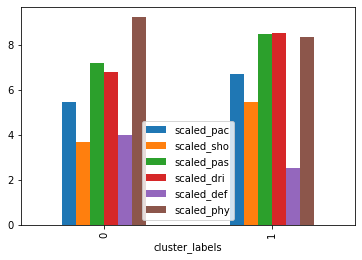

In [83]:
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

In [84]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']
